In [1]:
import numpy as np
import pandas as pd

In [2]:
train_raw = pd.read_csv('../titanic/train.csv')

In [3]:
train_raw.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
#Exploration of data
train_raw.drop(columns=['PassengerId'],inplace=True)

In [5]:
train_raw['Cabin'] = train_raw['Cabin'].fillna(0)

In [6]:
train_raw.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500     0        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250     0        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500     0        S

In [7]:
train_raw.loc(train_raw['Cabin']!=0,'Cabin')=1

SyntaxError: can't assign to function call (<ipython-input-7-e338a14b2752>, line 1)

In [8]:
train_raw['Cabin'] = train_raw['Cabin'].where(train_raw['Cabin']==0,1)

In [9]:
train_raw.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500     0        S  
1  female  38.0      1      0          PC 17599  71.2833     1        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250     0        S  
3  female  35.0      1      0            113803  53.1000     1        S  
4    male  35.0      0      0            373450   8.0500     0        S

In [10]:
train_raw.drop(columns=['Name','Ticket'],inplace=True)

In [11]:
train_raw = pd.concat([train_raw,pd.get_dummies(train_raw['Sex'],prefix='Sex')],axis = 1)

In [12]:
train_raw.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  \
0         0       3    male  22.0      1      0   7.2500     0        S   
1         1       1  female  38.0      1      0  71.2833     1        C   
2         1       3  female  26.0      0      0   7.9250     0        S   
3         1       1  female  35.0      1      0  53.1000     1        S   
4         0       3    male  35.0      0      0   8.0500     0        S   

   Sex_female  Sex_male  
0           0         1  
1           1         0  
2           1         0  
3           1         0  
4           0         1

In [13]:
train_raw.drop(columns='Sex',inplace=True)

In [14]:
train_raw = pd.concat([train_raw,pd.get_dummies(train_raw['Embarked'],prefix='Embarked')],axis = 1)

In [15]:
train_raw.head()

Survived  Pclass   Age  SibSp  Parch     Fare Cabin Embarked  Sex_female  \
0         0       3  22.0      1      0   7.2500     0        S           0   
1         1       1  38.0      1      0  71.2833     1        C           1   
2         1       3  26.0      0      0   7.9250     0        S           1   
3         1       1  35.0      1      0  53.1000     1        S           1   
4         0       3  35.0      0      0   8.0500     0        S           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           0           1  
1         0           1           0           0  
2         0           0           0           1  
3         0           0           0           1  
4         1           0           0           1

In [16]:
train_raw.drop(columns=['Embarked'],inplace=True)

In [17]:
train_raw.head()

Survived  Pclass   Age  SibSp  Parch     Fare Cabin  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500     0           0         1   
1         1       1  38.0      1      0  71.2833     1           1         0   
2         1       3  26.0      0      0   7.9250     0           1         0   
3         1       1  35.0      1      0  53.1000     1           1         0   
4         0       3  35.0      0      0   8.0500     0           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [18]:
import matplotlib.pyplot as plt

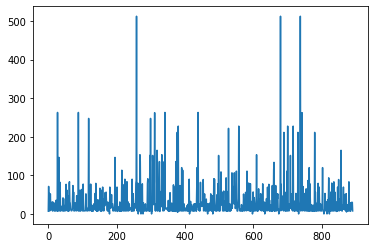

In [19]:
plt.plot(train_raw['Fare'])

In [20]:
import seaborn as sb

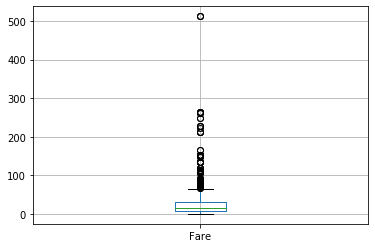

In [21]:
train_raw.boxplot(column=['Fare'])

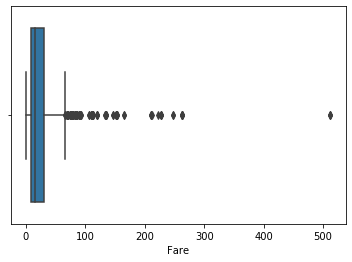

In [22]:
sb.boxplot(x=train_raw['Fare'])

In [23]:
train_raw.head()

Survived  Pclass   Age  SibSp  Parch     Fare Cabin  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500     0           0         1   
1         1       1  38.0      1      0  71.2833     1           1         0   
2         1       3  26.0      0      0   7.9250     0           1         0   
3         1       1  35.0      1      0  53.1000     1           1         0   
4         0       3  35.0      0      0   8.0500     0           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [24]:
train_raw[train_raw['Fare']>500]

Survived  Pclass   Age  SibSp  Parch      Fare Cabin  Sex_female  \
258         1       1  35.0      0      0  512.3292     0           1   
679         1       1  36.0      0      1  512.3292     1           0   
737         1       1  35.0      0      0  512.3292     1           0   

     Sex_male  Embarked_C  Embarked_Q  Embarked_S  
258         0           1           0           0  
679         1           1           0           0  
737         1           1           0           0

In [25]:
#train_raw.drop((train_raw['Fare']>500).index,axis=0,inplace=True)

In [26]:
train_raw.head()

Survived  Pclass   Age  SibSp  Parch     Fare Cabin  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500     0           0         1   
1         1       1  38.0      1      0  71.2833     1           1         0   
2         1       3  26.0      0      0   7.9250     0           1         0   
3         1       1  35.0      1      0  53.1000     1           1         0   
4         0       3  35.0      0      0   8.0500     0           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [27]:
train_raw = train_raw[train_raw['Fare']<500]

In [28]:
from sklearn import preprocessing

In [29]:
fare_col = train_raw.Fare.values
fare_col = fare_col.reshape(-1, 1)

In [30]:
min_max_scaler = preprocessing.MinMaxScaler()
fare_col_scaled = min_max_scaler.fit_transform(fare_col)

In [31]:
train_raw['fare_col_scaled_col'] = fare_col_scaled

In [32]:
train_raw.head()

Survived  Pclass   Age  SibSp  Parch     Fare Cabin  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500     0           0         1   
1         1       1  38.0      1      0  71.2833     1           1         0   
2         1       3  26.0      0      0   7.9250     0           1         0   
3         1       1  35.0      1      0  53.1000     1           1         0   
4         0       3  35.0      0      0   8.0500     0           0         1   

   Embarked_C  Embarked_Q  Embarked_S  fare_col_scaled_col  
0           0           0           1             0.027567  
1           1           0           0             0.271039  
2           0           0           1             0.030133  
3           0           0           1             0.201901  
4           0           0           1             0.030608

In [33]:
train_raw.drop(columns=['Fare'],inplace=True)

In [34]:
train_raw['Age'] = train_raw['Age'].fillna(train_raw['Age'].median())

In [35]:
age_col = train_raw.Age.values
age_col = age_col.reshape(-1, 1)

In [36]:
age_col

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [37]:
min_max_scaler = preprocessing.MinMaxScaler()
age_col_scaled = min_max_scaler.fit_transform(age_col)

In [38]:
train_raw['age_col_scaled_col'] = age_col_scaled

In [39]:
train_raw.drop(columns=['Age'],inplace=True)

In [40]:
train_raw.head()

Survived  Pclass  SibSp  Parch Cabin  Sex_female  Sex_male  Embarked_C  \
0         0       3      1      0     0           0         1           0   
1         1       1      1      0     1           1         0           1   
2         1       3      0      0     0           1         0           0   
3         1       1      1      0     1           1         0           0   
4         0       3      0      0     0           0         1           0   

   Embarked_Q  Embarked_S  fare_col_scaled_col  age_col_scaled_col  
0           0           1             0.027567            0.271174  
1           0           0             0.271039            0.472229  
2           0           1             0.030133            0.321438  
3           0           1             0.201901            0.434531  
4           0           1             0.030608            0.434531

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_raw_col = [ col for col in train_raw.columns if col!='Survived']

In [43]:
X = train_raw[train_raw_col]

In [44]:
Y = train_raw['Survived']

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [46]:
#X_train.shape
Y_train.shape

(710,)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# linear regression first
model = RandomForestClassifier(max_depth=4, random_state=0)

In [49]:
model2 = RandomForestClassifier(max_depth=6, random_state=0)

In [50]:
model3 = RandomForestClassifier(max_depth=8, random_state=0)

In [51]:
X_train

Pclass  SibSp  Parch Cabin  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
570       2      0      0     0           0         1           0           0   
64        1      0      0     0           0         1           1           0   
31        1      1      0     1           1         0           1           0   
804       3      0      0     0           0         1           0           0   
200       3      0      0     0           0         1           0           0   
..      ...    ...    ...   ...         ...       ...         ...         ...   
131       3      0      0     0           0         1           0           0   
336       1      1      0     1           0         1           0           0   
358       3      0      0     0           1         0           0           1   
241       3      1      0     0           1         0           0           1   
406       3      0      0     0           0         1           0           0   

     Embarked_S  fare_col_scaled_col  age_col_scaled_col  
570           1             0.039924            0.773813  
64            0             0.105402            0.346569  
31            0             0.557113            0.346569  
804           1             0.026521            0.334004  
200           1             0.036122            0.346569  
..          ...                  ...                 ...  
131           1             0.026806            0.246042  
336           1             0.253232            0.359135  
358           0             0.029959            0.346569  
241           0             0.058935            0.346569  
406           1             0.029468            0.635587  

[710 rows x 11 columns]

In [52]:
model_fit = model.fit(X_train,Y_train)
model_fit2 = model2.fit(X_train,Y_train)
model_fit3= model3.fit(X_train,Y_train)

In [53]:
Y_pred = model_fit.predict(X_test)
Y_pred2 = model_fit2.predict(X_test)
Y_pred3 = model_fit3.predict(X_test)

In [54]:
Y_pred.shape

(178,)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [56]:
accuracy_score(Y_test,Y_pred)

0.8539325842696629

In [57]:
confusion_matrix(Y_test,Y_pred)

array([[94,  8],
       [18, 58]], dtype=int64)

In [58]:
accuracy_score(Y_test,Y_pred2)

0.8651685393258427

In [59]:
confusion_matrix(Y_test,Y_pred2)

array([[94,  8],
       [16, 60]], dtype=int64)

In [60]:
accuracy_score(Y_test,Y_pred3) # from random forest

0.8651685393258427

In [61]:
# accuracy stopped increasing here 

In [62]:
# lets try an ANN

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [89]:
classifier = Sequential()

In [90]:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=11))

In [91]:
classifier.add(Dropout(rate=0.2))

In [92]:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(rate=0.2))

In [93]:
#classifier.add(Dense(units=3,kernel_initializer='uniform',activation='relu'))

In [94]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [95]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                          #    patience=5, min_lr=0.001)

In [96]:
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 118,callbacks=[reduce_lr])

Epoch 1/118
710/710 [==============================] - 0s 222us/step - loss: 0.6865 - accuracy: 0.6296
Epoch 2/118
710/710 [==============================] - 0s 77us/step - loss: 0.6435 - accuracy: 0.6296
Epoch 3/118
710/710 [==============================] - 0s 73us/step - loss: 0.5942 - accuracy: 0.6324
Epoch 4/118
710/710 [==============================] - 0s 79us/step - loss: 0.5625 - accuracy: 0.6845
Epoch 5/118
710/710 [==============================] - 0s 72us/step - loss: 0.5530 - accuracy: 0.7155
Epoch 6/118
710/710 [==============================] - 0s 76us/step - loss: 0.5298 - accuracy: 0.7507
Epoch 7/118
710/710 [==============================] - 0s 75us/step - loss: 0.5400 - accuracy: 0.7817
Epoch 8/118
710/710 [==============================] - 0s 80us/step - loss: 0.5208 - accuracy: 0.7845
Epoch 9/118
710/710 [==============================] - 0s 75us/step - loss: 0.5177 - accuracy: 0.7775
Epoch 10/118
710/710 [==============================] - 0s 77us/step - loss: 0.51

710/710 [==============================] - 0s 83us/step - loss: 0.4687 - accuracy: 0.8127
Epoch 81/118
710/710 [==============================] - 0s 83us/step - loss: 0.4730 - accuracy: 0.8014
Epoch 82/118
710/710 [==============================] - 0s 87us/step - loss: 0.4816 - accuracy: 0.8183
Epoch 83/118
710/710 [==============================] - 0s 83us/step - loss: 0.4829 - accuracy: 0.8042
Epoch 84/118
710/710 [==============================] - 0s 85us/step - loss: 0.4780 - accuracy: 0.8169
Epoch 85/118
710/710 [==============================] - 0s 85us/step - loss: 0.4848 - accuracy: 0.8056
Epoch 86/118
710/710 [==============================] - 0s 80us/step - loss: 0.4794 - accuracy: 0.8056
Epoch 87/118
710/710 [==============================] - 0s 86us/step - loss: 0.4513 - accuracy: 0.8211
Epoch 88/118
710/710 [==============================] - 0s 90us/step - loss: 0.4710 - accuracy: 0.8070
Epoch 89/118
710/710 [==============================] - 0s 83us/step - loss: 0.4652 - 

In [97]:
Y_pred_ann = classifier.predict(X_test)

In [98]:
Y_pred_ann = Y_pred_ann.reshape(-1)

In [99]:
Y_test.shape

(178,)

In [100]:
Y_pred_ann.shape

(178,)

In [101]:
Y_test

610    0
853    1
685    0
776    0
92     0
      ..
742    1
691    1
862    1
528    0
36     1
Name: Survived, Length: 178, dtype: int64

In [102]:
Y_pred_ann   = [1  if rows>0.6 else 0 for rows in Y_pred_ann]

In [103]:
accuracy_score(Y_test,Y_pred_ann)

0.8314606741573034

In [104]:
confusion_matrix(Y_test,Y_pred_ann)

array([[94,  8],
       [22, 54]], dtype=int64)

In [122]:
#Gridsearch
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
def build_neural_net(optimizer,initializer,layer_1_activation,layer_2_activation):
    classifier= Sequential()
    classifier.add(Dense(units=6,kernel_initializer = initializer,activation=layer_1_activation,input_dim=11))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense(units=6,kernel_initializer = initializer,activation=layer_2_activation))
    classifier.add(Dropout(rate=0.2))
    classifier.add(Dense(units=1,kernel_initializer = initializer,activation='sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [125]:
classifier = KerasClassifier(build_fn = build_neural_net)

In [127]:
parameters = {'batch_size' : [25,32],
              'epochs' : [100,150],
              'optimizer' : ['adam','rmsprop'],
             'initializer':['uniform','glorot_uniform'],
             'layer_1_activation':['relu','selu','sigmoid'],
              'layer_2_activation':['relu','selu','sigmoid']}

In [128]:
gridSeach = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 3)

In [129]:
gridSeach = gridSeach.fit(X_train, Y_train)

Epoch 1/100
473/473 [==============================] - 0s 245us/step - loss: 0.6922 - accuracy: 0.6173
Epoch 2/100
473/473 [==============================] - 0s 38us/step - loss: 0.6900 - accuracy: 0.6300
Epoch 3/100
473/473 [==============================] - 0s 38us/step - loss: 0.6870 - accuracy: 0.6300
Epoch 4/100
473/473 [==============================] - 0s 42us/step - loss: 0.6823 - accuracy: 0.6300
Epoch 5/100
473/473 [==============================] - 0s 40us/step - loss: 0.6741 - accuracy: 0.6300
Epoch 6/100
473/473 [==============================] - 0s 40us/step - loss: 0.6617 - accuracy: 0.6300
Epoch 7/100
473/473 [==============================] - 0s 42us/step - loss: 0.6422 - accuracy: 0.6300
Epoch 8/100
473/473 [==============================] - 0s 38us/step - loss: 0.6227 - accuracy: 0.6300
Epoch 9/100
473/473 [==============================] - 0s 40us/step - loss: 0.6044 - accuracy: 0.6300
Epoch 10/100
473/473 [==============================] - 0s 40us/step - loss: 0.58

473/473 [==============================] - 0s 49us/step - loss: 0.4995 - accuracy: 0.7970
Epoch 81/100
473/473 [==============================] - 0s 47us/step - loss: 0.4893 - accuracy: 0.7928
Epoch 82/100
473/473 [==============================] - 0s 53us/step - loss: 0.4836 - accuracy: 0.8013
Epoch 83/100
473/473 [==============================] - 0s 42us/step - loss: 0.4842 - accuracy: 0.7992
Epoch 84/100
473/473 [==============================] - 0s 36us/step - loss: 0.5070 - accuracy: 0.7949
Epoch 85/100
473/473 [==============================] - 0s 34us/step - loss: 0.4741 - accuracy: 0.8118
Epoch 86/100
473/473 [==============================] - 0s 34us/step - loss: 0.4989 - accuracy: 0.7970
Epoch 87/100
473/473 [==============================] - 0s 32us/step - loss: 0.4877 - accuracy: 0.8013
Epoch 88/100
473/473 [==============================] - 0s 34us/step - loss: 0.4851 - accuracy: 0.7949
Epoch 89/100
473/473 [==============================] - 0s 32us/step - loss: 0.4799 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4874 - accuracy: 0.7801
Epoch 60/100
473/473 [==============================] - 0s 47us/step - loss: 0.4988 - accuracy: 0.7844
Epoch 61/100
473/473 [==============================] - 0s 47us/step - loss: 0.4765 - accuracy: 0.7801
Epoch 62/100
473/473 [==============================] - 0s 42us/step - loss: 0.4917 - accuracy: 0.7780
Epoch 63/100
473/473 [==============================] - 0s 38us/step - loss: 0.4831 - accuracy: 0.7865
Epoch 64/100
473/473 [==============================] - 0s 40us/step - loss: 0.4735 - accuracy: 0.8055
Epoch 65/100
473/473 [==============================] - 0s 36us/step - loss: 0.4851 - accuracy: 0.7844
Epoch 66/100
473/473 [==============================] - 0s 40us/step - loss: 0.4869 - accuracy: 0.7844
Epoch 67/100
473/473 [==============================] - 0s 36us/step - loss: 0.4947 - accuracy: 0.7844
Epoch 68/100
473/473 [==============================] - 0s 38us/step - loss: 0.4846 - 

474/474 [==============================] - 0s 49us/step - loss: 0.5072 - accuracy: 0.7722
Epoch 39/100
474/474 [==============================] - 0s 55us/step - loss: 0.5121 - accuracy: 0.7954
Epoch 40/100
474/474 [==============================] - 0s 49us/step - loss: 0.4918 - accuracy: 0.7785
Epoch 41/100
474/474 [==============================] - 0s 46us/step - loss: 0.4901 - accuracy: 0.7869
Epoch 42/100
474/474 [==============================] - 0s 46us/step - loss: 0.4836 - accuracy: 0.7869
Epoch 43/100
474/474 [==============================] - 0s 42us/step - loss: 0.5087 - accuracy: 0.7890
Epoch 44/100
474/474 [==============================] - 0s 38us/step - loss: 0.5115 - accuracy: 0.7785
Epoch 45/100
474/474 [==============================] - 0s 36us/step - loss: 0.4996 - accuracy: 0.7722
Epoch 46/100
474/474 [==============================] - 0s 38us/step - loss: 0.4981 - accuracy: 0.7975
Epoch 47/100
474/474 [==============================] - 0s 36us/step - loss: 0.5126 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5357 - accuracy: 0.7463
Epoch 18/100
473/473 [==============================] - 0s 53us/step - loss: 0.5416 - accuracy: 0.7463
Epoch 19/100
473/473 [==============================] - 0s 47us/step - loss: 0.5298 - accuracy: 0.7590
Epoch 20/100
473/473 [==============================] - 0s 51us/step - loss: 0.5146 - accuracy: 0.7759
Epoch 21/100
473/473 [==============================] - 0s 44us/step - loss: 0.5243 - accuracy: 0.7421
Epoch 22/100
473/473 [==============================] - 0s 49us/step - loss: 0.5045 - accuracy: 0.7738
Epoch 23/100
473/473 [==============================] - 0s 47us/step - loss: 0.5070 - accuracy: 0.7696
Epoch 24/100
473/473 [==============================] - 0s 49us/step - loss: 0.5129 - accuracy: 0.7865
Epoch 25/100
473/473 [==============================] - 0s 47us/step - loss: 0.4995 - accuracy: 0.7717
Epoch 26/100
473/473 [==============================] - 0s 53us/step - loss: 0.4978 - 

473/473 [==============================] - 0s 55us/step - loss: 0.4699 - accuracy: 0.8013
Epoch 97/100
473/473 [==============================] - 0s 53us/step - loss: 0.4632 - accuracy: 0.7928
Epoch 98/100
473/473 [==============================] - 0s 53us/step - loss: 0.4767 - accuracy: 0.7970
Epoch 99/100
473/473 [==============================] - 0s 53us/step - loss: 0.4691 - accuracy: 0.7949
Epoch 100/100
473/473 [==============================] - 0s 51us/step - loss: 0.4634 - accuracy: 0.8140
Epoch 1/100
473/473 [==============================] - 0s 281us/step - loss: 0.6911 - accuracy: 0.6300
Epoch 2/100
473/473 [==============================] - 0s 44us/step - loss: 0.6873 - accuracy: 0.6195
Epoch 3/100
473/473 [==============================] - 0s 49us/step - loss: 0.6823 - accuracy: 0.6195
Epoch 4/100
473/473 [==============================] - 0s 55us/step - loss: 0.6767 - accuracy: 0.6195
Epoch 5/100
473/473 [==============================] - 0s 53us/step - loss: 0.6698 - acc

473/473 [==============================] - 0s 47us/step - loss: 0.4908 - accuracy: 0.7738
Epoch 76/100
473/473 [==============================] - 0s 49us/step - loss: 0.4796 - accuracy: 0.8055
Epoch 77/100
473/473 [==============================] - 0s 44us/step - loss: 0.4933 - accuracy: 0.7674
Epoch 78/100
473/473 [==============================] - 0s 47us/step - loss: 0.4866 - accuracy: 0.7801
Epoch 79/100
473/473 [==============================] - 0s 47us/step - loss: 0.4939 - accuracy: 0.7822
Epoch 80/100
473/473 [==============================] - 0s 42us/step - loss: 0.4640 - accuracy: 0.8034
Epoch 81/100
473/473 [==============================] - 0s 47us/step - loss: 0.4822 - accuracy: 0.8055
Epoch 82/100
473/473 [==============================] - 0s 42us/step - loss: 0.4794 - accuracy: 0.7759
Epoch 83/100
473/473 [==============================] - 0s 47us/step - loss: 0.4812 - accuracy: 0.7928
Epoch 84/100
473/473 [==============================] - 0s 42us/step - loss: 0.4746 - 

474/474 [==============================] - 0s 49us/step - loss: 0.5011 - accuracy: 0.8080
Epoch 55/100
474/474 [==============================] - 0s 46us/step - loss: 0.4905 - accuracy: 0.7848
Epoch 56/100
474/474 [==============================] - 0s 46us/step - loss: 0.4943 - accuracy: 0.7869
Epoch 57/100
474/474 [==============================] - 0s 44us/step - loss: 0.4917 - accuracy: 0.7869
Epoch 58/100
474/474 [==============================] - 0s 44us/step - loss: 0.4898 - accuracy: 0.7869
Epoch 59/100
474/474 [==============================] - 0s 44us/step - loss: 0.4966 - accuracy: 0.7869
Epoch 60/100
474/474 [==============================] - 0s 46us/step - loss: 0.5022 - accuracy: 0.7869
Epoch 61/100
474/474 [==============================] - 0s 46us/step - loss: 0.4698 - accuracy: 0.7996
Epoch 62/100
474/474 [==============================] - 0s 46us/step - loss: 0.4904 - accuracy: 0.7890
Epoch 63/100
474/474 [==============================] - 0s 49us/step - loss: 0.4851 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4890 - accuracy: 0.7928
Epoch 34/100
473/473 [==============================] - 0s 49us/step - loss: 0.4732 - accuracy: 0.8013
Epoch 35/100
473/473 [==============================] - 0s 51us/step - loss: 0.4732 - accuracy: 0.8055
Epoch 36/100
473/473 [==============================] - 0s 47us/step - loss: 0.4744 - accuracy: 0.8055
Epoch 37/100
473/473 [==============================] - 0s 49us/step - loss: 0.4697 - accuracy: 0.7970
Epoch 38/100
473/473 [==============================] - 0s 47us/step - loss: 0.4681 - accuracy: 0.8055
Epoch 39/100
473/473 [==============================] - 0s 49us/step - loss: 0.4674 - accuracy: 0.7907
Epoch 40/100
473/473 [==============================] - 0s 47us/step - loss: 0.4508 - accuracy: 0.8203
Epoch 41/100
473/473 [==============================] - 0s 51us/step - loss: 0.4721 - accuracy: 0.7886
Epoch 42/100
473/473 [==============================] - 0s 47us/step - loss: 0.4677 - 

473/473 [==============================] - 0s 47us/step - loss: 0.5405 - accuracy: 0.7463
Epoch 13/100
473/473 [==============================] - 0s 49us/step - loss: 0.5263 - accuracy: 0.7738
Epoch 14/100
473/473 [==============================] - 0s 49us/step - loss: 0.5269 - accuracy: 0.7505
Epoch 15/100
473/473 [==============================] - 0s 49us/step - loss: 0.5236 - accuracy: 0.7484
Epoch 16/100
473/473 [==============================] - 0s 47us/step - loss: 0.5147 - accuracy: 0.7526
Epoch 17/100
473/473 [==============================] - 0s 49us/step - loss: 0.5134 - accuracy: 0.7505
Epoch 18/100
473/473 [==============================] - 0s 49us/step - loss: 0.5058 - accuracy: 0.7569
Epoch 19/100
473/473 [==============================] - 0s 49us/step - loss: 0.5040 - accuracy: 0.7886
Epoch 20/100
473/473 [==============================] - 0s 49us/step - loss: 0.5127 - accuracy: 0.7717
Epoch 21/100
473/473 [==============================] - 0s 49us/step - loss: 0.5106 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4727 - accuracy: 0.7970
Epoch 92/100
473/473 [==============================] - 0s 51us/step - loss: 0.4579 - accuracy: 0.8034
Epoch 93/100
473/473 [==============================] - 0s 53us/step - loss: 0.4621 - accuracy: 0.8055
Epoch 94/100
473/473 [==============================] - 0s 51us/step - loss: 0.4745 - accuracy: 0.7992
Epoch 95/100
473/473 [==============================] - 0s 53us/step - loss: 0.4799 - accuracy: 0.8076
Epoch 96/100
473/473 [==============================] - 0s 51us/step - loss: 0.4766 - accuracy: 0.7992
Epoch 97/100
473/473 [==============================] - 0s 49us/step - loss: 0.4702 - accuracy: 0.8076
Epoch 98/100
473/473 [==============================] - 0s 53us/step - loss: 0.4813 - accuracy: 0.7907
Epoch 99/100
473/473 [==============================] - 0s 51us/step - loss: 0.4687 - accuracy: 0.7970
Epoch 100/100
473/473 [==============================] - 0s 51us/step - loss: 0.4668 -

474/474 [==============================] - 0s 59us/step - loss: 0.4646 - accuracy: 0.8186
Epoch 71/100
474/474 [==============================] - 0s 57us/step - loss: 0.4615 - accuracy: 0.8059
Epoch 72/100
474/474 [==============================] - 0s 51us/step - loss: 0.4646 - accuracy: 0.8059
Epoch 73/100
474/474 [==============================] - 0s 68us/step - loss: 0.4701 - accuracy: 0.8165
Epoch 74/100
474/474 [==============================] - 0s 59us/step - loss: 0.4758 - accuracy: 0.8038
Epoch 75/100
474/474 [==============================] - 0s 61us/step - loss: 0.4478 - accuracy: 0.8143
Epoch 76/100
474/474 [==============================] - 0s 57us/step - loss: 0.4695 - accuracy: 0.8122
Epoch 77/100
474/474 [==============================] - 0s 51us/step - loss: 0.4851 - accuracy: 0.8270
Epoch 78/100
474/474 [==============================] - 0s 51us/step - loss: 0.4610 - accuracy: 0.7975
Epoch 79/100
474/474 [==============================] - 0s 49us/step - loss: 0.4661 - 

473/473 [==============================] - 0s 68us/step - loss: 0.5214 - accuracy: 0.7674
Epoch 50/100
473/473 [==============================] - 0s 59us/step - loss: 0.5074 - accuracy: 0.7759
Epoch 51/100
473/473 [==============================] - 0s 63us/step - loss: 0.5095 - accuracy: 0.7801
Epoch 52/100
473/473 [==============================] - 0s 51us/step - loss: 0.4919 - accuracy: 0.7801
Epoch 53/100
473/473 [==============================] - 0s 51us/step - loss: 0.5093 - accuracy: 0.7992
Epoch 54/100
473/473 [==============================] - 0s 49us/step - loss: 0.4979 - accuracy: 0.7801
Epoch 55/100
473/473 [==============================] - 0s 53us/step - loss: 0.4803 - accuracy: 0.7886
Epoch 56/100
473/473 [==============================] - 0s 49us/step - loss: 0.5023 - accuracy: 0.7780
Epoch 57/100
473/473 [==============================] - 0s 55us/step - loss: 0.4924 - accuracy: 0.7928
Epoch 58/100
473/473 [==============================] - 0s 51us/step - loss: 0.5010 - 

473/473 [==============================] - 0s 61us/step - loss: 0.5097 - accuracy: 0.7970
Epoch 29/100
473/473 [==============================] - 0s 63us/step - loss: 0.5073 - accuracy: 0.7907
Epoch 30/100
473/473 [==============================] - 0s 55us/step - loss: 0.5046 - accuracy: 0.7759
Epoch 31/100
473/473 [==============================] - 0s 51us/step - loss: 0.5143 - accuracy: 0.7844
Epoch 32/100
473/473 [==============================] - 0s 51us/step - loss: 0.4925 - accuracy: 0.7865
Epoch 33/100
473/473 [==============================] - 0s 51us/step - loss: 0.4942 - accuracy: 0.7844
Epoch 34/100
473/473 [==============================] - 0s 53us/step - loss: 0.4913 - accuracy: 0.7970
Epoch 35/100
473/473 [==============================] - 0s 51us/step - loss: 0.5031 - accuracy: 0.7907
Epoch 36/100
473/473 [==============================] - 0s 59us/step - loss: 0.4815 - accuracy: 0.8034
Epoch 37/100
473/473 [==============================] - 0s 55us/step - loss: 0.4999 - 

474/474 [==============================] - 0s 55us/step - loss: 0.6231 - accuracy: 0.6392
Epoch 8/100
474/474 [==============================] - 0s 59us/step - loss: 0.6069 - accuracy: 0.6392
Epoch 9/100
474/474 [==============================] - 0s 53us/step - loss: 0.5983 - accuracy: 0.6688
Epoch 10/100
474/474 [==============================] - 0s 57us/step - loss: 0.5817 - accuracy: 0.6920
Epoch 11/100
474/474 [==============================] - 0s 59us/step - loss: 0.5726 - accuracy: 0.7068
Epoch 12/100
474/474 [==============================] - 0s 55us/step - loss: 0.5657 - accuracy: 0.7278
Epoch 13/100
474/474 [==============================] - 0s 59us/step - loss: 0.5453 - accuracy: 0.7363
Epoch 14/100
474/474 [==============================] - 0s 63us/step - loss: 0.5422 - accuracy: 0.7447
Epoch 15/100
474/474 [==============================] - 0s 65us/step - loss: 0.5264 - accuracy: 0.7595
Epoch 16/100
474/474 [==============================] - 0s 59us/step - loss: 0.5246 - ac

474/474 [==============================] - 0s 51us/step - loss: 0.4776 - accuracy: 0.8059
Epoch 87/100
474/474 [==============================] - 0s 53us/step - loss: 0.4663 - accuracy: 0.8165
Epoch 88/100
474/474 [==============================] - 0s 55us/step - loss: 0.4522 - accuracy: 0.8080
Epoch 89/100
474/474 [==============================] - 0s 49us/step - loss: 0.4757 - accuracy: 0.8038
Epoch 90/100
474/474 [==============================] - 0s 49us/step - loss: 0.4708 - accuracy: 0.8017
Epoch 91/100
474/474 [==============================] - 0s 46us/step - loss: 0.4421 - accuracy: 0.8186
Epoch 92/100
474/474 [==============================] - 0s 51us/step - loss: 0.4703 - accuracy: 0.7975
Epoch 93/100
474/474 [==============================] - 0s 46us/step - loss: 0.4661 - accuracy: 0.7890
Epoch 94/100
474/474 [==============================] - 0s 51us/step - loss: 0.4604 - accuracy: 0.8122
Epoch 95/100
474/474 [==============================] - 0s 46us/step - loss: 0.4662 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5410 - accuracy: 0.6512
Epoch 66/100
473/473 [==============================] - 0s 49us/step - loss: 0.5431 - accuracy: 0.6512
Epoch 67/100
473/473 [==============================] - 0s 57us/step - loss: 0.5399 - accuracy: 0.6765
Epoch 68/100
473/473 [==============================] - 0s 57us/step - loss: 0.5318 - accuracy: 0.6956
Epoch 69/100
473/473 [==============================] - 0s 51us/step - loss: 0.5332 - accuracy: 0.6892
Epoch 70/100
473/473 [==============================] - 0s 63us/step - loss: 0.5360 - accuracy: 0.6744
Epoch 71/100
473/473 [==============================] - 0s 61us/step - loss: 0.5343 - accuracy: 0.7104
Epoch 72/100
473/473 [==============================] - 0s 55us/step - loss: 0.5341 - accuracy: 0.7040
Epoch 73/100
473/473 [==============================] - 0s 55us/step - loss: 0.5352 - accuracy: 0.7104
Epoch 74/100
473/473 [==============================] - 0s 55us/step - loss: 0.5344 - 

473/473 [==============================] - 0s 57us/step - loss: 0.5441 - accuracy: 0.7611
Epoch 45/100
473/473 [==============================] - 0s 51us/step - loss: 0.5573 - accuracy: 0.7696
Epoch 46/100
473/473 [==============================] - 0s 51us/step - loss: 0.5470 - accuracy: 0.7696
Epoch 47/100
473/473 [==============================] - 0s 61us/step - loss: 0.5439 - accuracy: 0.7653
Epoch 48/100
473/473 [==============================] - 0s 55us/step - loss: 0.5414 - accuracy: 0.7717
Epoch 49/100
473/473 [==============================] - 0s 53us/step - loss: 0.5370 - accuracy: 0.7653
Epoch 50/100
473/473 [==============================] - 0s 55us/step - loss: 0.5418 - accuracy: 0.7780
Epoch 51/100
473/473 [==============================] - 0s 59us/step - loss: 0.5473 - accuracy: 0.7400
Epoch 52/100
473/473 [==============================] - 0s 51us/step - loss: 0.5412 - accuracy: 0.7463
Epoch 53/100
473/473 [==============================] - 0s 55us/step - loss: 0.5234 - 

474/474 [==============================] - 0s 46us/step - loss: 0.6177 - accuracy: 0.6392
Epoch 24/100
474/474 [==============================] - 0s 46us/step - loss: 0.6129 - accuracy: 0.6392
Epoch 25/100
474/474 [==============================] - 0s 46us/step - loss: 0.6097 - accuracy: 0.6392
Epoch 26/100
474/474 [==============================] - 0s 49us/step - loss: 0.6099 - accuracy: 0.6392
Epoch 27/100
474/474 [==============================] - 0s 46us/step - loss: 0.6081 - accuracy: 0.6392
Epoch 28/100
474/474 [==============================] - 0s 46us/step - loss: 0.6090 - accuracy: 0.6392
Epoch 29/100
474/474 [==============================] - 0s 49us/step - loss: 0.6085 - accuracy: 0.6392
Epoch 30/100
474/474 [==============================] - 0s 46us/step - loss: 0.6053 - accuracy: 0.6392
Epoch 31/100
474/474 [==============================] - 0s 49us/step - loss: 0.6073 - accuracy: 0.6392
Epoch 32/100
474/474 [==============================] - 0s 44us/step - loss: 0.5994 - 

473/473 [==============================] - 0s 44us/step - loss: 0.6837 - accuracy: 0.6300
Epoch 3/100
473/473 [==============================] - 0s 49us/step - loss: 0.6795 - accuracy: 0.6300
Epoch 4/100
473/473 [==============================] - 0s 51us/step - loss: 0.6733 - accuracy: 0.6300
Epoch 5/100
473/473 [==============================] - 0s 47us/step - loss: 0.6680 - accuracy: 0.6300
Epoch 6/100
473/473 [==============================] - 0s 47us/step - loss: 0.6657 - accuracy: 0.6300
Epoch 7/100
473/473 [==============================] - 0s 49us/step - loss: 0.6630 - accuracy: 0.6300
Epoch 8/100
473/473 [==============================] - 0s 53us/step - loss: 0.6625 - accuracy: 0.6300
Epoch 9/100
473/473 [==============================] - 0s 47us/step - loss: 0.6569 - accuracy: 0.6300
Epoch 10/100
473/473 [==============================] - 0s 44us/step - loss: 0.6558 - accuracy: 0.6300
Epoch 11/100
473/473 [==============================] - 0s 44us/step - loss: 0.6560 - accurac

473/473 [==============================] - 0s 47us/step - loss: 0.5427 - accuracy: 0.6554
Epoch 82/100
473/473 [==============================] - 0s 44us/step - loss: 0.5499 - accuracy: 0.6533
Epoch 83/100
473/473 [==============================] - 0s 44us/step - loss: 0.5437 - accuracy: 0.6723
Epoch 84/100
473/473 [==============================] - 0s 47us/step - loss: 0.5469 - accuracy: 0.6744
Epoch 85/100
473/473 [==============================] - 0s 44us/step - loss: 0.5426 - accuracy: 0.6956
Epoch 86/100
473/473 [==============================] - 0s 44us/step - loss: 0.5386 - accuracy: 0.6934
Epoch 87/100
473/473 [==============================] - 0s 49us/step - loss: 0.5307 - accuracy: 0.6998
Epoch 88/100
473/473 [==============================] - 0s 44us/step - loss: 0.5354 - accuracy: 0.6998
Epoch 89/100
473/473 [==============================] - 0s 53us/step - loss: 0.5302 - accuracy: 0.7188
Epoch 90/100
473/473 [==============================] - 0s 51us/step - loss: 0.5334 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5338 - accuracy: 0.7653
Epoch 61/100
473/473 [==============================] - 0s 51us/step - loss: 0.5303 - accuracy: 0.7717
Epoch 62/100
473/473 [==============================] - 0s 49us/step - loss: 0.5320 - accuracy: 0.7590
Epoch 63/100
473/473 [==============================] - 0s 49us/step - loss: 0.5361 - accuracy: 0.7569
Epoch 64/100
473/473 [==============================] - 0s 46us/step - loss: 0.5206 - accuracy: 0.7801
Epoch 65/100
473/473 [==============================] - 0s 47us/step - loss: 0.5274 - accuracy: 0.7780
Epoch 66/100
473/473 [==============================] - 0s 44us/step - loss: 0.5257 - accuracy: 0.7759
Epoch 67/100
473/473 [==============================] - 0s 46us/step - loss: 0.5229 - accuracy: 0.7696
Epoch 68/100
473/473 [==============================] - 0s 47us/step - loss: 0.5217 - accuracy: 0.7738
Epoch 69/100
473/473 [==============================] - 0s 44us/step - loss: 0.5278 - 

474/474 [==============================] - 0s 46us/step - loss: 0.5702 - accuracy: 0.6392
Epoch 40/100
474/474 [==============================] - 0s 46us/step - loss: 0.5710 - accuracy: 0.6392
Epoch 41/100
474/474 [==============================] - 0s 47us/step - loss: 0.5744 - accuracy: 0.6371
Epoch 42/100
474/474 [==============================] - 0s 46us/step - loss: 0.5733 - accuracy: 0.6414
Epoch 43/100
474/474 [==============================] - 0s 46us/step - loss: 0.5678 - accuracy: 0.6435
Epoch 44/100
474/474 [==============================] - 0s 46us/step - loss: 0.5680 - accuracy: 0.6414
Epoch 45/100
474/474 [==============================] - 0s 44us/step - loss: 0.5593 - accuracy: 0.6498
Epoch 46/100
474/474 [==============================] - 0s 46us/step - loss: 0.5689 - accuracy: 0.6624
Epoch 47/100
474/474 [==============================] - 0s 46us/step - loss: 0.5562 - accuracy: 0.6751
Epoch 48/100
474/474 [==============================] - 0s 44us/step - loss: 0.5529 - 

473/473 [==============================] - 0s 57us/step - loss: 0.5002 - accuracy: 0.7717
Epoch 19/100
473/473 [==============================] - 0s 57us/step - loss: 0.4996 - accuracy: 0.7780
Epoch 20/100
473/473 [==============================] - 0s 53us/step - loss: 0.4838 - accuracy: 0.7844
Epoch 21/100
473/473 [==============================] - 0s 49us/step - loss: 0.4880 - accuracy: 0.7949
Epoch 22/100
473/473 [==============================] - 0s 59us/step - loss: 0.4886 - accuracy: 0.8034
Epoch 23/100
473/473 [==============================] - 0s 53us/step - loss: 0.4849 - accuracy: 0.8055
Epoch 24/100
473/473 [==============================] - 0s 51us/step - loss: 0.4882 - accuracy: 0.7907
Epoch 25/100
473/473 [==============================] - 0s 55us/step - loss: 0.4681 - accuracy: 0.8055
Epoch 26/100
473/473 [==============================] - 0s 53us/step - loss: 0.4730 - accuracy: 0.8013
Epoch 27/100
473/473 [==============================] - 0s 51us/step - loss: 0.4736 - 

473/473 [==============================] - 0s 59us/step - loss: 0.4570 - accuracy: 0.8055
Epoch 98/100
473/473 [==============================] - 0s 55us/step - loss: 0.4668 - accuracy: 0.8076
Epoch 99/100
473/473 [==============================] - 0s 59us/step - loss: 0.4795 - accuracy: 0.8034
Epoch 100/100
473/473 [==============================] - 0s 61us/step - loss: 0.4626 - accuracy: 0.8161
Epoch 1/100
473/473 [==============================] - 0s 313us/step - loss: 0.6922 - accuracy: 0.6089
Epoch 2/100
473/473 [==============================] - 0s 40us/step - loss: 0.6897 - accuracy: 0.6195
Epoch 3/100
473/473 [==============================] - 0s 44us/step - loss: 0.6865 - accuracy: 0.6195
Epoch 4/100
473/473 [==============================] - 0s 44us/step - loss: 0.6803 - accuracy: 0.6195
Epoch 5/100
473/473 [==============================] - 0s 47us/step - loss: 0.6699 - accuracy: 0.6195
Epoch 6/100
473/473 [==============================] - 0s 49us/step - loss: 0.6540 - accu

473/473 [==============================] - 0s 53us/step - loss: 0.4666 - accuracy: 0.8076
Epoch 77/100
473/473 [==============================] - 0s 51us/step - loss: 0.4726 - accuracy: 0.8013
Epoch 78/100
473/473 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.7992
Epoch 79/100
473/473 [==============================] - 0s 49us/step - loss: 0.4757 - accuracy: 0.7907
Epoch 80/100
473/473 [==============================] - 0s 49us/step - loss: 0.4803 - accuracy: 0.8055
Epoch 81/100
473/473 [==============================] - 0s 51us/step - loss: 0.4755 - accuracy: 0.8013
Epoch 82/100
473/473 [==============================] - 0s 49us/step - loss: 0.4638 - accuracy: 0.7970
Epoch 83/100
473/473 [==============================] - 0s 53us/step - loss: 0.4605 - accuracy: 0.8013
Epoch 84/100
473/473 [==============================] - 0s 47us/step - loss: 0.4716 - accuracy: 0.7949
Epoch 85/100
473/473 [==============================] - 0s 49us/step - loss: 0.4717 - 

474/474 [==============================] - 0s 49us/step - loss: 0.4880 - accuracy: 0.8080
Epoch 56/100
474/474 [==============================] - 0s 51us/step - loss: 0.4831 - accuracy: 0.8122
Epoch 57/100
474/474 [==============================] - 0s 51us/step - loss: 0.4651 - accuracy: 0.8080
Epoch 58/100
474/474 [==============================] - 0s 51us/step - loss: 0.4742 - accuracy: 0.8122
Epoch 59/100
474/474 [==============================] - 0s 49us/step - loss: 0.4587 - accuracy: 0.7954
Epoch 60/100
474/474 [==============================] - 0s 51us/step - loss: 0.4772 - accuracy: 0.8080
Epoch 61/100
474/474 [==============================] - 0s 49us/step - loss: 0.4631 - accuracy: 0.8122
Epoch 62/100
474/474 [==============================] - 0s 53us/step - loss: 0.4654 - accuracy: 0.8059
Epoch 63/100
474/474 [==============================] - 0s 49us/step - loss: 0.4648 - accuracy: 0.8059
Epoch 64/100
474/474 [==============================] - 0s 51us/step - loss: 0.4645 - 

473/473 [==============================] - 0s 49us/step - loss: 0.4979 - accuracy: 0.8034
Epoch 35/100
473/473 [==============================] - 0s 57us/step - loss: 0.4884 - accuracy: 0.7949
Epoch 36/100
473/473 [==============================] - 0s 53us/step - loss: 0.4717 - accuracy: 0.8013
Epoch 37/100
473/473 [==============================] - 0s 51us/step - loss: 0.4795 - accuracy: 0.8076
Epoch 38/100
473/473 [==============================] - 0s 51us/step - loss: 0.4827 - accuracy: 0.8034
Epoch 39/100
473/473 [==============================] - 0s 53us/step - loss: 0.4851 - accuracy: 0.8055
Epoch 40/100
473/473 [==============================] - 0s 47us/step - loss: 0.4806 - accuracy: 0.8076
Epoch 41/100
473/473 [==============================] - 0s 49us/step - loss: 0.4822 - accuracy: 0.8055
Epoch 42/100
473/473 [==============================] - 0s 51us/step - loss: 0.4770 - accuracy: 0.8055
Epoch 43/100
473/473 [==============================] - 0s 51us/step - loss: 0.4686 - 

473/473 [==============================] - 0s 49us/step - loss: 0.6344 - accuracy: 0.7780
Epoch 14/100
473/473 [==============================] - 0s 47us/step - loss: 0.6287 - accuracy: 0.7696
Epoch 15/100
473/473 [==============================] - 0s 51us/step - loss: 0.6272 - accuracy: 0.7653
Epoch 16/100
473/473 [==============================] - 0s 49us/step - loss: 0.6176 - accuracy: 0.7632
Epoch 17/100
473/473 [==============================] - 0s 49us/step - loss: 0.6086 - accuracy: 0.7717
Epoch 18/100
473/473 [==============================] - 0s 49us/step - loss: 0.6096 - accuracy: 0.7822
Epoch 19/100
473/473 [==============================] - 0s 42us/step - loss: 0.6024 - accuracy: 0.7717
Epoch 20/100
473/473 [==============================] - 0s 47us/step - loss: 0.6034 - accuracy: 0.7738
Epoch 21/100
473/473 [==============================] - 0s 47us/step - loss: 0.5988 - accuracy: 0.7801
Epoch 22/100
473/473 [==============================] - 0s 47us/step - loss: 0.5858 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4659 - accuracy: 0.8013
Epoch 93/100
473/473 [==============================] - 0s 42us/step - loss: 0.4718 - accuracy: 0.8034
Epoch 94/100
473/473 [==============================] - 0s 40us/step - loss: 0.4841 - accuracy: 0.8076
Epoch 95/100
473/473 [==============================] - 0s 40us/step - loss: 0.4830 - accuracy: 0.7949
Epoch 96/100
473/473 [==============================] - 0s 40us/step - loss: 0.4675 - accuracy: 0.8118
Epoch 97/100
473/473 [==============================] - 0s 40us/step - loss: 0.4612 - accuracy: 0.8076
Epoch 98/100
473/473 [==============================] - 0s 39us/step - loss: 0.4701 - accuracy: 0.7949
Epoch 99/100
473/473 [==============================] - 0s 42us/step - loss: 0.4717 - accuracy: 0.8034
Epoch 100/100
473/473 [==============================] - 0s 40us/step - loss: 0.4774 - accuracy: 0.7992
Epoch 1/100
474/474 [==============================] - 0s 306us/step - loss: 0.6910 -

474/474 [==============================] - 0s 49us/step - loss: 0.4615 - accuracy: 0.7996
Epoch 72/100
474/474 [==============================] - 0s 42us/step - loss: 0.4538 - accuracy: 0.8186
Epoch 73/100
474/474 [==============================] - 0s 40us/step - loss: 0.4615 - accuracy: 0.8059
Epoch 74/100
474/474 [==============================] - 0s 42us/step - loss: 0.4652 - accuracy: 0.8080
Epoch 75/100
474/474 [==============================] - 0s 42us/step - loss: 0.4795 - accuracy: 0.8101
Epoch 76/100
474/474 [==============================] - 0s 42us/step - loss: 0.4625 - accuracy: 0.8143
Epoch 77/100
474/474 [==============================] - 0s 42us/step - loss: 0.4617 - accuracy: 0.8122
Epoch 78/100
474/474 [==============================] - 0s 42us/step - loss: 0.4710 - accuracy: 0.8059
Epoch 79/100
474/474 [==============================] - 0s 42us/step - loss: 0.4648 - accuracy: 0.8059
Epoch 80/100
474/474 [==============================] - 0s 42us/step - loss: 0.4562 - 

473/473 [==============================] - 0s 61us/step - loss: 0.4496 - accuracy: 0.8013
Epoch 51/100
473/473 [==============================] - 0s 59us/step - loss: 0.4620 - accuracy: 0.8034
Epoch 52/100
473/473 [==============================] - 0s 53us/step - loss: 0.4586 - accuracy: 0.8076
Epoch 53/100
473/473 [==============================] - 0s 51us/step - loss: 0.4592 - accuracy: 0.7970
Epoch 54/100
473/473 [==============================] - 0s 55us/step - loss: 0.4590 - accuracy: 0.8076
Epoch 55/100
473/473 [==============================] - 0s 53us/step - loss: 0.4415 - accuracy: 0.8076
Epoch 56/100
473/473 [==============================] - 0s 51us/step - loss: 0.4575 - accuracy: 0.8097
Epoch 57/100
473/473 [==============================] - 0s 49us/step - loss: 0.4677 - accuracy: 0.8118
Epoch 58/100
473/473 [==============================] - 0s 53us/step - loss: 0.4549 - accuracy: 0.8140
Epoch 59/100
473/473 [==============================] - 0s 80us/step - loss: 0.4521 - 

473/473 [==============================] - 0s 66us/step - loss: 0.4855 - accuracy: 0.7949
Epoch 30/100
473/473 [==============================] - 0s 66us/step - loss: 0.4742 - accuracy: 0.7928
Epoch 31/100
473/473 [==============================] - 0s 66us/step - loss: 0.4805 - accuracy: 0.7970
Epoch 32/100
473/473 [==============================] - 0s 68us/step - loss: 0.4729 - accuracy: 0.7949
Epoch 33/100
473/473 [==============================] - 0s 72us/step - loss: 0.4723 - accuracy: 0.8013
Epoch 34/100
473/473 [==============================] - 0s 63us/step - loss: 0.4694 - accuracy: 0.7949
Epoch 35/100
473/473 [==============================] - 0s 66us/step - loss: 0.4866 - accuracy: 0.8034
Epoch 36/100
473/473 [==============================] - 0s 59us/step - loss: 0.4696 - accuracy: 0.8034
Epoch 37/100
473/473 [==============================] - 0s 59us/step - loss: 0.4719 - accuracy: 0.7992
Epoch 38/100
473/473 [==============================] - 0s 57us/step - loss: 0.4893 - 

474/474 [==============================] - 0s 57us/step - loss: 0.5750 - accuracy: 0.7068
Epoch 9/100
474/474 [==============================] - 0s 63us/step - loss: 0.5550 - accuracy: 0.7257
Epoch 10/100
474/474 [==============================] - 0s 63us/step - loss: 0.5393 - accuracy: 0.7384
Epoch 11/100
474/474 [==============================] - 0s 61us/step - loss: 0.5216 - accuracy: 0.7700
Epoch 12/100
474/474 [==============================] - 0s 61us/step - loss: 0.5118 - accuracy: 0.7848
Epoch 13/100
474/474 [==============================] - 0s 63us/step - loss: 0.4889 - accuracy: 0.8101
Epoch 14/100
474/474 [==============================] - 0s 59us/step - loss: 0.4798 - accuracy: 0.8038
Epoch 15/100
474/474 [==============================] - 0s 65us/step - loss: 0.4758 - accuracy: 0.8017
Epoch 16/100
474/474 [==============================] - 0s 68us/step - loss: 0.4718 - accuracy: 0.7975
Epoch 17/100
474/474 [==============================] - 0s 78us/step - loss: 0.4732 - a

474/474 [==============================] - 0s 63us/step - loss: 0.4509 - accuracy: 0.8228
Epoch 88/100
474/474 [==============================] - 0s 57us/step - loss: 0.4530 - accuracy: 0.8143
Epoch 89/100
474/474 [==============================] - 0s 59us/step - loss: 0.4463 - accuracy: 0.8143
Epoch 90/100
474/474 [==============================] - 0s 59us/step - loss: 0.4566 - accuracy: 0.8186
Epoch 91/100
474/474 [==============================] - 0s 59us/step - loss: 0.4434 - accuracy: 0.8186
Epoch 92/100
474/474 [==============================] - 0s 57us/step - loss: 0.4530 - accuracy: 0.8143
Epoch 93/100
474/474 [==============================] - 0s 55us/step - loss: 0.4394 - accuracy: 0.8207
Epoch 94/100
474/474 [==============================] - 0s 57us/step - loss: 0.4558 - accuracy: 0.8186
Epoch 95/100
474/474 [==============================] - 0s 57us/step - loss: 0.4439 - accuracy: 0.8101
Epoch 96/100
474/474 [==============================] - 0s 61us/step - loss: 0.4623 - 

473/473 [==============================] - 0s 57us/step - loss: 0.4550 - accuracy: 0.8055
Epoch 67/100
473/473 [==============================] - 0s 61us/step - loss: 0.4553 - accuracy: 0.8034
Epoch 68/100
473/473 [==============================] - 0s 66us/step - loss: 0.4450 - accuracy: 0.8034
Epoch 69/100
473/473 [==============================] - 0s 59us/step - loss: 0.4464 - accuracy: 0.8182
Epoch 70/100
473/473 [==============================] - 0s 57us/step - loss: 0.4499 - accuracy: 0.8055
Epoch 71/100
473/473 [==============================] - 0s 59us/step - loss: 0.4488 - accuracy: 0.8118
Epoch 72/100
473/473 [==============================] - 0s 59us/step - loss: 0.4524 - accuracy: 0.7970
Epoch 73/100
473/473 [==============================] - 0s 59us/step - loss: 0.4507 - accuracy: 0.8055
Epoch 74/100
473/473 [==============================] - 0s 59us/step - loss: 0.4603 - accuracy: 0.8034
Epoch 75/100
473/473 [==============================] - 0s 55us/step - loss: 0.4551 - 

473/473 [==============================] - 0s 61us/step - loss: 0.4836 - accuracy: 0.7865
Epoch 46/100
473/473 [==============================] - 0s 59us/step - loss: 0.4718 - accuracy: 0.7928
Epoch 47/100
473/473 [==============================] - 0s 66us/step - loss: 0.4761 - accuracy: 0.7907
Epoch 48/100
473/473 [==============================] - 0s 57us/step - loss: 0.4653 - accuracy: 0.7928
Epoch 49/100
473/473 [==============================] - 0s 70us/step - loss: 0.4786 - accuracy: 0.7970
Epoch 50/100
473/473 [==============================] - 0s 59us/step - loss: 0.4689 - accuracy: 0.7928
Epoch 51/100
473/473 [==============================] - 0s 61us/step - loss: 0.4715 - accuracy: 0.7949
Epoch 52/100
473/473 [==============================] - 0s 68us/step - loss: 0.4731 - accuracy: 0.7928
Epoch 53/100
473/473 [==============================] - 0s 59us/step - loss: 0.4797 - accuracy: 0.7907
Epoch 54/100
473/473 [==============================] - 0s 61us/step - loss: 0.4739 - 

474/474 [==============================] - 0s 48us/step - loss: 0.4840 - accuracy: 0.8038
Epoch 25/100
474/474 [==============================] - 0s 51us/step - loss: 0.4733 - accuracy: 0.7954
Epoch 26/100
474/474 [==============================] - 0s 51us/step - loss: 0.4640 - accuracy: 0.7975
Epoch 27/100
474/474 [==============================] - 0s 53us/step - loss: 0.4638 - accuracy: 0.8059
Epoch 28/100
474/474 [==============================] - 0s 51us/step - loss: 0.4756 - accuracy: 0.8017
Epoch 29/100
474/474 [==============================] - 0s 51us/step - loss: 0.4692 - accuracy: 0.8080
Epoch 30/100
474/474 [==============================] - 0s 53us/step - loss: 0.4785 - accuracy: 0.8080
Epoch 31/100
474/474 [==============================] - 0s 51us/step - loss: 0.4797 - accuracy: 0.8038
Epoch 32/100
474/474 [==============================] - 0s 49us/step - loss: 0.4554 - accuracy: 0.8080
Epoch 33/100
474/474 [==============================] - 0s 51us/step - loss: 0.4743 - 

473/473 [==============================] - 0s 38us/step - loss: 0.6776 - accuracy: 0.6300
Epoch 4/100
473/473 [==============================] - 0s 40us/step - loss: 0.6716 - accuracy: 0.6300
Epoch 5/100
473/473 [==============================] - 0s 38us/step - loss: 0.6657 - accuracy: 0.6300
Epoch 6/100
473/473 [==============================] - 0s 38us/step - loss: 0.6615 - accuracy: 0.6300
Epoch 7/100
473/473 [==============================] - 0s 40us/step - loss: 0.6569 - accuracy: 0.6300
Epoch 8/100
473/473 [==============================] - 0s 42us/step - loss: 0.6507 - accuracy: 0.6300
Epoch 9/100
473/473 [==============================] - 0s 39us/step - loss: 0.6458 - accuracy: 0.6300
Epoch 10/100
473/473 [==============================] - 0s 40us/step - loss: 0.6402 - accuracy: 0.6300
Epoch 11/100
473/473 [==============================] - 0s 40us/step - loss: 0.6342 - accuracy: 0.6300
Epoch 12/100
473/473 [==============================] - 0s 40us/step - loss: 0.6310 - accura

473/473 [==============================] - 0s 61us/step - loss: 0.4750 - accuracy: 0.8055
Epoch 83/100
473/473 [==============================] - 0s 61us/step - loss: 0.4860 - accuracy: 0.8034
Epoch 84/100
473/473 [==============================] - 0s 70us/step - loss: 0.4833 - accuracy: 0.7970
Epoch 85/100
473/473 [==============================] - 0s 68us/step - loss: 0.4743 - accuracy: 0.7928
Epoch 86/100
473/473 [==============================] - 0s 59us/step - loss: 0.4791 - accuracy: 0.8013
Epoch 87/100
473/473 [==============================] - 0s 55us/step - loss: 0.4870 - accuracy: 0.7886
Epoch 88/100
473/473 [==============================] - 0s 51us/step - loss: 0.4836 - accuracy: 0.7949
Epoch 89/100
473/473 [==============================] - 0s 49us/step - loss: 0.4860 - accuracy: 0.7970
Epoch 90/100
473/473 [==============================] - 0s 53us/step - loss: 0.4814 - accuracy: 0.8076
Epoch 91/100
473/473 [==============================] - 0s 49us/step - loss: 0.4837 - 

473/473 [==============================] - 0s 47us/step - loss: 0.5159 - accuracy: 0.7970
Epoch 62/100
473/473 [==============================] - 0s 44us/step - loss: 0.5218 - accuracy: 0.8055
Epoch 63/100
473/473 [==============================] - 0s 47us/step - loss: 0.5169 - accuracy: 0.7907
Epoch 64/100
473/473 [==============================] - 0s 47us/step - loss: 0.5214 - accuracy: 0.7949
Epoch 65/100
473/473 [==============================] - 0s 49us/step - loss: 0.5238 - accuracy: 0.7907
Epoch 66/100
473/473 [==============================] - 0s 47us/step - loss: 0.5188 - accuracy: 0.7738
Epoch 67/100
473/473 [==============================] - 0s 47us/step - loss: 0.5130 - accuracy: 0.7949
Epoch 68/100
473/473 [==============================] - 0s 47us/step - loss: 0.5082 - accuracy: 0.8013
Epoch 69/100
473/473 [==============================] - 0s 47us/step - loss: 0.5121 - accuracy: 0.7886
Epoch 70/100
473/473 [==============================] - 0s 47us/step - loss: 0.5161 - 

474/474 [==============================] - 0s 44us/step - loss: 0.5234 - accuracy: 0.7637
Epoch 41/100
474/474 [==============================] - 0s 46us/step - loss: 0.5277 - accuracy: 0.7722
Epoch 42/100
474/474 [==============================] - 0s 46us/step - loss: 0.5309 - accuracy: 0.7932
Epoch 43/100
474/474 [==============================] - 0s 44us/step - loss: 0.5306 - accuracy: 0.7848
Epoch 44/100
474/474 [==============================] - 0s 49us/step - loss: 0.5251 - accuracy: 0.7890
Epoch 45/100
474/474 [==============================] - 0s 46us/step - loss: 0.5201 - accuracy: 0.7996
Epoch 46/100
474/474 [==============================] - 0s 49us/step - loss: 0.5264 - accuracy: 0.8017
Epoch 47/100
474/474 [==============================] - 0s 49us/step - loss: 0.5184 - accuracy: 0.7911
Epoch 48/100
474/474 [==============================] - 0s 46us/step - loss: 0.5120 - accuracy: 0.7996
Epoch 49/100
474/474 [==============================] - 0s 46us/step - loss: 0.5276 - 

473/473 [==============================] - 0s 51us/step - loss: 0.6048 - accuracy: 0.6300
Epoch 20/100
473/473 [==============================] - 0s 53us/step - loss: 0.6023 - accuracy: 0.6300
Epoch 21/100
473/473 [==============================] - 0s 49us/step - loss: 0.5939 - accuracy: 0.6300
Epoch 22/100
473/473 [==============================] - 0s 49us/step - loss: 0.5850 - accuracy: 0.6300
Epoch 23/100
473/473 [==============================] - 0s 49us/step - loss: 0.5878 - accuracy: 0.6300
Epoch 24/100
473/473 [==============================] - 0s 44us/step - loss: 0.5751 - accuracy: 0.6300
Epoch 25/100
473/473 [==============================] - 0s 46us/step - loss: 0.5723 - accuracy: 0.6300
Epoch 26/100
473/473 [==============================] - 0s 44us/step - loss: 0.5674 - accuracy: 0.6300
Epoch 27/100
473/473 [==============================] - 0s 44us/step - loss: 0.5599 - accuracy: 0.6300
Epoch 28/100
473/473 [==============================] - 0s 47us/step - loss: 0.5563 - 

473/473 [==============================] - 0s 47us/step - loss: 0.4660 - accuracy: 0.7928
Epoch 99/100
473/473 [==============================] - 0s 49us/step - loss: 0.4795 - accuracy: 0.7907
Epoch 100/100
473/473 [==============================] - 0s 44us/step - loss: 0.4915 - accuracy: 0.8013
Epoch 1/100
473/473 [==============================] - 0s 397us/step - loss: 0.6796 - accuracy: 0.6195
Epoch 2/100
473/473 [==============================] - 0s 63us/step - loss: 0.6763 - accuracy: 0.6195
Epoch 3/100
473/473 [==============================] - 0s 127us/step - loss: 0.6710 - accuracy: 0.6195
Epoch 4/100
473/473 [==============================] - 0s 106us/step - loss: 0.6692 - accuracy: 0.6195
Epoch 5/100
473/473 [==============================] - 0s 114us/step - loss: 0.6668 - accuracy: 0.6195
Epoch 6/100
473/473 [==============================] - 0s 76us/step - loss: 0.6609 - accuracy: 0.6195
Epoch 7/100
473/473 [==============================] - 0s 70us/step - loss: 0.6607 - ac

473/473 [==============================] - 0s 44us/step - loss: 0.5190 - accuracy: 0.7738
Epoch 78/100
473/473 [==============================] - 0s 47us/step - loss: 0.5198 - accuracy: 0.7865
Epoch 79/100
473/473 [==============================] - 0s 44us/step - loss: 0.5214 - accuracy: 0.7759
Epoch 80/100
473/473 [==============================] - 0s 49us/step - loss: 0.5214 - accuracy: 0.7696
Epoch 81/100
473/473 [==============================] - 0s 44us/step - loss: 0.5170 - accuracy: 0.7780
Epoch 82/100
473/473 [==============================] - 0s 44us/step - loss: 0.5130 - accuracy: 0.7801
Epoch 83/100
473/473 [==============================] - 0s 47us/step - loss: 0.5161 - accuracy: 0.7759
Epoch 84/100
473/473 [==============================] - 0s 44us/step - loss: 0.5207 - accuracy: 0.7674
Epoch 85/100
473/473 [==============================] - 0s 44us/step - loss: 0.5087 - accuracy: 0.7717
Epoch 86/100
473/473 [==============================] - 0s 44us/step - loss: 0.5086 - 

474/474 [==============================] - 0s 46us/step - loss: 0.5244 - accuracy: 0.8017
Epoch 57/100
474/474 [==============================] - 0s 42us/step - loss: 0.5125 - accuracy: 0.7954
Epoch 58/100
474/474 [==============================] - 0s 40us/step - loss: 0.5200 - accuracy: 0.7932
Epoch 59/100
474/474 [==============================] - 0s 40us/step - loss: 0.5258 - accuracy: 0.8017
Epoch 60/100
474/474 [==============================] - 0s 42us/step - loss: 0.5025 - accuracy: 0.7954
Epoch 61/100
474/474 [==============================] - 0s 40us/step - loss: 0.5204 - accuracy: 0.8059
Epoch 62/100
474/474 [==============================] - 0s 40us/step - loss: 0.5162 - accuracy: 0.7911
Epoch 63/100
474/474 [==============================] - 0s 42us/step - loss: 0.5168 - accuracy: 0.8017
Epoch 64/100
474/474 [==============================] - 0s 40us/step - loss: 0.5111 - accuracy: 0.8038
Epoch 65/100
474/474 [==============================] - 0s 38us/step - loss: 0.5137 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5713 - accuracy: 0.6533
Epoch 36/100
473/473 [==============================] - 0s 38us/step - loss: 0.5798 - accuracy: 0.6681
Epoch 37/100
473/473 [==============================] - 0s 38us/step - loss: 0.5672 - accuracy: 0.6829
Epoch 38/100
473/473 [==============================] - 0s 40us/step - loss: 0.5697 - accuracy: 0.6829
Epoch 39/100
473/473 [==============================] - 0s 42us/step - loss: 0.5656 - accuracy: 0.6934
Epoch 40/100
473/473 [==============================] - 0s 40us/step - loss: 0.5646 - accuracy: 0.7040
Epoch 41/100
473/473 [==============================] - 0s 47us/step - loss: 0.5539 - accuracy: 0.7104
Epoch 42/100
473/473 [==============================] - 0s 42us/step - loss: 0.5655 - accuracy: 0.7188
Epoch 43/100
473/473 [==============================] - 0s 51us/step - loss: 0.5446 - accuracy: 0.7230
Epoch 44/100
473/473 [==============================] - 0s 42us/step - loss: 0.5471 - 

473/473 [==============================] - 0s 42us/step - loss: 0.6506 - accuracy: 0.6195
Epoch 15/100
473/473 [==============================] - 0s 44us/step - loss: 0.6481 - accuracy: 0.6195
Epoch 16/100
473/473 [==============================] - 0s 42us/step - loss: 0.6433 - accuracy: 0.6195
Epoch 17/100
473/473 [==============================] - 0s 44us/step - loss: 0.6474 - accuracy: 0.6195
Epoch 18/100
473/473 [==============================] - 0s 40us/step - loss: 0.6403 - accuracy: 0.6195
Epoch 19/100
473/473 [==============================] - 0s 38us/step - loss: 0.6439 - accuracy: 0.6195
Epoch 20/100
473/473 [==============================] - 0s 40us/step - loss: 0.6370 - accuracy: 0.6195
Epoch 21/100
473/473 [==============================] - 0s 40us/step - loss: 0.6368 - accuracy: 0.6195
Epoch 22/100
473/473 [==============================] - 0s 40us/step - loss: 0.6339 - accuracy: 0.6195
Epoch 23/100
473/473 [==============================] - 0s 40us/step - loss: 0.6320 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5298 - accuracy: 0.7717
Epoch 94/100
473/473 [==============================] - 0s 49us/step - loss: 0.5346 - accuracy: 0.7949
Epoch 95/100
473/473 [==============================] - 0s 40us/step - loss: 0.5333 - accuracy: 0.7696
Epoch 96/100
473/473 [==============================] - 0s 44us/step - loss: 0.5408 - accuracy: 0.7738
Epoch 97/100
473/473 [==============================] - 0s 40us/step - loss: 0.5422 - accuracy: 0.7822
Epoch 98/100
473/473 [==============================] - 0s 42us/step - loss: 0.5440 - accuracy: 0.7822
Epoch 99/100
473/473 [==============================] - 0s 42us/step - loss: 0.5199 - accuracy: 0.7780
Epoch 100/100
473/473 [==============================] - 0s 49us/step - loss: 0.5275 - accuracy: 0.7865
Epoch 1/100
474/474 [==============================] - 0s 327us/step - loss: 0.6921 - accuracy: 0.6160
Epoch 2/100
474/474 [==============================] - 0s 36us/step - loss: 0.6896 - 

474/474 [==============================] - 0s 42us/step - loss: 0.5588 - accuracy: 0.7511
Epoch 73/100
474/474 [==============================] - 0s 42us/step - loss: 0.5465 - accuracy: 0.7658
Epoch 74/100
474/474 [==============================] - 0s 40us/step - loss: 0.5552 - accuracy: 0.7532
Epoch 75/100
474/474 [==============================] - 0s 51us/step - loss: 0.5467 - accuracy: 0.7848
Epoch 76/100
474/474 [==============================] - 0s 40us/step - loss: 0.5423 - accuracy: 0.7489
Epoch 77/100
474/474 [==============================] - 0s 42us/step - loss: 0.5579 - accuracy: 0.7595
Epoch 78/100
474/474 [==============================] - 0s 40us/step - loss: 0.5478 - accuracy: 0.7722
Epoch 79/100
474/474 [==============================] - 0s 42us/step - loss: 0.5361 - accuracy: 0.7700
Epoch 80/100
474/474 [==============================] - 0s 40us/step - loss: 0.5550 - accuracy: 0.7574
Epoch 81/100
474/474 [==============================] - 0s 42us/step - loss: 0.5428 - 

473/473 [==============================] - 0s 44us/step - loss: 0.6003 - accuracy: 0.6300
Epoch 52/100
473/473 [==============================] - 0s 44us/step - loss: 0.5924 - accuracy: 0.6300
Epoch 53/100
473/473 [==============================] - 0s 46us/step - loss: 0.5803 - accuracy: 0.6300
Epoch 54/100
473/473 [==============================] - 0s 44us/step - loss: 0.5830 - accuracy: 0.6300
Epoch 55/100
473/473 [==============================] - 0s 47us/step - loss: 0.5899 - accuracy: 0.6300
Epoch 56/100
473/473 [==============================] - 0s 44us/step - loss: 0.5883 - accuracy: 0.6300
Epoch 57/100
473/473 [==============================] - 0s 44us/step - loss: 0.5766 - accuracy: 0.6342
Epoch 58/100
473/473 [==============================] - 0s 44us/step - loss: 0.5829 - accuracy: 0.6237
Epoch 59/100
473/473 [==============================] - 0s 42us/step - loss: 0.5619 - accuracy: 0.6490
Epoch 60/100
473/473 [==============================] - 0s 44us/step - loss: 0.5813 - 

473/473 [==============================] - 0s 44us/step - loss: 0.6318 - accuracy: 0.6195
Epoch 31/100
473/473 [==============================] - 0s 42us/step - loss: 0.6268 - accuracy: 0.6195
Epoch 32/100
473/473 [==============================] - 0s 42us/step - loss: 0.6282 - accuracy: 0.6195
Epoch 33/100
473/473 [==============================] - 0s 44us/step - loss: 0.6264 - accuracy: 0.6195
Epoch 34/100
473/473 [==============================] - 0s 44us/step - loss: 0.6255 - accuracy: 0.6195
Epoch 35/100
473/473 [==============================] - 0s 44us/step - loss: 0.6230 - accuracy: 0.6195
Epoch 36/100
473/473 [==============================] - 0s 44us/step - loss: 0.6224 - accuracy: 0.6195
Epoch 37/100
473/473 [==============================] - 0s 44us/step - loss: 0.6190 - accuracy: 0.6195
Epoch 38/100
473/473 [==============================] - 0s 49us/step - loss: 0.6083 - accuracy: 0.6195
Epoch 39/100
473/473 [==============================] - 0s 44us/step - loss: 0.6079 - 

474/474 [==============================] - 0s 40us/step - loss: 0.6500 - accuracy: 0.6392
Epoch 10/100
474/474 [==============================] - 0s 44us/step - loss: 0.6486 - accuracy: 0.6392
Epoch 11/100
474/474 [==============================] - 0s 42us/step - loss: 0.6478 - accuracy: 0.6392
Epoch 12/100
474/474 [==============================] - 0s 40us/step - loss: 0.6488 - accuracy: 0.6392
Epoch 13/100
474/474 [==============================] - 0s 42us/step - loss: 0.6399 - accuracy: 0.6392
Epoch 14/100
474/474 [==============================] - 0s 44us/step - loss: 0.6398 - accuracy: 0.6392
Epoch 15/100
474/474 [==============================] - 0s 44us/step - loss: 0.6433 - accuracy: 0.6392
Epoch 16/100
474/474 [==============================] - 0s 44us/step - loss: 0.6382 - accuracy: 0.6392
Epoch 17/100
474/474 [==============================] - 0s 44us/step - loss: 0.6362 - accuracy: 0.6392
Epoch 18/100
474/474 [==============================] - 0s 44us/step - loss: 0.6361 - 

474/474 [==============================] - 0s 44us/step - loss: 0.5311 - accuracy: 0.7932
Epoch 89/100
474/474 [==============================] - 0s 44us/step - loss: 0.5276 - accuracy: 0.7869
Epoch 90/100
474/474 [==============================] - 0s 44us/step - loss: 0.5305 - accuracy: 0.7975
Epoch 91/100
474/474 [==============================] - 0s 44us/step - loss: 0.5227 - accuracy: 0.7996
Epoch 92/100
474/474 [==============================] - 0s 49us/step - loss: 0.5286 - accuracy: 0.7869
Epoch 93/100
474/474 [==============================] - 0s 46us/step - loss: 0.5172 - accuracy: 0.7932
Epoch 94/100
474/474 [==============================] - 0s 44us/step - loss: 0.5394 - accuracy: 0.7869
Epoch 95/100
474/474 [==============================] - 0s 44us/step - loss: 0.5077 - accuracy: 0.7996
Epoch 96/100
474/474 [==============================] - 0s 46us/step - loss: 0.5092 - accuracy: 0.8017
Epoch 97/100
474/474 [==============================] - 0s 44us/step - loss: 0.5083 - 

473/473 [==============================] - 0s 47us/step - loss: 0.4868 - accuracy: 0.7865
Epoch 68/100
473/473 [==============================] - 0s 46us/step - loss: 0.4805 - accuracy: 0.7907
Epoch 69/100
473/473 [==============================] - 0s 49us/step - loss: 0.4984 - accuracy: 0.7844
Epoch 70/100
473/473 [==============================] - 0s 49us/step - loss: 0.4784 - accuracy: 0.7780
Epoch 71/100
473/473 [==============================] - 0s 47us/step - loss: 0.4869 - accuracy: 0.7865
Epoch 72/100
473/473 [==============================] - 0s 47us/step - loss: 0.4907 - accuracy: 0.7844
Epoch 73/100
473/473 [==============================] - 0s 44us/step - loss: 0.4965 - accuracy: 0.7992
Epoch 74/100
473/473 [==============================] - 0s 47us/step - loss: 0.4825 - accuracy: 0.7865
Epoch 75/100
473/473 [==============================] - 0s 47us/step - loss: 0.4830 - accuracy: 0.7822
Epoch 76/100
473/473 [==============================] - 0s 47us/step - loss: 0.4790 - 

473/473 [==============================] - 0s 80us/step - loss: 0.5288 - accuracy: 0.7738
Epoch 47/100
473/473 [==============================] - 0s 85us/step - loss: 0.5217 - accuracy: 0.7674
Epoch 48/100
473/473 [==============================] - 0s 70us/step - loss: 0.5294 - accuracy: 0.7611
Epoch 49/100
473/473 [==============================] - 0s 61us/step - loss: 0.5254 - accuracy: 0.7801
Epoch 50/100
473/473 [==============================] - 0s 68us/step - loss: 0.5410 - accuracy: 0.7738
Epoch 51/100
473/473 [==============================] - 0s 51us/step - loss: 0.5178 - accuracy: 0.7759
Epoch 52/100
473/473 [==============================] - 0s 53us/step - loss: 0.5060 - accuracy: 0.7696
Epoch 53/100
473/473 [==============================] - 0s 49us/step - loss: 0.5232 - accuracy: 0.7717
Epoch 54/100
473/473 [==============================] - 0s 51us/step - loss: 0.5156 - accuracy: 0.7822
Epoch 55/100
473/473 [==============================] - 0s 49us/step - loss: 0.5181 - 

474/474 [==============================] - 0s 49us/step - loss: 0.6149 - accuracy: 0.6392
Epoch 26/100
474/474 [==============================] - 0s 49us/step - loss: 0.6083 - accuracy: 0.6392
Epoch 27/100
474/474 [==============================] - 0s 49us/step - loss: 0.6077 - accuracy: 0.6392
Epoch 28/100
474/474 [==============================] - 0s 49us/step - loss: 0.6054 - accuracy: 0.6392
Epoch 29/100
474/474 [==============================] - 0s 44us/step - loss: 0.5955 - accuracy: 0.6392
Epoch 30/100
474/474 [==============================] - 0s 46us/step - loss: 0.5949 - accuracy: 0.6392
Epoch 31/100
474/474 [==============================] - 0s 44us/step - loss: 0.5830 - accuracy: 0.6498
Epoch 32/100
474/474 [==============================] - 0s 44us/step - loss: 0.5849 - accuracy: 0.6519
Epoch 33/100
474/474 [==============================] - 0s 46us/step - loss: 0.5886 - accuracy: 0.6624
Epoch 34/100
474/474 [==============================] - 0s 44us/step - loss: 0.5724 - 

473/473 [==============================] - 0s 42us/step - loss: 0.6705 - accuracy: 0.6300
Epoch 5/100
473/473 [==============================] - 0s 44us/step - loss: 0.6615 - accuracy: 0.6300
Epoch 6/100
473/473 [==============================] - 0s 44us/step - loss: 0.6617 - accuracy: 0.6300
Epoch 7/100
473/473 [==============================] - 0s 46us/step - loss: 0.6547 - accuracy: 0.6300
Epoch 8/100
473/473 [==============================] - 0s 44us/step - loss: 0.6556 - accuracy: 0.6300
Epoch 9/100
473/473 [==============================] - 0s 42us/step - loss: 0.6492 - accuracy: 0.6300
Epoch 10/100
473/473 [==============================] - 0s 44us/step - loss: 0.6503 - accuracy: 0.6300
Epoch 11/100
473/473 [==============================] - 0s 47us/step - loss: 0.6480 - accuracy: 0.6300
Epoch 12/100
473/473 [==============================] - 0s 44us/step - loss: 0.6453 - accuracy: 0.6300
Epoch 13/100
473/473 [==============================] - 0s 46us/step - loss: 0.6482 - accur

473/473 [==============================] - 0s 47us/step - loss: 0.4890 - accuracy: 0.7970
Epoch 84/100
473/473 [==============================] - 0s 44us/step - loss: 0.4939 - accuracy: 0.7844
Epoch 85/100
473/473 [==============================] - 0s 44us/step - loss: 0.4931 - accuracy: 0.7822
Epoch 86/100
473/473 [==============================] - 0s 46us/step - loss: 0.4657 - accuracy: 0.7907
Epoch 87/100
473/473 [==============================] - 0s 47us/step - loss: 0.4988 - accuracy: 0.7886
Epoch 88/100
473/473 [==============================] - 0s 47us/step - loss: 0.4770 - accuracy: 0.7907
Epoch 89/100
473/473 [==============================] - 0s 42us/step - loss: 0.4992 - accuracy: 0.7844
Epoch 90/100
473/473 [==============================] - 0s 46us/step - loss: 0.4821 - accuracy: 0.7780
Epoch 91/100
473/473 [==============================] - 0s 47us/step - loss: 0.4969 - accuracy: 0.7822
Epoch 92/100
473/473 [==============================] - 0s 47us/step - loss: 0.4861 - 

473/473 [==============================] - 0s 87us/step - loss: 0.5226 - accuracy: 0.7674
Epoch 63/100
473/473 [==============================] - 0s 89us/step - loss: 0.5329 - accuracy: 0.7801
Epoch 64/100
473/473 [==============================] - 0s 74us/step - loss: 0.5212 - accuracy: 0.7484
Epoch 65/100
473/473 [==============================] - 0s 72us/step - loss: 0.5255 - accuracy: 0.7780
Epoch 66/100
473/473 [==============================] - 0s 70us/step - loss: 0.5302 - accuracy: 0.7653
Epoch 67/100
473/473 [==============================] - 0s 74us/step - loss: 0.5308 - accuracy: 0.7696
Epoch 68/100
473/473 [==============================] - 0s 78us/step - loss: 0.5282 - accuracy: 0.7611
Epoch 69/100
473/473 [==============================] - 0s 80us/step - loss: 0.5270 - accuracy: 0.7717
Epoch 70/100
473/473 [==============================] - 0s 82us/step - loss: 0.5336 - accuracy: 0.7526
Epoch 71/100
473/473 [==============================] - 0s 76us/step - loss: 0.5201 - 

474/474 [==============================] - 0s 49us/step - loss: 0.5983 - accuracy: 0.6414
Epoch 42/100
474/474 [==============================] - 0s 46us/step - loss: 0.5873 - accuracy: 0.6414
Epoch 43/100
474/474 [==============================] - 0s 46us/step - loss: 0.5798 - accuracy: 0.6435
Epoch 44/100
474/474 [==============================] - 0s 49us/step - loss: 0.5793 - accuracy: 0.6456
Epoch 45/100
474/474 [==============================] - 0s 44us/step - loss: 0.5793 - accuracy: 0.6646
Epoch 46/100
474/474 [==============================] - 0s 51us/step - loss: 0.5660 - accuracy: 0.6603
Epoch 47/100
474/474 [==============================] - 0s 53us/step - loss: 0.5680 - accuracy: 0.6688
Epoch 48/100
474/474 [==============================] - 0s 49us/step - loss: 0.5703 - accuracy: 0.6899
Epoch 49/100
474/474 [==============================] - 0s 46us/step - loss: 0.5665 - accuracy: 0.7068
Epoch 50/100
474/474 [==============================] - 0s 44us/step - loss: 0.5571 - 

473/473 [==============================] - 0s 47us/step - loss: 0.6560 - accuracy: 0.6300
Epoch 21/100
473/473 [==============================] - 0s 44us/step - loss: 0.6547 - accuracy: 0.6300
Epoch 22/100
473/473 [==============================] - 0s 46us/step - loss: 0.6512 - accuracy: 0.6300
Epoch 23/100
473/473 [==============================] - 0s 47us/step - loss: 0.6460 - accuracy: 0.6300
Epoch 24/100
473/473 [==============================] - 0s 44us/step - loss: 0.6505 - accuracy: 0.6300
Epoch 25/100
473/473 [==============================] - 0s 44us/step - loss: 0.6492 - accuracy: 0.6300
Epoch 26/100
473/473 [==============================] - 0s 47us/step - loss: 0.6508 - accuracy: 0.6300
Epoch 27/100
473/473 [==============================] - 0s 47us/step - loss: 0.6466 - accuracy: 0.6300
Epoch 28/100
473/473 [==============================] - 0s 49us/step - loss: 0.6487 - accuracy: 0.6300
Epoch 29/100
473/473 [==============================] - 0s 61us/step - loss: 0.6473 - 

473/473 [==============================] - 0s 63us/step - loss: 0.5481 - accuracy: 0.6575
Epoch 100/100
473/473 [==============================] - 0s 59us/step - loss: 0.5497 - accuracy: 0.6660
Epoch 1/100
473/473 [==============================] - 0s 391us/step - loss: 0.6897 - accuracy: 0.5983
Epoch 2/100
473/473 [==============================] - 0s 55us/step - loss: 0.6842 - accuracy: 0.6173
Epoch 3/100
473/473 [==============================] - 0s 49us/step - loss: 0.6793 - accuracy: 0.6195
Epoch 4/100
473/473 [==============================] - 0s 59us/step - loss: 0.6759 - accuracy: 0.6195
Epoch 5/100
473/473 [==============================] - 0s 57us/step - loss: 0.6704 - accuracy: 0.6195
Epoch 6/100
473/473 [==============================] - 0s 53us/step - loss: 0.6687 - accuracy: 0.6195
Epoch 7/100
473/473 [==============================] - 0s 63us/step - loss: 0.6661 - accuracy: 0.6195
Epoch 8/100
473/473 [==============================] - 0s 49us/step - loss: 0.6663 - accura

473/473 [==============================] - 0s 85us/step - loss: 0.5919 - accuracy: 0.6279
Epoch 79/100
473/473 [==============================] - 0s 74us/step - loss: 0.5835 - accuracy: 0.6237
Epoch 80/100
473/473 [==============================] - 0s 68us/step - loss: 0.5913 - accuracy: 0.6237
Epoch 81/100
473/473 [==============================] - 0s 59us/step - loss: 0.5815 - accuracy: 0.6258
Epoch 82/100
473/473 [==============================] - 0s 63us/step - loss: 0.5862 - accuracy: 0.6216
Epoch 83/100
473/473 [==============================] - 0s 61us/step - loss: 0.5892 - accuracy: 0.6300
Epoch 84/100
473/473 [==============================] - 0s 68us/step - loss: 0.5858 - accuracy: 0.6279
Epoch 85/100
473/473 [==============================] - 0s 66us/step - loss: 0.5917 - accuracy: 0.6237
Epoch 86/100
473/473 [==============================] - 0s 61us/step - loss: 0.5822 - accuracy: 0.6406
Epoch 87/100
473/473 [==============================] - 0s 66us/step - loss: 0.5868 - 

474/474 [==============================] - 0s 57us/step - loss: 0.6156 - accuracy: 0.6392
Epoch 58/100
474/474 [==============================] - 0s 51us/step - loss: 0.6132 - accuracy: 0.6392
Epoch 59/100
474/474 [==============================] - 0s 57us/step - loss: 0.6126 - accuracy: 0.6392
Epoch 60/100
474/474 [==============================] - 0s 53us/step - loss: 0.6115 - accuracy: 0.6392
Epoch 61/100
474/474 [==============================] - 0s 51us/step - loss: 0.6122 - accuracy: 0.6392
Epoch 62/100
474/474 [==============================] - 0s 48us/step - loss: 0.6100 - accuracy: 0.6392
Epoch 63/100
474/474 [==============================] - 0s 51us/step - loss: 0.6084 - accuracy: 0.6392
Epoch 64/100
474/474 [==============================] - 0s 49us/step - loss: 0.6061 - accuracy: 0.6392
Epoch 65/100
474/474 [==============================] - 0s 53us/step - loss: 0.6052 - accuracy: 0.6392
Epoch 66/100
474/474 [==============================] - 0s 49us/step - loss: 0.6032 - 

473/473 [==============================] - 0s 47us/step - loss: 0.6506 - accuracy: 0.6300
Epoch 37/100
473/473 [==============================] - 0s 53us/step - loss: 0.6483 - accuracy: 0.6300
Epoch 38/100
473/473 [==============================] - 0s 47us/step - loss: 0.6518 - accuracy: 0.6300
Epoch 39/100
473/473 [==============================] - 0s 47us/step - loss: 0.6460 - accuracy: 0.6300
Epoch 40/100
473/473 [==============================] - 0s 47us/step - loss: 0.6451 - accuracy: 0.6300
Epoch 41/100
473/473 [==============================] - 0s 49us/step - loss: 0.6471 - accuracy: 0.6300
Epoch 42/100
473/473 [==============================] - 0s 47us/step - loss: 0.6422 - accuracy: 0.6300
Epoch 43/100
473/473 [==============================] - 0s 44us/step - loss: 0.6443 - accuracy: 0.6300
Epoch 44/100
473/473 [==============================] - 0s 44us/step - loss: 0.6464 - accuracy: 0.6300
Epoch 45/100
473/473 [==============================] - 0s 47us/step - loss: 0.6478 - 

473/473 [==============================] - 0s 47us/step - loss: 0.6642 - accuracy: 0.6195
Epoch 16/100
473/473 [==============================] - 0s 53us/step - loss: 0.6620 - accuracy: 0.6195
Epoch 17/100
473/473 [==============================] - 0s 51us/step - loss: 0.6609 - accuracy: 0.6195
Epoch 18/100
473/473 [==============================] - 0s 49us/step - loss: 0.6632 - accuracy: 0.6195
Epoch 19/100
473/473 [==============================] - 0s 47us/step - loss: 0.6669 - accuracy: 0.6195
Epoch 20/100
473/473 [==============================] - 0s 49us/step - loss: 0.6626 - accuracy: 0.6195
Epoch 21/100
473/473 [==============================] - 0s 47us/step - loss: 0.6622 - accuracy: 0.6195
Epoch 22/100
473/473 [==============================] - 0s 47us/step - loss: 0.6659 - accuracy: 0.6195
Epoch 23/100
473/473 [==============================] - 0s 49us/step - loss: 0.6600 - accuracy: 0.6195
Epoch 24/100
473/473 [==============================] - 0s 51us/step - loss: 0.6641 - 

473/473 [==============================] - 0s 63us/step - loss: 0.6000 - accuracy: 0.6216
Epoch 95/100
473/473 [==============================] - 0s 49us/step - loss: 0.5990 - accuracy: 0.6173
Epoch 96/100
473/473 [==============================] - 0s 47us/step - loss: 0.5965 - accuracy: 0.6195
Epoch 97/100
473/473 [==============================] - 0s 47us/step - loss: 0.6001 - accuracy: 0.6195
Epoch 98/100
473/473 [==============================] - 0s 47us/step - loss: 0.6000 - accuracy: 0.6195
Epoch 99/100
473/473 [==============================] - 0s 49us/step - loss: 0.5984 - accuracy: 0.6279
Epoch 100/100
473/473 [==============================] - 0s 51us/step - loss: 0.6015 - accuracy: 0.6173
Epoch 1/100
474/474 [==============================] - 0s 266us/step - loss: 0.6820 - accuracy: 0.6392
Epoch 2/100
474/474 [==============================] - 0s 36us/step - loss: 0.6756 - accuracy: 0.6392
Epoch 3/100
474/474 [==============================] - 0s 38us/step - loss: 0.6709 - a

474/474 [==============================] - 0s 49us/step - loss: 0.6205 - accuracy: 0.6392
Epoch 74/100
474/474 [==============================] - 0s 44us/step - loss: 0.6128 - accuracy: 0.6392
Epoch 75/100
474/474 [==============================] - 0s 51us/step - loss: 0.6125 - accuracy: 0.6392
Epoch 76/100
474/474 [==============================] - 0s 46us/step - loss: 0.6125 - accuracy: 0.6392
Epoch 77/100
474/474 [==============================] - 0s 49us/step - loss: 0.6198 - accuracy: 0.6392
Epoch 78/100
474/474 [==============================] - 0s 44us/step - loss: 0.6165 - accuracy: 0.6392
Epoch 79/100
474/474 [==============================] - 0s 49us/step - loss: 0.6089 - accuracy: 0.6392
Epoch 80/100
474/474 [==============================] - 0s 51us/step - loss: 0.6068 - accuracy: 0.6392
Epoch 81/100
474/474 [==============================] - 0s 46us/step - loss: 0.6109 - accuracy: 0.6392
Epoch 82/100
474/474 [==============================] - 0s 46us/step - loss: 0.6050 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5393 - accuracy: 0.7484
Epoch 53/100
473/473 [==============================] - 0s 47us/step - loss: 0.5593 - accuracy: 0.7315
Epoch 54/100
473/473 [==============================] - 0s 51us/step - loss: 0.5463 - accuracy: 0.7336
Epoch 55/100
473/473 [==============================] - 0s 49us/step - loss: 0.5413 - accuracy: 0.7548
Epoch 56/100
473/473 [==============================] - 0s 57us/step - loss: 0.5338 - accuracy: 0.7674
Epoch 57/100
473/473 [==============================] - 0s 47us/step - loss: 0.5283 - accuracy: 0.7717
Epoch 58/100
473/473 [==============================] - 0s 49us/step - loss: 0.5478 - accuracy: 0.7400
Epoch 59/100
473/473 [==============================] - 0s 47us/step - loss: 0.5223 - accuracy: 0.7484
Epoch 60/100
473/473 [==============================] - 0s 49us/step - loss: 0.5472 - accuracy: 0.7421
Epoch 61/100
473/473 [==============================] - 0s 44us/step - loss: 0.5375 - 

473/473 [==============================] - 0s 53us/step - loss: 0.5466 - accuracy: 0.7569
Epoch 32/100
473/473 [==============================] - 0s 53us/step - loss: 0.5207 - accuracy: 0.7611
Epoch 33/100
473/473 [==============================] - 0s 55us/step - loss: 0.5440 - accuracy: 0.7569
Epoch 34/100
473/473 [==============================] - 0s 66us/step - loss: 0.5131 - accuracy: 0.7569
Epoch 35/100
473/473 [==============================] - 0s 61us/step - loss: 0.5387 - accuracy: 0.7632
Epoch 36/100
473/473 [==============================] - 0s 63us/step - loss: 0.5183 - accuracy: 0.7632
Epoch 37/100
473/473 [==============================] - 0s 59us/step - loss: 0.5382 - accuracy: 0.7421
Epoch 38/100
473/473 [==============================] - 0s 59us/step - loss: 0.5288 - accuracy: 0.7548
Epoch 39/100
473/473 [==============================] - 0s 57us/step - loss: 0.5268 - accuracy: 0.7590
Epoch 40/100
473/473 [==============================] - 0s 53us/step - loss: 0.5134 - 

474/474 [==============================] - 0s 59us/step - loss: 0.5899 - accuracy: 0.6878
Epoch 11/100
474/474 [==============================] - 0s 63us/step - loss: 0.5662 - accuracy: 0.7046
Epoch 12/100
474/474 [==============================] - 0s 51us/step - loss: 0.5338 - accuracy: 0.7257
Epoch 13/100
474/474 [==============================] - 0s 55us/step - loss: 0.5529 - accuracy: 0.7089
Epoch 14/100
474/474 [==============================] - 0s 53us/step - loss: 0.5361 - accuracy: 0.7236
Epoch 15/100
474/474 [==============================] - 0s 51us/step - loss: 0.5766 - accuracy: 0.7025
Epoch 16/100
474/474 [==============================] - 0s 57us/step - loss: 0.5272 - accuracy: 0.7426
Epoch 17/100
474/474 [==============================] - 0s 51us/step - loss: 0.5526 - accuracy: 0.7089
Epoch 18/100
474/474 [==============================] - 0s 55us/step - loss: 0.5303 - accuracy: 0.7321
Epoch 19/100
474/474 [==============================] - 0s 57us/step - loss: 0.5289 - 

474/474 [==============================] - 0s 51us/step - loss: 0.4930 - accuracy: 0.7658
Epoch 90/100
474/474 [==============================] - 0s 49us/step - loss: 0.4968 - accuracy: 0.7658
Epoch 91/100
474/474 [==============================] - 0s 49us/step - loss: 0.4880 - accuracy: 0.7827
Epoch 92/100
474/474 [==============================] - 0s 49us/step - loss: 0.4939 - accuracy: 0.7700
Epoch 93/100
474/474 [==============================] - 0s 51us/step - loss: 0.5003 - accuracy: 0.7722
Epoch 94/100
474/474 [==============================] - 0s 49us/step - loss: 0.4944 - accuracy: 0.7954
Epoch 95/100
474/474 [==============================] - 0s 49us/step - loss: 0.4959 - accuracy: 0.7595
Epoch 96/100
474/474 [==============================] - 0s 51us/step - loss: 0.4784 - accuracy: 0.7806
Epoch 97/100
474/474 [==============================] - 0s 51us/step - loss: 0.4967 - accuracy: 0.7637
Epoch 98/100
474/474 [==============================] - 0s 49us/step - loss: 0.4941 - 

473/473 [==============================] - 0s 59us/step - loss: 0.5138 - accuracy: 0.7569
Epoch 69/100
473/473 [==============================] - 0s 66us/step - loss: 0.5135 - accuracy: 0.7378
Epoch 70/100
473/473 [==============================] - 0s 49us/step - loss: 0.5269 - accuracy: 0.7357
Epoch 71/100
473/473 [==============================] - 0s 51us/step - loss: 0.4966 - accuracy: 0.7632
Epoch 72/100
473/473 [==============================] - 0s 47us/step - loss: 0.5236 - accuracy: 0.7505
Epoch 73/100
473/473 [==============================] - 0s 46us/step - loss: 0.5076 - accuracy: 0.7378
Epoch 74/100
473/473 [==============================] - 0s 47us/step - loss: 0.5075 - accuracy: 0.7590
Epoch 75/100
473/473 [==============================] - 0s 55us/step - loss: 0.5124 - accuracy: 0.7548
Epoch 76/100
473/473 [==============================] - 0s 49us/step - loss: 0.5043 - accuracy: 0.7569
Epoch 77/100
473/473 [==============================] - 0s 53us/step - loss: 0.5223 - 

473/473 [==============================] - 0s 47us/step - loss: 0.5354 - accuracy: 0.7548
Epoch 48/100
473/473 [==============================] - 0s 49us/step - loss: 0.5083 - accuracy: 0.7759
Epoch 49/100
473/473 [==============================] - 0s 44us/step - loss: 0.4949 - accuracy: 0.8013
Epoch 50/100
473/473 [==============================] - 0s 49us/step - loss: 0.5155 - accuracy: 0.7569
Epoch 51/100
473/473 [==============================] - 0s 49us/step - loss: 0.4917 - accuracy: 0.7949
Epoch 52/100
473/473 [==============================] - 0s 47us/step - loss: 0.5472 - accuracy: 0.7484
Epoch 53/100
473/473 [==============================] - 0s 47us/step - loss: 0.5359 - accuracy: 0.7505
Epoch 54/100
473/473 [==============================] - 0s 55us/step - loss: 0.5259 - accuracy: 0.7463
Epoch 55/100
473/473 [==============================] - 0s 53us/step - loss: 0.5313 - accuracy: 0.7484
Epoch 56/100
473/473 [==============================] - 0s 49us/step - loss: 0.5342 - 

474/474 [==============================] - 0s 61us/step - loss: 0.5411 - accuracy: 0.7426
Epoch 27/100
474/474 [==============================] - 0s 70us/step - loss: 0.5415 - accuracy: 0.7363
Epoch 28/100
474/474 [==============================] - 0s 70us/step - loss: 0.5257 - accuracy: 0.7447
Epoch 29/100
474/474 [==============================] - 0s 65us/step - loss: 0.4986 - accuracy: 0.7722
Epoch 30/100
474/474 [==============================] - 0s 65us/step - loss: 0.5377 - accuracy: 0.7321
Epoch 31/100
474/474 [==============================] - 0s 59us/step - loss: 0.5492 - accuracy: 0.7300
Epoch 32/100
474/474 [==============================] - 0s 53us/step - loss: 0.5288 - accuracy: 0.7700
Epoch 33/100
474/474 [==============================] - 0s 51us/step - loss: 0.5303 - accuracy: 0.7616
Epoch 34/100
474/474 [==============================] - 0s 49us/step - loss: 0.5250 - accuracy: 0.7679
Epoch 35/100
474/474 [==============================] - 0s 49us/step - loss: 0.5294 - 

473/473 [==============================] - 0s 47us/step - loss: 0.6586 - accuracy: 0.6152
Epoch 6/100
473/473 [==============================] - 0s 46us/step - loss: 0.6331 - accuracy: 0.6490
Epoch 7/100
473/473 [==============================] - 0s 42us/step - loss: 0.6424 - accuracy: 0.6575
Epoch 8/100
473/473 [==============================] - 0s 42us/step - loss: 0.6320 - accuracy: 0.6448
Epoch 9/100
473/473 [==============================] - 0s 44us/step - loss: 0.6125 - accuracy: 0.6554
Epoch 10/100
473/473 [==============================] - 0s 47us/step - loss: 0.6135 - accuracy: 0.6744
Epoch 11/100
473/473 [==============================] - 0s 46us/step - loss: 0.5926 - accuracy: 0.6850
Epoch 12/100
473/473 [==============================] - 0s 55us/step - loss: 0.5959 - accuracy: 0.6575
Epoch 13/100
473/473 [==============================] - 0s 51us/step - loss: 0.6072 - accuracy: 0.6512
Epoch 14/100
473/473 [==============================] - 0s 47us/step - loss: 0.5921 - accu

473/473 [==============================] - 0s 55us/step - loss: 0.4686 - accuracy: 0.7886
Epoch 85/100
473/473 [==============================] - 0s 55us/step - loss: 0.4745 - accuracy: 0.7844
Epoch 86/100
473/473 [==============================] - 0s 55us/step - loss: 0.4691 - accuracy: 0.7949
Epoch 87/100
473/473 [==============================] - 0s 51us/step - loss: 0.4818 - accuracy: 0.7865
Epoch 88/100
473/473 [==============================] - 0s 57us/step - loss: 0.4727 - accuracy: 0.7928
Epoch 89/100
473/473 [==============================] - 0s 53us/step - loss: 0.4516 - accuracy: 0.7865
Epoch 90/100
473/473 [==============================] - 0s 53us/step - loss: 0.4646 - accuracy: 0.7970
Epoch 91/100
473/473 [==============================] - 0s 49us/step - loss: 0.4677 - accuracy: 0.7970
Epoch 92/100
473/473 [==============================] - 0s 51us/step - loss: 0.4794 - accuracy: 0.7801
Epoch 93/100
473/473 [==============================] - 0s 55us/step - loss: 0.4790 - 

473/473 [==============================] - 0s 53us/step - loss: 0.5278 - accuracy: 0.7421
Epoch 64/100
473/473 [==============================] - 0s 53us/step - loss: 0.4918 - accuracy: 0.7801
Epoch 65/100
473/473 [==============================] - 0s 51us/step - loss: 0.5091 - accuracy: 0.7611
Epoch 66/100
473/473 [==============================] - 0s 55us/step - loss: 0.4904 - accuracy: 0.7590
Epoch 67/100
473/473 [==============================] - 0s 49us/step - loss: 0.4826 - accuracy: 0.7632
Epoch 68/100
473/473 [==============================] - 0s 57us/step - loss: 0.4959 - accuracy: 0.7674
Epoch 69/100
473/473 [==============================] - 0s 51us/step - loss: 0.5123 - accuracy: 0.7548
Epoch 70/100
473/473 [==============================] - 0s 49us/step - loss: 0.5179 - accuracy: 0.7400
Epoch 71/100
473/473 [==============================] - 0s 64us/step - loss: 0.4899 - accuracy: 0.7526
Epoch 72/100
473/473 [==============================] - 0s 49us/step - loss: 0.4924 - 

474/474 [==============================] - 0s 49us/step - loss: 0.5387 - accuracy: 0.7532
Epoch 43/100
474/474 [==============================] - 0s 49us/step - loss: 0.4982 - accuracy: 0.7658
Epoch 44/100
474/474 [==============================] - 0s 51us/step - loss: 0.5171 - accuracy: 0.7447
Epoch 45/100
474/474 [==============================] - 0s 51us/step - loss: 0.5118 - accuracy: 0.7595
Epoch 46/100
474/474 [==============================] - 0s 51us/step - loss: 0.5274 - accuracy: 0.7532
Epoch 47/100
474/474 [==============================] - 0s 49us/step - loss: 0.5261 - accuracy: 0.7511
Epoch 48/100
474/474 [==============================] - 0s 53us/step - loss: 0.5153 - accuracy: 0.7616
Epoch 49/100
474/474 [==============================] - 0s 51us/step - loss: 0.5544 - accuracy: 0.7553
Epoch 50/100
474/474 [==============================] - 0s 51us/step - loss: 0.5317 - accuracy: 0.7616
Epoch 51/100
474/474 [==============================] - 0s 51us/step - loss: 0.5236 - 

473/473 [==============================] - 0s 47us/step - loss: 0.5747 - accuracy: 0.6871
Epoch 22/100
473/473 [==============================] - 0s 49us/step - loss: 0.5525 - accuracy: 0.7040
Epoch 23/100
473/473 [==============================] - 0s 49us/step - loss: 0.5714 - accuracy: 0.6765
Epoch 24/100
473/473 [==============================] - 0s 42us/step - loss: 0.5574 - accuracy: 0.7209
Epoch 25/100
473/473 [==============================] - 0s 46us/step - loss: 0.5738 - accuracy: 0.6913
Epoch 26/100
473/473 [==============================] - 0s 47us/step - loss: 0.5375 - accuracy: 0.7484
Epoch 27/100
473/473 [==============================] - 0s 53us/step - loss: 0.5552 - accuracy: 0.7040
Epoch 28/100
473/473 [==============================] - 0s 51us/step - loss: 0.5283 - accuracy: 0.7463
Epoch 29/100
473/473 [==============================] - 0s 49us/step - loss: 0.5367 - accuracy: 0.7230
Epoch 30/100
473/473 [==============================] - 0s 47us/step - loss: 0.5509 - 

473/473 [==============================] - 0s 49us/step - loss: 0.4726 - accuracy: 0.8013
Epoch 1/100
473/473 [==============================] - 0s 281us/step - loss: 0.6964 - accuracy: 0.5856
Epoch 2/100
473/473 [==============================] - 0s 40us/step - loss: 0.6837 - accuracy: 0.6533
Epoch 3/100
473/473 [==============================] - 0s 38us/step - loss: 0.6747 - accuracy: 0.6681
Epoch 4/100
473/473 [==============================] - 0s 40us/step - loss: 0.6636 - accuracy: 0.6681
Epoch 5/100
473/473 [==============================] - 0s 42us/step - loss: 0.6578 - accuracy: 0.6850
Epoch 6/100
473/473 [==============================] - 0s 44us/step - loss: 0.6449 - accuracy: 0.6702
Epoch 7/100
473/473 [==============================] - 0s 42us/step - loss: 0.6435 - accuracy: 0.6596
Epoch 8/100
473/473 [==============================] - 0s 42us/step - loss: 0.6320 - accuracy: 0.6808
Epoch 9/100
473/473 [==============================] - 0s 44us/step - loss: 0.6223 - accuracy

473/473 [==============================] - 0s 51us/step - loss: 0.4944 - accuracy: 0.7696
Epoch 80/100
473/473 [==============================] - 0s 51us/step - loss: 0.5174 - accuracy: 0.7463
Epoch 81/100
473/473 [==============================] - 0s 49us/step - loss: 0.5057 - accuracy: 0.7674
Epoch 82/100
473/473 [==============================] - 0s 49us/step - loss: 0.5194 - accuracy: 0.7611
Epoch 83/100
473/473 [==============================] - 0s 51us/step - loss: 0.4916 - accuracy: 0.7717
Epoch 84/100
473/473 [==============================] - 0s 51us/step - loss: 0.4941 - accuracy: 0.7822
Epoch 85/100
473/473 [==============================] - 0s 51us/step - loss: 0.4995 - accuracy: 0.7780
Epoch 86/100
473/473 [==============================] - 0s 51us/step - loss: 0.5046 - accuracy: 0.7822
Epoch 87/100
473/473 [==============================] - 0s 47us/step - loss: 0.4853 - accuracy: 0.7844
Epoch 88/100
473/473 [==============================] - 0s 51us/step - loss: 0.5066 - 

474/474 [==============================] - 0s 46us/step - loss: 0.5022 - accuracy: 0.7595
Epoch 59/100
474/474 [==============================] - 0s 49us/step - loss: 0.4897 - accuracy: 0.7700
Epoch 60/100
474/474 [==============================] - 0s 49us/step - loss: 0.5188 - accuracy: 0.7511
Epoch 61/100
474/474 [==============================] - 0s 51us/step - loss: 0.5187 - accuracy: 0.7700
Epoch 62/100
474/474 [==============================] - 0s 49us/step - loss: 0.5077 - accuracy: 0.7532
Epoch 63/100
474/474 [==============================] - 0s 49us/step - loss: 0.4913 - accuracy: 0.7743
Epoch 64/100
474/474 [==============================] - 0s 49us/step - loss: 0.5210 - accuracy: 0.7700
Epoch 65/100
474/474 [==============================] - 0s 49us/step - loss: 0.4994 - accuracy: 0.7616
Epoch 66/100
474/474 [==============================] - 0s 46us/step - loss: 0.5346 - accuracy: 0.7595
Epoch 67/100
474/474 [==============================] - 0s 46us/step - loss: 0.5266 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5271 - accuracy: 0.7632
Epoch 38/100
473/473 [==============================] - 0s 53us/step - loss: 0.5363 - accuracy: 0.7674
Epoch 39/100
473/473 [==============================] - 0s 49us/step - loss: 0.5399 - accuracy: 0.7526
Epoch 40/100
473/473 [==============================] - 0s 49us/step - loss: 0.5475 - accuracy: 0.7294
Epoch 41/100
473/473 [==============================] - 0s 51us/step - loss: 0.5383 - accuracy: 0.7548
Epoch 42/100
473/473 [==============================] - 0s 57us/step - loss: 0.5464 - accuracy: 0.7230
Epoch 43/100
473/473 [==============================] - 0s 51us/step - loss: 0.5144 - accuracy: 0.7674
Epoch 44/100
473/473 [==============================] - 0s 51us/step - loss: 0.5394 - accuracy: 0.7357
Epoch 45/100
473/473 [==============================] - 0s 53us/step - loss: 0.5211 - accuracy: 0.7780
Epoch 46/100
473/473 [==============================] - 0s 49us/step - loss: 0.4970 - 

473/473 [==============================] - 0s 49us/step - loss: 0.6794 - accuracy: 0.6047
Epoch 17/100
473/473 [==============================] - 0s 47us/step - loss: 0.6706 - accuracy: 0.6216
Epoch 18/100
473/473 [==============================] - 0s 51us/step - loss: 0.6578 - accuracy: 0.6934
Epoch 19/100
473/473 [==============================] - 0s 49us/step - loss: 0.6626 - accuracy: 0.6554
Epoch 20/100
473/473 [==============================] - 0s 47us/step - loss: 0.6564 - accuracy: 0.6596
Epoch 21/100
473/473 [==============================] - 0s 46us/step - loss: 0.6441 - accuracy: 0.6892
Epoch 22/100
473/473 [==============================] - 0s 47us/step - loss: 0.6439 - accuracy: 0.6956
Epoch 23/100
473/473 [==============================] - 0s 47us/step - loss: 0.6414 - accuracy: 0.6786
Epoch 24/100
473/473 [==============================] - 0s 49us/step - loss: 0.6331 - accuracy: 0.7040
Epoch 25/100
473/473 [==============================] - 0s 46us/step - loss: 0.6296 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5093 - accuracy: 0.7780
Epoch 96/100
473/473 [==============================] - 0s 47us/step - loss: 0.5114 - accuracy: 0.7780
Epoch 97/100
473/473 [==============================] - 0s 47us/step - loss: 0.4992 - accuracy: 0.7759
Epoch 98/100
473/473 [==============================] - 0s 49us/step - loss: 0.5136 - accuracy: 0.7844
Epoch 99/100
473/473 [==============================] - 0s 47us/step - loss: 0.4982 - accuracy: 0.7653
Epoch 100/100
473/473 [==============================] - 0s 51us/step - loss: 0.5163 - accuracy: 0.7548
Epoch 1/100
474/474 [==============================] - 0s 272us/step - loss: 0.6859 - accuracy: 0.5928
Epoch 2/100
474/474 [==============================] - 0s 38us/step - loss: 0.6721 - accuracy: 0.6350
Epoch 3/100
474/474 [==============================] - 0s 36us/step - loss: 0.6929 - accuracy: 0.6097
Epoch 4/100
474/474 [==============================] - 0s 40us/step - loss: 0.6772 - ac

474/474 [==============================] - 0s 51us/step - loss: 0.4762 - accuracy: 0.8017
Epoch 75/100
474/474 [==============================] - 0s 53us/step - loss: 0.4705 - accuracy: 0.7869
Epoch 76/100
474/474 [==============================] - 0s 51us/step - loss: 0.4813 - accuracy: 0.7869
Epoch 77/100
474/474 [==============================] - 0s 51us/step - loss: 0.5029 - accuracy: 0.7700
Epoch 78/100
474/474 [==============================] - 0s 51us/step - loss: 0.4971 - accuracy: 0.7806
Epoch 79/100
474/474 [==============================] - 0s 53us/step - loss: 0.5145 - accuracy: 0.7911
Epoch 80/100
474/474 [==============================] - 0s 53us/step - loss: 0.4808 - accuracy: 0.7806
Epoch 81/100
474/474 [==============================] - 0s 53us/step - loss: 0.5038 - accuracy: 0.7658
Epoch 82/100
474/474 [==============================] - 0s 53us/step - loss: 0.4844 - accuracy: 0.7932
Epoch 83/100
474/474 [==============================] - 0s 51us/step - loss: 0.5011 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5598 - accuracy: 0.7146
Epoch 54/100
473/473 [==============================] - 0s 46us/step - loss: 0.5293 - accuracy: 0.7442
Epoch 55/100
473/473 [==============================] - 0s 51us/step - loss: 0.5411 - accuracy: 0.7442
Epoch 56/100
473/473 [==============================] - 0s 44us/step - loss: 0.5332 - accuracy: 0.7484
Epoch 57/100
473/473 [==============================] - 0s 47us/step - loss: 0.5517 - accuracy: 0.7273
Epoch 58/100
473/473 [==============================] - 0s 44us/step - loss: 0.5289 - accuracy: 0.7653
Epoch 59/100
473/473 [==============================] - 0s 51us/step - loss: 0.5188 - accuracy: 0.7442
Epoch 60/100
473/473 [==============================] - 0s 44us/step - loss: 0.5251 - accuracy: 0.7442
Epoch 61/100
473/473 [==============================] - 0s 47us/step - loss: 0.5180 - accuracy: 0.7569
Epoch 62/100
473/473 [==============================] - 0s 49us/step - loss: 0.5392 - 

473/473 [==============================] - 0s 47us/step - loss: 0.6219 - accuracy: 0.6173
Epoch 33/100
473/473 [==============================] - 0s 49us/step - loss: 0.6023 - accuracy: 0.6490
Epoch 34/100
473/473 [==============================] - 0s 51us/step - loss: 0.6086 - accuracy: 0.6490
Epoch 35/100
473/473 [==============================] - 0s 42us/step - loss: 0.6014 - accuracy: 0.6575
Epoch 36/100
473/473 [==============================] - 0s 44us/step - loss: 0.6009 - accuracy: 0.6638
Epoch 37/100
473/473 [==============================] - 0s 47us/step - loss: 0.5944 - accuracy: 0.6744
Epoch 38/100
473/473 [==============================] - 0s 47us/step - loss: 0.5840 - accuracy: 0.7125
Epoch 39/100
473/473 [==============================] - 0s 47us/step - loss: 0.6037 - accuracy: 0.6744
Epoch 40/100
473/473 [==============================] - 0s 47us/step - loss: 0.5906 - accuracy: 0.6977
Epoch 41/100
473/473 [==============================] - 0s 44us/step - loss: 0.5765 - 

474/474 [==============================] - 0s 51us/step - loss: 0.6176 - accuracy: 0.6667
Epoch 12/100
474/474 [==============================] - 0s 49us/step - loss: 0.6332 - accuracy: 0.6624
Epoch 13/100
474/474 [==============================] - 0s 53us/step - loss: 0.6113 - accuracy: 0.6709
Epoch 14/100
474/474 [==============================] - 0s 46us/step - loss: 0.6285 - accuracy: 0.6730
Epoch 15/100
474/474 [==============================] - 0s 49us/step - loss: 0.6150 - accuracy: 0.6835
Epoch 16/100
474/474 [==============================] - 0s 46us/step - loss: 0.6185 - accuracy: 0.6751
Epoch 17/100
474/474 [==============================] - 0s 49us/step - loss: 0.5975 - accuracy: 0.6920
Epoch 18/100
474/474 [==============================] - 0s 49us/step - loss: 0.5884 - accuracy: 0.7004
Epoch 19/100
474/474 [==============================] - 0s 49us/step - loss: 0.5952 - accuracy: 0.7089
Epoch 20/100
474/474 [==============================] - 0s 49us/step - loss: 0.5857 - 

474/474 [==============================] - 0s 46us/step - loss: 0.4917 - accuracy: 0.7975
Epoch 91/100
474/474 [==============================] - 0s 49us/step - loss: 0.4916 - accuracy: 0.7890
Epoch 92/100
474/474 [==============================] - 0s 51us/step - loss: 0.5219 - accuracy: 0.7700
Epoch 93/100
474/474 [==============================] - 0s 51us/step - loss: 0.4919 - accuracy: 0.7827
Epoch 94/100
474/474 [==============================] - 0s 59us/step - loss: 0.4738 - accuracy: 0.7848
Epoch 95/100
474/474 [==============================] - 0s 61us/step - loss: 0.5039 - accuracy: 0.7848
Epoch 96/100
474/474 [==============================] - 0s 46us/step - loss: 0.4945 - accuracy: 0.7743
Epoch 97/100
474/474 [==============================] - 0s 44us/step - loss: 0.4877 - accuracy: 0.7869
Epoch 98/100
474/474 [==============================] - 0s 46us/step - loss: 0.4974 - accuracy: 0.7869
Epoch 99/100
474/474 [==============================] - 0s 44us/step - loss: 0.4558 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4848 - accuracy: 0.7844
Epoch 70/100
473/473 [==============================] - 0s 53us/step - loss: 0.4652 - accuracy: 0.7865
Epoch 71/100
473/473 [==============================] - 0s 55us/step - loss: 0.4524 - accuracy: 0.8076
Epoch 72/100
473/473 [==============================] - 0s 53us/step - loss: 0.4753 - accuracy: 0.7886
Epoch 73/100
473/473 [==============================] - 0s 57us/step - loss: 0.4512 - accuracy: 0.7970
Epoch 74/100
473/473 [==============================] - 0s 55us/step - loss: 0.4747 - accuracy: 0.7886
Epoch 75/100
473/473 [==============================] - 0s 55us/step - loss: 0.4701 - accuracy: 0.7844
Epoch 76/100
473/473 [==============================] - 0s 55us/step - loss: 0.4565 - accuracy: 0.7992
Epoch 77/100
473/473 [==============================] - 0s 57us/step - loss: 0.4675 - accuracy: 0.7992
Epoch 78/100
473/473 [==============================] - 0s 57us/step - loss: 0.4619 - 

473/473 [==============================] - 0s 47us/step - loss: 0.4776 - accuracy: 0.7717
Epoch 49/100
473/473 [==============================] - 0s 53us/step - loss: 0.5106 - accuracy: 0.7484
Epoch 50/100
473/473 [==============================] - 0s 55us/step - loss: 0.5025 - accuracy: 0.7780
Epoch 51/100
473/473 [==============================] - 0s 49us/step - loss: 0.5053 - accuracy: 0.7484
Epoch 52/100
473/473 [==============================] - 0s 51us/step - loss: 0.5170 - accuracy: 0.7526
Epoch 53/100
473/473 [==============================] - 0s 51us/step - loss: 0.5131 - accuracy: 0.7548
Epoch 54/100
473/473 [==============================] - 0s 49us/step - loss: 0.4980 - accuracy: 0.7717
Epoch 55/100
473/473 [==============================] - 0s 49us/step - loss: 0.5188 - accuracy: 0.7632
Epoch 56/100
473/473 [==============================] - 0s 49us/step - loss: 0.4825 - accuracy: 0.7717
Epoch 57/100
473/473 [==============================] - 0s 51us/step - loss: 0.4936 - 

474/474 [==============================] - 0s 55us/step - loss: 0.5416 - accuracy: 0.7215
Epoch 28/100
474/474 [==============================] - 0s 53us/step - loss: 0.5447 - accuracy: 0.7089
Epoch 29/100
474/474 [==============================] - 0s 63us/step - loss: 0.5485 - accuracy: 0.7342
Epoch 30/100
474/474 [==============================] - 0s 55us/step - loss: 0.5235 - accuracy: 0.7363
Epoch 31/100
474/474 [==============================] - 0s 55us/step - loss: 0.5147 - accuracy: 0.7447
Epoch 32/100
474/474 [==============================] - 0s 51us/step - loss: 0.5054 - accuracy: 0.7553
Epoch 33/100
474/474 [==============================] - 0s 53us/step - loss: 0.5069 - accuracy: 0.7468
Epoch 34/100
474/474 [==============================] - 0s 55us/step - loss: 0.5156 - accuracy: 0.7553
Epoch 35/100
474/474 [==============================] - 0s 53us/step - loss: 0.5076 - accuracy: 0.7468
Epoch 36/100
474/474 [==============================] - 0s 53us/step - loss: 0.5279 - 

473/473 [==============================] - 0s 46us/step - loss: 0.6417 - accuracy: 0.6681
Epoch 7/100
473/473 [==============================] - 0s 49us/step - loss: 0.6438 - accuracy: 0.6448
Epoch 8/100
473/473 [==============================] - 0s 46us/step - loss: 0.6347 - accuracy: 0.6786
Epoch 9/100
473/473 [==============================] - 0s 44us/step - loss: 0.6146 - accuracy: 0.6934
Epoch 10/100
473/473 [==============================] - 0s 44us/step - loss: 0.6152 - accuracy: 0.6786
Epoch 11/100
473/473 [==============================] - 0s 44us/step - loss: 0.5872 - accuracy: 0.7146
Epoch 12/100
473/473 [==============================] - 0s 49us/step - loss: 0.5897 - accuracy: 0.7336
Epoch 13/100
473/473 [==============================] - 0s 49us/step - loss: 0.5813 - accuracy: 0.7378
Epoch 14/100
473/473 [==============================] - 0s 47us/step - loss: 0.5629 - accuracy: 0.7357
Epoch 15/100
473/473 [==============================] - 0s 46us/step - loss: 0.5524 - acc

473/473 [==============================] - 0s 51us/step - loss: 0.4459 - accuracy: 0.7886
Epoch 86/100
473/473 [==============================] - 0s 49us/step - loss: 0.4533 - accuracy: 0.7865
Epoch 87/100
473/473 [==============================] - 0s 51us/step - loss: 0.4604 - accuracy: 0.7928
Epoch 88/100
473/473 [==============================] - 0s 49us/step - loss: 0.4609 - accuracy: 0.7844
Epoch 89/100
473/473 [==============================] - 0s 47us/step - loss: 0.4817 - accuracy: 0.7865
Epoch 90/100
473/473 [==============================] - 0s 47us/step - loss: 0.4794 - accuracy: 0.7949
Epoch 91/100
473/473 [==============================] - 0s 49us/step - loss: 0.4637 - accuracy: 0.7949
Epoch 92/100
473/473 [==============================] - 0s 49us/step - loss: 0.4628 - accuracy: 0.8055
Epoch 93/100
473/473 [==============================] - 0s 49us/step - loss: 0.4768 - accuracy: 0.7801
Epoch 94/100
473/473 [==============================] - 0s 51us/step - loss: 0.4538 - 

473/473 [==============================] - 0s 59us/step - loss: 0.5002 - accuracy: 0.7759
Epoch 65/100
473/473 [==============================] - 0s 49us/step - loss: 0.5153 - accuracy: 0.7801
Epoch 66/100
473/473 [==============================] - 0s 55us/step - loss: 0.4873 - accuracy: 0.7780
Epoch 67/100
473/473 [==============================] - 0s 53us/step - loss: 0.4932 - accuracy: 0.7759
Epoch 68/100
473/473 [==============================] - 0s 46us/step - loss: 0.5100 - accuracy: 0.7696
Epoch 69/100
473/473 [==============================] - 0s 53us/step - loss: 0.4999 - accuracy: 0.7907
Epoch 70/100
473/473 [==============================] - 0s 55us/step - loss: 0.5101 - accuracy: 0.7822
Epoch 71/100
473/473 [==============================] - 0s 49us/step - loss: 0.4970 - accuracy: 0.7611
Epoch 72/100
473/473 [==============================] - 0s 47us/step - loss: 0.5225 - accuracy: 0.7611
Epoch 73/100
473/473 [==============================] - 0s 51us/step - loss: 0.4980 - 

474/474 [==============================] - 0s 51us/step - loss: 0.5045 - accuracy: 0.7616
Epoch 44/100
474/474 [==============================] - 0s 51us/step - loss: 0.4982 - accuracy: 0.7785
Epoch 45/100
474/474 [==============================] - 0s 55us/step - loss: 0.5230 - accuracy: 0.7848
Epoch 46/100
474/474 [==============================] - 0s 49us/step - loss: 0.5181 - accuracy: 0.7743
Epoch 47/100
474/474 [==============================] - 0s 53us/step - loss: 0.4993 - accuracy: 0.7806
Epoch 48/100
474/474 [==============================] - 0s 49us/step - loss: 0.5067 - accuracy: 0.7890
Epoch 49/100
474/474 [==============================] - 0s 51us/step - loss: 0.4967 - accuracy: 0.7743
Epoch 50/100
474/474 [==============================] - 0s 51us/step - loss: 0.5223 - accuracy: 0.7848
Epoch 51/100
474/474 [==============================] - 0s 51us/step - loss: 0.4901 - accuracy: 0.7848
Epoch 52/100
474/474 [==============================] - 0s 53us/step - loss: 0.4818 - 

473/473 [==============================] - 0s 61us/step - loss: 0.5476 - accuracy: 0.7040
Epoch 23/100
473/473 [==============================] - 0s 55us/step - loss: 0.5685 - accuracy: 0.7125
Epoch 24/100
473/473 [==============================] - 0s 55us/step - loss: 0.5519 - accuracy: 0.7230
Epoch 25/100
473/473 [==============================] - 0s 53us/step - loss: 0.5201 - accuracy: 0.7526
Epoch 26/100
473/473 [==============================] - 0s 49us/step - loss: 0.5111 - accuracy: 0.7421
Epoch 27/100
473/473 [==============================] - 0s 55us/step - loss: 0.5286 - accuracy: 0.7188
Epoch 28/100
473/473 [==============================] - 0s 55us/step - loss: 0.5191 - accuracy: 0.7230
Epoch 29/100
473/473 [==============================] - 0s 53us/step - loss: 0.5129 - accuracy: 0.7463
Epoch 30/100
473/473 [==============================] - 0s 57us/step - loss: 0.4981 - accuracy: 0.7548
Epoch 31/100
473/473 [==============================] - 0s 51us/step - loss: 0.5311 - 

473/473 [==============================] - 0s 328us/step - loss: 1.2637 - accuracy: 0.4186
Epoch 2/100
473/473 [==============================] - 0s 42us/step - loss: 1.0231 - accuracy: 0.4630
Epoch 3/100
473/473 [==============================] - 0s 49us/step - loss: 0.8607 - accuracy: 0.5074
Epoch 4/100
473/473 [==============================] - 0s 44us/step - loss: 0.7884 - accuracy: 0.5391
Epoch 5/100
473/473 [==============================] - 0s 49us/step - loss: 0.7202 - accuracy: 0.5920
Epoch 6/100
473/473 [==============================] - 0s 42us/step - loss: 0.6947 - accuracy: 0.6364
Epoch 7/100
473/473 [==============================] - 0s 47us/step - loss: 0.6321 - accuracy: 0.6554
Epoch 8/100
473/473 [==============================] - 0s 46us/step - loss: 0.6124 - accuracy: 0.6892
Epoch 9/100
473/473 [==============================] - 0s 44us/step - loss: 0.6224 - accuracy: 0.6596
Epoch 10/100
473/473 [==============================] - 0s 47us/step - loss: 0.6433 - accurac

473/473 [==============================] - 0s 55us/step - loss: 0.4606 - accuracy: 0.8034
Epoch 81/100
473/473 [==============================] - 0s 55us/step - loss: 0.4680 - accuracy: 0.8076
Epoch 82/100
473/473 [==============================] - 0s 57us/step - loss: 0.4809 - accuracy: 0.7886
Epoch 83/100
473/473 [==============================] - 0s 57us/step - loss: 0.4880 - accuracy: 0.7928
Epoch 84/100
473/473 [==============================] - 0s 72us/step - loss: 0.4744 - accuracy: 0.8118
Epoch 85/100
473/473 [==============================] - 0s 57us/step - loss: 0.4748 - accuracy: 0.7928
Epoch 86/100
473/473 [==============================] - 0s 55us/step - loss: 0.4781 - accuracy: 0.7822
Epoch 87/100
473/473 [==============================] - 0s 51us/step - loss: 0.4684 - accuracy: 0.7865
Epoch 88/100
473/473 [==============================] - 0s 53us/step - loss: 0.4886 - accuracy: 0.7844
Epoch 89/100
473/473 [==============================] - 0s 53us/step - loss: 0.4656 - 

474/474 [==============================] - 0s 53us/step - loss: 0.4732 - accuracy: 0.8038
Epoch 60/100
474/474 [==============================] - 0s 53us/step - loss: 0.4576 - accuracy: 0.8186
Epoch 61/100
474/474 [==============================] - 0s 57us/step - loss: 0.4816 - accuracy: 0.7954
Epoch 62/100
474/474 [==============================] - 0s 53us/step - loss: 0.4711 - accuracy: 0.8059
Epoch 63/100
474/474 [==============================] - 0s 53us/step - loss: 0.4770 - accuracy: 0.8017
Epoch 64/100
474/474 [==============================] - 0s 57us/step - loss: 0.4657 - accuracy: 0.8059
Epoch 65/100
474/474 [==============================] - 0s 53us/step - loss: 0.4771 - accuracy: 0.7827
Epoch 66/100
474/474 [==============================] - 0s 53us/step - loss: 0.4770 - accuracy: 0.7827
Epoch 67/100
474/474 [==============================] - 0s 53us/step - loss: 0.4621 - accuracy: 0.8207
Epoch 68/100
474/474 [==============================] - 0s 53us/step - loss: 0.4593 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5105 - accuracy: 0.7463
Epoch 39/100
473/473 [==============================] - 0s 51us/step - loss: 0.5100 - accuracy: 0.7801
Epoch 40/100
473/473 [==============================] - 0s 53us/step - loss: 0.4959 - accuracy: 0.7505
Epoch 41/100
473/473 [==============================] - 0s 53us/step - loss: 0.4850 - accuracy: 0.7907
Epoch 42/100
473/473 [==============================] - 0s 47us/step - loss: 0.5099 - accuracy: 0.7590
Epoch 43/100
473/473 [==============================] - 0s 53us/step - loss: 0.4971 - accuracy: 0.7674
Epoch 44/100
473/473 [==============================] - 0s 51us/step - loss: 0.4833 - accuracy: 0.7717
Epoch 45/100
473/473 [==============================] - 0s 53us/step - loss: 0.5120 - accuracy: 0.7484
Epoch 46/100
473/473 [==============================] - 0s 55us/step - loss: 0.5066 - accuracy: 0.7505
Epoch 47/100
473/473 [==============================] - 0s 55us/step - loss: 0.4875 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5494 - accuracy: 0.7188
Epoch 18/100
473/473 [==============================] - 0s 53us/step - loss: 0.5367 - accuracy: 0.7548
Epoch 19/100
473/473 [==============================] - 0s 51us/step - loss: 0.5152 - accuracy: 0.7674
Epoch 20/100
473/473 [==============================] - 0s 49us/step - loss: 0.5322 - accuracy: 0.7505
Epoch 21/100
473/473 [==============================] - 0s 49us/step - loss: 0.5252 - accuracy: 0.7674
Epoch 22/100
473/473 [==============================] - 0s 49us/step - loss: 0.5512 - accuracy: 0.7315
Epoch 23/100
473/473 [==============================] - 0s 51us/step - loss: 0.5192 - accuracy: 0.7569
Epoch 24/100
473/473 [==============================] - 0s 51us/step - loss: 0.5001 - accuracy: 0.7569
Epoch 25/100
473/473 [==============================] - 0s 49us/step - loss: 0.5034 - accuracy: 0.7548
Epoch 26/100
473/473 [==============================] - 0s 51us/step - loss: 0.4975 - 

473/473 [==============================] - 0s 49us/step - loss: 0.4814 - accuracy: 0.8034
Epoch 97/100
473/473 [==============================] - 0s 55us/step - loss: 0.4749 - accuracy: 0.7907
Epoch 98/100
473/473 [==============================] - 0s 53us/step - loss: 0.4806 - accuracy: 0.7865
Epoch 99/100
473/473 [==============================] - 0s 49us/step - loss: 0.4653 - accuracy: 0.7886
Epoch 100/100
473/473 [==============================] - 0s 53us/step - loss: 0.4938 - accuracy: 0.7886
Epoch 1/100
474/474 [==============================] - 0s 293us/step - loss: 0.9678 - accuracy: 0.3945
Epoch 2/100
474/474 [==============================] - 0s 42us/step - loss: 0.8315 - accuracy: 0.5063
Epoch 3/100
474/474 [==============================] - 0s 46us/step - loss: 0.7762 - accuracy: 0.5549
Epoch 4/100
474/474 [==============================] - 0s 42us/step - loss: 0.6993 - accuracy: 0.6055
Epoch 5/100
474/474 [==============================] - 0s 42us/step - loss: 0.6731 - acc

474/474 [==============================] - 0s 53us/step - loss: 0.4811 - accuracy: 0.8017
Epoch 76/100
474/474 [==============================] - 0s 51us/step - loss: 0.4805 - accuracy: 0.8080
Epoch 77/100
474/474 [==============================] - 0s 55us/step - loss: 0.4869 - accuracy: 0.7785
Epoch 78/100
474/474 [==============================] - 0s 53us/step - loss: 0.4978 - accuracy: 0.7932
Epoch 79/100
474/474 [==============================] - 0s 49us/step - loss: 0.4764 - accuracy: 0.7954
Epoch 80/100
474/474 [==============================] - 0s 51us/step - loss: 0.4689 - accuracy: 0.7869
Epoch 81/100
474/474 [==============================] - 0s 53us/step - loss: 0.4732 - accuracy: 0.7806
Epoch 82/100
474/474 [==============================] - 0s 53us/step - loss: 0.4914 - accuracy: 0.7890
Epoch 83/100
474/474 [==============================] - 0s 49us/step - loss: 0.4737 - accuracy: 0.8038
Epoch 84/100
474/474 [==============================] - 0s 53us/step - loss: 0.4751 - 

473/473 [==============================] - 0s 55us/step - loss: 0.4935 - accuracy: 0.7801
Epoch 55/100
473/473 [==============================] - 0s 51us/step - loss: 0.4990 - accuracy: 0.7696
Epoch 56/100
473/473 [==============================] - 0s 57us/step - loss: 0.4941 - accuracy: 0.7801
Epoch 57/100
473/473 [==============================] - 0s 51us/step - loss: 0.4842 - accuracy: 0.7822
Epoch 58/100
473/473 [==============================] - 0s 51us/step - loss: 0.4798 - accuracy: 0.7928
Epoch 59/100
473/473 [==============================] - 0s 51us/step - loss: 0.4973 - accuracy: 0.7822
Epoch 60/100
473/473 [==============================] - 0s 51us/step - loss: 0.4634 - accuracy: 0.8140
Epoch 61/100
473/473 [==============================] - 0s 51us/step - loss: 0.4790 - accuracy: 0.7992
Epoch 62/100
473/473 [==============================] - 0s 51us/step - loss: 0.4714 - accuracy: 0.7907
Epoch 63/100
473/473 [==============================] - 0s 53us/step - loss: 0.4687 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4933 - accuracy: 0.7928
Epoch 34/100
473/473 [==============================] - 0s 57us/step - loss: 0.5214 - accuracy: 0.7548
Epoch 35/100
473/473 [==============================] - 0s 53us/step - loss: 0.5189 - accuracy: 0.7674
Epoch 36/100
473/473 [==============================] - 0s 51us/step - loss: 0.5208 - accuracy: 0.7674
Epoch 37/100
473/473 [==============================] - 0s 51us/step - loss: 0.5054 - accuracy: 0.7738
Epoch 38/100
473/473 [==============================] - 0s 53us/step - loss: 0.5167 - accuracy: 0.7674
Epoch 39/100
473/473 [==============================] - 0s 53us/step - loss: 0.5170 - accuracy: 0.7928
Epoch 40/100
473/473 [==============================] - 0s 53us/step - loss: 0.4960 - accuracy: 0.7886
Epoch 41/100
473/473 [==============================] - 0s 51us/step - loss: 0.4999 - accuracy: 0.7696
Epoch 42/100
473/473 [==============================] - 0s 53us/step - loss: 0.5095 - 

474/474 [==============================] - 0s 46us/step - loss: 0.6120 - accuracy: 0.6709
Epoch 13/100
474/474 [==============================] - 0s 53us/step - loss: 0.6201 - accuracy: 0.6350
Epoch 14/100
474/474 [==============================] - 0s 46us/step - loss: 0.5978 - accuracy: 0.6878
Epoch 15/100
474/474 [==============================] - 0s 44us/step - loss: 0.5892 - accuracy: 0.6667
Epoch 16/100
474/474 [==============================] - 0s 46us/step - loss: 0.5789 - accuracy: 0.6920
Epoch 17/100
474/474 [==============================] - 0s 46us/step - loss: 0.5939 - accuracy: 0.6582
Epoch 18/100
474/474 [==============================] - 0s 44us/step - loss: 0.5847 - accuracy: 0.7046
Epoch 19/100
474/474 [==============================] - 0s 49us/step - loss: 0.5620 - accuracy: 0.7194
Epoch 20/100
474/474 [==============================] - 0s 46us/step - loss: 0.5698 - accuracy: 0.7342
Epoch 21/100
474/474 [==============================] - 0s 49us/step - loss: 0.5838 - 

474/474 [==============================] - 0s 55us/step - loss: 0.4874 - accuracy: 0.7785
Epoch 92/100
474/474 [==============================] - 0s 51us/step - loss: 0.4845 - accuracy: 0.7848
Epoch 93/100
474/474 [==============================] - 0s 55us/step - loss: 0.4915 - accuracy: 0.7911
Epoch 94/100
474/474 [==============================] - 0s 53us/step - loss: 0.4997 - accuracy: 0.7827
Epoch 95/100
474/474 [==============================] - 0s 49us/step - loss: 0.4788 - accuracy: 0.7848
Epoch 96/100
474/474 [==============================] - 0s 53us/step - loss: 0.4758 - accuracy: 0.7890
Epoch 97/100
474/474 [==============================] - 0s 49us/step - loss: 0.4722 - accuracy: 0.7848
Epoch 98/100
474/474 [==============================] - 0s 49us/step - loss: 0.4707 - accuracy: 0.7827
Epoch 99/100
474/474 [==============================] - 0s 55us/step - loss: 0.4794 - accuracy: 0.7996
Epoch 100/100
474/474 [==============================] - 0s 51us/step - loss: 0.4828 -

473/473 [==============================] - 0s 53us/step - loss: 0.4931 - accuracy: 0.7717
Epoch 71/100
473/473 [==============================] - 0s 53us/step - loss: 0.4944 - accuracy: 0.7822
Epoch 72/100
473/473 [==============================] - 0s 55us/step - loss: 0.4910 - accuracy: 0.7865
Epoch 73/100
473/473 [==============================] - 0s 55us/step - loss: 0.4828 - accuracy: 0.7822
Epoch 74/100
473/473 [==============================] - 0s 53us/step - loss: 0.4814 - accuracy: 0.7928
Epoch 75/100
473/473 [==============================] - 0s 51us/step - loss: 0.4734 - accuracy: 0.7907
Epoch 76/100
473/473 [==============================] - 0s 53us/step - loss: 0.4531 - accuracy: 0.8013
Epoch 77/100
473/473 [==============================] - 0s 49us/step - loss: 0.4821 - accuracy: 0.7822
Epoch 78/100
473/473 [==============================] - 0s 55us/step - loss: 0.4909 - accuracy: 0.7907
Epoch 79/100
473/473 [==============================] - 0s 51us/step - loss: 0.4605 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5142 - accuracy: 0.7548
Epoch 50/100
473/473 [==============================] - 0s 49us/step - loss: 0.4881 - accuracy: 0.7759
Epoch 51/100
473/473 [==============================] - 0s 53us/step - loss: 0.4801 - accuracy: 0.7928
Epoch 52/100
473/473 [==============================] - 0s 49us/step - loss: 0.4841 - accuracy: 0.7759
Epoch 53/100
473/473 [==============================] - 0s 53us/step - loss: 0.4659 - accuracy: 0.7886
Epoch 54/100
473/473 [==============================] - 0s 46us/step - loss: 0.5055 - accuracy: 0.7717
Epoch 55/100
473/473 [==============================] - 0s 51us/step - loss: 0.4855 - accuracy: 0.7907
Epoch 56/100
473/473 [==============================] - 0s 49us/step - loss: 0.4980 - accuracy: 0.7674
Epoch 57/100
473/473 [==============================] - 0s 49us/step - loss: 0.5063 - accuracy: 0.7717
Epoch 58/100
473/473 [==============================] - 0s 49us/step - loss: 0.5050 - 

474/474 [==============================] - 0s 51us/step - loss: 0.5133 - accuracy: 0.7595
Epoch 29/100
474/474 [==============================] - 0s 46us/step - loss: 0.5250 - accuracy: 0.7595
Epoch 30/100
474/474 [==============================] - 0s 53us/step - loss: 0.5296 - accuracy: 0.7595
Epoch 31/100
474/474 [==============================] - 0s 46us/step - loss: 0.5273 - accuracy: 0.7426
Epoch 32/100
474/474 [==============================] - 0s 51us/step - loss: 0.5289 - accuracy: 0.7595
Epoch 33/100
474/474 [==============================] - 0s 46us/step - loss: 0.5139 - accuracy: 0.7679
Epoch 34/100
474/474 [==============================] - 0s 49us/step - loss: 0.5075 - accuracy: 0.7700
Epoch 35/100
474/474 [==============================] - 0s 49us/step - loss: 0.4978 - accuracy: 0.7722
Epoch 36/100
474/474 [==============================] - 0s 49us/step - loss: 0.5220 - accuracy: 0.7574
Epoch 37/100
474/474 [==============================] - 0s 49us/step - loss: 0.5088 - 

473/473 [==============================] - 0s 49us/step - loss: 0.6808 - accuracy: 0.6342
Epoch 8/100
473/473 [==============================] - 0s 44us/step - loss: 0.6782 - accuracy: 0.6195
Epoch 9/100
473/473 [==============================] - 0s 47us/step - loss: 0.6769 - accuracy: 0.6237
Epoch 10/100
473/473 [==============================] - 0s 44us/step - loss: 0.6710 - accuracy: 0.6216
Epoch 11/100
473/473 [==============================] - 0s 47us/step - loss: 0.6645 - accuracy: 0.6469
Epoch 12/100
473/473 [==============================] - 0s 44us/step - loss: 0.6682 - accuracy: 0.6279
Epoch 13/100
473/473 [==============================] - 0s 44us/step - loss: 0.6670 - accuracy: 0.6364
Epoch 14/100
473/473 [==============================] - 0s 49us/step - loss: 0.6616 - accuracy: 0.6617
Epoch 15/100
473/473 [==============================] - 0s 44us/step - loss: 0.6554 - accuracy: 0.6638
Epoch 16/100
473/473 [==============================] - 0s 44us/step - loss: 0.6467 - ac

473/473 [==============================] - 0s 51us/step - loss: 0.4934 - accuracy: 0.7865
Epoch 87/100
473/473 [==============================] - 0s 49us/step - loss: 0.5081 - accuracy: 0.7822
Epoch 88/100
473/473 [==============================] - 0s 53us/step - loss: 0.4742 - accuracy: 0.7928
Epoch 89/100
473/473 [==============================] - 0s 51us/step - loss: 0.4951 - accuracy: 0.7844
Epoch 90/100
473/473 [==============================] - 0s 49us/step - loss: 0.4827 - accuracy: 0.7970
Epoch 91/100
473/473 [==============================] - 0s 49us/step - loss: 0.4864 - accuracy: 0.7844
Epoch 92/100
473/473 [==============================] - 0s 49us/step - loss: 0.4855 - accuracy: 0.8013
Epoch 93/100
473/473 [==============================] - 0s 51us/step - loss: 0.4782 - accuracy: 0.7865
Epoch 94/100
473/473 [==============================] - 0s 51us/step - loss: 0.4803 - accuracy: 0.7907
Epoch 95/100
473/473 [==============================] - 0s 42us/step - loss: 0.4811 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5102 - accuracy: 0.7696
Epoch 66/100
473/473 [==============================] - 0s 47us/step - loss: 0.5188 - accuracy: 0.7780
Epoch 67/100
473/473 [==============================] - 0s 49us/step - loss: 0.4946 - accuracy: 0.7653
Epoch 68/100
473/473 [==============================] - 0s 49us/step - loss: 0.5163 - accuracy: 0.7759
Epoch 69/100
473/473 [==============================] - 0s 49us/step - loss: 0.5195 - accuracy: 0.7569
Epoch 70/100
473/473 [==============================] - 0s 49us/step - loss: 0.5091 - accuracy: 0.7759
Epoch 71/100
473/473 [==============================] - 0s 44us/step - loss: 0.5239 - accuracy: 0.7717
Epoch 72/100
473/473 [==============================] - 0s 49us/step - loss: 0.5118 - accuracy: 0.7611
Epoch 73/100
473/473 [==============================] - 0s 49us/step - loss: 0.5102 - accuracy: 0.7865
Epoch 74/100
473/473 [==============================] - 0s 49us/step - loss: 0.5251 - 

474/474 [==============================] - 0s 59us/step - loss: 0.5721 - accuracy: 0.7342
Epoch 45/100
474/474 [==============================] - 0s 46us/step - loss: 0.5625 - accuracy: 0.7278
Epoch 46/100
474/474 [==============================] - 0s 53us/step - loss: 0.5438 - accuracy: 0.7532
Epoch 47/100
474/474 [==============================] - 0s 51us/step - loss: 0.5491 - accuracy: 0.7447
Epoch 48/100
474/474 [==============================] - 0s 53us/step - loss: 0.5824 - accuracy: 0.7278
Epoch 49/100
474/474 [==============================] - 0s 51us/step - loss: 0.5326 - accuracy: 0.7426
Epoch 50/100
474/474 [==============================] - 0s 53us/step - loss: 0.5414 - accuracy: 0.7553
Epoch 51/100
474/474 [==============================] - 0s 49us/step - loss: 0.5446 - accuracy: 0.7532
Epoch 52/100
474/474 [==============================] - 0s 51us/step - loss: 0.5307 - accuracy: 0.7447
Epoch 53/100
474/474 [==============================] - 0s 49us/step - loss: 0.5426 - 

473/473 [==============================] - 0s 49us/step - loss: 0.6057 - accuracy: 0.6934
Epoch 24/100
473/473 [==============================] - 0s 47us/step - loss: 0.6020 - accuracy: 0.6956
Epoch 25/100
473/473 [==============================] - 0s 49us/step - loss: 0.6104 - accuracy: 0.6934
Epoch 26/100
473/473 [==============================] - 0s 47us/step - loss: 0.5979 - accuracy: 0.6660
Epoch 27/100
473/473 [==============================] - 0s 47us/step - loss: 0.6007 - accuracy: 0.6490
Epoch 28/100
473/473 [==============================] - 0s 51us/step - loss: 0.5962 - accuracy: 0.6934
Epoch 29/100
473/473 [==============================] - 0s 46us/step - loss: 0.5854 - accuracy: 0.6892
Epoch 30/100
473/473 [==============================] - 0s 49us/step - loss: 0.5647 - accuracy: 0.7209
Epoch 31/100
473/473 [==============================] - 0s 49us/step - loss: 0.5704 - accuracy: 0.7125
Epoch 32/100
473/473 [==============================] - 0s 49us/step - loss: 0.5842 - 

473/473 [==============================] - 0s 40us/step - loss: 0.7193 - accuracy: 0.4736
Epoch 3/100
473/473 [==============================] - 0s 38us/step - loss: 0.7105 - accuracy: 0.4799
Epoch 4/100
473/473 [==============================] - 0s 38us/step - loss: 0.6983 - accuracy: 0.5264
Epoch 5/100
473/473 [==============================] - 0s 42us/step - loss: 0.6923 - accuracy: 0.5581
Epoch 6/100
473/473 [==============================] - 0s 40us/step - loss: 0.6780 - accuracy: 0.5877
Epoch 7/100
473/473 [==============================] - 0s 44us/step - loss: 0.6761 - accuracy: 0.5962
Epoch 8/100
473/473 [==============================] - 0s 44us/step - loss: 0.6720 - accuracy: 0.5899
Epoch 9/100
473/473 [==============================] - 0s 44us/step - loss: 0.6533 - accuracy: 0.6152
Epoch 10/100
473/473 [==============================] - 0s 44us/step - loss: 0.6643 - accuracy: 0.6004
Epoch 11/100
473/473 [==============================] - 0s 44us/step - loss: 0.6633 - accurac

473/473 [==============================] - 0s 49us/step - loss: 0.5407 - accuracy: 0.7378
Epoch 82/100
473/473 [==============================] - 0s 47us/step - loss: 0.5302 - accuracy: 0.7315
Epoch 83/100
473/473 [==============================] - 0s 49us/step - loss: 0.5387 - accuracy: 0.7336
Epoch 84/100
473/473 [==============================] - 0s 49us/step - loss: 0.5225 - accuracy: 0.7421
Epoch 85/100
473/473 [==============================] - 0s 49us/step - loss: 0.5326 - accuracy: 0.7294
Epoch 86/100
473/473 [==============================] - 0s 49us/step - loss: 0.5338 - accuracy: 0.7315
Epoch 87/100
473/473 [==============================] - 0s 47us/step - loss: 0.5211 - accuracy: 0.7442
Epoch 88/100
473/473 [==============================] - 0s 44us/step - loss: 0.5220 - accuracy: 0.7421
Epoch 89/100
473/473 [==============================] - 0s 49us/step - loss: 0.4958 - accuracy: 0.7865
Epoch 90/100
473/473 [==============================] - 0s 49us/step - loss: 0.5370 - 

474/474 [==============================] - 0s 46us/step - loss: 0.5391 - accuracy: 0.7300
Epoch 61/100
474/474 [==============================] - 0s 51us/step - loss: 0.5426 - accuracy: 0.7152
Epoch 62/100
474/474 [==============================] - 0s 46us/step - loss: 0.5684 - accuracy: 0.6983
Epoch 63/100
474/474 [==============================] - 0s 53us/step - loss: 0.5382 - accuracy: 0.7532
Epoch 64/100
474/474 [==============================] - 0s 46us/step - loss: 0.5391 - accuracy: 0.7405
Epoch 65/100
474/474 [==============================] - 0s 51us/step - loss: 0.5462 - accuracy: 0.7553
Epoch 66/100
474/474 [==============================] - 0s 49us/step - loss: 0.5372 - accuracy: 0.7574
Epoch 67/100
474/474 [==============================] - 0s 49us/step - loss: 0.5464 - accuracy: 0.7384
Epoch 68/100
474/474 [==============================] - 0s 44us/step - loss: 0.5497 - accuracy: 0.7489
Epoch 69/100
474/474 [==============================] - 0s 49us/step - loss: 0.5592 - 

473/473 [==============================] - 0s 55us/step - loss: 0.5523 - accuracy: 0.7357
Epoch 40/100
473/473 [==============================] - 0s 47us/step - loss: 0.5507 - accuracy: 0.7378
Epoch 41/100
473/473 [==============================] - 0s 53us/step - loss: 0.5406 - accuracy: 0.7759
Epoch 42/100
473/473 [==============================] - 0s 51us/step - loss: 0.5337 - accuracy: 0.7400
Epoch 43/100
473/473 [==============================] - 0s 53us/step - loss: 0.5286 - accuracy: 0.7463
Epoch 44/100
473/473 [==============================] - 0s 55us/step - loss: 0.5213 - accuracy: 0.7696
Epoch 45/100
473/473 [==============================] - 0s 47us/step - loss: 0.5336 - accuracy: 0.7442
Epoch 46/100
473/473 [==============================] - 0s 55us/step - loss: 0.5181 - accuracy: 0.7463
Epoch 47/100
473/473 [==============================] - 0s 51us/step - loss: 0.5180 - accuracy: 0.7463
Epoch 48/100
473/473 [==============================] - 0s 51us/step - loss: 0.5008 - 

473/473 [==============================] - 0s 51us/step - loss: 0.6468 - accuracy: 0.6152
Epoch 19/100
473/473 [==============================] - 0s 59us/step - loss: 0.6713 - accuracy: 0.6025
Epoch 20/100
473/473 [==============================] - 0s 53us/step - loss: 0.6444 - accuracy: 0.6364
Epoch 21/100
473/473 [==============================] - 0s 51us/step - loss: 0.6352 - accuracy: 0.6427
Epoch 22/100
473/473 [==============================] - 0s 55us/step - loss: 0.6484 - accuracy: 0.6469
Epoch 23/100
473/473 [==============================] - 0s 51us/step - loss: 0.6292 - accuracy: 0.6342
Epoch 24/100
473/473 [==============================] - 0s 51us/step - loss: 0.6204 - accuracy: 0.6681
Epoch 25/100
473/473 [==============================] - 0s 53us/step - loss: 0.6063 - accuracy: 0.6702
Epoch 26/100
473/473 [==============================] - 0s 49us/step - loss: 0.6218 - accuracy: 0.6385
Epoch 27/100
473/473 [==============================] - 0s 55us/step - loss: 0.6096 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4957 - accuracy: 0.7653
Epoch 98/100
473/473 [==============================] - 0s 55us/step - loss: 0.4901 - accuracy: 0.7844
Epoch 99/100
473/473 [==============================] - 0s 57us/step - loss: 0.5164 - accuracy: 0.7759
Epoch 100/100
473/473 [==============================] - 0s 55us/step - loss: 0.5037 - accuracy: 0.7865
Epoch 1/100
474/474 [==============================] - 0s 312us/step - loss: 0.7194 - accuracy: 0.5338
Epoch 2/100
474/474 [==============================] - 0s 40us/step - loss: 0.7009 - accuracy: 0.5675
Epoch 3/100
474/474 [==============================] - 0s 42us/step - loss: 0.6857 - accuracy: 0.5675
Epoch 4/100
474/474 [==============================] - 0s 44us/step - loss: 0.6866 - accuracy: 0.5928
Epoch 5/100
474/474 [==============================] - 0s 44us/step - loss: 0.6602 - accuracy: 0.6245
Epoch 6/100
474/474 [==============================] - 0s 44us/step - loss: 0.6579 - accu

474/474 [==============================] - 0s 51us/step - loss: 0.4933 - accuracy: 0.7785
Epoch 77/100
474/474 [==============================] - 0s 53us/step - loss: 0.4899 - accuracy: 0.7932
Epoch 78/100
474/474 [==============================] - 0s 61us/step - loss: 0.5196 - accuracy: 0.7616
Epoch 79/100
474/474 [==============================] - 0s 57us/step - loss: 0.4792 - accuracy: 0.7911
Epoch 80/100
474/474 [==============================] - 0s 49us/step - loss: 0.4937 - accuracy: 0.7848
Epoch 81/100
474/474 [==============================] - 0s 55us/step - loss: 0.4894 - accuracy: 0.7827
Epoch 82/100
474/474 [==============================] - 0s 51us/step - loss: 0.4948 - accuracy: 0.7679
Epoch 83/100
474/474 [==============================] - 0s 53us/step - loss: 0.4828 - accuracy: 0.8038
Epoch 84/100
474/474 [==============================] - 0s 53us/step - loss: 0.4754 - accuracy: 0.7869
Epoch 85/100
474/474 [==============================] - 0s 48us/step - loss: 0.4929 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4999 - accuracy: 0.7590
Epoch 56/100
473/473 [==============================] - 0s 51us/step - loss: 0.4886 - accuracy: 0.7822
Epoch 57/100
473/473 [==============================] - 0s 55us/step - loss: 0.4983 - accuracy: 0.7653
Epoch 58/100
473/473 [==============================] - 0s 55us/step - loss: 0.4925 - accuracy: 0.7865
Epoch 59/100
473/473 [==============================] - 0s 53us/step - loss: 0.5059 - accuracy: 0.7526
Epoch 60/100
473/473 [==============================] - 0s 47us/step - loss: 0.4856 - accuracy: 0.7844
Epoch 61/100
473/473 [==============================] - 0s 51us/step - loss: 0.4965 - accuracy: 0.7822
Epoch 62/100
473/473 [==============================] - 0s 49us/step - loss: 0.5040 - accuracy: 0.7526
Epoch 63/100
473/473 [==============================] - 0s 47us/step - loss: 0.5163 - accuracy: 0.7463
Epoch 64/100
473/473 [==============================] - 0s 51us/step - loss: 0.4964 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5853 - accuracy: 0.7019
Epoch 35/100
473/473 [==============================] - 0s 53us/step - loss: 0.5824 - accuracy: 0.6829
Epoch 36/100
473/473 [==============================] - 0s 53us/step - loss: 0.5755 - accuracy: 0.6808
Epoch 37/100
473/473 [==============================] - 0s 51us/step - loss: 0.5836 - accuracy: 0.6744
Epoch 38/100
473/473 [==============================] - 0s 51us/step - loss: 0.5715 - accuracy: 0.7061
Epoch 39/100
473/473 [==============================] - 0s 47us/step - loss: 0.5703 - accuracy: 0.7104
Epoch 40/100
473/473 [==============================] - 0s 51us/step - loss: 0.5874 - accuracy: 0.6829
Epoch 41/100
473/473 [==============================] - 0s 49us/step - loss: 0.5793 - accuracy: 0.6871
Epoch 42/100
473/473 [==============================] - 0s 53us/step - loss: 0.5456 - accuracy: 0.7061
Epoch 43/100
473/473 [==============================] - 0s 49us/step - loss: 0.5516 - 

474/474 [==============================] - 0s 44us/step - loss: 0.6150 - accuracy: 0.6435
Epoch 14/100
474/474 [==============================] - 0s 44us/step - loss: 0.5954 - accuracy: 0.6730
Epoch 15/100
474/474 [==============================] - 0s 46us/step - loss: 0.5849 - accuracy: 0.6793
Epoch 16/100
474/474 [==============================] - 0s 49us/step - loss: 0.5979 - accuracy: 0.6751
Epoch 17/100
474/474 [==============================] - 0s 44us/step - loss: 0.5960 - accuracy: 0.6793
Epoch 18/100
474/474 [==============================] - 0s 49us/step - loss: 0.5899 - accuracy: 0.6709
Epoch 19/100
474/474 [==============================] - 0s 44us/step - loss: 0.5808 - accuracy: 0.7025
Epoch 20/100
474/474 [==============================] - 0s 46us/step - loss: 0.5852 - accuracy: 0.7278
Epoch 21/100
474/474 [==============================] - 0s 46us/step - loss: 0.5798 - accuracy: 0.7194
Epoch 22/100
474/474 [==============================] - 0s 46us/step - loss: 0.5611 - 

474/474 [==============================] - 0s 51us/step - loss: 0.4722 - accuracy: 0.7996
Epoch 93/100
474/474 [==============================] - 0s 51us/step - loss: 0.4644 - accuracy: 0.8059
Epoch 94/100
474/474 [==============================] - 0s 57us/step - loss: 0.4843 - accuracy: 0.7827
Epoch 95/100
474/474 [==============================] - 0s 55us/step - loss: 0.4905 - accuracy: 0.7911
Epoch 96/100
474/474 [==============================] - 0s 51us/step - loss: 0.4933 - accuracy: 0.7932
Epoch 97/100
474/474 [==============================] - 0s 46us/step - loss: 0.4862 - accuracy: 0.7911
Epoch 98/100
474/474 [==============================] - 0s 46us/step - loss: 0.4889 - accuracy: 0.8017
Epoch 99/100
474/474 [==============================] - 0s 46us/step - loss: 0.4802 - accuracy: 0.7911
Epoch 100/100
474/474 [==============================] - 0s 49us/step - loss: 0.5042 - accuracy: 0.7806
Epoch 1/100
473/473 [==============================] - 0s 292us/step - loss: 1.1393 -

473/473 [==============================] - 0s 49us/step - loss: 0.5868 - accuracy: 0.7505
Epoch 72/100
473/473 [==============================] - 0s 49us/step - loss: 0.5909 - accuracy: 0.6977
Epoch 73/100
473/473 [==============================] - 0s 51us/step - loss: 0.5901 - accuracy: 0.7040
Epoch 74/100
473/473 [==============================] - 0s 49us/step - loss: 0.5777 - accuracy: 0.7421
Epoch 75/100
473/473 [==============================] - 0s 49us/step - loss: 0.5825 - accuracy: 0.7082
Epoch 76/100
473/473 [==============================] - 0s 51us/step - loss: 0.5741 - accuracy: 0.7294
Epoch 77/100
473/473 [==============================] - 0s 51us/step - loss: 0.5753 - accuracy: 0.7336
Epoch 78/100
473/473 [==============================] - 0s 49us/step - loss: 0.5746 - accuracy: 0.7104
Epoch 79/100
473/473 [==============================] - 0s 49us/step - loss: 0.5671 - accuracy: 0.7442
Epoch 80/100
473/473 [==============================] - 0s 49us/step - loss: 0.5619 - 

473/473 [==============================] - 0s 61us/step - loss: 0.5578 - accuracy: 0.7442
Epoch 51/100
473/473 [==============================] - 0s 57us/step - loss: 0.5461 - accuracy: 0.7484
Epoch 52/100
473/473 [==============================] - 0s 61us/step - loss: 0.5571 - accuracy: 0.7082
Epoch 53/100
473/473 [==============================] - 0s 53us/step - loss: 0.5382 - accuracy: 0.7357
Epoch 54/100
473/473 [==============================] - ETA: 0s - loss: 0.7121 - accuracy: 0.52 - 0s 57us/step - loss: 0.5585 - accuracy: 0.7421
Epoch 55/100
473/473 [==============================] - 0s 53us/step - loss: 0.5478 - accuracy: 0.7188
Epoch 56/100
473/473 [==============================] - 0s 47us/step - loss: 0.5411 - accuracy: 0.7357
Epoch 57/100
473/473 [==============================] - 0s 53us/step - loss: 0.5419 - accuracy: 0.7230
Epoch 58/100
473/473 [==============================] - 0s 49us/step - loss: 0.5406 - accuracy: 0.7336
Epoch 59/100
473/473 [======================

474/474 [==============================] - 0s 51us/step - loss: 0.6394 - accuracy: 0.6392
Epoch 29/100
474/474 [==============================] - 0s 51us/step - loss: 0.6367 - accuracy: 0.6350
Epoch 30/100
474/474 [==============================] - 0s 53us/step - loss: 0.6455 - accuracy: 0.6371
Epoch 31/100
474/474 [==============================] - 0s 51us/step - loss: 0.6380 - accuracy: 0.6371
Epoch 32/100
474/474 [==============================] - 0s 51us/step - loss: 0.6361 - accuracy: 0.6456
Epoch 33/100
474/474 [==============================] - 0s 51us/step - loss: 0.6377 - accuracy: 0.6435
Epoch 34/100
474/474 [==============================] - 0s 46us/step - loss: 0.6320 - accuracy: 0.6414
Epoch 35/100
474/474 [==============================] - 0s 49us/step - loss: 0.6234 - accuracy: 0.6371
Epoch 36/100
474/474 [==============================] - 0s 49us/step - loss: 0.6249 - accuracy: 0.6456
Epoch 37/100
474/474 [==============================] - 0s 53us/step - loss: 0.6293 - 

473/473 [==============================] - 0s 38us/step - loss: 0.6949 - accuracy: 0.5032
Epoch 8/100
473/473 [==============================] - 0s 42us/step - loss: 0.6859 - accuracy: 0.5560
Epoch 9/100
473/473 [==============================] - 0s 42us/step - loss: 0.6789 - accuracy: 0.5941
Epoch 10/100
473/473 [==============================] - 0s 40us/step - loss: 0.6722 - accuracy: 0.6216
Epoch 11/100
473/473 [==============================] - 0s 40us/step - loss: 0.6641 - accuracy: 0.6279
Epoch 12/100
473/473 [==============================] - 0s 42us/step - loss: 0.6632 - accuracy: 0.6237
Epoch 13/100
473/473 [==============================] - 0s 47us/step - loss: 0.6659 - accuracy: 0.6258
Epoch 14/100
473/473 [==============================] - 0s 42us/step - loss: 0.6576 - accuracy: 0.6279
Epoch 15/100
473/473 [==============================] - 0s 44us/step - loss: 0.6590 - accuracy: 0.6300
Epoch 16/100
473/473 [==============================] - 0s 44us/step - loss: 0.6536 - ac

473/473 [==============================] - 0s 51us/step - loss: 0.5101 - accuracy: 0.7717
Epoch 87/100
473/473 [==============================] - 0s 47us/step - loss: 0.5169 - accuracy: 0.7653
Epoch 88/100
473/473 [==============================] - 0s 63us/step - loss: 0.5018 - accuracy: 0.7717
Epoch 89/100
473/473 [==============================] - 0s 51us/step - loss: 0.4953 - accuracy: 0.7611
Epoch 90/100
473/473 [==============================] - 0s 44us/step - loss: 0.5007 - accuracy: 0.7653
Epoch 91/100
473/473 [==============================] - 0s 51us/step - loss: 0.5044 - accuracy: 0.7590
Epoch 92/100
473/473 [==============================] - 0s 49us/step - loss: 0.5133 - accuracy: 0.7442
Epoch 93/100
473/473 [==============================] - 0s 53us/step - loss: 0.5184 - accuracy: 0.7590
Epoch 94/100
473/473 [==============================] - 0s 47us/step - loss: 0.4978 - accuracy: 0.7844
Epoch 95/100
473/473 [==============================] - 0s 51us/step - loss: 0.4917 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5806 - accuracy: 0.6998
Epoch 66/100
473/473 [==============================] - 0s 51us/step - loss: 0.5748 - accuracy: 0.7188
Epoch 67/100
473/473 [==============================] - 0s 49us/step - loss: 0.5744 - accuracy: 0.6998
Epoch 68/100
473/473 [==============================] - 0s 49us/step - loss: 0.5676 - accuracy: 0.7294
Epoch 69/100
473/473 [==============================] - 0s 46us/step - loss: 0.5733 - accuracy: 0.7167
Epoch 70/100
473/473 [==============================] - 0s 47us/step - loss: 0.5614 - accuracy: 0.7146
Epoch 71/100
473/473 [==============================] - 0s 47us/step - loss: 0.5582 - accuracy: 0.7188
Epoch 72/100
473/473 [==============================] - 0s 44us/step - loss: 0.5693 - accuracy: 0.7315
Epoch 73/100
473/473 [==============================] - 0s 47us/step - loss: 0.5641 - accuracy: 0.7104
Epoch 74/100
473/473 [==============================] - 0s 47us/step - loss: 0.5476 - 

474/474 [==============================] - 0s 51us/step - loss: 0.6001 - accuracy: 0.6667
Epoch 45/100
474/474 [==============================] - 0s 51us/step - loss: 0.5930 - accuracy: 0.6941
Epoch 46/100
474/474 [==============================] - 0s 55us/step - loss: 0.5854 - accuracy: 0.6857
Epoch 47/100
474/474 [==============================] - 0s 57us/step - loss: 0.5831 - accuracy: 0.7025
Epoch 48/100
474/474 [==============================] - 0s 51us/step - loss: 0.5912 - accuracy: 0.6983
Epoch 49/100
474/474 [==============================] - 0s 46us/step - loss: 0.5829 - accuracy: 0.7025
Epoch 50/100
474/474 [==============================] - 0s 51us/step - loss: 0.5724 - accuracy: 0.7068
Epoch 51/100
474/474 [==============================] - 0s 46us/step - loss: 0.5670 - accuracy: 0.7173
Epoch 52/100
474/474 [==============================] - 0s 53us/step - loss: 0.5686 - accuracy: 0.7131
Epoch 53/100
474/474 [==============================] - 0s 51us/step - loss: 0.5943 - 

473/473 [==============================] - 0s 49us/step - loss: 0.4878 - accuracy: 0.7801
Epoch 24/150
473/473 [==============================] - 0s 47us/step - loss: 0.4919 - accuracy: 0.7801
Epoch 25/150
473/473 [==============================] - 0s 47us/step - loss: 0.4890 - accuracy: 0.7886
Epoch 26/150
473/473 [==============================] - 0s 51us/step - loss: 0.4763 - accuracy: 0.7822
Epoch 27/150
473/473 [==============================] - 0s 49us/step - loss: 0.4934 - accuracy: 0.7759
Epoch 28/150
473/473 [==============================] - 0s 51us/step - loss: 0.5050 - accuracy: 0.7548
Epoch 29/150
473/473 [==============================] - 0s 44us/step - loss: 0.4801 - accuracy: 0.7844
Epoch 30/150
473/473 [==============================] - 0s 49us/step - loss: 0.4882 - accuracy: 0.7738
Epoch 31/150
473/473 [==============================] - 0s 53us/step - loss: 0.4704 - accuracy: 0.7992
Epoch 32/150
473/473 [==============================] - 0s 49us/step - loss: 0.4790 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4475 - accuracy: 0.8097
Epoch 103/150
473/473 [==============================] - 0s 49us/step - loss: 0.4552 - accuracy: 0.7970
Epoch 104/150
473/473 [==============================] - 0s 53us/step - loss: 0.4554 - accuracy: 0.8034
Epoch 105/150
473/473 [==============================] - 0s 53us/step - loss: 0.4551 - accuracy: 0.8055
Epoch 106/150
473/473 [==============================] - 0s 49us/step - loss: 0.4732 - accuracy: 0.7801
Epoch 107/150
473/473 [==============================] - 0s 47us/step - loss: 0.4646 - accuracy: 0.8097
Epoch 108/150
473/473 [==============================] - 0s 51us/step - loss: 0.4633 - accuracy: 0.7928
Epoch 109/150
473/473 [==============================] - 0s 47us/step - loss: 0.4525 - accuracy: 0.8224
Epoch 110/150
473/473 [==============================] - 0s 53us/step - loss: 0.4505 - accuracy: 0.8140
Epoch 111/150
473/473 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 49us/step - loss: 0.5169 - accuracy: 0.7928
Epoch 31/150
473/473 [==============================] - 0s 51us/step - loss: 0.5265 - accuracy: 0.7738
Epoch 32/150
473/473 [==============================] - 0s 53us/step - loss: 0.5380 - accuracy: 0.7696
Epoch 33/150
473/473 [==============================] - 0s 51us/step - loss: 0.5032 - accuracy: 0.7696
Epoch 34/150
473/473 [==============================] - 0s 51us/step - loss: 0.5131 - accuracy: 0.7759
Epoch 35/150
473/473 [==============================] - 0s 51us/step - loss: 0.5066 - accuracy: 0.7674
Epoch 36/150
473/473 [==============================] - 0s 55us/step - loss: 0.4945 - accuracy: 0.8034
Epoch 37/150
473/473 [==============================] - 0s 53us/step - loss: 0.5209 - accuracy: 0.7844
Epoch 38/150
473/473 [==============================] - 0s 57us/step - loss: 0.5027 - accuracy: 0.8013
Epoch 39/150
473/473 [==============================] - 0s 49us/step - loss: 0.5034 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4674 - accuracy: 0.8055
Epoch 110/150
473/473 [==============================] - 0s 51us/step - loss: 0.4669 - accuracy: 0.7970
Epoch 111/150
473/473 [==============================] - 0s 53us/step - loss: 0.4738 - accuracy: 0.7949
Epoch 112/150
473/473 [==============================] - 0s 53us/step - loss: 0.4773 - accuracy: 0.8034
Epoch 113/150
473/473 [==============================] - 0s 49us/step - loss: 0.4754 - accuracy: 0.7992
Epoch 114/150
473/473 [==============================] - 0s 44us/step - loss: 0.4824 - accuracy: 0.7970
Epoch 115/150
473/473 [==============================] - 0s 47us/step - loss: 0.4878 - accuracy: 0.7801
Epoch 116/150
473/473 [==============================] - 0s 49us/step - loss: 0.4765 - accuracy: 0.8034
Epoch 117/150
473/473 [==============================] - 0s 49us/step - loss: 0.4772 - accuracy: 0.7949
Epoch 118/150
473/473 [==============================] - 0s 49us/step - loss: 

474/474 [==============================] - 0s 53us/step - loss: 0.4939 - accuracy: 0.7637
Epoch 39/150
474/474 [==============================] - 0s 49us/step - loss: 0.4995 - accuracy: 0.7743
Epoch 40/150
474/474 [==============================] - 0s 55us/step - loss: 0.5152 - accuracy: 0.7806
Epoch 41/150
474/474 [==============================] - 0s 51us/step - loss: 0.5120 - accuracy: 0.7827
Epoch 42/150
474/474 [==============================] - 0s 46us/step - loss: 0.4866 - accuracy: 0.7932
Epoch 43/150
474/474 [==============================] - 0s 49us/step - loss: 0.5038 - accuracy: 0.7764
Epoch 44/150
474/474 [==============================] - 0s 48us/step - loss: 0.4822 - accuracy: 0.8101
Epoch 45/150
474/474 [==============================] - 0s 51us/step - loss: 0.5127 - accuracy: 0.7954
Epoch 46/150
474/474 [==============================] - 0s 49us/step - loss: 0.4844 - accuracy: 0.8143
Epoch 47/150
474/474 [==============================] - 0s 53us/step - loss: 0.4838 - 

474/474 [==============================] - 0s 46us/step - loss: 0.4632 - accuracy: 0.8122
Epoch 118/150
474/474 [==============================] - 0s 49us/step - loss: 0.4708 - accuracy: 0.8038
Epoch 119/150
474/474 [==============================] - 0s 53us/step - loss: 0.4834 - accuracy: 0.8080
Epoch 120/150
474/474 [==============================] - 0s 49us/step - loss: 0.4681 - accuracy: 0.8080
Epoch 121/150
474/474 [==============================] - 0s 46us/step - loss: 0.4536 - accuracy: 0.8165
Epoch 122/150
474/474 [==============================] - 0s 46us/step - loss: 0.4746 - accuracy: 0.7911
Epoch 123/150
474/474 [==============================] - 0s 49us/step - loss: 0.4616 - accuracy: 0.7996
Epoch 124/150
474/474 [==============================] - 0s 46us/step - loss: 0.4453 - accuracy: 0.8101
Epoch 125/150
474/474 [==============================] - 0s 49us/step - loss: 0.4789 - accuracy: 0.8122
Epoch 126/150
474/474 [==============================] - 0s 46us/step - loss: 

473/473 [==============================] - 0s 49us/step - loss: 0.4903 - accuracy: 0.7928
Epoch 47/150
473/473 [==============================] - 0s 47us/step - loss: 0.4701 - accuracy: 0.8013
Epoch 48/150
473/473 [==============================] - 0s 47us/step - loss: 0.4873 - accuracy: 0.7886
Epoch 49/150
473/473 [==============================] - 0s 49us/step - loss: 0.4696 - accuracy: 0.8034
Epoch 50/150
473/473 [==============================] - 0s 47us/step - loss: 0.4827 - accuracy: 0.7822
Epoch 51/150
473/473 [==============================] - 0s 42us/step - loss: 0.4977 - accuracy: 0.7780
Epoch 52/150
473/473 [==============================] - 0s 47us/step - loss: 0.5074 - accuracy: 0.7970
Epoch 53/150
473/473 [==============================] - 0s 49us/step - loss: 0.4828 - accuracy: 0.8097
Epoch 54/150
473/473 [==============================] - 0s 44us/step - loss: 0.4857 - accuracy: 0.8097
Epoch 55/150
473/473 [==============================] - 0s 47us/step - loss: 0.4895 - 

473/473 [==============================] - 0s 74us/step - loss: 0.4539 - accuracy: 0.8013
Epoch 126/150
473/473 [==============================] - 0s 61us/step - loss: 0.4563 - accuracy: 0.8118
Epoch 127/150
473/473 [==============================] - 0s 66us/step - loss: 0.4509 - accuracy: 0.7992
Epoch 128/150
473/473 [==============================] - 0s 70us/step - loss: 0.4531 - accuracy: 0.8118
Epoch 129/150
473/473 [==============================] - 0s 70us/step - loss: 0.4533 - accuracy: 0.8118
Epoch 130/150
473/473 [==============================] - ETA: 0s - loss: 0.4598 - accuracy: 0.80 - 0s 70us/step - loss: 0.4532 - accuracy: 0.8034
Epoch 131/150
473/473 [==============================] - 0s 72us/step - loss: 0.4498 - accuracy: 0.8013
Epoch 132/150
473/473 [==============================] - 0s 70us/step - loss: 0.4465 - accuracy: 0.8034
Epoch 133/150
473/473 [==============================] - 0s 72us/step - loss: 0.4621 - accuracy: 0.7970
Epoch 134/150
473/473 [=============

473/473 [==============================] - 0s 53us/step - loss: 0.5361 - accuracy: 0.7738
Epoch 55/150
473/473 [==============================] - 0s 53us/step - loss: 0.5360 - accuracy: 0.7674
Epoch 56/150
473/473 [==============================] - 0s 55us/step - loss: 0.5511 - accuracy: 0.7738
Epoch 57/150
473/473 [==============================] - 0s 49us/step - loss: 0.5400 - accuracy: 0.7801
Epoch 58/150
473/473 [==============================] - 0s 51us/step - loss: 0.5515 - accuracy: 0.7844
Epoch 59/150
473/473 [==============================] - 0s 44us/step - loss: 0.5376 - accuracy: 0.7907
Epoch 60/150
473/473 [==============================] - 0s 49us/step - loss: 0.5326 - accuracy: 0.7844
Epoch 61/150
473/473 [==============================] - 0s 49us/step - loss: 0.5338 - accuracy: 0.7780
Epoch 62/150
473/473 [==============================] - 0s 49us/step - loss: 0.5317 - accuracy: 0.7780
Epoch 63/150
473/473 [==============================] - 0s 47us/step - loss: 0.5195 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5257 - accuracy: 0.7907
Epoch 134/150
473/473 [==============================] - 0s 49us/step - loss: 0.5171 - accuracy: 0.7801
Epoch 135/150
473/473 [==============================] - 0s 49us/step - loss: 0.5329 - accuracy: 0.7696
Epoch 136/150
473/473 [==============================] - 0s 47us/step - loss: 0.5230 - accuracy: 0.7717
Epoch 137/150
473/473 [==============================] - 0s 49us/step - loss: 0.5122 - accuracy: 0.7865
Epoch 138/150
473/473 [==============================] - 0s 47us/step - loss: 0.5072 - accuracy: 0.7759
Epoch 139/150
473/473 [==============================] - 0s 49us/step - loss: 0.5252 - accuracy: 0.7801
Epoch 140/150
473/473 [==============================] - 0s 57us/step - loss: 0.5336 - accuracy: 0.7865
Epoch 141/150
473/473 [==============================] - 0s 44us/step - loss: 0.5177 - accuracy: 0.7674
Epoch 142/150
473/473 [==============================] - 0s 49us/step - loss: 

474/474 [==============================] - 0s 46us/step - loss: 0.5428 - accuracy: 0.7574
Epoch 63/150
474/474 [==============================] - 0s 51us/step - loss: 0.5262 - accuracy: 0.7637
Epoch 64/150
474/474 [==============================] - 0s 46us/step - loss: 0.5353 - accuracy: 0.7658
Epoch 65/150
474/474 [==============================] - 0s 51us/step - loss: 0.5249 - accuracy: 0.7869
Epoch 66/150
474/474 [==============================] - 0s 46us/step - loss: 0.5318 - accuracy: 0.7384
Epoch 67/150
474/474 [==============================] - 0s 46us/step - loss: 0.5250 - accuracy: 0.7785
Epoch 68/150
474/474 [==============================] - 0s 49us/step - loss: 0.5314 - accuracy: 0.7637
Epoch 69/150
474/474 [==============================] - 0s 46us/step - loss: 0.5239 - accuracy: 0.7595
Epoch 70/150
474/474 [==============================] - 0s 44us/step - loss: 0.5221 - accuracy: 0.7574
Epoch 71/150
474/474 [==============================] - 0s 49us/step - loss: 0.5235 - 

474/474 [==============================] - 0s 57us/step - loss: 0.4967 - accuracy: 0.7679
Epoch 142/150
474/474 [==============================] - 0s 44us/step - loss: 0.4958 - accuracy: 0.7722
Epoch 143/150
474/474 [==============================] - 0s 49us/step - loss: 0.4715 - accuracy: 0.7954
Epoch 144/150
474/474 [==============================] - 0s 51us/step - loss: 0.5103 - accuracy: 0.7679
Epoch 145/150
474/474 [==============================] - 0s 51us/step - loss: 0.4961 - accuracy: 0.7764
Epoch 146/150
474/474 [==============================] - 0s 44us/step - loss: 0.4968 - accuracy: 0.7743
Epoch 147/150
474/474 [==============================] - 0s 46us/step - loss: 0.4938 - accuracy: 0.7679
Epoch 148/150
474/474 [==============================] - 0s 46us/step - loss: 0.4851 - accuracy: 0.7848
Epoch 149/150
474/474 [==============================] - 0s 49us/step - loss: 0.4956 - accuracy: 0.7743
Epoch 150/150
474/474 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 53us/step - loss: 0.4513 - accuracy: 0.8055
Epoch 71/150
473/473 [==============================] - 0s 53us/step - loss: 0.4620 - accuracy: 0.8013
Epoch 72/150
473/473 [==============================] - 0s 53us/step - loss: 0.4586 - accuracy: 0.8097
Epoch 73/150
473/473 [==============================] - 0s 55us/step - loss: 0.4602 - accuracy: 0.7886
Epoch 74/150
473/473 [==============================] - 0s 51us/step - loss: 0.4536 - accuracy: 0.8161
Epoch 75/150
473/473 [==============================] - 0s 49us/step - loss: 0.4384 - accuracy: 0.7949
Epoch 76/150
473/473 [==============================] - 0s 51us/step - loss: 0.4648 - accuracy: 0.7865
Epoch 77/150
473/473 [==============================] - 0s 51us/step - loss: 0.4452 - accuracy: 0.7949
Epoch 78/150
473/473 [==============================] - 0s 55us/step - loss: 0.4611 - accuracy: 0.8034
Epoch 79/150
473/473 [==============================] - 0s 51us/step - loss: 0.4497 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4513 - accuracy: 0.8224
Epoch 150/150
473/473 [==============================] - 0s 51us/step - loss: 0.4353 - accuracy: 0.8161
Epoch 1/150
473/473 [==============================] - 0s 313us/step - loss: 0.6922 - accuracy: 0.6068
Epoch 2/150
473/473 [==============================] - 0s 38us/step - loss: 0.6898 - accuracy: 0.6195
Epoch 3/150
473/473 [==============================] - 0s 42us/step - loss: 0.6871 - accuracy: 0.6195
Epoch 4/150
473/473 [==============================] - 0s 44us/step - loss: 0.6827 - accuracy: 0.6195
Epoch 5/150
473/473 [==============================] - 0s 44us/step - loss: 0.6758 - accuracy: 0.6195
Epoch 6/150
473/473 [==============================] - 0s 47us/step - loss: 0.6640 - accuracy: 0.6195
Epoch 7/150
473/473 [==============================] - 0s 42us/step - loss: 0.6474 - accuracy: 0.6427
Epoch 8/150
473/473 [==============================] - 0s 49us/step - loss: 0.6228 - accura

473/473 [==============================] - 0s 51us/step - loss: 0.4747 - accuracy: 0.7801
Epoch 79/150
473/473 [==============================] - 0s 53us/step - loss: 0.4891 - accuracy: 0.7928
Epoch 80/150
473/473 [==============================] - 0s 57us/step - loss: 0.4826 - accuracy: 0.7780
Epoch 81/150
473/473 [==============================] - 0s 57us/step - loss: 0.4768 - accuracy: 0.7844
Epoch 82/150
473/473 [==============================] - 0s 53us/step - loss: 0.4767 - accuracy: 0.7844
Epoch 83/150
473/473 [==============================] - 0s 53us/step - loss: 0.4724 - accuracy: 0.7759
Epoch 84/150
473/473 [==============================] - 0s 51us/step - loss: 0.4722 - accuracy: 0.7844
Epoch 85/150
473/473 [==============================] - 0s 51us/step - loss: 0.4680 - accuracy: 0.7822
Epoch 86/150
473/473 [==============================] - 0s 49us/step - loss: 0.4830 - accuracy: 0.7822
Epoch 87/150
473/473 [==============================] - 0s 49us/step - loss: 0.4714 - 

474/474 [==============================] - 0s 44us/step - loss: 0.6293 - accuracy: 0.6392
Epoch 8/150
474/474 [==============================] - 0s 46us/step - loss: 0.6153 - accuracy: 0.6392
Epoch 9/150
474/474 [==============================] - 0s 53us/step - loss: 0.6082 - accuracy: 0.6392
Epoch 10/150
474/474 [==============================] - 0s 48us/step - loss: 0.5993 - accuracy: 0.6392
Epoch 11/150
474/474 [==============================] - 0s 51us/step - loss: 0.5943 - accuracy: 0.6392
Epoch 12/150
474/474 [==============================] - 0s 53us/step - loss: 0.5801 - accuracy: 0.6392
Epoch 13/150
474/474 [==============================] - 0s 46us/step - loss: 0.5743 - accuracy: 0.6392
Epoch 14/150
474/474 [==============================] - 0s 49us/step - loss: 0.5654 - accuracy: 0.6392
Epoch 15/150
474/474 [==============================] - 0s 51us/step - loss: 0.5687 - accuracy: 0.6392
Epoch 16/150
474/474 [==============================] - 0s 51us/step - loss: 0.5516 - ac

474/474 [==============================] - 0s 49us/step - loss: 0.4785 - accuracy: 0.7996
Epoch 87/150
474/474 [==============================] - 0s 53us/step - loss: 0.4941 - accuracy: 0.7932
Epoch 88/150
474/474 [==============================] - 0s 53us/step - loss: 0.5085 - accuracy: 0.7890
Epoch 89/150
474/474 [==============================] - 0s 57us/step - loss: 0.5003 - accuracy: 0.7975
Epoch 90/150
474/474 [==============================] - 0s 51us/step - loss: 0.4996 - accuracy: 0.7954
Epoch 91/150
474/474 [==============================] - 0s 53us/step - loss: 0.5043 - accuracy: 0.7848
Epoch 92/150
474/474 [==============================] - 0s 55us/step - loss: 0.4843 - accuracy: 0.7975
Epoch 93/150
474/474 [==============================] - 0s 51us/step - loss: 0.4712 - accuracy: 0.7975
Epoch 94/150
474/474 [==============================] - 0s 51us/step - loss: 0.4686 - accuracy: 0.7975
Epoch 95/150
474/474 [==============================] - 0s 53us/step - loss: 0.4973 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5162 - accuracy: 0.7569
Epoch 16/150
473/473 [==============================] - 0s 47us/step - loss: 0.4906 - accuracy: 0.7907
Epoch 17/150
473/473 [==============================] - 0s 47us/step - loss: 0.4984 - accuracy: 0.7653
Epoch 18/150
473/473 [==============================] - 0s 51us/step - loss: 0.4984 - accuracy: 0.7717
Epoch 19/150
473/473 [==============================] - 0s 47us/step - loss: 0.4882 - accuracy: 0.7949
Epoch 20/150
473/473 [==============================] - 0s 44us/step - loss: 0.4906 - accuracy: 0.7865
Epoch 21/150
473/473 [==============================] - 0s 46us/step - loss: 0.4858 - accuracy: 0.7780
Epoch 22/150
473/473 [==============================] - 0s 51us/step - loss: 0.4739 - accuracy: 0.7928
Epoch 23/150
473/473 [==============================] - 0s 49us/step - loss: 0.4762 - accuracy: 0.7907
Epoch 24/150
473/473 [==============================] - 0s 57us/step - loss: 0.4816 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4368 - accuracy: 0.8055
Epoch 95/150
473/473 [==============================] - 0s 53us/step - loss: 0.4678 - accuracy: 0.8034
Epoch 96/150
473/473 [==============================] - 0s 57us/step - loss: 0.4707 - accuracy: 0.8034
Epoch 97/150
473/473 [==============================] - 0s 51us/step - loss: 0.4638 - accuracy: 0.7822
Epoch 98/150
473/473 [==============================] - 0s 53us/step - loss: 0.4567 - accuracy: 0.8055
Epoch 99/150
473/473 [==============================] - 0s 49us/step - loss: 0.4600 - accuracy: 0.7970
Epoch 100/150
473/473 [==============================] - 0s 47us/step - loss: 0.4656 - accuracy: 0.7928
Epoch 101/150
473/473 [==============================] - 0s 51us/step - loss: 0.4547 - accuracy: 0.8013
Epoch 102/150
473/473 [==============================] - 0s 49us/step - loss: 0.4730 - accuracy: 0.7992
Epoch 103/150
473/473 [==============================] - 0s 51us/step - loss: 0.453

473/473 [==============================] - 0s 51us/step - loss: 0.5044 - accuracy: 0.7780
Epoch 24/150
473/473 [==============================] - 0s 53us/step - loss: 0.4907 - accuracy: 0.7928
Epoch 25/150
473/473 [==============================] - 0s 53us/step - loss: 0.4864 - accuracy: 0.7780
Epoch 26/150
473/473 [==============================] - 0s 55us/step - loss: 0.4913 - accuracy: 0.7865
Epoch 27/150
473/473 [==============================] - 0s 51us/step - loss: 0.5010 - accuracy: 0.7907
Epoch 28/150
473/473 [==============================] - 0s 49us/step - loss: 0.4891 - accuracy: 0.7907
Epoch 29/150
473/473 [==============================] - 0s 49us/step - loss: 0.5047 - accuracy: 0.7717
Epoch 30/150
473/473 [==============================] - 0s 49us/step - loss: 0.4970 - accuracy: 0.7865
Epoch 31/150
473/473 [==============================] - 0s 55us/step - loss: 0.4784 - accuracy: 0.7780
Epoch 32/150
473/473 [==============================] - 0s 49us/step - loss: 0.4895 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4738 - accuracy: 0.7970
Epoch 103/150
473/473 [==============================] - 0s 49us/step - loss: 0.4692 - accuracy: 0.7970
Epoch 104/150
473/473 [==============================] - 0s 55us/step - loss: 0.4769 - accuracy: 0.8034
Epoch 105/150
473/473 [==============================] - 0s 59us/step - loss: 0.4817 - accuracy: 0.7970
Epoch 106/150
473/473 [==============================] - 0s 68us/step - loss: 0.4642 - accuracy: 0.8055
Epoch 107/150
473/473 [==============================] - 0s 51us/step - loss: 0.4622 - accuracy: 0.8055
Epoch 108/150
473/473 [==============================] - 0s 53us/step - loss: 0.4626 - accuracy: 0.7992
Epoch 109/150
473/473 [==============================] - 0s 55us/step - loss: 0.4613 - accuracy: 0.8013
Epoch 110/150
473/473 [==============================] - 0s 51us/step - loss: 0.4664 - accuracy: 0.7928
Epoch 111/150
473/473 [==============================] - 0s 57us/step - loss: 

474/474 [==============================] - 0s 51us/step - loss: 0.4916 - accuracy: 0.7932
Epoch 32/150
474/474 [==============================] - 0s 53us/step - loss: 0.4819 - accuracy: 0.7932
Epoch 33/150
474/474 [==============================] - 0s 53us/step - loss: 0.4767 - accuracy: 0.8017
Epoch 34/150
474/474 [==============================] - 0s 55us/step - loss: 0.4926 - accuracy: 0.7975
Epoch 35/150
474/474 [==============================] - 0s 55us/step - loss: 0.4632 - accuracy: 0.7827
Epoch 36/150
474/474 [==============================] - 0s 49us/step - loss: 0.4985 - accuracy: 0.7890
Epoch 37/150
474/474 [==============================] - 0s 51us/step - loss: 0.4883 - accuracy: 0.7996
Epoch 38/150
474/474 [==============================] - 0s 49us/step - loss: 0.4809 - accuracy: 0.7932
Epoch 39/150
474/474 [==============================] - 0s 51us/step - loss: 0.4771 - accuracy: 0.7911
Epoch 40/150
474/474 [==============================] - 0s 51us/step - loss: 0.4725 - 

474/474 [==============================] - 0s 49us/step - loss: 0.4561 - accuracy: 0.7996
Epoch 111/150
474/474 [==============================] - 0s 46us/step - loss: 0.4768 - accuracy: 0.8101
Epoch 112/150
474/474 [==============================] - 0s 57us/step - loss: 0.4650 - accuracy: 0.8165
Epoch 113/150
474/474 [==============================] - 0s 57us/step - loss: 0.4510 - accuracy: 0.8165
Epoch 114/150
474/474 [==============================] - 0s 46us/step - loss: 0.4455 - accuracy: 0.8080
Epoch 115/150
474/474 [==============================] - 0s 53us/step - loss: 0.4578 - accuracy: 0.8143
Epoch 116/150
474/474 [==============================] - 0s 51us/step - loss: 0.4672 - accuracy: 0.8080
Epoch 117/150
474/474 [==============================] - 0s 51us/step - loss: 0.4602 - accuracy: 0.8122
Epoch 118/150
474/474 [==============================] - 0s 49us/step - loss: 0.4599 - accuracy: 0.8080
Epoch 119/150
474/474 [==============================] - 0s 55us/step - loss: 

473/473 [==============================] - 0s 53us/step - loss: 0.5348 - accuracy: 0.7252
Epoch 40/150
473/473 [==============================] - 0s 51us/step - loss: 0.5163 - accuracy: 0.7442
Epoch 41/150
473/473 [==============================] - 0s 53us/step - loss: 0.5367 - accuracy: 0.7505
Epoch 42/150
473/473 [==============================] - 0s 53us/step - loss: 0.5307 - accuracy: 0.7505
Epoch 43/150
473/473 [==============================] - 0s 51us/step - loss: 0.5214 - accuracy: 0.7569
Epoch 44/150
473/473 [==============================] - 0s 53us/step - loss: 0.5236 - accuracy: 0.7526
Epoch 45/150
473/473 [==============================] - 0s 51us/step - loss: 0.5190 - accuracy: 0.7780
Epoch 46/150
473/473 [==============================] - 0s 51us/step - loss: 0.5258 - accuracy: 0.7569
Epoch 47/150
473/473 [==============================] - 0s 49us/step - loss: 0.5266 - accuracy: 0.7484
Epoch 48/150
473/473 [==============================] - 0s 53us/step - loss: 0.5138 - 

473/473 [==============================] - 0s 55us/step - loss: 0.4914 - accuracy: 0.7844
Epoch 119/150
473/473 [==============================] - 0s 53us/step - loss: 0.4756 - accuracy: 0.7928
Epoch 120/150
473/473 [==============================] - 0s 59us/step - loss: 0.4802 - accuracy: 0.7949
Epoch 121/150
473/473 [==============================] - 0s 57us/step - loss: 0.4794 - accuracy: 0.7844
Epoch 122/150
473/473 [==============================] - 0s 53us/step - loss: 0.4937 - accuracy: 0.7886
Epoch 123/150
473/473 [==============================] - 0s 49us/step - loss: 0.4833 - accuracy: 0.7780
Epoch 124/150
473/473 [==============================] - 0s 51us/step - loss: 0.4775 - accuracy: 0.8034
Epoch 125/150
473/473 [==============================] - 0s 51us/step - loss: 0.4890 - accuracy: 0.7907
Epoch 126/150
473/473 [==============================] - 0s 53us/step - loss: 0.4843 - accuracy: 0.7928
Epoch 127/150
473/473 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 53us/step - loss: 0.5372 - accuracy: 0.7653
Epoch 48/150
473/473 [==============================] - 0s 53us/step - loss: 0.5414 - accuracy: 0.7632
Epoch 49/150
473/473 [==============================] - 0s 57us/step - loss: 0.5512 - accuracy: 0.7442
Epoch 50/150
473/473 [==============================] - 0s 55us/step - loss: 0.5435 - accuracy: 0.7674
Epoch 51/150
473/473 [==============================] - 0s 51us/step - loss: 0.5512 - accuracy: 0.7442
Epoch 52/150
473/473 [==============================] - 0s 55us/step - loss: 0.5458 - accuracy: 0.7632
Epoch 53/150
473/473 [==============================] - 0s 49us/step - loss: 0.5437 - accuracy: 0.7611
Epoch 54/150
473/473 [==============================] - 0s 53us/step - loss: 0.5398 - accuracy: 0.7696
Epoch 55/150
473/473 [==============================] - 0s 49us/step - loss: 0.5471 - accuracy: 0.7632
Epoch 56/150
473/473 [==============================] - 0s 57us/step - loss: 0.5448 - 

473/473 [==============================] - 0s 61us/step - loss: 0.5196 - accuracy: 0.7738
Epoch 127/150
473/473 [==============================] - 0s 57us/step - loss: 0.5159 - accuracy: 0.7738
Epoch 128/150
473/473 [==============================] - 0s 63us/step - loss: 0.5258 - accuracy: 0.7738
Epoch 129/150
473/473 [==============================] - 0s 53us/step - loss: 0.5199 - accuracy: 0.7717
Epoch 130/150
473/473 [==============================] - 0s 49us/step - loss: 0.5101 - accuracy: 0.7696
Epoch 131/150
473/473 [==============================] - 0s 55us/step - loss: 0.5240 - accuracy: 0.7611
Epoch 132/150
473/473 [==============================] - 0s 49us/step - loss: 0.5333 - accuracy: 0.7696
Epoch 133/150
473/473 [==============================] - 0s 55us/step - loss: 0.5102 - accuracy: 0.7653
Epoch 134/150
473/473 [==============================] - 0s 55us/step - loss: 0.5150 - accuracy: 0.7717
Epoch 135/150
473/473 [==============================] - 0s 53us/step - loss: 

474/474 [==============================] - 0s 55us/step - loss: 0.5614 - accuracy: 0.6392
Epoch 56/150
474/474 [==============================] - 0s 57us/step - loss: 0.5668 - accuracy: 0.6371
Epoch 57/150
474/474 [==============================] - 0s 57us/step - loss: 0.5607 - accuracy: 0.6414
Epoch 58/150
474/474 [==============================] - 0s 51us/step - loss: 0.5668 - accuracy: 0.6435
Epoch 59/150
474/474 [==============================] - 0s 49us/step - loss: 0.5610 - accuracy: 0.6477
Epoch 60/150
474/474 [==============================] - 0s 51us/step - loss: 0.5572 - accuracy: 0.6519
Epoch 61/150
474/474 [==============================] - 0s 49us/step - loss: 0.5483 - accuracy: 0.6667
Epoch 62/150
474/474 [==============================] - 0s 49us/step - loss: 0.5553 - accuracy: 0.6624
Epoch 63/150
474/474 [==============================] - 0s 53us/step - loss: 0.5526 - accuracy: 0.6519
Epoch 64/150
474/474 [==============================] - 0s 49us/step - loss: 0.5653 - 

474/474 [==============================] - 0s 53us/step - loss: 0.4936 - accuracy: 0.8186
Epoch 135/150
474/474 [==============================] - 0s 53us/step - loss: 0.4963 - accuracy: 0.8059
Epoch 136/150
474/474 [==============================] - 0s 61us/step - loss: 0.4986 - accuracy: 0.8165
Epoch 137/150
474/474 [==============================] - 0s 49us/step - loss: 0.4893 - accuracy: 0.8207
Epoch 138/150
474/474 [==============================] - 0s 44us/step - loss: 0.4941 - accuracy: 0.8101
Epoch 139/150
474/474 [==============================] - 0s 51us/step - loss: 0.4979 - accuracy: 0.8059
Epoch 140/150
474/474 [==============================] - 0s 49us/step - loss: 0.4966 - accuracy: 0.8038
Epoch 141/150
474/474 [==============================] - 0s 55us/step - loss: 0.4884 - accuracy: 0.7996
Epoch 142/150
474/474 [==============================] - 0s 49us/step - loss: 0.5004 - accuracy: 0.8038
Epoch 143/150
474/474 [==============================] - 0s 51us/step - loss: 

473/473 [==============================] - 0s 49us/step - loss: 0.5273 - accuracy: 0.7674
Epoch 64/150
473/473 [==============================] - 0s 47us/step - loss: 0.5349 - accuracy: 0.7505
Epoch 65/150
473/473 [==============================] - 0s 53us/step - loss: 0.5202 - accuracy: 0.7886
Epoch 66/150
473/473 [==============================] - 0s 49us/step - loss: 0.5286 - accuracy: 0.7526
Epoch 67/150
473/473 [==============================] - 0s 49us/step - loss: 0.5221 - accuracy: 0.7590
Epoch 68/150
473/473 [==============================] - 0s 42us/step - loss: 0.5242 - accuracy: 0.7548
Epoch 69/150
473/473 [==============================] - 0s 49us/step - loss: 0.5203 - accuracy: 0.7590
Epoch 70/150
473/473 [==============================] - 0s 44us/step - loss: 0.5170 - accuracy: 0.7738
Epoch 71/150
473/473 [==============================] - 0s 51us/step - loss: 0.5202 - accuracy: 0.7653
Epoch 72/150
473/473 [==============================] - 0s 51us/step - loss: 0.5042 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4767 - accuracy: 0.7759
Epoch 143/150
473/473 [==============================] - 0s 49us/step - loss: 0.4939 - accuracy: 0.7801
Epoch 144/150
473/473 [==============================] - 0s 53us/step - loss: 0.4832 - accuracy: 0.7886
Epoch 145/150
473/473 [==============================] - 0s 47us/step - loss: 0.4774 - accuracy: 0.8013
Epoch 146/150
473/473 [==============================] - 0s 53us/step - loss: 0.4874 - accuracy: 0.7970
Epoch 147/150
473/473 [==============================] - 0s 49us/step - loss: 0.4943 - accuracy: 0.7928
Epoch 148/150
473/473 [==============================] - 0s 51us/step - loss: 0.4848 - accuracy: 0.7949
Epoch 149/150
473/473 [==============================] - 0s 49us/step - loss: 0.4817 - accuracy: 0.7970
Epoch 150/150
473/473 [==============================] - 0s 51us/step - loss: 0.4774 - accuracy: 0.7949
Epoch 1/150
473/473 [==============================] - 0s 268us/step - loss: 0

473/473 [==============================] - 0s 51us/step - loss: 0.5353 - accuracy: 0.7590
Epoch 72/150
473/473 [==============================] - 0s 53us/step - loss: 0.5283 - accuracy: 0.7738
Epoch 73/150
473/473 [==============================] - 0s 53us/step - loss: 0.5379 - accuracy: 0.7717
Epoch 74/150
473/473 [==============================] - 0s 53us/step - loss: 0.5332 - accuracy: 0.7801
Epoch 75/150
473/473 [==============================] - 0s 46us/step - loss: 0.5442 - accuracy: 0.7590
Epoch 76/150
473/473 [==============================] - 0s 53us/step - loss: 0.5278 - accuracy: 0.7801
Epoch 77/150
473/473 [==============================] - 0s 51us/step - loss: 0.5183 - accuracy: 0.7970
Epoch 78/150
473/473 [==============================] - 0s 51us/step - loss: 0.5282 - accuracy: 0.7780
Epoch 79/150
473/473 [==============================] - 0s 51us/step - loss: 0.5198 - accuracy: 0.7801
Epoch 80/150
473/473 [==============================] - 0s 49us/step - loss: 0.5421 - 

473/473 [==============================] - 0s 85us/step - loss: 0.4992 - accuracy: 0.7886
Epoch 1/150
474/474 [==============================] - 0s 316us/step - loss: 0.6863 - accuracy: 0.6371
Epoch 2/150
474/474 [==============================] - 0s 42us/step - loss: 0.6778 - accuracy: 0.6392
Epoch 3/150
474/474 [==============================] - 0s 44us/step - loss: 0.6718 - accuracy: 0.6392
Epoch 4/150
474/474 [==============================] - 0s 51us/step - loss: 0.6672 - accuracy: 0.6392
Epoch 5/150
474/474 [==============================] - 0s 57us/step - loss: 0.6626 - accuracy: 0.6392
Epoch 6/150
474/474 [==============================] - 0s 51us/step - loss: 0.6591 - accuracy: 0.6392
Epoch 7/150
474/474 [==============================] - 0s 46us/step - loss: 0.6573 - accuracy: 0.6392
Epoch 8/150
474/474 [==============================] - 0s 48us/step - loss: 0.6531 - accuracy: 0.6392
Epoch 9/150
474/474 [==============================] - 0s 49us/step - loss: 0.6506 - accuracy

474/474 [==============================] - 0s 51us/step - loss: 0.5309 - accuracy: 0.7869
Epoch 80/150
474/474 [==============================] - 0s 49us/step - loss: 0.5155 - accuracy: 0.8017
Epoch 81/150
474/474 [==============================] - 0s 46us/step - loss: 0.5121 - accuracy: 0.7954
Epoch 82/150
474/474 [==============================] - 0s 49us/step - loss: 0.5116 - accuracy: 0.7911
Epoch 83/150
474/474 [==============================] - 0s 49us/step - loss: 0.5239 - accuracy: 0.7848
Epoch 84/150
474/474 [==============================] - 0s 44us/step - loss: 0.5255 - accuracy: 0.8038
Epoch 85/150
474/474 [==============================] - 0s 51us/step - loss: 0.5155 - accuracy: 0.7722
Epoch 86/150
474/474 [==============================] - 0s 49us/step - loss: 0.5225 - accuracy: 0.7975
Epoch 87/150
474/474 [==============================] - 0s 49us/step - loss: 0.5006 - accuracy: 0.7975
Epoch 88/150
474/474 [==============================] - 0s 46us/step - loss: 0.5212 - 

473/473 [==============================] - 0s 49us/step - loss: 0.6194 - accuracy: 0.6321
Epoch 9/150
473/473 [==============================] - 0s 49us/step - loss: 0.6055 - accuracy: 0.6575
Epoch 10/150
473/473 [==============================] - 0s 55us/step - loss: 0.5928 - accuracy: 0.6850
Epoch 11/150
473/473 [==============================] - 0s 49us/step - loss: 0.5713 - accuracy: 0.7146
Epoch 12/150
473/473 [==============================] - 0s 46us/step - loss: 0.5553 - accuracy: 0.7378
Epoch 13/150
473/473 [==============================] - 0s 49us/step - loss: 0.5301 - accuracy: 0.7526
Epoch 14/150
473/473 [==============================] - 0s 51us/step - loss: 0.5226 - accuracy: 0.7970
Epoch 15/150
473/473 [==============================] - 0s 51us/step - loss: 0.5126 - accuracy: 0.7949
Epoch 16/150
473/473 [==============================] - 0s 53us/step - loss: 0.5069 - accuracy: 0.7822
Epoch 17/150
473/473 [==============================] - 0s 49us/step - loss: 0.4986 - a

473/473 [==============================] - 0s 51us/step - loss: 0.4369 - accuracy: 0.8203
Epoch 88/150
473/473 [==============================] - 0s 53us/step - loss: 0.4511 - accuracy: 0.8097
Epoch 89/150
473/473 [==============================] - 0s 53us/step - loss: 0.4387 - accuracy: 0.8034
Epoch 90/150
473/473 [==============================] - 0s 53us/step - loss: 0.4554 - accuracy: 0.8055
Epoch 91/150
473/473 [==============================] - 0s 53us/step - loss: 0.4549 - accuracy: 0.8203
Epoch 92/150
473/473 [==============================] - 0s 53us/step - loss: 0.4342 - accuracy: 0.8224
Epoch 93/150
473/473 [==============================] - 0s 49us/step - loss: 0.4470 - accuracy: 0.8224
Epoch 94/150
473/473 [==============================] - 0s 53us/step - loss: 0.4557 - accuracy: 0.8034
Epoch 95/150
473/473 [==============================] - 0s 53us/step - loss: 0.4499 - accuracy: 0.8118
Epoch 96/150
473/473 [==============================] - 0s 57us/step - loss: 0.4537 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5280 - accuracy: 0.7886
Epoch 16/150
473/473 [==============================] - 0s 51us/step - loss: 0.5188 - accuracy: 0.7801
Epoch 17/150
473/473 [==============================] - 0s 57us/step - loss: 0.5235 - accuracy: 0.7780
Epoch 18/150
473/473 [==============================] - 0s 51us/step - loss: 0.4993 - accuracy: 0.7928
Epoch 19/150
473/473 [==============================] - 0s 49us/step - loss: 0.5000 - accuracy: 0.7653
Epoch 20/150
473/473 [==============================] - 0s 53us/step - loss: 0.5042 - accuracy: 0.7907
Epoch 21/150
473/473 [==============================] - 0s 51us/step - loss: 0.4958 - accuracy: 0.7907
Epoch 22/150
473/473 [==============================] - 0s 57us/step - loss: 0.4874 - accuracy: 0.7844
Epoch 23/150
473/473 [==============================] - 0s 49us/step - loss: 0.4952 - accuracy: 0.7928
Epoch 24/150
473/473 [==============================] - 0s 55us/step - loss: 0.4852 - 

473/473 [==============================] - 0s 55us/step - loss: 0.4753 - accuracy: 0.7992
Epoch 95/150
473/473 [==============================] - 0s 53us/step - loss: 0.4783 - accuracy: 0.8076
Epoch 96/150
473/473 [==============================] - 0s 55us/step - loss: 0.4767 - accuracy: 0.8097
Epoch 97/150
473/473 [==============================] - 0s 59us/step - loss: 0.4802 - accuracy: 0.8097
Epoch 98/150
473/473 [==============================] - 0s 49us/step - loss: 0.4572 - accuracy: 0.8140
Epoch 99/150
473/473 [==============================] - 0s 51us/step - loss: 0.4619 - accuracy: 0.8161
Epoch 100/150
473/473 [==============================] - 0s 53us/step - loss: 0.4688 - accuracy: 0.8097
Epoch 101/150
473/473 [==============================] - 0s 51us/step - loss: 0.4739 - accuracy: 0.7949
Epoch 102/150
473/473 [==============================] - 0s 53us/step - loss: 0.4736 - accuracy: 0.7970
Epoch 103/150
473/473 [==============================] - 0s 53us/step - loss: 0.478

474/474 [==============================] - 0s 51us/step - loss: 0.4966 - accuracy: 0.7827
Epoch 24/150
474/474 [==============================] - 0s 49us/step - loss: 0.4846 - accuracy: 0.8017
Epoch 25/150
474/474 [==============================] - 0s 51us/step - loss: 0.4780 - accuracy: 0.7911
Epoch 26/150
474/474 [==============================] - 0s 55us/step - loss: 0.4860 - accuracy: 0.7848
Epoch 27/150
474/474 [==============================] - 0s 55us/step - loss: 0.4572 - accuracy: 0.7996
Epoch 28/150
474/474 [==============================] - 0s 53us/step - loss: 0.4717 - accuracy: 0.7911
Epoch 29/150
474/474 [==============================] - 0s 49us/step - loss: 0.4736 - accuracy: 0.8017
Epoch 30/150
474/474 [==============================] - 0s 53us/step - loss: 0.4743 - accuracy: 0.7911
Epoch 31/150
474/474 [==============================] - 0s 53us/step - loss: 0.4650 - accuracy: 0.8038
Epoch 32/150
474/474 [==============================] - 0s 53us/step - loss: 0.4839 - 

474/474 [==============================] - 0s 53us/step - loss: 0.4705 - accuracy: 0.8101
Epoch 103/150
474/474 [==============================] - 0s 51us/step - loss: 0.4591 - accuracy: 0.8080
Epoch 104/150
474/474 [==============================] - 0s 53us/step - loss: 0.4641 - accuracy: 0.8017
Epoch 105/150
474/474 [==============================] - 0s 57us/step - loss: 0.4640 - accuracy: 0.8017
Epoch 106/150
474/474 [==============================] - 0s 55us/step - loss: 0.4439 - accuracy: 0.8122
Epoch 107/150
474/474 [==============================] - 0s 49us/step - loss: 0.4706 - accuracy: 0.8186
Epoch 108/150
474/474 [==============================] - 0s 51us/step - loss: 0.4497 - accuracy: 0.8143
Epoch 109/150
474/474 [==============================] - 0s 53us/step - loss: 0.4556 - accuracy: 0.8165
Epoch 110/150
474/474 [==============================] - 0s 51us/step - loss: 0.4500 - accuracy: 0.8270
Epoch 111/150
474/474 [==============================] - 0s 51us/step - loss: 

473/473 [==============================] - 0s 47us/step - loss: 0.4783 - accuracy: 0.7970
Epoch 31/150
473/473 [==============================] - 0s 51us/step - loss: 0.4776 - accuracy: 0.8013
Epoch 32/150
473/473 [==============================] - 0s 51us/step - loss: 0.4667 - accuracy: 0.8118
Epoch 33/150
473/473 [==============================] - 0s 51us/step - loss: 0.4930 - accuracy: 0.7907
Epoch 34/150
473/473 [==============================] - 0s 57us/step - loss: 0.4786 - accuracy: 0.7970
Epoch 35/150
473/473 [==============================] - 0s 47us/step - loss: 0.4634 - accuracy: 0.8034
Epoch 36/150
473/473 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.7970
Epoch 37/150
473/473 [==============================] - 0s 49us/step - loss: 0.4779 - accuracy: 0.7949
Epoch 38/150
473/473 [==============================] - 0s 53us/step - loss: 0.4681 - accuracy: 0.8034
Epoch 39/150
473/473 [==============================] - 0s 57us/step - loss: 0.4758 - 

473/473 [==============================] - 0s 63us/step - loss: 0.4528 - accuracy: 0.8055
Epoch 110/150
473/473 [==============================] - 0s 51us/step - loss: 0.4585 - accuracy: 0.7970
Epoch 111/150
473/473 [==============================] - 0s 53us/step - loss: 0.4525 - accuracy: 0.8118
Epoch 112/150
473/473 [==============================] - 0s 53us/step - loss: 0.4513 - accuracy: 0.8118
Epoch 113/150
473/473 [==============================] - 0s 49us/step - loss: 0.4512 - accuracy: 0.8118
Epoch 114/150
473/473 [==============================] - 0s 53us/step - loss: 0.4574 - accuracy: 0.8097
Epoch 115/150
473/473 [==============================] - 0s 51us/step - loss: 0.4739 - accuracy: 0.8118
Epoch 116/150
473/473 [==============================] - 0s 55us/step - loss: 0.4415 - accuracy: 0.8097
Epoch 117/150
473/473 [==============================] - 0s 53us/step - loss: 0.4526 - accuracy: 0.8034
Epoch 118/150
473/473 [==============================] - 0s 44us/step - loss: 

473/473 [==============================] - 0s 55us/step - loss: 0.4985 - accuracy: 0.7907
Epoch 39/150
473/473 [==============================] - 0s 49us/step - loss: 0.4860 - accuracy: 0.7928
Epoch 40/150
473/473 [==============================] - 0s 55us/step - loss: 0.4816 - accuracy: 0.7907
Epoch 41/150
473/473 [==============================] - 0s 51us/step - loss: 0.5029 - accuracy: 0.7844
Epoch 42/150
473/473 [==============================] - 0s 47us/step - loss: 0.4970 - accuracy: 0.7949
Epoch 43/150
473/473 [==============================] - 0s 49us/step - loss: 0.4906 - accuracy: 0.7844
Epoch 44/150
473/473 [==============================] - 0s 51us/step - loss: 0.4964 - accuracy: 0.7865
Epoch 45/150
473/473 [==============================] - 0s 55us/step - loss: 0.4923 - accuracy: 0.7886
Epoch 46/150
473/473 [==============================] - 0s 51us/step - loss: 0.4926 - accuracy: 0.7907
Epoch 47/150
473/473 [==============================] - 0s 51us/step - loss: 0.4951 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4648 - accuracy: 0.8013
Epoch 118/150
473/473 [==============================] - 0s 53us/step - loss: 0.4741 - accuracy: 0.8076
Epoch 119/150
473/473 [==============================] - 0s 51us/step - loss: 0.4693 - accuracy: 0.7992
Epoch 120/150
473/473 [==============================] - 0s 59us/step - loss: 0.4777 - accuracy: 0.8097
Epoch 121/150
473/473 [==============================] - 0s 53us/step - loss: 0.4871 - accuracy: 0.8076
Epoch 122/150
473/473 [==============================] - 0s 51us/step - loss: 0.4875 - accuracy: 0.8182
Epoch 123/150
473/473 [==============================] - 0s 53us/step - loss: 0.4792 - accuracy: 0.7992
Epoch 124/150
473/473 [==============================] - 0s 51us/step - loss: 0.4876 - accuracy: 0.8055
Epoch 125/150
473/473 [==============================] - 0s 51us/step - loss: 0.4520 - accuracy: 0.8140
Epoch 126/150
473/473 [==============================] - 0s 51us/step - loss: 

474/474 [==============================] - 0s 49us/step - loss: 0.4681 - accuracy: 0.8080
Epoch 47/150
474/474 [==============================] - 0s 55us/step - loss: 0.4773 - accuracy: 0.8165
Epoch 48/150
474/474 [==============================] - 0s 51us/step - loss: 0.4839 - accuracy: 0.8122
Epoch 49/150
474/474 [==============================] - 0s 53us/step - loss: 0.4728 - accuracy: 0.8038
Epoch 50/150
474/474 [==============================] - 0s 49us/step - loss: 0.4725 - accuracy: 0.8038
Epoch 51/150
474/474 [==============================] - 0s 51us/step - loss: 0.4818 - accuracy: 0.7954
Epoch 52/150
474/474 [==============================] - 0s 49us/step - loss: 0.4925 - accuracy: 0.8038
Epoch 53/150
474/474 [==============================] - 0s 49us/step - loss: 0.4687 - accuracy: 0.8038
Epoch 54/150
474/474 [==============================] - 0s 46us/step - loss: 0.4795 - accuracy: 0.7975
Epoch 55/150
474/474 [==============================] - 0s 51us/step - loss: 0.4732 - 

474/474 [==============================] - 0s 46us/step - loss: 0.4734 - accuracy: 0.7954
Epoch 126/150
474/474 [==============================] - 0s 51us/step - loss: 0.4652 - accuracy: 0.8059
Epoch 127/150
474/474 [==============================] - 0s 55us/step - loss: 0.4519 - accuracy: 0.8017
Epoch 128/150
474/474 [==============================] - 0s 49us/step - loss: 0.4538 - accuracy: 0.8038
Epoch 129/150
474/474 [==============================] - 0s 51us/step - loss: 0.4640 - accuracy: 0.8143
Epoch 130/150
474/474 [==============================] - 0s 51us/step - loss: 0.4590 - accuracy: 0.8270
Epoch 131/150
474/474 [==============================] - 0s 53us/step - loss: 0.4712 - accuracy: 0.8122
Epoch 132/150
474/474 [==============================] - 0s 51us/step - loss: 0.4655 - accuracy: 0.8122
Epoch 133/150
474/474 [==============================] - 0s 51us/step - loss: 0.4524 - accuracy: 0.8143
Epoch 134/150
474/474 [==============================] - 0s 51us/step - loss: 

473/473 [==============================] - 0s 53us/step - loss: 0.4631 - accuracy: 0.8013
Epoch 54/150
473/473 [==============================] - 0s 53us/step - loss: 0.4580 - accuracy: 0.8013
Epoch 55/150
473/473 [==============================] - 0s 57us/step - loss: 0.4525 - accuracy: 0.8055
Epoch 56/150
473/473 [==============================] - 0s 51us/step - loss: 0.4609 - accuracy: 0.8013
Epoch 57/150
473/473 [==============================] - 0s 53us/step - loss: 0.4563 - accuracy: 0.8118
Epoch 58/150
473/473 [==============================] - 0s 53us/step - loss: 0.4495 - accuracy: 0.8076
Epoch 59/150
473/473 [==============================] - 0s 55us/step - loss: 0.4454 - accuracy: 0.8055
Epoch 60/150
473/473 [==============================] - 0s 55us/step - loss: 0.4398 - accuracy: 0.8034
Epoch 61/150
473/473 [==============================] - 0s 55us/step - loss: 0.4443 - accuracy: 0.8013
Epoch 62/150
473/473 [==============================] - 0s 57us/step - loss: 0.4582 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4451 - accuracy: 0.8097
Epoch 133/150
473/473 [==============================] - 0s 55us/step - loss: 0.4324 - accuracy: 0.8076
Epoch 134/150
473/473 [==============================] - 0s 53us/step - loss: 0.4487 - accuracy: 0.8140
Epoch 135/150
473/473 [==============================] - 0s 57us/step - loss: 0.4485 - accuracy: 0.8055
Epoch 136/150
473/473 [==============================] - 0s 57us/step - loss: 0.4409 - accuracy: 0.8161
Epoch 137/150
473/473 [==============================] - 0s 55us/step - loss: 0.4433 - accuracy: 0.8076
Epoch 138/150
473/473 [==============================] - 0s 55us/step - loss: 0.4546 - accuracy: 0.8182
Epoch 139/150
473/473 [==============================] - 0s 55us/step - loss: 0.4435 - accuracy: 0.8161
Epoch 140/150
473/473 [==============================] - 0s 53us/step - loss: 0.4432 - accuracy: 0.8140
Epoch 141/150
473/473 [==============================] - 0s 51us/step - loss: 

473/473 [==============================] - 0s 55us/step - loss: 0.4554 - accuracy: 0.7992
Epoch 62/150
473/473 [==============================] - 0s 53us/step - loss: 0.4718 - accuracy: 0.7886
Epoch 63/150
473/473 [==============================] - 0s 59us/step - loss: 0.4696 - accuracy: 0.7970
Epoch 64/150
473/473 [==============================] - 0s 59us/step - loss: 0.4666 - accuracy: 0.7992
Epoch 65/150
473/473 [==============================] - 0s 55us/step - loss: 0.4599 - accuracy: 0.7928
Epoch 66/150
473/473 [==============================] - 0s 49us/step - loss: 0.4640 - accuracy: 0.8034
Epoch 67/150
473/473 [==============================] - 0s 55us/step - loss: 0.4714 - accuracy: 0.7970
Epoch 68/150
473/473 [==============================] - 0s 53us/step - loss: 0.4668 - accuracy: 0.7970
Epoch 69/150
473/473 [==============================] - 0s 57us/step - loss: 0.4597 - accuracy: 0.7992
Epoch 70/150
473/473 [==============================] - 0s 53us/step - loss: 0.4755 - 

473/473 [==============================] - 0s 55us/step - loss: 0.4624 - accuracy: 0.7907
Epoch 141/150
473/473 [==============================] - 0s 57us/step - loss: 0.4726 - accuracy: 0.8118
Epoch 142/150
473/473 [==============================] - 0s 59us/step - loss: 0.4754 - accuracy: 0.8140
Epoch 143/150
473/473 [==============================] - 0s 59us/step - loss: 0.4599 - accuracy: 0.7928
Epoch 144/150
473/473 [==============================] - 0s 55us/step - loss: 0.4690 - accuracy: 0.8076
Epoch 145/150
473/473 [==============================] - 0s 53us/step - loss: 0.4569 - accuracy: 0.8203
Epoch 146/150
473/473 [==============================] - 0s 55us/step - loss: 0.4624 - accuracy: 0.7970
Epoch 147/150
473/473 [==============================] - 0s 53us/step - loss: 0.4615 - accuracy: 0.8013
Epoch 148/150
473/473 [==============================] - 0s 57us/step - loss: 0.4778 - accuracy: 0.8118
Epoch 149/150
473/473 [==============================] - 0s 59us/step - loss: 

474/474 [==============================] - 0s 55us/step - loss: 0.4570 - accuracy: 0.8122
Epoch 70/150
474/474 [==============================] - 0s 59us/step - loss: 0.4679 - accuracy: 0.8038
Epoch 71/150
474/474 [==============================] - 0s 57us/step - loss: 0.4578 - accuracy: 0.8038
Epoch 72/150
474/474 [==============================] - 0s 57us/step - loss: 0.4571 - accuracy: 0.8059
Epoch 73/150
474/474 [==============================] - 0s 49us/step - loss: 0.4585 - accuracy: 0.8080
Epoch 74/150
474/474 [==============================] - 0s 53us/step - loss: 0.4613 - accuracy: 0.8122
Epoch 75/150
474/474 [==============================] - 0s 55us/step - loss: 0.4556 - accuracy: 0.8059
Epoch 76/150
474/474 [==============================] - 0s 59us/step - loss: 0.4753 - accuracy: 0.8080
Epoch 77/150
474/474 [==============================] - 0s 57us/step - loss: 0.4639 - accuracy: 0.8101
Epoch 78/150
474/474 [==============================] - 0s 55us/step - loss: 0.4539 - 

474/474 [==============================] - 0s 55us/step - loss: 0.4510 - accuracy: 0.8143
Epoch 149/150
474/474 [==============================] - 0s 53us/step - loss: 0.4419 - accuracy: 0.8186
Epoch 150/150
474/474 [==============================] - 0s 57us/step - loss: 0.4499 - accuracy: 0.8207
Epoch 1/150
473/473 [==============================] - 0s 294us/step - loss: 0.6881 - accuracy: 0.6300
Epoch 2/150
473/473 [==============================] - 0s 40us/step - loss: 0.6796 - accuracy: 0.6300
Epoch 3/150
473/473 [==============================] - 0s 42us/step - loss: 0.6667 - accuracy: 0.6300
Epoch 4/150
473/473 [==============================] - 0s 42us/step - loss: 0.6533 - accuracy: 0.6300
Epoch 5/150
473/473 [==============================] - 0s 44us/step - loss: 0.6419 - accuracy: 0.6300
Epoch 6/150
473/473 [==============================] - 0s 49us/step - loss: 0.6268 - accuracy: 0.6321
Epoch 7/150
473/473 [==============================] - 0s 47us/step - loss: 0.6115 - accu

473/473 [==============================] - 0s 55us/step - loss: 0.4636 - accuracy: 0.8055
Epoch 78/150
473/473 [==============================] - 0s 53us/step - loss: 0.4574 - accuracy: 0.8013
Epoch 79/150
473/473 [==============================] - 0s 57us/step - loss: 0.4414 - accuracy: 0.7992
Epoch 80/150
473/473 [==============================] - 0s 57us/step - loss: 0.4594 - accuracy: 0.7992
Epoch 81/150
473/473 [==============================] - 0s 49us/step - loss: 0.4530 - accuracy: 0.8055
Epoch 82/150
473/473 [==============================] - 0s 53us/step - loss: 0.4471 - accuracy: 0.8013
Epoch 83/150
473/473 [==============================] - 0s 51us/step - loss: 0.4566 - accuracy: 0.8034
Epoch 84/150
473/473 [==============================] - 0s 53us/step - loss: 0.4566 - accuracy: 0.8013
Epoch 85/150
473/473 [==============================] - 0s 51us/step - loss: 0.4603 - accuracy: 0.8097
Epoch 86/150
473/473 [==============================] - 0s 53us/step - loss: 0.4525 - 

473/473 [==============================] - 0s 61us/step - loss: 0.6411 - accuracy: 0.6195
Epoch 7/150
473/473 [==============================] - 0s 49us/step - loss: 0.6298 - accuracy: 0.6258
Epoch 8/150
473/473 [==============================] - 0s 49us/step - loss: 0.6132 - accuracy: 0.6385
Epoch 9/150
473/473 [==============================] - 0s 51us/step - loss: 0.6037 - accuracy: 0.6723
Epoch 10/150
473/473 [==============================] - 0s 42us/step - loss: 0.5916 - accuracy: 0.7019
Epoch 11/150
473/473 [==============================] - 0s 49us/step - loss: 0.5695 - accuracy: 0.7209
Epoch 12/150
473/473 [==============================] - 0s 51us/step - loss: 0.5543 - accuracy: 0.7336
Epoch 13/150
473/473 [==============================] - 0s 51us/step - loss: 0.5420 - accuracy: 0.7442
Epoch 14/150
473/473 [==============================] - 0s 49us/step - loss: 0.5265 - accuracy: 0.7526
Epoch 15/150
473/473 [==============================] - 0s 46us/step - loss: 0.5234 - acc

473/473 [==============================] - 0s 55us/step - loss: 0.4623 - accuracy: 0.8013
Epoch 86/150
473/473 [==============================] - 0s 53us/step - loss: 0.4689 - accuracy: 0.8034
Epoch 87/150
473/473 [==============================] - 0s 57us/step - loss: 0.4684 - accuracy: 0.7907
Epoch 88/150
473/473 [==============================] - 0s 55us/step - loss: 0.4660 - accuracy: 0.7844
Epoch 89/150
473/473 [==============================] - 0s 55us/step - loss: 0.4591 - accuracy: 0.7992
Epoch 90/150
473/473 [==============================] - 0s 57us/step - loss: 0.4655 - accuracy: 0.7992
Epoch 91/150
473/473 [==============================] - 0s 55us/step - loss: 0.4787 - accuracy: 0.7970
Epoch 92/150
473/473 [==============================] - 0s 49us/step - loss: 0.4619 - accuracy: 0.7886
Epoch 93/150
473/473 [==============================] - 0s 53us/step - loss: 0.4593 - accuracy: 0.8034
Epoch 94/150
473/473 [==============================] - 0s 51us/step - loss: 0.4674 - 

474/474 [==============================] - 0s 57us/step - loss: 0.5188 - accuracy: 0.7511
Epoch 15/150
474/474 [==============================] - 0s 55us/step - loss: 0.5029 - accuracy: 0.7869
Epoch 16/150
474/474 [==============================] - 0s 63us/step - loss: 0.4995 - accuracy: 0.7996
Epoch 17/150
474/474 [==============================] - 0s 61us/step - loss: 0.4940 - accuracy: 0.8059
Epoch 18/150
474/474 [==============================] - 0s 63us/step - loss: 0.4895 - accuracy: 0.7996
Epoch 19/150
474/474 [==============================] - 0s 61us/step - loss: 0.4843 - accuracy: 0.8080
Epoch 20/150
474/474 [==============================] - 0s 53us/step - loss: 0.4948 - accuracy: 0.8017
Epoch 21/150
474/474 [==============================] - 0s 55us/step - loss: 0.4849 - accuracy: 0.7975
Epoch 22/150
474/474 [==============================] - 0s 61us/step - loss: 0.4798 - accuracy: 0.8059
Epoch 23/150
474/474 [==============================] - 0s 57us/step - loss: 0.4781 - 

474/474 [==============================] - 0s 57us/step - loss: 0.4508 - accuracy: 0.8101
Epoch 94/150
474/474 [==============================] - 0s 57us/step - loss: 0.4489 - accuracy: 0.8122
Epoch 95/150
474/474 [==============================] - 0s 55us/step - loss: 0.4518 - accuracy: 0.8143
Epoch 96/150
474/474 [==============================] - 0s 65us/step - loss: 0.4718 - accuracy: 0.8080
Epoch 97/150
474/474 [==============================] - 0s 63us/step - loss: 0.4522 - accuracy: 0.8059
Epoch 98/150
474/474 [==============================] - 0s 57us/step - loss: 0.4498 - accuracy: 0.8186
Epoch 99/150
474/474 [==============================] - 0s 55us/step - loss: 0.4531 - accuracy: 0.8101
Epoch 100/150
474/474 [==============================] - 0s 59us/step - loss: 0.4708 - accuracy: 0.8143
Epoch 101/150
474/474 [==============================] - 0s 61us/step - loss: 0.4552 - accuracy: 0.8186
Epoch 102/150
474/474 [==============================] - 0s 59us/step - loss: 0.4735

473/473 [==============================] - 0s 53us/step - loss: 0.5607 - accuracy: 0.6300
Epoch 23/150
473/473 [==============================] - 0s 53us/step - loss: 0.5522 - accuracy: 0.6300
Epoch 24/150
473/473 [==============================] - 0s 55us/step - loss: 0.5440 - accuracy: 0.6300
Epoch 25/150
473/473 [==============================] - 0s 55us/step - loss: 0.5474 - accuracy: 0.6300
Epoch 26/150
473/473 [==============================] - 0s 57us/step - loss: 0.5408 - accuracy: 0.6300
Epoch 27/150
473/473 [==============================] - 0s 55us/step - loss: 0.5401 - accuracy: 0.6300
Epoch 28/150
473/473 [==============================] - 0s 51us/step - loss: 0.5356 - accuracy: 0.6300
Epoch 29/150
473/473 [==============================] - 0s 55us/step - loss: 0.5256 - accuracy: 0.6364
Epoch 30/150
473/473 [==============================] - 0s 53us/step - loss: 0.5343 - accuracy: 0.6808
Epoch 31/150
473/473 [==============================] - 0s 55us/step - loss: 0.5305 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4761 - accuracy: 0.7928
Epoch 102/150
473/473 [==============================] - 0s 53us/step - loss: 0.4706 - accuracy: 0.8034
Epoch 103/150
473/473 [==============================] - 0s 53us/step - loss: 0.4758 - accuracy: 0.7949
Epoch 104/150
473/473 [==============================] - 0s 57us/step - loss: 0.4737 - accuracy: 0.8076
Epoch 105/150
473/473 [==============================] - 0s 53us/step - loss: 0.4662 - accuracy: 0.8055
Epoch 106/150
473/473 [==============================] - 0s 53us/step - loss: 0.4815 - accuracy: 0.8034
Epoch 107/150
473/473 [==============================] - 0s 49us/step - loss: 0.4728 - accuracy: 0.8034
Epoch 108/150
473/473 [==============================] - 0s 53us/step - loss: 0.4717 - accuracy: 0.7949
Epoch 109/150
473/473 [==============================] - 0s 53us/step - loss: 0.4754 - accuracy: 0.7949
Epoch 110/150
473/473 [==============================] - 0s 55us/step - loss: 

473/473 [==============================] - 0s 51us/step - loss: 0.5471 - accuracy: 0.7400
Epoch 31/150
473/473 [==============================] - 0s 55us/step - loss: 0.5459 - accuracy: 0.7336
Epoch 32/150
473/473 [==============================] - 0s 55us/step - loss: 0.5458 - accuracy: 0.7611
Epoch 33/150
473/473 [==============================] - 0s 55us/step - loss: 0.5437 - accuracy: 0.7505
Epoch 34/150
473/473 [==============================] - 0s 55us/step - loss: 0.5460 - accuracy: 0.7674
Epoch 35/150
473/473 [==============================] - 0s 55us/step - loss: 0.5434 - accuracy: 0.7611
Epoch 36/150
473/473 [==============================] - 0s 53us/step - loss: 0.5405 - accuracy: 0.7801
Epoch 37/150
473/473 [==============================] - 0s 53us/step - loss: 0.5450 - accuracy: 0.7801
Epoch 38/150
473/473 [==============================] - 0s 55us/step - loss: 0.5398 - accuracy: 0.7759
Epoch 39/150
473/473 [==============================] - 0s 51us/step - loss: 0.5342 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5045 - accuracy: 0.7844
Epoch 110/150
473/473 [==============================] - 0s 55us/step - loss: 0.5158 - accuracy: 0.7738
Epoch 111/150
473/473 [==============================] - 0s 53us/step - loss: 0.5039 - accuracy: 0.7822
Epoch 112/150
473/473 [==============================] - 0s 55us/step - loss: 0.5169 - accuracy: 0.7738
Epoch 113/150
473/473 [==============================] - 0s 53us/step - loss: 0.5110 - accuracy: 0.7759
Epoch 114/150
473/473 [==============================] - 0s 47us/step - loss: 0.5052 - accuracy: 0.7801
Epoch 115/150
473/473 [==============================] - 0s 55us/step - loss: 0.5094 - accuracy: 0.7759
Epoch 116/150
473/473 [==============================] - 0s 53us/step - loss: 0.4993 - accuracy: 0.7822
Epoch 117/150
473/473 [==============================] - 0s 51us/step - loss: 0.4966 - accuracy: 0.7844
Epoch 118/150
473/473 [==============================] - 0s 53us/step - loss: 

474/474 [==============================] - 0s 97us/step - loss: 0.5349 - accuracy: 0.7806
Epoch 39/150
474/474 [==============================] - 0s 101us/step - loss: 0.5331 - accuracy: 0.7679
Epoch 40/150
474/474 [==============================] - 0s 139us/step - loss: 0.5279 - accuracy: 0.7827
Epoch 41/150
474/474 [==============================] - 0s 103us/step - loss: 0.5387 - accuracy: 0.7743
Epoch 42/150
474/474 [==============================] - 0s 99us/step - loss: 0.5263 - accuracy: 0.7869
Epoch 43/150
474/474 [==============================] - 0s 82us/step - loss: 0.5285 - accuracy: 0.7996
Epoch 44/150
474/474 [==============================] - 0s 70us/step - loss: 0.5256 - accuracy: 0.7890
Epoch 45/150
474/474 [==============================] - 0s 68us/step - loss: 0.5305 - accuracy: 0.8080
Epoch 46/150
474/474 [==============================] - 0s 80us/step - loss: 0.5263 - accuracy: 0.7975
Epoch 47/150
474/474 [==============================] - 0s 82us/step - loss: 0.5251

474/474 [==============================] - 0s 55us/step - loss: 0.4829 - accuracy: 0.8080
Epoch 118/150
474/474 [==============================] - 0s 59us/step - loss: 0.4854 - accuracy: 0.8080
Epoch 119/150
474/474 [==============================] - 0s 55us/step - loss: 0.4950 - accuracy: 0.8059
Epoch 120/150
474/474 [==============================] - 0s 55us/step - loss: 0.4839 - accuracy: 0.8143
Epoch 121/150
474/474 [==============================] - 0s 57us/step - loss: 0.4906 - accuracy: 0.8017
Epoch 122/150
474/474 [==============================] - 0s 51us/step - loss: 0.4905 - accuracy: 0.8101
Epoch 123/150
474/474 [==============================] - 0s 53us/step - loss: 0.4917 - accuracy: 0.8101
Epoch 124/150
474/474 [==============================] - 0s 57us/step - loss: 0.4914 - accuracy: 0.8059
Epoch 125/150
474/474 [==============================] - 0s 49us/step - loss: 0.4870 - accuracy: 0.8080
Epoch 126/150
474/474 [==============================] - 0s 51us/step - loss: 

473/473 [==============================] - 0s 51us/step - loss: 0.5139 - accuracy: 0.7907
Epoch 47/150
473/473 [==============================] - 0s 51us/step - loss: 0.5070 - accuracy: 0.7928
Epoch 48/150
473/473 [==============================] - 0s 53us/step - loss: 0.5038 - accuracy: 0.7822
Epoch 49/150
473/473 [==============================] - 0s 53us/step - loss: 0.4999 - accuracy: 0.7865
Epoch 50/150
473/473 [==============================] - 0s 55us/step - loss: 0.5071 - accuracy: 0.7886
Epoch 51/150
473/473 [==============================] - 0s 47us/step - loss: 0.5031 - accuracy: 0.8013
Epoch 52/150
473/473 [==============================] - 0s 53us/step - loss: 0.5062 - accuracy: 0.7844
Epoch 53/150
473/473 [==============================] - 0s 49us/step - loss: 0.5024 - accuracy: 0.7865
Epoch 54/150
473/473 [==============================] - 0s 51us/step - loss: 0.4925 - accuracy: 0.7907
Epoch 55/150
473/473 [==============================] - 0s 47us/step - loss: 0.4990 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4537 - accuracy: 0.7970
Epoch 126/150
473/473 [==============================] - 0s 51us/step - loss: 0.4726 - accuracy: 0.8055
Epoch 127/150
473/473 [==============================] - 0s 53us/step - loss: 0.4784 - accuracy: 0.8034
Epoch 128/150
473/473 [==============================] - 0s 51us/step - loss: 0.4707 - accuracy: 0.7992
Epoch 129/150
473/473 [==============================] - 0s 51us/step - loss: 0.4657 - accuracy: 0.8013
Epoch 130/150
473/473 [==============================] - 0s 51us/step - loss: 0.4789 - accuracy: 0.8076
Epoch 131/150
473/473 [==============================] - 0s 47us/step - loss: 0.4731 - accuracy: 0.8013
Epoch 132/150
473/473 [==============================] - 0s 49us/step - loss: 0.4768 - accuracy: 0.7970
Epoch 133/150
473/473 [==============================] - 0s 51us/step - loss: 0.4701 - accuracy: 0.7992
Epoch 134/150
473/473 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 55us/step - loss: 0.5288 - accuracy: 0.7759
Epoch 55/150
473/473 [==============================] - 0s 59us/step - loss: 0.5258 - accuracy: 0.7759
Epoch 56/150
473/473 [==============================] - 0s 57us/step - loss: 0.5309 - accuracy: 0.7822
Epoch 57/150
473/473 [==============================] - 0s 55us/step - loss: 0.5307 - accuracy: 0.7780
Epoch 58/150
473/473 [==============================] - 0s 55us/step - loss: 0.5321 - accuracy: 0.7759
Epoch 59/150
473/473 [==============================] - 0s 57us/step - loss: 0.5261 - accuracy: 0.7865
Epoch 60/150
473/473 [==============================] - 0s 53us/step - loss: 0.5232 - accuracy: 0.7759
Epoch 61/150
473/473 [==============================] - 0s 46us/step - loss: 0.5216 - accuracy: 0.7822
Epoch 62/150
473/473 [==============================] - 0s 49us/step - loss: 0.5279 - accuracy: 0.7822
Epoch 63/150
473/473 [==============================] - 0s 49us/step - loss: 0.5234 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4914 - accuracy: 0.7928
Epoch 134/150
473/473 [==============================] - 0s 53us/step - loss: 0.5084 - accuracy: 0.8013
Epoch 135/150
473/473 [==============================] - 0s 53us/step - loss: 0.4973 - accuracy: 0.7928
Epoch 136/150
473/473 [==============================] - 0s 55us/step - loss: 0.4984 - accuracy: 0.7844
Epoch 137/150
473/473 [==============================] - 0s 55us/step - loss: 0.5076 - accuracy: 0.7886
Epoch 138/150
473/473 [==============================] - 0s 53us/step - loss: 0.5000 - accuracy: 0.7992
Epoch 139/150
473/473 [==============================] - 0s 47us/step - loss: 0.5002 - accuracy: 0.7949
Epoch 140/150
473/473 [==============================] - 0s 51us/step - loss: 0.4989 - accuracy: 0.7992
Epoch 141/150
473/473 [==============================] - 0s 51us/step - loss: 0.4953 - accuracy: 0.7928
Epoch 142/150
473/473 [==============================] - 0s 51us/step - loss: 

474/474 [==============================] - 0s 49us/step - loss: 0.5105 - accuracy: 0.8122
Epoch 63/150
474/474 [==============================] - 0s 53us/step - loss: 0.5149 - accuracy: 0.8080
Epoch 64/150
474/474 [==============================] - 0s 51us/step - loss: 0.5140 - accuracy: 0.7954
Epoch 65/150
474/474 [==============================] - 0s 55us/step - loss: 0.5128 - accuracy: 0.8038
Epoch 66/150
474/474 [==============================] - 0s 57us/step - loss: 0.5091 - accuracy: 0.7932
Epoch 67/150
474/474 [==============================] - 0s 74us/step - loss: 0.5088 - accuracy: 0.7996
Epoch 68/150
474/474 [==============================] - 0s 55us/step - loss: 0.5091 - accuracy: 0.8017
Epoch 69/150
474/474 [==============================] - 0s 53us/step - loss: 0.5152 - accuracy: 0.8038
Epoch 70/150
474/474 [==============================] - 0s 55us/step - loss: 0.5011 - accuracy: 0.8017
Epoch 71/150
474/474 [==============================] - 0s 57us/step - loss: 0.5041 - 

474/474 [==============================] - 0s 53us/step - loss: 0.4917 - accuracy: 0.7954
Epoch 142/150
474/474 [==============================] - 0s 55us/step - loss: 0.4820 - accuracy: 0.8080
Epoch 143/150
474/474 [==============================] - 0s 55us/step - loss: 0.4766 - accuracy: 0.8122
Epoch 144/150
474/474 [==============================] - 0s 53us/step - loss: 0.4795 - accuracy: 0.8122
Epoch 145/150
474/474 [==============================] - 0s 53us/step - loss: 0.4744 - accuracy: 0.7996
Epoch 146/150
474/474 [==============================] - 0s 46us/step - loss: 0.4891 - accuracy: 0.7996
Epoch 147/150
474/474 [==============================] - 0s 51us/step - loss: 0.4829 - accuracy: 0.8038
Epoch 148/150
474/474 [==============================] - 0s 57us/step - loss: 0.4764 - accuracy: 0.8059
Epoch 149/150
474/474 [==============================] - 0s 61us/step - loss: 0.4775 - accuracy: 0.8165
Epoch 150/150
474/474 [==============================] - 0s 61us/step - loss: 

473/473 [==============================] - 0s 63us/step - loss: 0.5125 - accuracy: 0.7865
Epoch 71/150
473/473 [==============================] - 0s 49us/step - loss: 0.5067 - accuracy: 0.7928
Epoch 72/150
473/473 [==============================] - 0s 55us/step - loss: 0.5068 - accuracy: 0.7822
Epoch 73/150
473/473 [==============================] - 0s 59us/step - loss: 0.5159 - accuracy: 0.7717
Epoch 74/150
473/473 [==============================] - 0s 57us/step - loss: 0.5119 - accuracy: 0.7822
Epoch 75/150
473/473 [==============================] - 0s 66us/step - loss: 0.5043 - accuracy: 0.8013
Epoch 76/150
473/473 [==============================] - 0s 63us/step - loss: 0.5108 - accuracy: 0.7886
Epoch 77/150
473/473 [==============================] - 0s 66us/step - loss: 0.5391 - accuracy: 0.7801
Epoch 78/150
473/473 [==============================] - 0s 53us/step - loss: 0.4965 - accuracy: 0.7907
Epoch 79/150
473/473 [==============================] - 0s 59us/step - loss: 0.4798 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4825 - accuracy: 0.8013
Epoch 150/150
473/473 [==============================] - 0s 40us/step - loss: 0.4884 - accuracy: 0.7928
Epoch 1/150
473/473 [==============================] - 0s 362us/step - loss: 0.6914 - accuracy: 0.6173
Epoch 2/150
473/473 [==============================] - 0s 40us/step - loss: 0.6877 - accuracy: 0.6195
Epoch 3/150
473/473 [==============================] - 0s 44us/step - loss: 0.6833 - accuracy: 0.6195
Epoch 4/150
473/473 [==============================] - 0s 40us/step - loss: 0.6785 - accuracy: 0.6195
Epoch 5/150
473/473 [==============================] - 0s 41us/step - loss: 0.6711 - accuracy: 0.6195
Epoch 6/150
473/473 [==============================] - 0s 40us/step - loss: 0.6687 - accuracy: 0.6195
Epoch 7/150
473/473 [==============================] - 0s 46us/step - loss: 0.6629 - accuracy: 0.6195
Epoch 8/150
473/473 [==============================] - 0s 40us/step - loss: 0.6573 - accura

473/473 [==============================] - 0s 44us/step - loss: 0.5515 - accuracy: 0.7738
Epoch 79/150
473/473 [==============================] - 0s 44us/step - loss: 0.5300 - accuracy: 0.7738
Epoch 80/150
473/473 [==============================] - 0s 55us/step - loss: 0.5351 - accuracy: 0.7780
Epoch 81/150
473/473 [==============================] - 0s 44us/step - loss: 0.5316 - accuracy: 0.7801
Epoch 82/150
473/473 [==============================] - 0s 48us/step - loss: 0.5245 - accuracy: 0.7801
Epoch 83/150
473/473 [==============================] - 0s 42us/step - loss: 0.5199 - accuracy: 0.7907
Epoch 84/150
473/473 [==============================] - 0s 40us/step - loss: 0.5383 - accuracy: 0.7780
Epoch 85/150
473/473 [==============================] - 0s 39us/step - loss: 0.5344 - accuracy: 0.7886
Epoch 86/150
473/473 [==============================] - 0s 44us/step - loss: 0.5357 - accuracy: 0.7801
Epoch 87/150
473/473 [==============================] - 0s 40us/step - loss: 0.5202 - 

474/474 [==============================] - 0s 44us/step - loss: 0.6594 - accuracy: 0.6392
Epoch 8/150
474/474 [==============================] - 0s 42us/step - loss: 0.6517 - accuracy: 0.6392
Epoch 9/150
474/474 [==============================] - 0s 44us/step - loss: 0.6498 - accuracy: 0.6392
Epoch 10/150
474/474 [==============================] - 0s 45us/step - loss: 0.6440 - accuracy: 0.6392
Epoch 11/150
474/474 [==============================] - 0s 46us/step - loss: 0.6400 - accuracy: 0.6392
Epoch 12/150
474/474 [==============================] - 0s 57us/step - loss: 0.6408 - accuracy: 0.6392
Epoch 13/150
474/474 [==============================] - 0s 49us/step - loss: 0.6399 - accuracy: 0.6392
Epoch 14/150
474/474 [==============================] - 0s 53us/step - loss: 0.6398 - accuracy: 0.6392
Epoch 15/150
474/474 [==============================] - 0s 45us/step - loss: 0.6377 - accuracy: 0.6392
Epoch 16/150
474/474 [==============================] - 0s 51us/step - loss: 0.6361 - ac

474/474 [==============================] - 0s 49us/step - loss: 0.5278 - accuracy: 0.7890
Epoch 87/150
474/474 [==============================] - 0s 40us/step - loss: 0.5219 - accuracy: 0.7827
Epoch 88/150
474/474 [==============================] - 0s 46us/step - loss: 0.5266 - accuracy: 0.7869
Epoch 89/150
474/474 [==============================] - 0s 44us/step - loss: 0.5183 - accuracy: 0.7975
Epoch 90/150
474/474 [==============================] - 0s 40us/step - loss: 0.5291 - accuracy: 0.7975
Epoch 91/150
474/474 [==============================] - 0s 40us/step - loss: 0.5291 - accuracy: 0.7848
Epoch 92/150
474/474 [==============================] - 0s 44us/step - loss: 0.5246 - accuracy: 0.7996
Epoch 93/150
474/474 [==============================] - 0s 40us/step - loss: 0.5441 - accuracy: 0.7954
Epoch 94/150
474/474 [==============================] - 0s 40us/step - loss: 0.5283 - accuracy: 0.7911
Epoch 95/150
474/474 [==============================] - 0s 48us/step - loss: 0.5280 - 

473/473 [==============================] - 0s 40us/step - loss: 0.6450 - accuracy: 0.6300
Epoch 16/150
473/473 [==============================] - 0s 42us/step - loss: 0.6484 - accuracy: 0.6300
Epoch 17/150
473/473 [==============================] - 0s 38us/step - loss: 0.6316 - accuracy: 0.6300
Epoch 18/150
473/473 [==============================] - 0s 40us/step - loss: 0.6423 - accuracy: 0.6300
Epoch 19/150
473/473 [==============================] - 0s 40us/step - loss: 0.6380 - accuracy: 0.6300
Epoch 20/150
473/473 [==============================] - 0s 40us/step - loss: 0.6404 - accuracy: 0.6300
Epoch 21/150
473/473 [==============================] - 0s 38us/step - loss: 0.6403 - accuracy: 0.6300
Epoch 22/150
473/473 [==============================] - 0s 42us/step - loss: 0.6315 - accuracy: 0.6300
Epoch 23/150
473/473 [==============================] - 0s 47us/step - loss: 0.6350 - accuracy: 0.6300
Epoch 24/150
473/473 [==============================] - 0s 44us/step - loss: 0.6328 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5091 - accuracy: 0.7865
Epoch 95/150
473/473 [==============================] - 0s 39us/step - loss: 0.5047 - accuracy: 0.8013
Epoch 96/150
473/473 [==============================] - 0s 41us/step - loss: 0.4941 - accuracy: 0.7907
Epoch 97/150
473/473 [==============================] - 0s 38us/step - loss: 0.4988 - accuracy: 0.7801
Epoch 98/150
473/473 [==============================] - 0s 36us/step - loss: 0.4850 - accuracy: 0.7970
Epoch 99/150
473/473 [==============================] - 0s 38us/step - loss: 0.5036 - accuracy: 0.7844
Epoch 100/150
473/473 [==============================] - 0s 39us/step - loss: 0.4928 - accuracy: 0.7907
Epoch 101/150
473/473 [==============================] - 0s 39us/step - loss: 0.4976 - accuracy: 0.7844
Epoch 102/150
473/473 [==============================] - 0s 38us/step - loss: 0.4894 - accuracy: 0.7886
Epoch 103/150
473/473 [==============================] - 0s 38us/step - loss: 0.500

473/473 [==============================] - 0s 36us/step - loss: 0.6483 - accuracy: 0.6195
Epoch 24/150
473/473 [==============================] - 0s 36us/step - loss: 0.6457 - accuracy: 0.6195
Epoch 25/150
473/473 [==============================] - 0s 36us/step - loss: 0.6479 - accuracy: 0.6195
Epoch 26/150
473/473 [==============================] - 0s 34us/step - loss: 0.6385 - accuracy: 0.6195
Epoch 27/150
473/473 [==============================] - 0s 35us/step - loss: 0.6432 - accuracy: 0.6195
Epoch 28/150
473/473 [==============================] - 0s 39us/step - loss: 0.6407 - accuracy: 0.6195
Epoch 29/150
473/473 [==============================] - 0s 36us/step - loss: 0.6342 - accuracy: 0.6195
Epoch 30/150
473/473 [==============================] - 0s 36us/step - loss: 0.6311 - accuracy: 0.6195
Epoch 31/150
473/473 [==============================] - 0s 40us/step - loss: 0.6322 - accuracy: 0.6195
Epoch 32/150
473/473 [==============================] - 0s 36us/step - loss: 0.6361 - 

473/473 [==============================] - 0s 37us/step - loss: 0.5278 - accuracy: 0.7717
Epoch 103/150
473/473 [==============================] - 0s 38us/step - loss: 0.5252 - accuracy: 0.7717
Epoch 104/150
473/473 [==============================] - 0s 37us/step - loss: 0.5377 - accuracy: 0.7717
Epoch 105/150
473/473 [==============================] - 0s 36us/step - loss: 0.5225 - accuracy: 0.7801
Epoch 106/150
473/473 [==============================] - 0s 38us/step - loss: 0.5474 - accuracy: 0.7949
Epoch 107/150
473/473 [==============================] - 0s 36us/step - loss: 0.5306 - accuracy: 0.7949
Epoch 108/150
473/473 [==============================] - 0s 36us/step - loss: 0.5337 - accuracy: 0.7886
Epoch 109/150
473/473 [==============================] - 0s 40us/step - loss: 0.5429 - accuracy: 0.7717
Epoch 110/150
473/473 [==============================] - 0s 37us/step - loss: 0.5229 - accuracy: 0.7928
Epoch 111/150
473/473 [==============================] - 0s 38us/step - loss: 

474/474 [==============================] - 0s 36us/step - loss: 0.6318 - accuracy: 0.6392
Epoch 32/150
474/474 [==============================] - 0s 34us/step - loss: 0.6321 - accuracy: 0.6392
Epoch 33/150
474/474 [==============================] - 0s 33us/step - loss: 0.6232 - accuracy: 0.6392
Epoch 34/150
474/474 [==============================] - 0s 34us/step - loss: 0.6246 - accuracy: 0.6392
Epoch 35/150
474/474 [==============================] - 0s 36us/step - loss: 0.6279 - accuracy: 0.6392
Epoch 36/150
474/474 [==============================] - 0s 36us/step - loss: 0.6186 - accuracy: 0.6392
Epoch 37/150
474/474 [==============================] - 0s 37us/step - loss: 0.6116 - accuracy: 0.6392
Epoch 38/150
474/474 [==============================] - 0s 36us/step - loss: 0.6096 - accuracy: 0.6392
Epoch 39/150
474/474 [==============================] - 0s 36us/step - loss: 0.6155 - accuracy: 0.6392
Epoch 40/150
474/474 [==============================] - 0s 37us/step - loss: 0.6214 - 

474/474 [==============================] - 0s 38us/step - loss: 0.5279 - accuracy: 0.7975
Epoch 111/150
474/474 [==============================] - 0s 39us/step - loss: 0.5333 - accuracy: 0.7890
Epoch 112/150
474/474 [==============================] - 0s 40us/step - loss: 0.5268 - accuracy: 0.7890
Epoch 113/150
474/474 [==============================] - 0s 40us/step - loss: 0.5251 - accuracy: 0.7848
Epoch 114/150
474/474 [==============================] - 0s 40us/step - loss: 0.5227 - accuracy: 0.7848
Epoch 115/150
474/474 [==============================] - 0s 38us/step - loss: 0.5465 - accuracy: 0.7911
Epoch 116/150
474/474 [==============================] - 0s 40us/step - loss: 0.5165 - accuracy: 0.7954
Epoch 117/150
474/474 [==============================] - 0s 38us/step - loss: 0.5208 - accuracy: 0.7722
Epoch 118/150
474/474 [==============================] - 0s 42us/step - loss: 0.5315 - accuracy: 0.7848
Epoch 119/150
474/474 [==============================] - 0s 40us/step - loss: 

473/473 [==============================] - 0s 39us/step - loss: 0.5462 - accuracy: 0.7421
Epoch 40/150
473/473 [==============================] - 0s 41us/step - loss: 0.5235 - accuracy: 0.7505
Epoch 41/150
473/473 [==============================] - 0s 40us/step - loss: 0.5205 - accuracy: 0.7590
Epoch 42/150
473/473 [==============================] - 0s 40us/step - loss: 0.5297 - accuracy: 0.7590
Epoch 43/150
473/473 [==============================] - 0s 40us/step - loss: 0.5208 - accuracy: 0.7357
Epoch 44/150
473/473 [==============================] - 0s 40us/step - loss: 0.5101 - accuracy: 0.7696
Epoch 45/150
473/473 [==============================] - 0s 40us/step - loss: 0.5125 - accuracy: 0.7992
Epoch 46/150
473/473 [==============================] - 0s 40us/step - loss: 0.5047 - accuracy: 0.7801
Epoch 47/150
473/473 [==============================] - 0s 40us/step - loss: 0.5059 - accuracy: 0.7738
Epoch 48/150
473/473 [==============================] - 0s 46us/step - loss: 0.5088 - 

473/473 [==============================] - 0s 41us/step - loss: 0.4610 - accuracy: 0.8097
Epoch 119/150
473/473 [==============================] - 0s 43us/step - loss: 0.4829 - accuracy: 0.7886
Epoch 120/150
473/473 [==============================] - 0s 42us/step - loss: 0.4778 - accuracy: 0.7992
Epoch 121/150
473/473 [==============================] - 0s 49us/step - loss: 0.4848 - accuracy: 0.8076
Epoch 122/150
473/473 [==============================] - 0s 44us/step - loss: 0.4740 - accuracy: 0.7907
Epoch 123/150
473/473 [==============================] - 0s 45us/step - loss: 0.4836 - accuracy: 0.7865
Epoch 124/150
473/473 [==============================] - 0s 44us/step - loss: 0.5028 - accuracy: 0.7886
Epoch 125/150
473/473 [==============================] - 0s 53us/step - loss: 0.4724 - accuracy: 0.7907
Epoch 126/150
473/473 [==============================] - 0s 43us/step - loss: 0.4735 - accuracy: 0.7949
Epoch 127/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 39us/step - loss: 0.5389 - accuracy: 0.7590
Epoch 47/150
473/473 [==============================] - 0s 42us/step - loss: 0.5273 - accuracy: 0.7865
Epoch 48/150
473/473 [==============================] - 0s 40us/step - loss: 0.5315 - accuracy: 0.7822
Epoch 49/150
473/473 [==============================] - 0s 40us/step - loss: 0.5300 - accuracy: 0.7759
Epoch 50/150
473/473 [==============================] - 0s 40us/step - loss: 0.5138 - accuracy: 0.7717
Epoch 51/150
473/473 [==============================] - 0s 40us/step - loss: 0.5105 - accuracy: 0.7801
Epoch 52/150
473/473 [==============================] - 0s 42us/step - loss: 0.5165 - accuracy: 0.7632
Epoch 53/150
473/473 [==============================] - 0s 40us/step - loss: 0.5341 - accuracy: 0.7844
Epoch 54/150
473/473 [==============================] - 0s 42us/step - loss: 0.5150 - accuracy: 0.7759
Epoch 55/150
473/473 [==============================] - 0s 40us/step - loss: 0.5160 - 

473/473 [==============================] - 0s 57us/step - loss: 0.5082 - accuracy: 0.7865
Epoch 126/150
473/473 [==============================] - 0s 47us/step - loss: 0.4989 - accuracy: 0.7844
Epoch 127/150
473/473 [==============================] - 0s 47us/step - loss: 0.5030 - accuracy: 0.7822
Epoch 128/150
473/473 [==============================] - 0s 44us/step - loss: 0.5050 - accuracy: 0.7928
Epoch 129/150
473/473 [==============================] - 0s 44us/step - loss: 0.4970 - accuracy: 0.7907
Epoch 130/150
473/473 [==============================] - 0s 44us/step - loss: 0.5242 - accuracy: 0.7738
Epoch 131/150
473/473 [==============================] - 0s 43us/step - loss: 0.4995 - accuracy: 0.7907
Epoch 132/150
473/473 [==============================] - 0s 49us/step - loss: 0.4902 - accuracy: 0.7949
Epoch 133/150
473/473 [==============================] - 0s 46us/step - loss: 0.5039 - accuracy: 0.7865
Epoch 134/150
473/473 [==============================] - 0s 46us/step - loss: 

474/474 [==============================] - 0s 42us/step - loss: 0.5169 - accuracy: 0.7764
Epoch 55/150
474/474 [==============================] - 0s 44us/step - loss: 0.5008 - accuracy: 0.7975
Epoch 56/150
474/474 [==============================] - 0s 42us/step - loss: 0.5161 - accuracy: 0.7764
Epoch 57/150
474/474 [==============================] - 0s 42us/step - loss: 0.5158 - accuracy: 0.7890
Epoch 58/150
474/474 [==============================] - 0s 46us/step - loss: 0.4979 - accuracy: 0.7954
Epoch 59/150
474/474 [==============================] - 0s 44us/step - loss: 0.4896 - accuracy: 0.7911
Epoch 60/150
474/474 [==============================] - 0s 46us/step - loss: 0.5108 - accuracy: 0.7806
Epoch 61/150
474/474 [==============================] - 0s 43us/step - loss: 0.5039 - accuracy: 0.7743
Epoch 62/150
474/474 [==============================] - 0s 43us/step - loss: 0.5039 - accuracy: 0.7911
Epoch 63/150
474/474 [==============================] - 0s 46us/step - loss: 0.5075 - 

474/474 [==============================] - 0s 44us/step - loss: 0.4843 - accuracy: 0.7827
Epoch 134/150
474/474 [==============================] - 0s 53us/step - loss: 0.5104 - accuracy: 0.7890
Epoch 135/150
474/474 [==============================] - 0s 44us/step - loss: 0.4953 - accuracy: 0.7806
Epoch 136/150
474/474 [==============================] - 0s 42us/step - loss: 0.4955 - accuracy: 0.7785
Epoch 137/150
474/474 [==============================] - 0s 44us/step - loss: 0.4851 - accuracy: 0.7954
Epoch 138/150
474/474 [==============================] - 0s 44us/step - loss: 0.4829 - accuracy: 0.7954
Epoch 139/150
474/474 [==============================] - 0s 44us/step - loss: 0.4973 - accuracy: 0.7932
Epoch 140/150
474/474 [==============================] - 0s 44us/step - loss: 0.4758 - accuracy: 0.7869
Epoch 141/150
474/474 [==============================] - 0s 46us/step - loss: 0.4944 - accuracy: 0.7848
Epoch 142/150
474/474 [==============================] - 0s 46us/step - loss: 

473/473 [==============================] - 0s 47us/step - loss: 0.5135 - accuracy: 0.7738
Epoch 63/150
473/473 [==============================] - 0s 42us/step - loss: 0.4991 - accuracy: 0.7970
Epoch 64/150
473/473 [==============================] - 0s 44us/step - loss: 0.4879 - accuracy: 0.7822
Epoch 65/150
473/473 [==============================] - 0s 44us/step - loss: 0.5017 - accuracy: 0.7759
Epoch 66/150
473/473 [==============================] - 0s 40us/step - loss: 0.5008 - accuracy: 0.7780
Epoch 67/150
473/473 [==============================] - 0s 42us/step - loss: 0.4978 - accuracy: 0.7674
Epoch 68/150
473/473 [==============================] - 0s 44us/step - loss: 0.4825 - accuracy: 0.7992
Epoch 69/150
473/473 [==============================] - 0s 42us/step - loss: 0.5041 - accuracy: 0.7717
Epoch 70/150
473/473 [==============================] - 0s 44us/step - loss: 0.4912 - accuracy: 0.8140
Epoch 71/150
473/473 [==============================] - 0s 44us/step - loss: 0.4957 - 

473/473 [==============================] - 0s 39us/step - loss: 0.4775 - accuracy: 0.7949
Epoch 142/150
473/473 [==============================] - 0s 42us/step - loss: 0.4927 - accuracy: 0.7928
Epoch 143/150
473/473 [==============================] - 0s 40us/step - loss: 0.4716 - accuracy: 0.7907
Epoch 144/150
473/473 [==============================] - 0s 42us/step - loss: 0.4936 - accuracy: 0.7801
Epoch 145/150
473/473 [==============================] - 0s 44us/step - loss: 0.4795 - accuracy: 0.7970
Epoch 146/150
473/473 [==============================] - 0s 42us/step - loss: 0.4780 - accuracy: 0.7907
Epoch 147/150
473/473 [==============================] - 0s 42us/step - loss: 0.4705 - accuracy: 0.8013
Epoch 148/150
473/473 [==============================] - 0s 40us/step - loss: 0.4777 - accuracy: 0.8055
Epoch 149/150
473/473 [==============================] - 0s 42us/step - loss: 0.4967 - accuracy: 0.7822
Epoch 150/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 49us/step - loss: 0.5148 - accuracy: 0.7611
Epoch 71/150
473/473 [==============================] - 0s 49us/step - loss: 0.5148 - accuracy: 0.7717
Epoch 72/150
473/473 [==============================] - 0s 49us/step - loss: 0.5322 - accuracy: 0.7653
Epoch 73/150
473/473 [==============================] - 0s 51us/step - loss: 0.5198 - accuracy: 0.7632
Epoch 74/150
473/473 [==============================] - 0s 55us/step - loss: 0.5107 - accuracy: 0.7865
Epoch 75/150
473/473 [==============================] - 0s 49us/step - loss: 0.5194 - accuracy: 0.7759
Epoch 76/150
473/473 [==============================] - 0s 53us/step - loss: 0.5267 - accuracy: 0.7674
Epoch 77/150
473/473 [==============================] - 0s 49us/step - loss: 0.5293 - accuracy: 0.7696
Epoch 78/150
473/473 [==============================] - 0s 51us/step - loss: 0.5166 - accuracy: 0.7717
Epoch 79/150
473/473 [==============================] - 0s 47us/step - loss: 0.5198 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4930 - accuracy: 0.7844
Epoch 150/150
473/473 [==============================] - 0s 49us/step - loss: 0.4960 - accuracy: 0.7844
Epoch 1/150
474/474 [==============================] - 0s 304us/step - loss: 0.6864 - accuracy: 0.6392
Epoch 2/150
474/474 [==============================] - 0s 38us/step - loss: 0.6764 - accuracy: 0.6392
Epoch 3/150
474/474 [==============================] - 0s 38us/step - loss: 0.6680 - accuracy: 0.6392
Epoch 4/150
474/474 [==============================] - 0s 36us/step - loss: 0.6619 - accuracy: 0.6392
Epoch 5/150
474/474 [==============================] - 0s 39us/step - loss: 0.6570 - accuracy: 0.6392
Epoch 6/150
474/474 [==============================] - 0s 38us/step - loss: 0.6514 - accuracy: 0.6392
Epoch 7/150
474/474 [==============================] - 0s 40us/step - loss: 0.6529 - accuracy: 0.6392
Epoch 8/150
474/474 [==============================] - 0s 38us/step - loss: 0.6496 - accura

474/474 [==============================] - 0s 40us/step - loss: 0.5045 - accuracy: 0.7827
Epoch 79/150
474/474 [==============================] - 0s 41us/step - loss: 0.5250 - accuracy: 0.7743
Epoch 80/150
474/474 [==============================] - 0s 40us/step - loss: 0.5219 - accuracy: 0.7700
Epoch 81/150
474/474 [==============================] - 0s 40us/step - loss: 0.4918 - accuracy: 0.7975
Epoch 82/150
474/474 [==============================] - 0s 42us/step - loss: 0.5103 - accuracy: 0.7785
Epoch 83/150
474/474 [==============================] - 0s 40us/step - loss: 0.4987 - accuracy: 0.7869
Epoch 84/150
474/474 [==============================] - 0s 42us/step - loss: 0.5089 - accuracy: 0.7764
Epoch 85/150
474/474 [==============================] - 0s 40us/step - loss: 0.4945 - accuracy: 0.7954
Epoch 86/150
474/474 [==============================] - 0s 39us/step - loss: 0.5064 - accuracy: 0.7785
Epoch 87/150
474/474 [==============================] - 0s 39us/step - loss: 0.5091 - 

473/473 [==============================] - 0s 36us/step - loss: 0.6628 - accuracy: 0.6300
Epoch 8/150
473/473 [==============================] - 0s 42us/step - loss: 0.6621 - accuracy: 0.6300
Epoch 9/150
473/473 [==============================] - 0s 38us/step - loss: 0.6601 - accuracy: 0.6300
Epoch 10/150
473/473 [==============================] - 0s 36us/step - loss: 0.6612 - accuracy: 0.6300
Epoch 11/150
473/473 [==============================] - 0s 38us/step - loss: 0.6609 - accuracy: 0.6300
Epoch 12/150
473/473 [==============================] - 0s 36us/step - loss: 0.6572 - accuracy: 0.6300
Epoch 13/150
473/473 [==============================] - 0s 38us/step - loss: 0.6581 - accuracy: 0.6300
Epoch 14/150
473/473 [==============================] - 0s 40us/step - loss: 0.6524 - accuracy: 0.6300
Epoch 15/150
473/473 [==============================] - 0s 38us/step - loss: 0.6567 - accuracy: 0.6300
Epoch 16/150
473/473 [==============================] - 0s 40us/step - loss: 0.6544 - ac

473/473 [==============================] - 0s 40us/step - loss: 0.5639 - accuracy: 0.6321
Epoch 87/150
473/473 [==============================] - 0s 55us/step - loss: 0.5657 - accuracy: 0.6406
Epoch 88/150
473/473 [==============================] - 0s 44us/step - loss: 0.5531 - accuracy: 0.6448
Epoch 89/150
473/473 [==============================] - 0s 44us/step - loss: 0.5568 - accuracy: 0.6469
Epoch 90/150
473/473 [==============================] - 0s 43us/step - loss: 0.5589 - accuracy: 0.6364
Epoch 91/150
473/473 [==============================] - 0s 43us/step - loss: 0.5577 - accuracy: 0.6427
Epoch 92/150
473/473 [==============================] - 0s 40us/step - loss: 0.5494 - accuracy: 0.6554
Epoch 93/150
473/473 [==============================] - 0s 40us/step - loss: 0.5521 - accuracy: 0.6279
Epoch 94/150
473/473 [==============================] - 0s 52us/step - loss: 0.5602 - accuracy: 0.6533
Epoch 95/150
473/473 [==============================] - 0s 44us/step - loss: 0.5573 - 

473/473 [==============================] - 0s 40us/step - loss: 0.6665 - accuracy: 0.6195
Epoch 16/150
473/473 [==============================] - 0s 40us/step - loss: 0.6596 - accuracy: 0.6195
Epoch 17/150
473/473 [==============================] - 0s 38us/step - loss: 0.6610 - accuracy: 0.6195
Epoch 18/150
473/473 [==============================] - 0s 42us/step - loss: 0.6598 - accuracy: 0.6195
Epoch 19/150
473/473 [==============================] - 0s 37us/step - loss: 0.6604 - accuracy: 0.6195
Epoch 20/150
473/473 [==============================] - 0s 38us/step - loss: 0.6627 - accuracy: 0.6195
Epoch 21/150
473/473 [==============================] - 0s 40us/step - loss: 0.6605 - accuracy: 0.6195
Epoch 22/150
473/473 [==============================] - 0s 41us/step - loss: 0.6555 - accuracy: 0.6195
Epoch 23/150
473/473 [==============================] - 0s 42us/step - loss: 0.6583 - accuracy: 0.6195
Epoch 24/150
473/473 [==============================] - 0s 40us/step - loss: 0.6557 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5745 - accuracy: 0.6490
Epoch 95/150
473/473 [==============================] - 0s 53us/step - loss: 0.5627 - accuracy: 0.6406
Epoch 96/150
473/473 [==============================] - 0s 55us/step - loss: 0.5805 - accuracy: 0.6406
Epoch 97/150
473/473 [==============================] - 0s 51us/step - loss: 0.5672 - accuracy: 0.6660
Epoch 98/150
473/473 [==============================] - 0s 49us/step - loss: 0.5727 - accuracy: 0.6660
Epoch 99/150
473/473 [==============================] - 0s 53us/step - loss: 0.5774 - accuracy: 0.6427
Epoch 100/150
473/473 [==============================] - 0s 51us/step - loss: 0.5666 - accuracy: 0.6533
Epoch 101/150
473/473 [==============================] - 0s 55us/step - loss: 0.5659 - accuracy: 0.6723
Epoch 102/150
473/473 [==============================] - 0s 55us/step - loss: 0.5666 - accuracy: 0.6554
Epoch 103/150
473/473 [==============================] - 0s 51us/step - loss: 0.552

474/474 [==============================] - 0s 46us/step - loss: 0.6458 - accuracy: 0.6392
Epoch 24/150
474/474 [==============================] - 0s 51us/step - loss: 0.6399 - accuracy: 0.6392
Epoch 25/150
474/474 [==============================] - 0s 49us/step - loss: 0.6483 - accuracy: 0.6392
Epoch 26/150
474/474 [==============================] - 0s 51us/step - loss: 0.6448 - accuracy: 0.6392
Epoch 27/150
474/474 [==============================] - 0s 53us/step - loss: 0.6474 - accuracy: 0.6392
Epoch 28/150
474/474 [==============================] - 0s 61us/step - loss: 0.6415 - accuracy: 0.6392
Epoch 29/150
474/474 [==============================] - 0s 49us/step - loss: 0.6424 - accuracy: 0.6392
Epoch 30/150
474/474 [==============================] - 0s 55us/step - loss: 0.6430 - accuracy: 0.6392
Epoch 31/150
474/474 [==============================] - 0s 55us/step - loss: 0.6431 - accuracy: 0.6392
Epoch 32/150
474/474 [==============================] - 0s 49us/step - loss: 0.6376 - 

474/474 [==============================] - 0s 51us/step - loss: 0.5591 - accuracy: 0.6477
Epoch 103/150
474/474 [==============================] - 0s 53us/step - loss: 0.5615 - accuracy: 0.6688
Epoch 104/150
474/474 [==============================] - 0s 59us/step - loss: 0.5602 - accuracy: 0.6624
Epoch 105/150
474/474 [==============================] - 0s 59us/step - loss: 0.5503 - accuracy: 0.6920
Epoch 106/150
474/474 [==============================] - 0s 53us/step - loss: 0.5639 - accuracy: 0.6624
Epoch 107/150
474/474 [==============================] - 0s 55us/step - loss: 0.5636 - accuracy: 0.6603
Epoch 108/150
474/474 [==============================] - 0s 57us/step - loss: 0.5561 - accuracy: 0.6730
Epoch 109/150
474/474 [==============================] - 0s 57us/step - loss: 0.5564 - accuracy: 0.6920
Epoch 110/150
474/474 [==============================] - 0s 53us/step - loss: 0.5551 - accuracy: 0.6603
Epoch 111/150
474/474 [==============================] - 0s 53us/step - loss: 

473/473 [==============================] - 0s 47us/step - loss: 0.6528 - accuracy: 0.6300
Epoch 32/150
473/473 [==============================] - 0s 49us/step - loss: 0.6543 - accuracy: 0.6300
Epoch 33/150
473/473 [==============================] - 0s 53us/step - loss: 0.6504 - accuracy: 0.6300
Epoch 34/150
473/473 [==============================] - 0s 53us/step - loss: 0.6486 - accuracy: 0.6300
Epoch 35/150
473/473 [==============================] - 0s 51us/step - loss: 0.6489 - accuracy: 0.6300
Epoch 36/150
473/473 [==============================] - 0s 51us/step - loss: 0.6505 - accuracy: 0.6300
Epoch 37/150
473/473 [==============================] - 0s 53us/step - loss: 0.6458 - accuracy: 0.6300
Epoch 38/150
473/473 [==============================] - 0s 49us/step - loss: 0.6523 - accuracy: 0.6300
Epoch 39/150
473/473 [==============================] - 0s 51us/step - loss: 0.6495 - accuracy: 0.6300
Epoch 40/150
473/473 [==============================] - 0s 49us/step - loss: 0.6516 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5685 - accuracy: 0.6406
Epoch 111/150
473/473 [==============================] - 0s 51us/step - loss: 0.5727 - accuracy: 0.6490
Epoch 112/150
473/473 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.56 - 0s 68us/step - loss: 0.5694 - accuracy: 0.6385
Epoch 113/150
473/473 [==============================] - 0s 127us/step - loss: 0.5679 - accuracy: 0.6385
Epoch 114/150
473/473 [==============================] - 0s 201us/step - loss: 0.5598 - accuracy: 0.6342
Epoch 115/150
473/473 [==============================] - 0s 106us/step - loss: 0.5680 - accuracy: 0.6342
Epoch 116/150
473/473 [==============================] - 0s 106us/step - loss: 0.5562 - accuracy: 0.6512
Epoch 117/150
473/473 [==============================] - 0s 144us/step - loss: 0.5553 - accuracy: 0.6469
Epoch 118/150
473/473 [==============================] - 0s 99us/step - loss: 0.5591 - accuracy: 0.6469
Epoch 119/150
473/473 [========

473/473 [==============================] - 0s 49us/step - loss: 0.6556 - accuracy: 0.6195
Epoch 39/150
473/473 [==============================] - 0s 53us/step - loss: 0.6523 - accuracy: 0.6195
Epoch 40/150
473/473 [==============================] - 0s 72us/step - loss: 0.6543 - accuracy: 0.6195
Epoch 41/150
473/473 [==============================] - 0s 74us/step - loss: 0.6543 - accuracy: 0.6195
Epoch 42/150
473/473 [==============================] - 0s 76us/step - loss: 0.6484 - accuracy: 0.6195
Epoch 43/150
473/473 [==============================] - 0s 59us/step - loss: 0.6565 - accuracy: 0.6195
Epoch 44/150
473/473 [==============================] - 0s 72us/step - loss: 0.6527 - accuracy: 0.6195
Epoch 45/150
473/473 [==============================] - 0s 49us/step - loss: 0.6512 - accuracy: 0.6195
Epoch 46/150
473/473 [==============================] - 0s 53us/step - loss: 0.6494 - accuracy: 0.6195
Epoch 47/150
473/473 [==============================] - 0s 55us/step - loss: 0.6482 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5808 - accuracy: 0.6490
Epoch 118/150
473/473 [==============================] - 0s 53us/step - loss: 0.5672 - accuracy: 0.6512
Epoch 119/150
473/473 [==============================] - 0s 55us/step - loss: 0.5784 - accuracy: 0.6575
Epoch 120/150
473/473 [==============================] - 0s 53us/step - loss: 0.5734 - accuracy: 0.6575
Epoch 121/150
473/473 [==============================] - 0s 57us/step - loss: 0.5782 - accuracy: 0.6681
Epoch 122/150
473/473 [==============================] - 0s 57us/step - loss: 0.5643 - accuracy: 0.6681
Epoch 123/150
473/473 [==============================] - 0s 51us/step - loss: 0.5689 - accuracy: 0.6723
Epoch 124/150
473/473 [==============================] - 0s 51us/step - loss: 0.5679 - accuracy: 0.6617
Epoch 125/150
473/473 [==============================] - 0s 59us/step - loss: 0.5704 - accuracy: 0.6681
Epoch 126/150
473/473 [==============================] - 0s 55us/step - loss: 

474/474 [==============================] - 0s 53us/step - loss: 0.6400 - accuracy: 0.6392
Epoch 46/150
474/474 [==============================] - 0s 55us/step - loss: 0.6424 - accuracy: 0.6392
Epoch 47/150
474/474 [==============================] - 0s 53us/step - loss: 0.6415 - accuracy: 0.6392
Epoch 48/150
474/474 [==============================] - 0s 57us/step - loss: 0.6407 - accuracy: 0.6392
Epoch 49/150
474/474 [==============================] - 0s 53us/step - loss: 0.6386 - accuracy: 0.6392
Epoch 50/150
474/474 [==============================] - 0s 53us/step - loss: 0.6390 - accuracy: 0.6392
Epoch 51/150
474/474 [==============================] - 0s 63us/step - loss: 0.6369 - accuracy: 0.6392
Epoch 52/150
474/474 [==============================] - 0s 57us/step - loss: 0.6393 - accuracy: 0.6392
Epoch 53/150
474/474 [==============================] - 0s 63us/step - loss: 0.6391 - accuracy: 0.6392
Epoch 54/150
474/474 [==============================] - 0s 63us/step - loss: 0.6317 - 

474/474 [==============================] - 0s 53us/step - loss: 0.5699 - accuracy: 0.6498
Epoch 125/150
474/474 [==============================] - 0s 49us/step - loss: 0.5620 - accuracy: 0.6540
Epoch 126/150
474/474 [==============================] - 0s 51us/step - loss: 0.5680 - accuracy: 0.6392
Epoch 127/150
474/474 [==============================] - 0s 49us/step - loss: 0.5610 - accuracy: 0.6667
Epoch 128/150
474/474 [==============================] - 0s 46us/step - loss: 0.5679 - accuracy: 0.6667
Epoch 129/150
474/474 [==============================] - 0s 46us/step - loss: 0.5543 - accuracy: 0.6730
Epoch 130/150
474/474 [==============================] - 0s 51us/step - loss: 0.5590 - accuracy: 0.6878
Epoch 131/150
474/474 [==============================] - 0s 49us/step - loss: 0.5604 - accuracy: 0.6899
Epoch 132/150
474/474 [==============================] - 0s 51us/step - loss: 0.5569 - accuracy: 0.6983
Epoch 133/150
474/474 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 51us/step - loss: 0.5036 - accuracy: 0.7738
Epoch 54/150
473/473 [==============================] - 0s 53us/step - loss: 0.5018 - accuracy: 0.7632
Epoch 55/150
473/473 [==============================] - 0s 57us/step - loss: 0.5029 - accuracy: 0.7611
Epoch 56/150
473/473 [==============================] - 0s 55us/step - loss: 0.5002 - accuracy: 0.7421
Epoch 57/150
473/473 [==============================] - 0s 57us/step - loss: 0.5225 - accuracy: 0.7611
Epoch 58/150
473/473 [==============================] - 0s 57us/step - loss: 0.5128 - accuracy: 0.7484
Epoch 59/150
473/473 [==============================] - 0s 57us/step - loss: 0.5306 - accuracy: 0.7357
Epoch 60/150
473/473 [==============================] - 0s 53us/step - loss: 0.5039 - accuracy: 0.7569
Epoch 61/150
473/473 [==============================] - 0s 55us/step - loss: 0.5057 - accuracy: 0.7717
Epoch 62/150
473/473 [==============================] - 0s 55us/step - loss: 0.5006 - 

473/473 [==============================] - 0s 61us/step - loss: 0.4680 - accuracy: 0.8182
Epoch 133/150
473/473 [==============================] - 0s 80us/step - loss: 0.4797 - accuracy: 0.7865
Epoch 134/150
473/473 [==============================] - 0s 91us/step - loss: 0.4498 - accuracy: 0.7822
Epoch 135/150
473/473 [==============================] - 0s 70us/step - loss: 0.4774 - accuracy: 0.7822
Epoch 136/150
473/473 [==============================] - 0s 70us/step - loss: 0.4898 - accuracy: 0.7907
Epoch 137/150
473/473 [==============================] - 0s 72us/step - loss: 0.4937 - accuracy: 0.7653
Epoch 138/150
473/473 [==============================] - 0s 74us/step - loss: 0.4661 - accuracy: 0.7949
Epoch 139/150
473/473 [==============================] - 0s 78us/step - loss: 0.4845 - accuracy: 0.7801
Epoch 140/150
473/473 [==============================] - 0s 72us/step - loss: 0.4835 - accuracy: 0.7928
Epoch 141/150
473/473 [==============================] - 0s 72us/step - loss: 

473/473 [==============================] - 0s 49us/step - loss: 0.5119 - accuracy: 0.7674
Epoch 62/150
473/473 [==============================] - 0s 51us/step - loss: 0.5173 - accuracy: 0.7759
Epoch 63/150
473/473 [==============================] - 0s 53us/step - loss: 0.5089 - accuracy: 0.7674
Epoch 64/150
473/473 [==============================] - 0s 55us/step - loss: 0.4990 - accuracy: 0.7738
Epoch 65/150
473/473 [==============================] - 0s 53us/step - loss: 0.5023 - accuracy: 0.7844
Epoch 66/150
473/473 [==============================] - 0s 53us/step - loss: 0.5217 - accuracy: 0.7759
Epoch 67/150
473/473 [==============================] - 0s 57us/step - loss: 0.4990 - accuracy: 0.7844
Epoch 68/150
473/473 [==============================] - 0s 57us/step - loss: 0.5110 - accuracy: 0.7759
Epoch 69/150
473/473 [==============================] - 0s 55us/step - loss: 0.4832 - accuracy: 0.7759
Epoch 70/150
473/473 [==============================] - 0s 53us/step - loss: 0.4952 - 

473/473 [==============================] - 0s 57us/step - loss: 0.4859 - accuracy: 0.8034
Epoch 140/150
473/473 [==============================] - 0s 55us/step - loss: 0.4841 - accuracy: 0.7780
Epoch 141/150
473/473 [==============================] - 0s 59us/step - loss: 0.4776 - accuracy: 0.7992
Epoch 142/150
473/473 [==============================] - 0s 59us/step - loss: 0.4803 - accuracy: 0.7992
Epoch 143/150
473/473 [==============================] - 0s 59us/step - loss: 0.4886 - accuracy: 0.7801
Epoch 144/150
473/473 [==============================] - 0s 57us/step - loss: 0.4883 - accuracy: 0.7865
Epoch 145/150
473/473 [==============================] - 0s 59us/step - loss: 0.4841 - accuracy: 0.7696
Epoch 146/150
473/473 [==============================] - 0s 61us/step - loss: 0.4653 - accuracy: 0.7822
Epoch 147/150
473/473 [==============================] - 0s 59us/step - loss: 0.4716 - accuracy: 0.8013
Epoch 148/150
473/473 [==============================] - 0s 53us/step - loss: 

474/474 [==============================] - 0s 55us/step - loss: 0.5121 - accuracy: 0.7658
Epoch 69/150
474/474 [==============================] - 0s 57us/step - loss: 0.5070 - accuracy: 0.7764
Epoch 70/150
474/474 [==============================] - 0s 61us/step - loss: 0.5030 - accuracy: 0.7743
Epoch 71/150
474/474 [==============================] - 0s 61us/step - loss: 0.4884 - accuracy: 0.7679
Epoch 72/150
474/474 [==============================] - 0s 57us/step - loss: 0.5079 - accuracy: 0.7827
Epoch 73/150
474/474 [==============================] - 0s 59us/step - loss: 0.4910 - accuracy: 0.8038
Epoch 74/150
474/474 [==============================] - 0s 59us/step - loss: 0.4915 - accuracy: 0.7954
Epoch 75/150
474/474 [==============================] - 0s 53us/step - loss: 0.5117 - accuracy: 0.7658
Epoch 76/150
474/474 [==============================] - 0s 59us/step - loss: 0.5075 - accuracy: 0.7700
Epoch 77/150
474/474 [==============================] - 0s 57us/step - loss: 0.4768 - 

474/474 [==============================] - 0s 53us/step - loss: 0.4904 - accuracy: 0.7932
Epoch 148/150
474/474 [==============================] - 0s 55us/step - loss: 0.5061 - accuracy: 0.7890
Epoch 149/150
474/474 [==============================] - 0s 55us/step - loss: 0.4709 - accuracy: 0.7890
Epoch 150/150
474/474 [==============================] - 0s 57us/step - loss: 0.4932 - accuracy: 0.7848
Epoch 1/150
473/473 [==============================] - 0s 313us/step - loss: 0.7149 - accuracy: 0.5391
Epoch 2/150
473/473 [==============================] - 0s 40us/step - loss: 0.6786 - accuracy: 0.5708
Epoch 3/150
473/473 [==============================] - 0s 44us/step - loss: 0.6559 - accuracy: 0.5814
Epoch 4/150
473/473 [==============================] - 0s 44us/step - loss: 0.6172 - accuracy: 0.6195
Epoch 5/150
473/473 [==============================] - 0s 46us/step - loss: 0.6314 - accuracy: 0.6025
Epoch 6/150
473/473 [==============================] - 0s 49us/step - loss: 0.5937 - ac

473/473 [==============================] - 0s 42us/step - loss: 0.4863 - accuracy: 0.7759
Epoch 77/150
473/473 [==============================] - 0s 40us/step - loss: 0.4999 - accuracy: 0.7759
Epoch 78/150
473/473 [==============================] - 0s 44us/step - loss: 0.4682 - accuracy: 0.7844
Epoch 79/150
473/473 [==============================] - 0s 40us/step - loss: 0.4784 - accuracy: 0.7717
Epoch 80/150
473/473 [==============================] - 0s 44us/step - loss: 0.4853 - accuracy: 0.7696
Epoch 81/150
473/473 [==============================] - 0s 51us/step - loss: 0.4851 - accuracy: 0.7717
Epoch 82/150
473/473 [==============================] - 0s 47us/step - loss: 0.4772 - accuracy: 0.7865
Epoch 83/150
473/473 [==============================] - 0s 47us/step - loss: 0.4720 - accuracy: 0.7801
Epoch 84/150
473/473 [==============================] - 0s 49us/step - loss: 0.5068 - accuracy: 0.7674
Epoch 85/150
473/473 [==============================] - 0s 42us/step - loss: 0.4720 - 

473/473 [==============================] - 0s 49us/step - loss: 0.6904 - accuracy: 0.6258
Epoch 6/150
473/473 [==============================] - 0s 49us/step - loss: 0.6812 - accuracy: 0.6258
Epoch 7/150
473/473 [==============================] - 0s 47us/step - loss: 0.6745 - accuracy: 0.6321
Epoch 8/150
473/473 [==============================] - 0s 49us/step - loss: 0.6748 - accuracy: 0.6152
Epoch 9/150
473/473 [==============================] - 0s 44us/step - loss: 0.6614 - accuracy: 0.6406
Epoch 10/150
473/473 [==============================] - 0s 44us/step - loss: 0.6556 - accuracy: 0.6512
Epoch 11/150
473/473 [==============================] - 0s 44us/step - loss: 0.6518 - accuracy: 0.6702
Epoch 12/150
473/473 [==============================] - 0s 55us/step - loss: 0.6472 - accuracy: 0.6786
Epoch 13/150
473/473 [==============================] - 0s 47us/step - loss: 0.6484 - accuracy: 0.6596
Epoch 14/150
473/473 [==============================] - ETA: 0s - loss: 0.5661 - accuracy:

473/473 [==============================] - 0s 49us/step - loss: 0.4920 - accuracy: 0.7801
Epoch 85/150
473/473 [==============================] - 0s 47us/step - loss: 0.5158 - accuracy: 0.7548
Epoch 86/150
473/473 [==============================] - 0s 51us/step - loss: 0.5122 - accuracy: 0.7696
Epoch 87/150
473/473 [==============================] - 0s 49us/step - loss: 0.5179 - accuracy: 0.7590
Epoch 88/150
473/473 [==============================] - 0s 53us/step - loss: 0.5154 - accuracy: 0.7632
Epoch 89/150
473/473 [==============================] - 0s 53us/step - loss: 0.4927 - accuracy: 0.7780
Epoch 90/150
473/473 [==============================] - 0s 51us/step - loss: 0.5248 - accuracy: 0.7526
Epoch 91/150
473/473 [==============================] - 0s 51us/step - loss: 0.4917 - accuracy: 0.7801
Epoch 92/150
473/473 [==============================] - 0s 47us/step - loss: 0.5038 - accuracy: 0.7717
Epoch 93/150
473/473 [==============================] - 0s 51us/step - loss: 0.5210 - 

474/474 [==============================] - 0s 44us/step - loss: 0.5632 - accuracy: 0.7194
Epoch 14/150
474/474 [==============================] - 0s 44us/step - loss: 0.5943 - accuracy: 0.6920
Epoch 15/150
474/474 [==============================] - 0s 46us/step - loss: 0.5684 - accuracy: 0.7152
Epoch 16/150
474/474 [==============================] - 0s 49us/step - loss: 0.5574 - accuracy: 0.7110
Epoch 17/150
474/474 [==============================] - 0s 48us/step - loss: 0.5689 - accuracy: 0.7046
Epoch 18/150
474/474 [==============================] - 0s 46us/step - loss: 0.5463 - accuracy: 0.7257
Epoch 19/150
474/474 [==============================] - 0s 46us/step - loss: 0.5710 - accuracy: 0.7089
Epoch 20/150
474/474 [==============================] - 0s 46us/step - loss: 0.5576 - accuracy: 0.7173
Epoch 21/150
474/474 [==============================] - 0s 55us/step - loss: 0.5821 - accuracy: 0.7110
Epoch 22/150
474/474 [==============================] - 0s 53us/step - loss: 0.5381 - 

474/474 [==============================] - 0s 51us/step - loss: 0.5120 - accuracy: 0.7743
Epoch 93/150
474/474 [==============================] - 0s 53us/step - loss: 0.4937 - accuracy: 0.7996
Epoch 94/150
474/474 [==============================] - 0s 49us/step - loss: 0.4952 - accuracy: 0.7827
Epoch 95/150
474/474 [==============================] - 0s 46us/step - loss: 0.5020 - accuracy: 0.7911
Epoch 96/150
474/474 [==============================] - 0s 53us/step - loss: 0.5055 - accuracy: 0.7700
Epoch 97/150
474/474 [==============================] - 0s 49us/step - loss: 0.4947 - accuracy: 0.7637
Epoch 98/150
474/474 [==============================] - 0s 44us/step - loss: 0.4756 - accuracy: 0.8101
Epoch 99/150
474/474 [==============================] - 0s 49us/step - loss: 0.4828 - accuracy: 0.7700
Epoch 100/150
474/474 [==============================] - 0s 46us/step - loss: 0.5092 - accuracy: 0.7743
Epoch 101/150
474/474 [==============================] - 0s 46us/step - loss: 0.4733 

473/473 [==============================] - 0s 53us/step - loss: 0.5133 - accuracy: 0.7653
Epoch 22/150
473/473 [==============================] - 0s 53us/step - loss: 0.5414 - accuracy: 0.7463
Epoch 23/150
473/473 [==============================] - 0s 59us/step - loss: 0.5263 - accuracy: 0.7590
Epoch 24/150
473/473 [==============================] - 0s 53us/step - loss: 0.5008 - accuracy: 0.7696
Epoch 25/150
473/473 [==============================] - 0s 53us/step - loss: 0.5248 - accuracy: 0.7653
Epoch 26/150
473/473 [==============================] - 0s 49us/step - loss: 0.5212 - accuracy: 0.7674
Epoch 27/150
473/473 [==============================] - 0s 51us/step - loss: 0.5311 - accuracy: 0.7653
Epoch 28/150
473/473 [==============================] - 0s 53us/step - loss: 0.5433 - accuracy: 0.7378
Epoch 29/150
473/473 [==============================] - 0s 55us/step - loss: 0.5059 - accuracy: 0.7611
Epoch 30/150
473/473 [==============================] - 0s 55us/step - loss: 0.5176 - 

473/473 [==============================] - 0s 57us/step - loss: 0.4710 - accuracy: 0.8034
Epoch 101/150
473/473 [==============================] - 0s 55us/step - loss: 0.4726 - accuracy: 0.7822
Epoch 102/150
473/473 [==============================] - 0s 55us/step - loss: 0.4543 - accuracy: 0.8034
Epoch 103/150
473/473 [==============================] - 0s 53us/step - loss: 0.4838 - accuracy: 0.7907
Epoch 104/150
473/473 [==============================] - 0s 59us/step - loss: 0.4614 - accuracy: 0.7865
Epoch 105/150
473/473 [==============================] - 0s 57us/step - loss: 0.4683 - accuracy: 0.7717
Epoch 106/150
473/473 [==============================] - 0s 51us/step - loss: 0.4832 - accuracy: 0.7844
Epoch 107/150
473/473 [==============================] - 0s 57us/step - loss: 0.4635 - accuracy: 0.7949
Epoch 108/150
473/473 [==============================] - 0s 57us/step - loss: 0.4643 - accuracy: 0.7928
Epoch 109/150
473/473 [==============================] - 0s 55us/step - loss: 

473/473 [==============================] - 0s 53us/step - loss: 0.5779 - accuracy: 0.7167
Epoch 30/150
473/473 [==============================] - 0s 55us/step - loss: 0.5796 - accuracy: 0.7252
Epoch 31/150
473/473 [==============================] - 0s 57us/step - loss: 0.6016 - accuracy: 0.7146
Epoch 32/150
473/473 [==============================] - 0s 59us/step - loss: 0.5684 - accuracy: 0.7484
Epoch 33/150
473/473 [==============================] - 0s 57us/step - loss: 0.5681 - accuracy: 0.7273
Epoch 34/150
473/473 [==============================] - 0s 55us/step - loss: 0.5714 - accuracy: 0.7378
Epoch 35/150
473/473 [==============================] - 0s 59us/step - loss: 0.5878 - accuracy: 0.7209
Epoch 36/150
473/473 [==============================] - 0s 59us/step - loss: 0.5694 - accuracy: 0.7505
Epoch 37/150
473/473 [==============================] - 0s 63us/step - loss: 0.5555 - accuracy: 0.7569
Epoch 38/150
473/473 [==============================] - 0s 57us/step - loss: 0.5713 - 

473/473 [==============================] - 0s 61us/step - loss: 0.5171 - accuracy: 0.7696
Epoch 109/150
473/473 [==============================] - 0s 63us/step - loss: 0.4917 - accuracy: 0.7759
Epoch 110/150
473/473 [==============================] - 0s 66us/step - loss: 0.5059 - accuracy: 0.7674
Epoch 111/150
473/473 [==============================] - 0s 55us/step - loss: 0.5380 - accuracy: 0.7357
Epoch 112/150
473/473 [==============================] - 0s 55us/step - loss: 0.5197 - accuracy: 0.7759
Epoch 113/150
473/473 [==============================] - 0s 57us/step - loss: 0.5263 - accuracy: 0.7717
Epoch 114/150
473/473 [==============================] - 0s 57us/step - loss: 0.5153 - accuracy: 0.7653
Epoch 115/150
473/473 [==============================] - 0s 57us/step - loss: 0.5277 - accuracy: 0.7484
Epoch 116/150
473/473 [==============================] - 0s 68us/step - loss: 0.5286 - accuracy: 0.7526
Epoch 117/150
473/473 [==============================] - 0s 57us/step - loss: 

474/474 [==============================] - 0s 57us/step - loss: 0.5149 - accuracy: 0.7764
Epoch 38/150
474/474 [==============================] - 0s 59us/step - loss: 0.4983 - accuracy: 0.7722
Epoch 39/150
474/474 [==============================] - 0s 57us/step - loss: 0.5001 - accuracy: 0.7890
Epoch 40/150
474/474 [==============================] - 0s 57us/step - loss: 0.5067 - accuracy: 0.7700
Epoch 41/150
474/474 [==============================] - 0s 57us/step - loss: 0.5241 - accuracy: 0.7679
Epoch 42/150
474/474 [==============================] - 0s 61us/step - loss: 0.5208 - accuracy: 0.7848
Epoch 43/150
474/474 [==============================] - 0s 61us/step - loss: 0.4995 - accuracy: 0.7700
Epoch 44/150
474/474 [==============================] - 0s 70us/step - loss: 0.4812 - accuracy: 0.7722
Epoch 45/150
474/474 [==============================] - 0s 57us/step - loss: 0.4822 - accuracy: 0.7954
Epoch 46/150
474/474 [==============================] - 0s 59us/step - loss: 0.5009 - 

474/474 [==============================] - 0s 55us/step - loss: 0.4387 - accuracy: 0.8017
Epoch 117/150
474/474 [==============================] - 0s 55us/step - loss: 0.4609 - accuracy: 0.7932
Epoch 118/150
474/474 [==============================] - 0s 57us/step - loss: 0.4573 - accuracy: 0.8080
Epoch 119/150
474/474 [==============================] - 0s 55us/step - loss: 0.4728 - accuracy: 0.7954
Epoch 120/150
474/474 [==============================] - 0s 61us/step - loss: 0.4641 - accuracy: 0.8017
Epoch 121/150
474/474 [==============================] - 0s 59us/step - loss: 0.4535 - accuracy: 0.8186
Epoch 122/150
474/474 [==============================] - 0s 57us/step - loss: 0.4529 - accuracy: 0.8080
Epoch 123/150
474/474 [==============================] - 0s 59us/step - loss: 0.4537 - accuracy: 0.7954
Epoch 124/150
474/474 [==============================] - 0s 72us/step - loss: 0.4534 - accuracy: 0.8059
Epoch 125/150
474/474 [==============================] - 0s 57us/step - loss: 

473/473 [==============================] - 0s 57us/step - loss: 0.4693 - accuracy: 0.7886
Epoch 46/150
473/473 [==============================] - 0s 57us/step - loss: 0.4785 - accuracy: 0.7717
Epoch 47/150
473/473 [==============================] - 0s 55us/step - loss: 0.4692 - accuracy: 0.7801
Epoch 48/150
473/473 [==============================] - 0s 57us/step - loss: 0.4996 - accuracy: 0.7738
Epoch 49/150
473/473 [==============================] - 0s 57us/step - loss: 0.4810 - accuracy: 0.7907
Epoch 50/150
473/473 [==============================] - 0s 57us/step - loss: 0.4660 - accuracy: 0.7780
Epoch 51/150
473/473 [==============================] - 0s 53us/step - loss: 0.4726 - accuracy: 0.7865
Epoch 52/150
473/473 [==============================] - 0s 51us/step - loss: 0.4722 - accuracy: 0.7822
Epoch 53/150
473/473 [==============================] - 0s 51us/step - loss: 0.4436 - accuracy: 0.8140
Epoch 54/150
473/473 [==============================] - 0s 55us/step - loss: 0.4571 - 

473/473 [==============================] - 0s 49us/step - loss: 0.4606 - accuracy: 0.8182
Epoch 125/150
473/473 [==============================] - 0s 53us/step - loss: 0.4609 - accuracy: 0.8161
Epoch 126/150
473/473 [==============================] - 0s 55us/step - loss: 0.4587 - accuracy: 0.8140
Epoch 127/150
473/473 [==============================] - 0s 51us/step - loss: 0.4248 - accuracy: 0.8182
Epoch 128/150
473/473 [==============================] - 0s 55us/step - loss: 0.4342 - accuracy: 0.8182
Epoch 129/150
473/473 [==============================] - 0s 55us/step - loss: 0.4294 - accuracy: 0.8224
Epoch 130/150
473/473 [==============================] - 0s 53us/step - loss: 0.4711 - accuracy: 0.7949
Epoch 131/150
473/473 [==============================] - 0s 53us/step - loss: 0.4614 - accuracy: 0.7970
Epoch 132/150
473/473 [==============================] - 0s 51us/step - loss: 0.4598 - accuracy: 0.7949
Epoch 133/150
473/473 [==============================] - 0s 51us/step - loss: 

473/473 [==============================] - 0s 51us/step - loss: 0.5081 - accuracy: 0.7653
Epoch 54/150
473/473 [==============================] - 0s 53us/step - loss: 0.5113 - accuracy: 0.7442
Epoch 55/150
473/473 [==============================] - 0s 55us/step - loss: 0.5057 - accuracy: 0.7294
Epoch 56/150
473/473 [==============================] - 0s 53us/step - loss: 0.5079 - accuracy: 0.7632
Epoch 57/150
473/473 [==============================] - 0s 55us/step - loss: 0.5082 - accuracy: 0.7653
Epoch 58/150
473/473 [==============================] - 0s 55us/step - loss: 0.4982 - accuracy: 0.7801
Epoch 59/150
473/473 [==============================] - 0s 53us/step - loss: 0.4941 - accuracy: 0.7653
Epoch 60/150
473/473 [==============================] - 0s 55us/step - loss: 0.5039 - accuracy: 0.7759
Epoch 61/150
473/473 [==============================] - 0s 53us/step - loss: 0.5025 - accuracy: 0.7548
Epoch 62/150
473/473 [==============================] - 0s 55us/step - loss: 0.5077 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4580 - accuracy: 0.7992
Epoch 133/150
473/473 [==============================] - 0s 55us/step - loss: 0.4470 - accuracy: 0.7949
Epoch 134/150
473/473 [==============================] - 0s 53us/step - loss: 0.4735 - accuracy: 0.7949
Epoch 135/150
473/473 [==============================] - 0s 55us/step - loss: 0.4779 - accuracy: 0.8013
Epoch 136/150
473/473 [==============================] - 0s 51us/step - loss: 0.4686 - accuracy: 0.8013
Epoch 137/150
473/473 [==============================] - 0s 53us/step - loss: 0.4833 - accuracy: 0.7970
Epoch 138/150
473/473 [==============================] - 0s 53us/step - loss: 0.4814 - accuracy: 0.7928
Epoch 139/150
473/473 [==============================] - 0s 51us/step - loss: 0.4741 - accuracy: 0.8055
Epoch 140/150
473/473 [==============================] - 0s 51us/step - loss: 0.4650 - accuracy: 0.7844
Epoch 141/150
473/473 [==============================] - 0s 51us/step - loss: 

474/474 [==============================] - 0s 40us/step - loss: 0.5079 - accuracy: 0.7743
Epoch 62/150
474/474 [==============================] - 0s 43us/step - loss: 0.4807 - accuracy: 0.7616
Epoch 63/150
474/474 [==============================] - 0s 51us/step - loss: 0.4941 - accuracy: 0.7595
Epoch 64/150
474/474 [==============================] - 0s 42us/step - loss: 0.4738 - accuracy: 0.7848
Epoch 65/150
474/474 [==============================] - 0s 42us/step - loss: 0.4969 - accuracy: 0.7679
Epoch 66/150
474/474 [==============================] - 0s 44us/step - loss: 0.5175 - accuracy: 0.7848
Epoch 67/150
474/474 [==============================] - 0s 41us/step - loss: 0.4804 - accuracy: 0.7785
Epoch 68/150
474/474 [==============================] - 0s 45us/step - loss: 0.4826 - accuracy: 0.7911
Epoch 69/150
474/474 [==============================] - 0s 48us/step - loss: 0.4966 - accuracy: 0.7785
Epoch 70/150
474/474 [==============================] - 0s 42us/step - loss: 0.4828 - 

474/474 [==============================] - 0s 40us/step - loss: 0.4638 - accuracy: 0.8017
Epoch 141/150
474/474 [==============================] - 0s 38us/step - loss: 0.4789 - accuracy: 0.8017
Epoch 142/150
474/474 [==============================] - 0s 38us/step - loss: 0.4840 - accuracy: 0.7848
Epoch 143/150
474/474 [==============================] - 0s 39us/step - loss: 0.4382 - accuracy: 0.8165
Epoch 144/150
474/474 [==============================] - 0s 38us/step - loss: 0.4679 - accuracy: 0.7911
Epoch 145/150
474/474 [==============================] - 0s 38us/step - loss: 0.4864 - accuracy: 0.7890
Epoch 146/150
474/474 [==============================] - 0s 38us/step - loss: 0.4648 - accuracy: 0.7954
Epoch 147/150
474/474 [==============================] - 0s 40us/step - loss: 0.4711 - accuracy: 0.7975
Epoch 148/150
474/474 [==============================] - 0s 38us/step - loss: 0.4594 - accuracy: 0.7954
Epoch 149/150
474/474 [==============================] - 0s 46us/step - loss: 

473/473 [==============================] - 0s 39us/step - loss: 0.5079 - accuracy: 0.7653
Epoch 70/150
473/473 [==============================] - 0s 38us/step - loss: 0.4937 - accuracy: 0.7886
Epoch 71/150
473/473 [==============================] - 0s 40us/step - loss: 0.4945 - accuracy: 0.7717
Epoch 72/150
473/473 [==============================] - 0s 39us/step - loss: 0.4639 - accuracy: 0.7822
Epoch 73/150
473/473 [==============================] - 0s 38us/step - loss: 0.4958 - accuracy: 0.7822
Epoch 74/150
473/473 [==============================] - 0s 38us/step - loss: 0.4907 - accuracy: 0.7844
Epoch 75/150
473/473 [==============================] - 0s 39us/step - loss: 0.4865 - accuracy: 0.7780
Epoch 76/150
473/473 [==============================] - 0s 40us/step - loss: 0.4915 - accuracy: 0.7844
Epoch 77/150
473/473 [==============================] - 0s 42us/step - loss: 0.5042 - accuracy: 0.7674
Epoch 78/150
473/473 [==============================] - 0s 44us/step - loss: 0.4837 - 

473/473 [==============================] - 0s 43us/step - loss: 0.4637 - accuracy: 0.8076
Epoch 149/150
473/473 [==============================] - 0s 40us/step - loss: 0.4606 - accuracy: 0.8013
Epoch 150/150
473/473 [==============================] - 0s 40us/step - loss: 0.4827 - accuracy: 0.7907
Epoch 1/150
473/473 [==============================] - 0s 300us/step - loss: 0.6765 - accuracy: 0.5962
Epoch 2/150
473/473 [==============================] - 0s 36us/step - loss: 0.6688 - accuracy: 0.6173
Epoch 3/150
473/473 [==============================] - 0s 34us/step - loss: 0.6617 - accuracy: 0.6173
Epoch 4/150
473/473 [==============================] - 0s 34us/step - loss: 0.6645 - accuracy: 0.6110
Epoch 5/150
473/473 [==============================] - 0s 36us/step - loss: 0.6567 - accuracy: 0.6321
Epoch 6/150
473/473 [==============================] - 0s 36us/step - loss: 0.6561 - accuracy: 0.6195
Epoch 7/150
473/473 [==============================] - 0s 36us/step - loss: 0.6586 - accu

473/473 [==============================] - 0s 40us/step - loss: 0.5044 - accuracy: 0.7822
Epoch 78/150
473/473 [==============================] - 0s 42us/step - loss: 0.5016 - accuracy: 0.7844
Epoch 79/150
473/473 [==============================] - 0s 40us/step - loss: 0.5022 - accuracy: 0.7844
Epoch 80/150
473/473 [==============================] - 0s 40us/step - loss: 0.4962 - accuracy: 0.7780
Epoch 81/150
473/473 [==============================] - 0s 42us/step - loss: 0.4933 - accuracy: 0.7844
Epoch 82/150
473/473 [==============================] - 0s 42us/step - loss: 0.5018 - accuracy: 0.7780
Epoch 83/150
473/473 [==============================] - 0s 42us/step - loss: 0.4937 - accuracy: 0.7801
Epoch 84/150
473/473 [==============================] - 0s 40us/step - loss: 0.4918 - accuracy: 0.7865
Epoch 85/150
473/473 [==============================] - 0s 43us/step - loss: 0.4890 - accuracy: 0.7865
Epoch 86/150
473/473 [==============================] - 0s 42us/step - loss: 0.5094 - 

474/474 [==============================] - 0s 35us/step - loss: 0.6312 - accuracy: 0.6456
Epoch 6/150
474/474 [==============================] - 0s 36us/step - loss: 0.6076 - accuracy: 0.6519
Epoch 7/150
474/474 [==============================] - 0s 38us/step - loss: 0.6128 - accuracy: 0.6582
Epoch 8/150
474/474 [==============================] - 0s 36us/step - loss: 0.6042 - accuracy: 0.6646
Epoch 9/150
474/474 [==============================] - 0s 38us/step - loss: 0.5985 - accuracy: 0.6730
Epoch 10/150
474/474 [==============================] - 0s 36us/step - loss: 0.5969 - accuracy: 0.6814
Epoch 11/150
474/474 [==============================] - 0s 38us/step - loss: 0.5937 - accuracy: 0.6878
Epoch 12/150
474/474 [==============================] - 0s 42us/step - loss: 0.5838 - accuracy: 0.6920
Epoch 13/150
474/474 [==============================] - 0s 38us/step - loss: 0.5825 - accuracy: 0.6941
Epoch 14/150
474/474 [==============================] - 0s 36us/step - loss: 0.5675 - accu

474/474 [==============================] - 0s 42us/step - loss: 0.5055 - accuracy: 0.7827
Epoch 85/150
474/474 [==============================] - 0s 40us/step - loss: 0.5104 - accuracy: 0.7722
Epoch 86/150
474/474 [==============================] - 0s 42us/step - loss: 0.5091 - accuracy: 0.7700
Epoch 87/150
474/474 [==============================] - 0s 42us/step - loss: 0.5000 - accuracy: 0.7890
Epoch 88/150
474/474 [==============================] - 0s 40us/step - loss: 0.4969 - accuracy: 0.7827
Epoch 89/150
474/474 [==============================] - 0s 42us/step - loss: 0.5021 - accuracy: 0.7806
Epoch 90/150
474/474 [==============================] - 0s 40us/step - loss: 0.4973 - accuracy: 0.7785
Epoch 91/150
474/474 [==============================] - 0s 40us/step - loss: 0.4812 - accuracy: 0.7954
Epoch 92/150
474/474 [==============================] - 0s 40us/step - loss: 0.5109 - accuracy: 0.7637
Epoch 93/150
474/474 [==============================] - 0s 40us/step - loss: 0.5272 - 

473/473 [==============================] - 0s 49us/step - loss: 0.6275 - accuracy: 0.6533
Epoch 14/150
473/473 [==============================] - 0s 47us/step - loss: 0.6153 - accuracy: 0.6829
Epoch 15/150
473/473 [==============================] - 0s 44us/step - loss: 0.6096 - accuracy: 0.6829
Epoch 16/150
473/473 [==============================] - 0s 51us/step - loss: 0.6042 - accuracy: 0.6617
Epoch 17/150
473/473 [==============================] - 0s 46us/step - loss: 0.6036 - accuracy: 0.6681
Epoch 18/150
473/473 [==============================] - 0s 57us/step - loss: 0.5915 - accuracy: 0.6934
Epoch 19/150
473/473 [==============================] - 0s 78us/step - loss: 0.5999 - accuracy: 0.6934
Epoch 20/150
473/473 [==============================] - 0s 55us/step - loss: 0.5992 - accuracy: 0.6808
Epoch 21/150
473/473 [==============================] - 0s 59us/step - loss: 0.6016 - accuracy: 0.6765
Epoch 22/150
473/473 [==============================] - 0s 55us/step - loss: 0.5809 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5021 - accuracy: 0.7886
Epoch 93/150
473/473 [==============================] - 0s 49us/step - loss: 0.4829 - accuracy: 0.8034
Epoch 94/150
473/473 [==============================] - 0s 51us/step - loss: 0.4883 - accuracy: 0.7992
Epoch 95/150
473/473 [==============================] - 0s 55us/step - loss: 0.4881 - accuracy: 0.7780
Epoch 96/150
473/473 [==============================] - 0s 53us/step - loss: 0.4976 - accuracy: 0.7780
Epoch 97/150
473/473 [==============================] - 0s 53us/step - loss: 0.5039 - accuracy: 0.7822
Epoch 98/150
473/473 [==============================] - 0s 49us/step - loss: 0.4828 - accuracy: 0.7780
Epoch 99/150
473/473 [==============================] - 0s 53us/step - loss: 0.4718 - accuracy: 0.7928
Epoch 100/150
473/473 [==============================] - 0s 51us/step - loss: 0.4972 - accuracy: 0.7928
Epoch 101/150
473/473 [==============================] - 0s 51us/step - loss: 0.5222 

473/473 [==============================] - 0s 44us/step - loss: 0.6361 - accuracy: 0.6068
Epoch 22/150
473/473 [==============================] - 0s 49us/step - loss: 0.6335 - accuracy: 0.6216
Epoch 23/150
473/473 [==============================] - 0s 47us/step - loss: 0.6301 - accuracy: 0.6490
Epoch 24/150
473/473 [==============================] - 0s 53us/step - loss: 0.6090 - accuracy: 0.6469
Epoch 25/150
473/473 [==============================] - 0s 49us/step - loss: 0.6062 - accuracy: 0.6596
Epoch 26/150
473/473 [==============================] - 0s 51us/step - loss: 0.5939 - accuracy: 0.6829
Epoch 27/150
473/473 [==============================] - 0s 49us/step - loss: 0.5992 - accuracy: 0.6956
Epoch 28/150
473/473 [==============================] - 0s 47us/step - loss: 0.6141 - accuracy: 0.6554
Epoch 29/150
473/473 [==============================] - 0s 51us/step - loss: 0.6057 - accuracy: 0.6808
Epoch 30/150
473/473 [==============================] - 0s 47us/step - loss: 0.5915 - 

473/473 [==============================] - 0s 44us/step - loss: 0.5068 - accuracy: 0.7674
Epoch 101/150
473/473 [==============================] - 0s 44us/step - loss: 0.5167 - accuracy: 0.7738
Epoch 102/150
473/473 [==============================] - 0s 40us/step - loss: 0.4999 - accuracy: 0.7907
Epoch 103/150
473/473 [==============================] - 0s 51us/step - loss: 0.5010 - accuracy: 0.7780
Epoch 104/150
473/473 [==============================] - 0s 51us/step - loss: 0.4827 - accuracy: 0.7970
Epoch 105/150
473/473 [==============================] - 0s 42us/step - loss: 0.5318 - accuracy: 0.7717
Epoch 106/150
473/473 [==============================] - 0s 42us/step - loss: 0.5061 - accuracy: 0.7611
Epoch 107/150
473/473 [==============================] - 0s 49us/step - loss: 0.4811 - accuracy: 0.7844
Epoch 108/150
473/473 [==============================] - 0s 42us/step - loss: 0.5033 - accuracy: 0.7759
Epoch 109/150
473/473 [==============================] - 0s 47us/step - loss: 

474/474 [==============================] - 0s 46us/step - loss: 0.5716 - accuracy: 0.6920
Epoch 30/150
474/474 [==============================] - 0s 46us/step - loss: 0.6043 - accuracy: 0.6709
Epoch 31/150
474/474 [==============================] - 0s 46us/step - loss: 0.5699 - accuracy: 0.7215
Epoch 32/150
474/474 [==============================] - 0s 44us/step - loss: 0.5883 - accuracy: 0.7025
Epoch 33/150
474/474 [==============================] - 0s 44us/step - loss: 0.5625 - accuracy: 0.7363
Epoch 34/150
474/474 [==============================] - 0s 55us/step - loss: 0.5630 - accuracy: 0.7046
Epoch 35/150
474/474 [==============================] - 0s 49us/step - loss: 0.5545 - accuracy: 0.7468
Epoch 36/150
474/474 [==============================] - 0s 54us/step - loss: 0.5673 - accuracy: 0.7131
Epoch 37/150
474/474 [==============================] - 0s 51us/step - loss: 0.5306 - accuracy: 0.7595
Epoch 38/150
474/474 [==============================] - 0s 53us/step - loss: 0.5431 - 

474/474 [==============================] - 0s 51us/step - loss: 0.4841 - accuracy: 0.7996
Epoch 109/150
474/474 [==============================] - 0s 46us/step - loss: 0.4802 - accuracy: 0.7932
Epoch 110/150
474/474 [==============================] - 0s 51us/step - loss: 0.4933 - accuracy: 0.7827
Epoch 111/150
474/474 [==============================] - 0s 51us/step - loss: 0.4914 - accuracy: 0.7911
Epoch 112/150
474/474 [==============================] - 0s 49us/step - loss: 0.4807 - accuracy: 0.7743
Epoch 113/150
474/474 [==============================] - 0s 51us/step - loss: 0.4918 - accuracy: 0.7848
Epoch 114/150
474/474 [==============================] - 0s 46us/step - loss: 0.4939 - accuracy: 0.7848
Epoch 115/150
474/474 [==============================] - 0s 49us/step - loss: 0.4981 - accuracy: 0.7637
Epoch 116/150
474/474 [==============================] - 0s 49us/step - loss: 0.4828 - accuracy: 0.7743
Epoch 117/150
474/474 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 47us/step - loss: 0.5302 - accuracy: 0.7505
Epoch 38/150
473/473 [==============================] - 0s 49us/step - loss: 0.5289 - accuracy: 0.7442
Epoch 39/150
473/473 [==============================] - 0s 49us/step - loss: 0.4897 - accuracy: 0.7738
Epoch 40/150
473/473 [==============================] - 0s 49us/step - loss: 0.5390 - accuracy: 0.7315
Epoch 41/150
473/473 [==============================] - 0s 47us/step - loss: 0.5077 - accuracy: 0.7400
Epoch 42/150
473/473 [==============================] - 0s 47us/step - loss: 0.5236 - accuracy: 0.7421
Epoch 43/150
473/473 [==============================] - 0s 51us/step - loss: 0.5202 - accuracy: 0.7463
Epoch 44/150
473/473 [==============================] - 0s 49us/step - loss: 0.5079 - accuracy: 0.7548
Epoch 45/150
473/473 [==============================] - 0s 49us/step - loss: 0.5008 - accuracy: 0.7548
Epoch 46/150
473/473 [==============================] - 0s 49us/step - loss: 0.5259 - 

473/473 [==============================] - 0s 43us/step - loss: 0.4537 - accuracy: 0.7928
Epoch 117/150
473/473 [==============================] - 0s 42us/step - loss: 0.4686 - accuracy: 0.7696
Epoch 118/150
473/473 [==============================] - 0s 42us/step - loss: 0.4614 - accuracy: 0.7801
Epoch 119/150
473/473 [==============================] - 0s 42us/step - loss: 0.4702 - accuracy: 0.7780
Epoch 120/150
473/473 [==============================] - 0s 42us/step - loss: 0.4412 - accuracy: 0.8055
Epoch 121/150
473/473 [==============================] - 0s 42us/step - loss: 0.4732 - accuracy: 0.7865
Epoch 122/150
473/473 [==============================] - 0s 42us/step - loss: 0.4800 - accuracy: 0.7780
Epoch 123/150
473/473 [==============================] - 0s 42us/step - loss: 0.4840 - accuracy: 0.7759
Epoch 124/150
473/473 [==============================] - 0s 41us/step - loss: 0.4286 - accuracy: 0.8034
Epoch 125/150
473/473 [==============================] - 0s 41us/step - loss: 

473/473 [==============================] - 0s 42us/step - loss: 0.5232 - accuracy: 0.7844
Epoch 46/150
473/473 [==============================] - 0s 40us/step - loss: 0.5319 - accuracy: 0.7717
Epoch 47/150
473/473 [==============================] - 0s 41us/step - loss: 0.5160 - accuracy: 0.7738
Epoch 48/150
473/473 [==============================] - 0s 40us/step - loss: 0.5189 - accuracy: 0.7590
Epoch 49/150
473/473 [==============================] - 0s 40us/step - loss: 0.5083 - accuracy: 0.7696
Epoch 50/150
473/473 [==============================] - 0s 40us/step - loss: 0.5003 - accuracy: 0.7780
Epoch 51/150
473/473 [==============================] - 0s 42us/step - loss: 0.4825 - accuracy: 0.7886
Epoch 52/150
473/473 [==============================] - 0s 42us/step - loss: 0.4979 - accuracy: 0.7696
Epoch 53/150
473/473 [==============================] - 0s 43us/step - loss: 0.4931 - accuracy: 0.7717
Epoch 54/150
473/473 [==============================] - 0s 42us/step - loss: 0.4898 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4740 - accuracy: 0.8013
Epoch 125/150
473/473 [==============================] - 0s 40us/step - loss: 0.4660 - accuracy: 0.8013
Epoch 126/150
473/473 [==============================] - 0s 41us/step - loss: 0.4681 - accuracy: 0.7949
Epoch 127/150
473/473 [==============================] - 0s 41us/step - loss: 0.4774 - accuracy: 0.7970
Epoch 128/150
473/473 [==============================] - 0s 41us/step - loss: 0.4647 - accuracy: 0.8013
Epoch 129/150
473/473 [==============================] - 0s 40us/step - loss: 0.4638 - accuracy: 0.7970
Epoch 130/150
473/473 [==============================] - 0s 41us/step - loss: 0.4616 - accuracy: 0.8013
Epoch 131/150
473/473 [==============================] - 0s 42us/step - loss: 0.4653 - accuracy: 0.8055
Epoch 132/150
473/473 [==============================] - 0s 40us/step - loss: 0.4707 - accuracy: 0.7970
Epoch 133/150
473/473 [==============================] - 0s 42us/step - loss: 

474/474 [==============================] - 0s 42us/step - loss: 0.5126 - accuracy: 0.7722
Epoch 54/150
474/474 [==============================] - 0s 42us/step - loss: 0.5124 - accuracy: 0.7743
Epoch 55/150
474/474 [==============================] - 0s 40us/step - loss: 0.4912 - accuracy: 0.7764
Epoch 56/150
474/474 [==============================] - 0s 46us/step - loss: 0.4849 - accuracy: 0.7827
Epoch 57/150
474/474 [==============================] - 0s 43us/step - loss: 0.4845 - accuracy: 0.7785
Epoch 58/150
474/474 [==============================] - 0s 41us/step - loss: 0.4978 - accuracy: 0.7764
Epoch 59/150
474/474 [==============================] - 0s 42us/step - loss: 0.4948 - accuracy: 0.7848
Epoch 60/150
474/474 [==============================] - 0s 40us/step - loss: 0.4907 - accuracy: 0.7890
Epoch 61/150
474/474 [==============================] - 0s 42us/step - loss: 0.4994 - accuracy: 0.7700
Epoch 62/150
474/474 [==============================] - 0s 41us/step - loss: 0.4786 - 

474/474 [==============================] - 0s 42us/step - loss: 0.4483 - accuracy: 0.8059
Epoch 133/150
474/474 [==============================] - 0s 42us/step - loss: 0.4618 - accuracy: 0.8038
Epoch 134/150
474/474 [==============================] - 0s 48us/step - loss: 0.4730 - accuracy: 0.8038
Epoch 135/150
474/474 [==============================] - 0s 44us/step - loss: 0.4754 - accuracy: 0.7827
Epoch 136/150
474/474 [==============================] - 0s 42us/step - loss: 0.4725 - accuracy: 0.8080
Epoch 137/150
474/474 [==============================] - 0s 42us/step - loss: 0.4701 - accuracy: 0.8143
Epoch 138/150
474/474 [==============================] - 0s 42us/step - loss: 0.4587 - accuracy: 0.8165
Epoch 139/150
474/474 [==============================] - 0s 41us/step - loss: 0.4693 - accuracy: 0.7932
Epoch 140/150
474/474 [==============================] - 0s 42us/step - loss: 0.4548 - accuracy: 0.8143
Epoch 141/150
474/474 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 37us/step - loss: 0.4830 - accuracy: 0.7844
Epoch 62/150
473/473 [==============================] - 0s 38us/step - loss: 0.4719 - accuracy: 0.7992
Epoch 63/150
473/473 [==============================] - 0s 40us/step - loss: 0.4703 - accuracy: 0.7696
Epoch 64/150
473/473 [==============================] - 0s 38us/step - loss: 0.4750 - accuracy: 0.7907
Epoch 65/150
473/473 [==============================] - 0s 38us/step - loss: 0.4883 - accuracy: 0.7780
Epoch 66/150
473/473 [==============================] - 0s 38us/step - loss: 0.4745 - accuracy: 0.7780
Epoch 67/150
473/473 [==============================] - 0s 38us/step - loss: 0.4766 - accuracy: 0.7907
Epoch 68/150
473/473 [==============================] - 0s 38us/step - loss: 0.4643 - accuracy: 0.7738
Epoch 69/150
473/473 [==============================] - 0s 39us/step - loss: 0.4753 - accuracy: 0.7992
Epoch 70/150
473/473 [==============================] - 0s 38us/step - loss: 0.4762 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4514 - accuracy: 0.8034
Epoch 141/150
473/473 [==============================] - 0s 42us/step - loss: 0.4675 - accuracy: 0.7928
Epoch 142/150
473/473 [==============================] - 0s 40us/step - loss: 0.4653 - accuracy: 0.7886
Epoch 143/150
473/473 [==============================] - 0s 40us/step - loss: 0.4818 - accuracy: 0.7886
Epoch 144/150
473/473 [==============================] - 0s 39us/step - loss: 0.4590 - accuracy: 0.7928
Epoch 145/150
473/473 [==============================] - 0s 40us/step - loss: 0.4668 - accuracy: 0.7949
Epoch 146/150
473/473 [==============================] - 0s 40us/step - loss: 0.4584 - accuracy: 0.8055
Epoch 147/150
473/473 [==============================] - 0s 40us/step - loss: 0.4531 - accuracy: 0.7928
Epoch 148/150
473/473 [==============================] - 0s 40us/step - loss: 0.4726 - accuracy: 0.7970
Epoch 149/150
473/473 [==============================] - 0s 38us/step - loss: 

473/473 [==============================] - 0s 44us/step - loss: 0.4845 - accuracy: 0.7780
Epoch 70/150
473/473 [==============================] - 0s 44us/step - loss: 0.5006 - accuracy: 0.7653
Epoch 71/150
473/473 [==============================] - 0s 44us/step - loss: 0.4934 - accuracy: 0.7738
Epoch 72/150
473/473 [==============================] - 0s 47us/step - loss: 0.4870 - accuracy: 0.7907
Epoch 73/150
473/473 [==============================] - 0s 47us/step - loss: 0.4976 - accuracy: 0.7590
Epoch 74/150
473/473 [==============================] - 0s 47us/step - loss: 0.5189 - accuracy: 0.7696
Epoch 75/150
473/473 [==============================] - 0s 47us/step - loss: 0.4798 - accuracy: 0.7907
Epoch 76/150
473/473 [==============================] - 0s 47us/step - loss: 0.4954 - accuracy: 0.7928
Epoch 77/150
473/473 [==============================] - 0s 47us/step - loss: 0.4894 - accuracy: 0.7865
Epoch 78/150
473/473 [==============================] - 0s 44us/step - loss: 0.5023 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4640 - accuracy: 0.7970
Epoch 149/150
473/473 [==============================] - 0s 42us/step - loss: 0.4593 - accuracy: 0.7822
Epoch 150/150
473/473 [==============================] - 0s 40us/step - loss: 0.4636 - accuracy: 0.7970
Epoch 1/150
474/474 [==============================] - 0s 276us/step - loss: 0.6851 - accuracy: 0.5970
Epoch 2/150
474/474 [==============================] - 0s 34us/step - loss: 0.6695 - accuracy: 0.6329
Epoch 3/150
474/474 [==============================] - 0s 34us/step - loss: 0.6439 - accuracy: 0.6561
Epoch 4/150
474/474 [==============================] - 0s 35us/step - loss: 0.6324 - accuracy: 0.6540
Epoch 5/150
474/474 [==============================] - 0s 34us/step - loss: 0.6276 - accuracy: 0.6519
Epoch 6/150
474/474 [==============================] - 0s 36us/step - loss: 0.6342 - accuracy: 0.6477
Epoch 7/150
474/474 [==============================] - 0s 36us/step - loss: 0.6225 - accu

474/474 [==============================] - 0s 53us/step - loss: 0.4976 - accuracy: 0.7806
Epoch 78/150
474/474 [==============================] - 0s 44us/step - loss: 0.4700 - accuracy: 0.8038
Epoch 79/150
474/474 [==============================] - 0s 46us/step - loss: 0.4767 - accuracy: 0.7806
Epoch 80/150
474/474 [==============================] - 0s 46us/step - loss: 0.4940 - accuracy: 0.7806
Epoch 81/150
474/474 [==============================] - 0s 49us/step - loss: 0.4853 - accuracy: 0.7806
Epoch 82/150
474/474 [==============================] - 0s 61us/step - loss: 0.4977 - accuracy: 0.7827
Epoch 83/150
474/474 [==============================] - 0s 80us/step - loss: 0.4887 - accuracy: 0.7869
Epoch 84/150
474/474 [==============================] - 0s 91us/step - loss: 0.4598 - accuracy: 0.8080
Epoch 85/150
474/474 [==============================] - 0s 74us/step - loss: 0.4788 - accuracy: 0.7890
Epoch 86/150
474/474 [==============================] - 0s 72us/step - loss: 0.4866 - 

473/473 [==============================] - 0s 38us/step - loss: 0.6143 - accuracy: 0.6512
Epoch 7/150
473/473 [==============================] - 0s 40us/step - loss: 0.5949 - accuracy: 0.6702
Epoch 8/150
473/473 [==============================] - 0s 40us/step - loss: 0.5783 - accuracy: 0.6892
Epoch 9/150
473/473 [==============================] - 0s 38us/step - loss: 0.5981 - accuracy: 0.6808
Epoch 10/150
473/473 [==============================] - 0s 40us/step - loss: 0.5739 - accuracy: 0.7019
Epoch 11/150
473/473 [==============================] - 0s 40us/step - loss: 0.5837 - accuracy: 0.7082
Epoch 12/150
473/473 [==============================] - 0s 44us/step - loss: 0.5650 - accuracy: 0.7230
Epoch 13/150
473/473 [==============================] - 0s 40us/step - loss: 0.5561 - accuracy: 0.7209
Epoch 14/150
473/473 [==============================] - 0s 45us/step - loss: 0.5581 - accuracy: 0.7230
Epoch 15/150
473/473 [==============================] - 0s 45us/step - loss: 0.5192 - acc

473/473 [==============================] - 0s 40us/step - loss: 0.4616 - accuracy: 0.8161
Epoch 86/150
473/473 [==============================] - 0s 42us/step - loss: 0.4640 - accuracy: 0.7928
Epoch 87/150
473/473 [==============================] - 0s 40us/step - loss: 0.4689 - accuracy: 0.7928
Epoch 88/150
473/473 [==============================] - 0s 40us/step - loss: 0.4733 - accuracy: 0.7759
Epoch 89/150
473/473 [==============================] - 0s 40us/step - loss: 0.4661 - accuracy: 0.7801
Epoch 90/150
473/473 [==============================] - 0s 40us/step - loss: 0.4619 - accuracy: 0.7970
Epoch 91/150
473/473 [==============================] - 0s 40us/step - loss: 0.4604 - accuracy: 0.8034
Epoch 92/150
473/473 [==============================] - 0s 40us/step - loss: 0.4559 - accuracy: 0.8140
Epoch 93/150
473/473 [==============================] - 0s 42us/step - loss: 0.4630 - accuracy: 0.8055
Epoch 94/150
473/473 [==============================] - 0s 42us/step - loss: 0.4644 - 

473/473 [==============================] - 0s 43us/step - loss: 0.5907 - accuracy: 0.6850
Epoch 15/150
473/473 [==============================] - 0s 39us/step - loss: 0.5813 - accuracy: 0.7019
Epoch 16/150
473/473 [==============================] - 0s 41us/step - loss: 0.5870 - accuracy: 0.6998
Epoch 17/150
473/473 [==============================] - 0s 40us/step - loss: 0.5697 - accuracy: 0.7188
Epoch 18/150
473/473 [==============================] - 0s 40us/step - loss: 0.5730 - accuracy: 0.7167
Epoch 19/150
473/473 [==============================] - 0s 42us/step - loss: 0.5733 - accuracy: 0.7146
Epoch 20/150
473/473 [==============================] - 0s 48us/step - loss: 0.5750 - accuracy: 0.7273
Epoch 21/150
473/473 [==============================] - 0s 42us/step - loss: 0.5439 - accuracy: 0.7273
Epoch 22/150
473/473 [==============================] - 0s 40us/step - loss: 0.5516 - accuracy: 0.7463
Epoch 23/150
473/473 [==============================] - 0s 42us/step - loss: 0.5506 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4962 - accuracy: 0.7674
Epoch 94/150
473/473 [==============================] - 0s 44us/step - loss: 0.4775 - accuracy: 0.7907
Epoch 95/150
473/473 [==============================] - 0s 40us/step - loss: 0.4934 - accuracy: 0.7970
Epoch 96/150
473/473 [==============================] - 0s 42us/step - loss: 0.4928 - accuracy: 0.7907
Epoch 97/150
473/473 [==============================] - 0s 42us/step - loss: 0.4859 - accuracy: 0.7844
Epoch 98/150
473/473 [==============================] - 0s 42us/step - loss: 0.4965 - accuracy: 0.7865
Epoch 99/150
473/473 [==============================] - 0s 41us/step - loss: 0.4747 - accuracy: 0.7928
Epoch 100/150
473/473 [==============================] - 0s 42us/step - loss: 0.4761 - accuracy: 0.7992
Epoch 101/150
473/473 [==============================] - 0s 42us/step - loss: 0.4703 - accuracy: 0.8013
Epoch 102/150
473/473 [==============================] - 0s 42us/step - loss: 0.4726

474/474 [==============================] - 0s 55us/step - loss: 0.5280 - accuracy: 0.7595
Epoch 23/150
474/474 [==============================] - 0s 52us/step - loss: 0.5363 - accuracy: 0.7405
Epoch 24/150
474/474 [==============================] - 0s 46us/step - loss: 0.5296 - accuracy: 0.7658
Epoch 25/150
474/474 [==============================] - 0s 44us/step - loss: 0.5278 - accuracy: 0.7658
Epoch 26/150
474/474 [==============================] - 0s 43us/step - loss: 0.5360 - accuracy: 0.7511
Epoch 27/150
474/474 [==============================] - 0s 42us/step - loss: 0.5135 - accuracy: 0.7743
Epoch 28/150
474/474 [==============================] - 0s 43us/step - loss: 0.5076 - accuracy: 0.7553
Epoch 29/150
474/474 [==============================] - 0s 43us/step - loss: 0.5068 - accuracy: 0.7658
Epoch 30/150
474/474 [==============================] - 0s 42us/step - loss: 0.5186 - accuracy: 0.7700
Epoch 31/150
474/474 [==============================] - 0s 46us/step - loss: 0.5107 - 

474/474 [==============================] - 0s 46us/step - loss: 0.4801 - accuracy: 0.7932
Epoch 102/150
474/474 [==============================] - 0s 53us/step - loss: 0.4684 - accuracy: 0.7954
Epoch 103/150
474/474 [==============================] - 0s 57us/step - loss: 0.4756 - accuracy: 0.7890
Epoch 104/150
474/474 [==============================] - 0s 63us/step - loss: 0.4736 - accuracy: 0.7954
Epoch 105/150
474/474 [==============================] - 0s 72us/step - loss: 0.4681 - accuracy: 0.8101
Epoch 106/150
474/474 [==============================] - 0s 74us/step - loss: 0.4732 - accuracy: 0.8038
Epoch 107/150
474/474 [==============================] - 0s 59us/step - loss: 0.4697 - accuracy: 0.8080
Epoch 108/150
474/474 [==============================] - 0s 55us/step - loss: 0.4804 - accuracy: 0.7911
Epoch 109/150
474/474 [==============================] - 0s 80us/step - loss: 0.4650 - accuracy: 0.7890
Epoch 110/150
474/474 [==============================] - 0s 78us/step - loss: 

473/473 [==============================] - 0s 42us/step - loss: 0.4769 - accuracy: 0.7738
Epoch 31/150
473/473 [==============================] - 0s 42us/step - loss: 0.4765 - accuracy: 0.7928
Epoch 32/150
473/473 [==============================] - 0s 44us/step - loss: 0.4921 - accuracy: 0.7865
Epoch 33/150
473/473 [==============================] - 0s 42us/step - loss: 0.4634 - accuracy: 0.7759
Epoch 34/150
473/473 [==============================] - 0s 44us/step - loss: 0.4967 - accuracy: 0.7907
Epoch 35/150
473/473 [==============================] - 0s 45us/step - loss: 0.4785 - accuracy: 0.7696
Epoch 36/150
473/473 [==============================] - 0s 44us/step - loss: 0.4843 - accuracy: 0.7886
Epoch 37/150
473/473 [==============================] - 0s 44us/step - loss: 0.4726 - accuracy: 0.7907
Epoch 38/150
473/473 [==============================] - 0s 42us/step - loss: 0.4598 - accuracy: 0.7822
Epoch 39/150
473/473 [==============================] - 0s 42us/step - loss: 0.4813 - 

473/473 [==============================] - 0s 57us/step - loss: 0.4639 - accuracy: 0.7970
Epoch 110/150
473/473 [==============================] - 0s 57us/step - loss: 0.4485 - accuracy: 0.7928
Epoch 111/150
473/473 [==============================] - 0s 59us/step - loss: 0.4533 - accuracy: 0.7970
Epoch 112/150
473/473 [==============================] - 0s 53us/step - loss: 0.4621 - accuracy: 0.7970
Epoch 113/150
473/473 [==============================] - 0s 47us/step - loss: 0.4556 - accuracy: 0.7992
Epoch 114/150
473/473 [==============================] - 0s 53us/step - loss: 0.4630 - accuracy: 0.8055
Epoch 115/150
473/473 [==============================] - 0s 55us/step - loss: 0.4404 - accuracy: 0.8118
Epoch 116/150
473/473 [==============================] - 0s 51us/step - loss: 0.4434 - accuracy: 0.7928
Epoch 117/150
473/473 [==============================] - 0s 63us/step - loss: 0.4682 - accuracy: 0.7928
Epoch 118/150
473/473 [==============================] - 0s 63us/step - loss: 

473/473 [==============================] - 0s 49us/step - loss: 0.4967 - accuracy: 0.7928
Epoch 39/150
473/473 [==============================] - 0s 46us/step - loss: 0.4887 - accuracy: 0.7717
Epoch 40/150
473/473 [==============================] - 0s 42us/step - loss: 0.4971 - accuracy: 0.7822
Epoch 41/150
473/473 [==============================] - 0s 44us/step - loss: 0.5125 - accuracy: 0.7801
Epoch 42/150
473/473 [==============================] - 0s 44us/step - loss: 0.5055 - accuracy: 0.7759
Epoch 43/150
473/473 [==============================] - 0s 47us/step - loss: 0.5058 - accuracy: 0.7907
Epoch 44/150
473/473 [==============================] - 0s 48us/step - loss: 0.4962 - accuracy: 0.7696
Epoch 45/150
473/473 [==============================] - 0s 46us/step - loss: 0.4979 - accuracy: 0.7780
Epoch 46/150
473/473 [==============================] - 0s 44us/step - loss: 0.4937 - accuracy: 0.7717
Epoch 47/150
473/473 [==============================] - 0s 45us/step - loss: 0.4963 - 

473/473 [==============================] - 0s 47us/step - loss: 0.4622 - accuracy: 0.7886
Epoch 118/150
473/473 [==============================] - 0s 44us/step - loss: 0.4700 - accuracy: 0.7992
Epoch 119/150
473/473 [==============================] - 0s 46us/step - loss: 0.4738 - accuracy: 0.7928
Epoch 120/150
473/473 [==============================] - 0s 44us/step - loss: 0.4710 - accuracy: 0.7949
Epoch 121/150
473/473 [==============================] - 0s 44us/step - loss: 0.4624 - accuracy: 0.7865
Epoch 122/150
473/473 [==============================] - 0s 47us/step - loss: 0.4631 - accuracy: 0.7886
Epoch 123/150
473/473 [==============================] - 0s 47us/step - loss: 0.4723 - accuracy: 0.7865
Epoch 124/150
473/473 [==============================] - 0s 44us/step - loss: 0.4671 - accuracy: 0.7992
Epoch 125/150
473/473 [==============================] - 0s 47us/step - loss: 0.4720 - accuracy: 0.8097
Epoch 126/150
473/473 [==============================] - 0s 44us/step - loss: 

474/474 [==============================] - 0s 41us/step - loss: 0.5118 - accuracy: 0.7658
Epoch 47/150
474/474 [==============================] - 0s 38us/step - loss: 0.4704 - accuracy: 0.7869
Epoch 48/150
474/474 [==============================] - 0s 40us/step - loss: 0.4924 - accuracy: 0.7827
Epoch 49/150
474/474 [==============================] - 0s 40us/step - loss: 0.4805 - accuracy: 0.7764
Epoch 50/150
474/474 [==============================] - 0s 42us/step - loss: 0.4777 - accuracy: 0.7975
Epoch 51/150
474/474 [==============================] - 0s 38us/step - loss: 0.4842 - accuracy: 0.7848
Epoch 52/150
474/474 [==============================] - 0s 42us/step - loss: 0.4839 - accuracy: 0.7869
Epoch 53/150
474/474 [==============================] - 0s 43us/step - loss: 0.5000 - accuracy: 0.7827
Epoch 54/150
474/474 [==============================] - 0s 41us/step - loss: 0.4873 - accuracy: 0.7932
Epoch 55/150
474/474 [==============================] - 0s 44us/step - loss: 0.5080 - 

474/474 [==============================] - 0s 42us/step - loss: 0.4655 - accuracy: 0.8101
Epoch 126/150
474/474 [==============================] - 0s 42us/step - loss: 0.4818 - accuracy: 0.8017
Epoch 127/150
474/474 [==============================] - ETA: 0s - loss: 0.4988 - accuracy: 0.72 - 0s 44us/step - loss: 0.4624 - accuracy: 0.7932
Epoch 128/150
474/474 [==============================] - 0s 44us/step - loss: 0.4796 - accuracy: 0.8101
Epoch 129/150
474/474 [==============================] - 0s 44us/step - loss: 0.4776 - accuracy: 0.8017
Epoch 130/150
474/474 [==============================] - 0s 46us/step - loss: 0.4803 - accuracy: 0.8165
Epoch 131/150
474/474 [==============================] - 0s 44us/step - loss: 0.4581 - accuracy: 0.8080
Epoch 132/150
474/474 [==============================] - 0s 42us/step - loss: 0.4623 - accuracy: 0.8080
Epoch 133/150
474/474 [==============================] - 0s 57us/step - loss: 0.4570 - accuracy: 0.8059
Epoch 134/150
474/474 [=============

473/473 [==============================] - 0s 42us/step - loss: 0.4950 - accuracy: 0.7886
Epoch 55/150
473/473 [==============================] - 0s 40us/step - loss: 0.4944 - accuracy: 0.7738
Epoch 56/150
473/473 [==============================] - 0s 42us/step - loss: 0.4965 - accuracy: 0.7738
Epoch 57/150
473/473 [==============================] - 0s 40us/step - loss: 0.4834 - accuracy: 0.8076
Epoch 58/150
473/473 [==============================] - 0s 44us/step - loss: 0.4969 - accuracy: 0.7759
Epoch 59/150
473/473 [==============================] - 0s 43us/step - loss: 0.4665 - accuracy: 0.7886
Epoch 60/150
473/473 [==============================] - 0s 43us/step - loss: 0.4782 - accuracy: 0.7822
Epoch 61/150
473/473 [==============================] - 0s 48us/step - loss: 0.4612 - accuracy: 0.7970
Epoch 62/150
473/473 [==============================] - 0s 53us/step - loss: 0.4829 - accuracy: 0.7992
Epoch 63/150
473/473 [==============================] - 0s 42us/step - loss: 0.4920 - 

473/473 [==============================] - 0s 45us/step - loss: 0.4659 - accuracy: 0.7992
Epoch 134/150
473/473 [==============================] - 0s 49us/step - loss: 0.4479 - accuracy: 0.8118
Epoch 135/150
473/473 [==============================] - 0s 53us/step - loss: 0.4667 - accuracy: 0.7949
Epoch 136/150
473/473 [==============================] - 0s 46us/step - loss: 0.4563 - accuracy: 0.7970
Epoch 137/150
473/473 [==============================] - 0s 61us/step - loss: 0.4560 - accuracy: 0.7949
Epoch 138/150
473/473 [==============================] - 0s 59us/step - loss: 0.4700 - accuracy: 0.7928
Epoch 139/150
473/473 [==============================] - 0s 44us/step - loss: 0.4577 - accuracy: 0.7886
Epoch 140/150
473/473 [==============================] - 0s 44us/step - loss: 0.4418 - accuracy: 0.8097
Epoch 141/150
473/473 [==============================] - 0s 44us/step - loss: 0.4713 - accuracy: 0.7970
Epoch 142/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 44us/step - loss: 0.5228 - accuracy: 0.7759
Epoch 63/150
473/473 [==============================] - 0s 42us/step - loss: 0.5032 - accuracy: 0.7759
Epoch 64/150
473/473 [==============================] - 0s 46us/step - loss: 0.5131 - accuracy: 0.7738
Epoch 65/150
473/473 [==============================] - 0s 43us/step - loss: 0.4959 - accuracy: 0.7865
Epoch 66/150
473/473 [==============================] - 0s 42us/step - loss: 0.4913 - accuracy: 0.7844
Epoch 67/150
473/473 [==============================] - 0s 43us/step - loss: 0.4728 - accuracy: 0.7992
Epoch 68/150
473/473 [==============================] - 0s 44us/step - loss: 0.5048 - accuracy: 0.7801
Epoch 69/150
473/473 [==============================] - 0s 41us/step - loss: 0.5079 - accuracy: 0.7844
Epoch 70/150
473/473 [==============================] - 0s 43us/step - loss: 0.5176 - accuracy: 0.7738
Epoch 71/150
473/473 [==============================] - 0s 43us/step - loss: 0.5069 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5062 - accuracy: 0.7780
Epoch 142/150
473/473 [==============================] - 0s 44us/step - loss: 0.4774 - accuracy: 0.7844
Epoch 143/150
473/473 [==============================] - 0s 42us/step - loss: 0.4787 - accuracy: 0.7907
Epoch 144/150
473/473 [==============================] - 0s 40us/step - loss: 0.4710 - accuracy: 0.8055
Epoch 145/150
473/473 [==============================] - 0s 44us/step - loss: 0.4667 - accuracy: 0.8140
Epoch 146/150
473/473 [==============================] - 0s 49us/step - loss: 0.4886 - accuracy: 0.8013
Epoch 147/150
473/473 [==============================] - 0s 42us/step - loss: 0.4717 - accuracy: 0.7949
Epoch 148/150
473/473 [==============================] - 0s 42us/step - loss: 0.4590 - accuracy: 0.8034
Epoch 149/150
473/473 [==============================] - 0s 40us/step - loss: 0.4887 - accuracy: 0.8055
Epoch 150/150
473/473 [==============================] - 0s 40us/step - loss: 

474/474 [==============================] - 0s 55us/step - loss: 0.4736 - accuracy: 0.8122
Epoch 71/150
474/474 [==============================] - 0s 51us/step - loss: 0.4795 - accuracy: 0.7890
Epoch 72/150
474/474 [==============================] - 0s 51us/step - loss: 0.4813 - accuracy: 0.7827
Epoch 73/150
474/474 [==============================] - 0s 55us/step - loss: 0.4878 - accuracy: 0.7869
Epoch 74/150
474/474 [==============================] - 0s 55us/step - loss: 0.4767 - accuracy: 0.7785
Epoch 75/150
474/474 [==============================] - 0s 51us/step - loss: 0.4670 - accuracy: 0.8080
Epoch 76/150
474/474 [==============================] - 0s 55us/step - loss: 0.4790 - accuracy: 0.7954
Epoch 77/150
474/474 [==============================] - 0s 51us/step - loss: 0.4619 - accuracy: 0.7996
Epoch 78/150
474/474 [==============================] - 0s 55us/step - loss: 0.4760 - accuracy: 0.7848
Epoch 79/150
474/474 [==============================] - 0s 55us/step - loss: 0.4566 - 

474/474 [==============================] - 0s 51us/step - loss: 0.4579 - accuracy: 0.8143
Epoch 150/150
474/474 [==============================] - 0s 51us/step - loss: 0.4466 - accuracy: 0.8017
Epoch 1/150
473/473 [==============================] - 0s 319us/step - loss: 0.7915 - accuracy: 0.3721
Epoch 2/150
473/473 [==============================] - 0s 47us/step - loss: 0.7633 - accuracy: 0.3869
Epoch 3/150
473/473 [==============================] - 0s 55us/step - loss: 0.7350 - accuracy: 0.4207
Epoch 4/150
473/473 [==============================] - 0s 44us/step - loss: 0.7076 - accuracy: 0.4630
Epoch 5/150
473/473 [==============================] - 0s 49us/step - loss: 0.7091 - accuracy: 0.4736
Epoch 6/150
473/473 [==============================] - 0s 49us/step - loss: 0.6757 - accuracy: 0.6047
Epoch 7/150
473/473 [==============================] - 0s 55us/step - loss: 0.6716 - accuracy: 0.6110
Epoch 8/150
473/473 [==============================] - 0s 51us/step - loss: 0.6582 - accura

473/473 [==============================] - 0s 55us/step - loss: 0.4615 - accuracy: 0.8013
Epoch 79/150
473/473 [==============================] - 0s 57us/step - loss: 0.4531 - accuracy: 0.8118
Epoch 80/150
473/473 [==============================] - 0s 53us/step - loss: 0.4540 - accuracy: 0.8097
Epoch 81/150
473/473 [==============================] - 0s 55us/step - loss: 0.4663 - accuracy: 0.7928
Epoch 82/150
473/473 [==============================] - 0s 57us/step - loss: 0.4583 - accuracy: 0.7907
Epoch 83/150
473/473 [==============================] - 0s 55us/step - loss: 0.4827 - accuracy: 0.7949
Epoch 84/150
473/473 [==============================] - 0s 53us/step - loss: 0.4616 - accuracy: 0.8013
Epoch 85/150
473/473 [==============================] - 0s 55us/step - loss: 0.4423 - accuracy: 0.8224
Epoch 86/150
473/473 [==============================] - 0s 53us/step - loss: 0.4672 - accuracy: 0.7949
Epoch 87/150
473/473 [==============================] - 0s 55us/step - loss: 0.4594 - 

473/473 [==============================] - 0s 53us/step - loss: 0.6125 - accuracy: 0.6871
Epoch 8/150
473/473 [==============================] - 0s 53us/step - loss: 0.6024 - accuracy: 0.7209
Epoch 9/150
473/473 [==============================] - 0s 57us/step - loss: 0.6066 - accuracy: 0.6998
Epoch 10/150
473/473 [==============================] - 0s 57us/step - loss: 0.5934 - accuracy: 0.7146
Epoch 11/150
473/473 [==============================] - 0s 66us/step - loss: 0.5798 - accuracy: 0.7315
Epoch 12/150
473/473 [==============================] - 0s 57us/step - loss: 0.5799 - accuracy: 0.7252
Epoch 13/150
473/473 [==============================] - 0s 57us/step - loss: 0.5764 - accuracy: 0.7273
Epoch 14/150
473/473 [==============================] - 0s 57us/step - loss: 0.5861 - accuracy: 0.7230
Epoch 15/150
473/473 [==============================] - 0s 59us/step - loss: 0.5749 - accuracy: 0.7336
Epoch 16/150
473/473 [==============================] - 0s 61us/step - loss: 0.5654 - ac

473/473 [==============================] - 0s 57us/step - loss: 0.4875 - accuracy: 0.7822
Epoch 87/150
473/473 [==============================] - 0s 55us/step - loss: 0.4768 - accuracy: 0.7928
Epoch 88/150
473/473 [==============================] - 0s 59us/step - loss: 0.4954 - accuracy: 0.7611
Epoch 89/150
473/473 [==============================] - 0s 57us/step - loss: 0.5013 - accuracy: 0.7759
Epoch 90/150
473/473 [==============================] - 0s 59us/step - loss: 0.4807 - accuracy: 0.7844
Epoch 91/150
473/473 [==============================] - 0s 59us/step - loss: 0.4866 - accuracy: 0.7865
Epoch 92/150
473/473 [==============================] - 0s 55us/step - loss: 0.4888 - accuracy: 0.7653
Epoch 93/150
473/473 [==============================] - 0s 61us/step - loss: 0.4829 - accuracy: 0.7822
Epoch 94/150
473/473 [==============================] - 0s 57us/step - loss: 0.4836 - accuracy: 0.7907
Epoch 95/150
473/473 [==============================] - 0s 53us/step - loss: 0.4793 - 

474/474 [==============================] - 0s 53us/step - loss: 0.5598 - accuracy: 0.7384
Epoch 15/150
474/474 [==============================] - 0s 53us/step - loss: 0.5404 - accuracy: 0.7300
Epoch 16/150
474/474 [==============================] - 0s 57us/step - loss: 0.5388 - accuracy: 0.7532
Epoch 17/150
474/474 [==============================] - 0s 55us/step - loss: 0.5385 - accuracy: 0.7511
Epoch 18/150
474/474 [==============================] - 0s 57us/step - loss: 0.5603 - accuracy: 0.7511
Epoch 19/150
474/474 [==============================] - 0s 55us/step - loss: 0.5388 - accuracy: 0.7595
Epoch 20/150
474/474 [==============================] - 0s 59us/step - loss: 0.5331 - accuracy: 0.7637
Epoch 21/150
474/474 [==============================] - 0s 53us/step - loss: 0.5194 - accuracy: 0.7722
Epoch 22/150
474/474 [==============================] - 0s 61us/step - loss: 0.5193 - accuracy: 0.7574
Epoch 23/150
474/474 [==============================] - 0s 53us/step - loss: 0.5063 - 

474/474 [==============================] - 0s 57us/step - loss: 0.4579 - accuracy: 0.8038
Epoch 94/150
474/474 [==============================] - 0s 51us/step - loss: 0.4858 - accuracy: 0.7890
Epoch 95/150
474/474 [==============================] - 0s 57us/step - loss: 0.4715 - accuracy: 0.8017
Epoch 96/150
474/474 [==============================] - 0s 57us/step - loss: 0.4778 - accuracy: 0.7911
Epoch 97/150
474/474 [==============================] - 0s 65us/step - loss: 0.4706 - accuracy: 0.7975
Epoch 98/150
474/474 [==============================] - 0s 49us/step - loss: 0.4596 - accuracy: 0.8101
Epoch 99/150
474/474 [==============================] - 0s 53us/step - loss: 0.4627 - accuracy: 0.7954
Epoch 100/150
474/474 [==============================] - 0s 57us/step - loss: 0.4666 - accuracy: 0.8017
Epoch 101/150
474/474 [==============================] - 0s 57us/step - loss: 0.4817 - accuracy: 0.7954
Epoch 102/150
474/474 [==============================] - 0s 63us/step - loss: 0.4666

473/473 [==============================] - 0s 49us/step - loss: 0.6290 - accuracy: 0.6321
Epoch 23/150
473/473 [==============================] - 0s 57us/step - loss: 0.6276 - accuracy: 0.6195
Epoch 24/150
473/473 [==============================] - 0s 53us/step - loss: 0.6307 - accuracy: 0.6258
Epoch 25/150
473/473 [==============================] - 0s 53us/step - loss: 0.6260 - accuracy: 0.6321
Epoch 26/150
473/473 [==============================] - 0s 57us/step - loss: 0.6269 - accuracy: 0.6279
Epoch 27/150
473/473 [==============================] - 0s 53us/step - loss: 0.6207 - accuracy: 0.6300
Epoch 28/150
473/473 [==============================] - 0s 55us/step - loss: 0.6293 - accuracy: 0.6342
Epoch 29/150
473/473 [==============================] - 0s 57us/step - loss: 0.6270 - accuracy: 0.6195
Epoch 30/150
473/473 [==============================] - 0s 59us/step - loss: 0.6236 - accuracy: 0.6237
Epoch 31/150
473/473 [==============================] - 0s 49us/step - loss: 0.6069 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5092 - accuracy: 0.7674
Epoch 102/150
473/473 [==============================] - 0s 55us/step - loss: 0.4993 - accuracy: 0.7780
Epoch 103/150
473/473 [==============================] - 0s 57us/step - loss: 0.5223 - accuracy: 0.7463
Epoch 104/150
473/473 [==============================] - 0s 55us/step - loss: 0.4935 - accuracy: 0.7548
Epoch 105/150
473/473 [==============================] - 0s 57us/step - loss: 0.4837 - accuracy: 0.7822
Epoch 106/150
473/473 [==============================] - 0s 57us/step - loss: 0.4907 - accuracy: 0.7738
Epoch 107/150
473/473 [==============================] - 0s 57us/step - loss: 0.5228 - accuracy: 0.7548
Epoch 108/150
473/473 [==============================] - 0s 63us/step - loss: 0.5028 - accuracy: 0.7907
Epoch 109/150
473/473 [==============================] - 0s 61us/step - loss: 0.5223 - accuracy: 0.7526
Epoch 110/150
473/473 [==============================] - 0s 63us/step - loss: 

473/473 [==============================] - 0s 53us/step - loss: 0.6092 - accuracy: 0.6660
Epoch 31/150
473/473 [==============================] - 0s 51us/step - loss: 0.6043 - accuracy: 0.6723
Epoch 32/150
473/473 [==============================] - 0s 57us/step - loss: 0.6134 - accuracy: 0.6554
Epoch 33/150
473/473 [==============================] - 0s 49us/step - loss: 0.5996 - accuracy: 0.6892
Epoch 34/150
473/473 [==============================] - 0s 53us/step - loss: 0.5760 - accuracy: 0.7294
Epoch 35/150
473/473 [==============================] - 0s 61us/step - loss: 0.5791 - accuracy: 0.6913
Epoch 36/150
473/473 [==============================] - 0s 51us/step - loss: 0.5968 - accuracy: 0.6956
Epoch 37/150
473/473 [==============================] - 0s 57us/step - loss: 0.5861 - accuracy: 0.6998
Epoch 38/150
473/473 [==============================] - 0s 57us/step - loss: 0.5882 - accuracy: 0.6913
Epoch 39/150
473/473 [==============================] - 0s 57us/step - loss: 0.5877 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4917 - accuracy: 0.7738
Epoch 110/150
473/473 [==============================] - 0s 53us/step - loss: 0.5230 - accuracy: 0.7526
Epoch 111/150
473/473 [==============================] - 0s 53us/step - loss: 0.5072 - accuracy: 0.7590
Epoch 112/150
473/473 [==============================] - 0s 51us/step - loss: 0.4974 - accuracy: 0.7865
Epoch 113/150
473/473 [==============================] - 0s 57us/step - loss: 0.5077 - accuracy: 0.7674
Epoch 114/150
473/473 [==============================] - 0s 49us/step - loss: 0.4885 - accuracy: 0.7801
Epoch 115/150
473/473 [==============================] - 0s 49us/step - loss: 0.5082 - accuracy: 0.7526
Epoch 116/150
473/473 [==============================] - 0s 61us/step - loss: 0.4988 - accuracy: 0.7569
Epoch 117/150
473/473 [==============================] - 0s 63us/step - loss: 0.5030 - accuracy: 0.7548
Epoch 118/150
473/473 [==============================] - 0s 61us/step - loss: 

474/474 [==============================] - 0s 53us/step - loss: 0.5474 - accuracy: 0.7405
Epoch 39/150
474/474 [==============================] - 0s 53us/step - loss: 0.5474 - accuracy: 0.7426
Epoch 40/150
474/474 [==============================] - 0s 55us/step - loss: 0.5437 - accuracy: 0.7257
Epoch 41/150
474/474 [==============================] - 0s 61us/step - loss: 0.5557 - accuracy: 0.7110
Epoch 42/150
474/474 [==============================] - 0s 51us/step - loss: 0.5422 - accuracy: 0.7257
Epoch 43/150
474/474 [==============================] - 0s 55us/step - loss: 0.5308 - accuracy: 0.7405
Epoch 44/150
474/474 [==============================] - 0s 59us/step - loss: 0.5322 - accuracy: 0.7637
Epoch 45/150
474/474 [==============================] - 0s 53us/step - loss: 0.5197 - accuracy: 0.7405
Epoch 46/150
474/474 [==============================] - 0s 55us/step - loss: 0.5140 - accuracy: 0.7384
Epoch 47/150
474/474 [==============================] - 0s 53us/step - loss: 0.5279 - 

474/474 [==============================] - 0s 59us/step - loss: 0.4962 - accuracy: 0.7743
Epoch 118/150
474/474 [==============================] - 0s 51us/step - loss: 0.4874 - accuracy: 0.7806
Epoch 119/150
474/474 [==============================] - 0s 53us/step - loss: 0.4847 - accuracy: 0.8059
Epoch 120/150
474/474 [==============================] - 0s 53us/step - loss: 0.4787 - accuracy: 0.7890
Epoch 121/150
474/474 [==============================] - 0s 55us/step - loss: 0.4926 - accuracy: 0.7975
Epoch 122/150
474/474 [==============================] - 0s 57us/step - loss: 0.4759 - accuracy: 0.7848
Epoch 123/150
474/474 [==============================] - 0s 53us/step - loss: 0.4861 - accuracy: 0.7679
Epoch 124/150
474/474 [==============================] - 0s 53us/step - loss: 0.4852 - accuracy: 0.7848
Epoch 125/150
474/474 [==============================] - 0s 55us/step - loss: 0.4929 - accuracy: 0.7679
Epoch 126/150
474/474 [==============================] - 0s 61us/step - loss: 

473/473 [==============================] - 0s 55us/step - loss: 0.5535 - accuracy: 0.7273
Epoch 47/150
473/473 [==============================] - 0s 49us/step - loss: 0.5278 - accuracy: 0.7653
Epoch 48/150
473/473 [==============================] - 0s 53us/step - loss: 0.5442 - accuracy: 0.7357
Epoch 49/150
473/473 [==============================] - 0s 51us/step - loss: 0.5198 - accuracy: 0.7632
Epoch 50/150
473/473 [==============================] - 0s 53us/step - loss: 0.5256 - accuracy: 0.7442
Epoch 51/150
473/473 [==============================] - 0s 55us/step - loss: 0.5218 - accuracy: 0.7611
Epoch 52/150
473/473 [==============================] - 0s 51us/step - loss: 0.5069 - accuracy: 0.7548
Epoch 53/150
473/473 [==============================] - 0s 57us/step - loss: 0.5214 - accuracy: 0.7548
Epoch 54/150
473/473 [==============================] - 0s 53us/step - loss: 0.5206 - accuracy: 0.7632
Epoch 55/150
473/473 [==============================] - 0s 53us/step - loss: 0.5339 - 

473/473 [==============================] - 0s 53us/step - loss: 0.5026 - accuracy: 0.7632
Epoch 126/150
473/473 [==============================] - 0s 55us/step - loss: 0.4782 - accuracy: 0.7822
Epoch 127/150
473/473 [==============================] - 0s 55us/step - loss: 0.4731 - accuracy: 0.7928
Epoch 128/150
473/473 [==============================] - 0s 49us/step - loss: 0.4747 - accuracy: 0.7822
Epoch 129/150
473/473 [==============================] - 0s 55us/step - loss: 0.4854 - accuracy: 0.7674
Epoch 130/150
473/473 [==============================] - 0s 51us/step - loss: 0.4771 - accuracy: 0.8034
Epoch 131/150
473/473 [==============================] - 0s 53us/step - loss: 0.4923 - accuracy: 0.7738
Epoch 132/150
473/473 [==============================] - 0s 49us/step - loss: 0.4912 - accuracy: 0.7548
Epoch 133/150
473/473 [==============================] - 0s 51us/step - loss: 0.4941 - accuracy: 0.7780
Epoch 134/150
473/473 [==============================] - 0s 55us/step - loss: 

473/473 [==============================] - 0s 51us/step - loss: 0.5330 - accuracy: 0.7463
Epoch 55/150
473/473 [==============================] - 0s 49us/step - loss: 0.5353 - accuracy: 0.7400
Epoch 56/150
473/473 [==============================] - 0s 53us/step - loss: 0.5037 - accuracy: 0.7653
Epoch 57/150
473/473 [==============================] - 0s 53us/step - loss: 0.5284 - accuracy: 0.7653
Epoch 58/150
473/473 [==============================] - 0s 49us/step - loss: 0.5167 - accuracy: 0.7590
Epoch 59/150
473/473 [==============================] - 0s 53us/step - loss: 0.5081 - accuracy: 0.7674
Epoch 60/150
473/473 [==============================] - 0s 55us/step - loss: 0.5183 - accuracy: 0.7548
Epoch 61/150
473/473 [==============================] - 0s 51us/step - loss: 0.5176 - accuracy: 0.7569
Epoch 62/150
473/473 [==============================] - 0s 51us/step - loss: 0.5176 - accuracy: 0.7674
Epoch 63/150
473/473 [==============================] - 0s 53us/step - loss: 0.5275 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4992 - accuracy: 0.7759
Epoch 133/150
473/473 [==============================] - 0s 47us/step - loss: 0.5172 - accuracy: 0.7696
Epoch 134/150
473/473 [==============================] - 0s 53us/step - loss: 0.5026 - accuracy: 0.7738
Epoch 135/150
473/473 [==============================] - 0s 53us/step - loss: 0.4966 - accuracy: 0.7780
Epoch 136/150
473/473 [==============================] - 0s 53us/step - loss: 0.4835 - accuracy: 0.7674
Epoch 137/150
473/473 [==============================] - 0s 53us/step - loss: 0.4891 - accuracy: 0.7632
Epoch 138/150
473/473 [==============================] - 0s 53us/step - loss: 0.4966 - accuracy: 0.7632
Epoch 139/150
473/473 [==============================] - 0s 55us/step - loss: 0.4820 - accuracy: 0.7801
Epoch 140/150
473/473 [==============================] - 0s 57us/step - loss: 0.5038 - accuracy: 0.7822
Epoch 141/150
473/473 [==============================] - 0s 51us/step - loss: 

474/474 [==============================] - 0s 55us/step - loss: 0.5662 - accuracy: 0.7616
Epoch 62/150
474/474 [==============================] - 0s 51us/step - loss: 0.5420 - accuracy: 0.7489
Epoch 63/150
474/474 [==============================] - 0s 53us/step - loss: 0.5483 - accuracy: 0.7489
Epoch 64/150
474/474 [==============================] - 0s 48us/step - loss: 0.5618 - accuracy: 0.7363
Epoch 65/150
474/474 [==============================] - 0s 51us/step - loss: 0.5478 - accuracy: 0.7426
Epoch 66/150
474/474 [==============================] - 0s 53us/step - loss: 0.5527 - accuracy: 0.7447
Epoch 67/150
474/474 [==============================] - 0s 46us/step - loss: 0.5619 - accuracy: 0.7532
Epoch 68/150
474/474 [==============================] - 0s 59us/step - loss: 0.5565 - accuracy: 0.7426
Epoch 69/150
474/474 [==============================] - 0s 55us/step - loss: 0.5438 - accuracy: 0.7426
Epoch 70/150
474/474 [==============================] - 0s 46us/step - loss: 0.5569 - 

474/474 [==============================] - 0s 49us/step - loss: 0.5102 - accuracy: 0.7848
Epoch 141/150
474/474 [==============================] - 0s 55us/step - loss: 0.5288 - accuracy: 0.7637
Epoch 142/150
474/474 [==============================] - 0s 46us/step - loss: 0.4997 - accuracy: 0.7932
Epoch 143/150
474/474 [==============================] - 0s 55us/step - loss: 0.5118 - accuracy: 0.8038
Epoch 144/150
474/474 [==============================] - 0s 53us/step - loss: 0.5386 - accuracy: 0.7511
Epoch 145/150
474/474 [==============================] - 0s 51us/step - loss: 0.5430 - accuracy: 0.7405
Epoch 146/150
474/474 [==============================] - 0s 57us/step - loss: 0.5337 - accuracy: 0.7700
Epoch 147/150
474/474 [==============================] - 0s 51us/step - loss: 0.5287 - accuracy: 0.7911
Epoch 148/150
474/474 [==============================] - 0s 53us/step - loss: 0.5216 - accuracy: 0.7827
Epoch 149/150
474/474 [==============================] - 0s 53us/step - loss: 

473/473 [==============================] - 0s 63us/step - loss: 0.4971 - accuracy: 0.7717
Epoch 70/150
473/473 [==============================] - 0s 57us/step - loss: 0.4710 - accuracy: 0.7844
Epoch 71/150
473/473 [==============================] - 0s 80us/step - loss: 0.4571 - accuracy: 0.7886
Epoch 72/150
473/473 [==============================] - 0s 89us/step - loss: 0.4845 - accuracy: 0.7759
Epoch 73/150
473/473 [==============================] - 0s 82us/step - loss: 0.4708 - accuracy: 0.7865
Epoch 74/150
473/473 [==============================] - 0s 80us/step - loss: 0.4626 - accuracy: 0.7822
Epoch 75/150
473/473 [==============================] - 0s 80us/step - loss: 0.4731 - accuracy: 0.7844
Epoch 76/150
473/473 [==============================] - 0s 74us/step - loss: 0.4926 - accuracy: 0.7780
Epoch 77/150
473/473 [==============================] - 0s 70us/step - loss: 0.4953 - accuracy: 0.7801
Epoch 78/150
473/473 [==============================] - 0s 61us/step - loss: 0.4750 - 

473/473 [==============================] - 0s 76us/step - loss: 0.4567 - accuracy: 0.8076
Epoch 148/150
473/473 [==============================] - 0s 104us/step - loss: 0.4582 - accuracy: 0.7992
Epoch 149/150
473/473 [==============================] - 0s 110us/step - loss: 0.4868 - accuracy: 0.7653
Epoch 150/150
473/473 [==============================] - 0s 97us/step - loss: 0.4493 - accuracy: 0.8076
Epoch 1/150
473/473 [==============================] - 0s 370us/step - loss: 0.9677 - accuracy: 0.3911
Epoch 2/150
473/473 [==============================] - 0s 51us/step - loss: 0.8482 - accuracy: 0.4228
Epoch 3/150
473/473 [==============================] - 0s 44us/step - loss: 0.7564 - accuracy: 0.4799
Epoch 4/150
473/473 [==============================] - 0s 44us/step - loss: 0.7153 - accuracy: 0.5370
Epoch 5/150
473/473 [==============================] - 0s 51us/step - loss: 0.6770 - accuracy: 0.6025
Epoch 6/150
473/473 [==============================] - 0s 42us/step - loss: 0.6687 - 

473/473 [==============================] - 0s 59us/step - loss: 0.5180 - accuracy: 0.7484
Epoch 77/150
473/473 [==============================] - 0s 85us/step - loss: 0.5216 - accuracy: 0.7822
Epoch 78/150
473/473 [==============================] - 0s 63us/step - loss: 0.5113 - accuracy: 0.7505
Epoch 79/150
473/473 [==============================] - 0s 53us/step - loss: 0.5171 - accuracy: 0.7696
Epoch 80/150
473/473 [==============================] - 0s 80us/step - loss: 0.5331 - accuracy: 0.7505
Epoch 81/150
473/473 [==============================] - 0s 76us/step - loss: 0.5097 - accuracy: 0.7928
Epoch 82/150
473/473 [==============================] - 0s 78us/step - loss: 0.5097 - accuracy: 0.7569
Epoch 83/150
473/473 [==============================] - 0s 57us/step - loss: 0.4994 - accuracy: 0.7632
Epoch 84/150
473/473 [==============================] - 0s 59us/step - loss: 0.5210 - accuracy: 0.7696
Epoch 85/150
473/473 [==============================] - 0s 57us/step - loss: 0.5300 - 

474/474 [==============================] - 0s 55us/step - loss: 0.6880 - accuracy: 0.5675
Epoch 6/150
474/474 [==============================] - 0s 72us/step - loss: 0.6371 - accuracy: 0.6266
Epoch 7/150
474/474 [==============================] - 0s 65us/step - loss: 0.6398 - accuracy: 0.6181
Epoch 8/150
474/474 [==============================] - 0s 46us/step - loss: 0.6344 - accuracy: 0.6456
Epoch 9/150
474/474 [==============================] - 0s 65us/step - loss: 0.6412 - accuracy: 0.6308
Epoch 10/150
474/474 [==============================] - 0s 53us/step - loss: 0.6315 - accuracy: 0.6603
Epoch 11/150
474/474 [==============================] - 0s 53us/step - loss: 0.6290 - accuracy: 0.6540
Epoch 12/150
474/474 [==============================] - 0s 76us/step - loss: 0.6175 - accuracy: 0.6751
Epoch 13/150
474/474 [==============================] - 0s 61us/step - loss: 0.6200 - accuracy: 0.6477
Epoch 14/150
474/474 [==============================] - 0s 65us/step - loss: 0.6002 - accu

474/474 [==============================] - 0s 53us/step - loss: 0.4742 - accuracy: 0.8059
Epoch 85/150
474/474 [==============================] - 0s 74us/step - loss: 0.4976 - accuracy: 0.7827
Epoch 86/150
474/474 [==============================] - 0s 78us/step - loss: 0.4853 - accuracy: 0.7954
Epoch 87/150
474/474 [==============================] - 0s 70us/step - loss: 0.4827 - accuracy: 0.7890
Epoch 88/150
474/474 [==============================] - 0s 53us/step - loss: 0.4821 - accuracy: 0.7848
Epoch 89/150
474/474 [==============================] - 0s 68us/step - loss: 0.5073 - accuracy: 0.7637
Epoch 90/150
474/474 [==============================] - 0s 61us/step - loss: 0.4937 - accuracy: 0.7785
Epoch 91/150
474/474 [==============================] - 0s 70us/step - loss: 0.4968 - accuracy: 0.7954
Epoch 92/150
474/474 [==============================] - 0s 70us/step - loss: 0.5043 - accuracy: 0.7764
Epoch 93/150
474/474 [==============================] - 0s 70us/step - loss: 0.4816 - 

473/473 [==============================] - 0s 74us/step - loss: 0.6176 - accuracy: 0.6512
Epoch 14/150
473/473 [==============================] - 0s 70us/step - loss: 0.6270 - accuracy: 0.6596
Epoch 15/150
473/473 [==============================] - 0s 59us/step - loss: 0.6036 - accuracy: 0.6575
Epoch 16/150
473/473 [==============================] - 0s 59us/step - loss: 0.6096 - accuracy: 0.6871
Epoch 17/150
473/473 [==============================] - 0s 63us/step - loss: 0.5919 - accuracy: 0.6998
Epoch 18/150
473/473 [==============================] - 0s 66us/step - loss: 0.5968 - accuracy: 0.7019
Epoch 19/150
473/473 [==============================] - 0s 72us/step - loss: 0.5810 - accuracy: 0.6808
Epoch 20/150
473/473 [==============================] - 0s 95us/step - loss: 0.5799 - accuracy: 0.7061
Epoch 21/150
473/473 [==============================] - 0s 66us/step - loss: 0.5763 - accuracy: 0.7125
Epoch 22/150
473/473 [==============================] - 0s 63us/step - loss: 0.5689 - 

473/473 [==============================] - 0s 66us/step - loss: 0.4946 - accuracy: 0.7611
Epoch 93/150
473/473 [==============================] - 0s 63us/step - loss: 0.4754 - accuracy: 0.7738
Epoch 94/150
473/473 [==============================] - 0s 51us/step - loss: 0.4725 - accuracy: 0.7822
Epoch 95/150
473/473 [==============================] - 0s 59us/step - loss: 0.4755 - accuracy: 0.7865
Epoch 96/150
473/473 [==============================] - 0s 63us/step - loss: 0.4843 - accuracy: 0.7653
Epoch 97/150
473/473 [==============================] - 0s 63us/step - loss: 0.4692 - accuracy: 0.7844
Epoch 98/150
473/473 [==============================] - 0s 61us/step - loss: 0.4660 - accuracy: 0.7865
Epoch 99/150
473/473 [==============================] - 0s 63us/step - loss: 0.4488 - accuracy: 0.8034
Epoch 100/150
473/473 [==============================] - 0s 63us/step - loss: 0.4669 - accuracy: 0.7822
Epoch 101/150
473/473 [==============================] - 0s 66us/step - loss: 0.4584 

473/473 [==============================] - 0s 49us/step - loss: 0.5832 - accuracy: 0.7125
Epoch 22/150
473/473 [==============================] - 0s 49us/step - loss: 0.5946 - accuracy: 0.7040
Epoch 23/150
473/473 [==============================] - 0s 51us/step - loss: 0.5895 - accuracy: 0.7019
Epoch 24/150
473/473 [==============================] - 0s 53us/step - loss: 0.5791 - accuracy: 0.7125
Epoch 25/150
473/473 [==============================] - 0s 53us/step - loss: 0.5770 - accuracy: 0.7104
Epoch 26/150
473/473 [==============================] - 0s 61us/step - loss: 0.5547 - accuracy: 0.7336
Epoch 27/150
473/473 [==============================] - 0s 57us/step - loss: 0.5824 - accuracy: 0.7104
Epoch 28/150
473/473 [==============================] - 0s 51us/step - loss: 0.5738 - accuracy: 0.7421
Epoch 29/150
473/473 [==============================] - 0s 49us/step - loss: 0.5614 - accuracy: 0.7336
Epoch 30/150
473/473 [==============================] - 0s 53us/step - loss: 0.5743 - 

473/473 [==============================] - 0s 57us/step - loss: 0.5072 - accuracy: 0.7780
Epoch 101/150
473/473 [==============================] - 0s 57us/step - loss: 0.4658 - accuracy: 0.7949
Epoch 102/150
473/473 [==============================] - 0s 55us/step - loss: 0.4633 - accuracy: 0.8118
Epoch 103/150
473/473 [==============================] - 0s 59us/step - loss: 0.5053 - accuracy: 0.7759
Epoch 104/150
473/473 [==============================] - 0s 91us/step - loss: 0.4766 - accuracy: 0.7949
Epoch 105/150
473/473 [==============================] - 0s 70us/step - loss: 0.4751 - accuracy: 0.7928
Epoch 106/150
473/473 [==============================] - 0s 78us/step - loss: 0.4784 - accuracy: 0.7907
Epoch 107/150
473/473 [==============================] - 0s 66us/step - loss: 0.4838 - accuracy: 0.7865
Epoch 108/150
473/473 [==============================] - 0s 66us/step - loss: 0.4671 - accuracy: 0.7822
Epoch 109/150
473/473 [==============================] - 0s 61us/step - loss: 

474/474 [==============================] - 0s 49us/step - loss: 0.5867 - accuracy: 0.6814
Epoch 30/150
474/474 [==============================] - 0s 49us/step - loss: 0.5829 - accuracy: 0.6899
Epoch 31/150
474/474 [==============================] - 0s 51us/step - loss: 0.5981 - accuracy: 0.6772
Epoch 32/150
474/474 [==============================] - 0s 53us/step - loss: 0.5601 - accuracy: 0.6941
Epoch 33/150
474/474 [==============================] - 0s 53us/step - loss: 0.5876 - accuracy: 0.6899
Epoch 34/150
474/474 [==============================] - 0s 51us/step - loss: 0.5592 - accuracy: 0.7236
Epoch 35/150
474/474 [==============================] - 0s 49us/step - loss: 0.5746 - accuracy: 0.7194
Epoch 36/150
474/474 [==============================] - 0s 49us/step - loss: 0.5743 - accuracy: 0.6962
Epoch 37/150
474/474 [==============================] - 0s 51us/step - loss: 0.5560 - accuracy: 0.7236
Epoch 38/150
474/474 [==============================] - 0s 51us/step - loss: 0.5601 - 

474/474 [==============================] - 0s 49us/step - loss: 0.4716 - accuracy: 0.7869
Epoch 109/150
474/474 [==============================] - 0s 49us/step - loss: 0.4897 - accuracy: 0.7806
Epoch 110/150
474/474 [==============================] - 0s 49us/step - loss: 0.4839 - accuracy: 0.7785
Epoch 111/150
474/474 [==============================] - 0s 51us/step - loss: 0.4793 - accuracy: 0.7869
Epoch 112/150
474/474 [==============================] - 0s 51us/step - loss: 0.4912 - accuracy: 0.7932
Epoch 113/150
474/474 [==============================] - 0s 46us/step - loss: 0.4917 - accuracy: 0.7848
Epoch 114/150
474/474 [==============================] - 0s 51us/step - loss: 0.4978 - accuracy: 0.7827
Epoch 115/150
474/474 [==============================] - 0s 55us/step - loss: 0.4712 - accuracy: 0.7975
Epoch 116/150
474/474 [==============================] - 0s 53us/step - loss: 0.4894 - accuracy: 0.7848
Epoch 117/150
474/474 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 51us/step - loss: 0.5880 - accuracy: 0.6596
Epoch 38/150
473/473 [==============================] - 0s 49us/step - loss: 0.5876 - accuracy: 0.6808
Epoch 39/150
473/473 [==============================] - 0s 55us/step - loss: 0.5847 - accuracy: 0.6723
Epoch 40/150
473/473 [==============================] - 0s 51us/step - loss: 0.5833 - accuracy: 0.6808
Epoch 41/150
473/473 [==============================] - 0s 53us/step - loss: 0.5809 - accuracy: 0.6956
Epoch 42/150
473/473 [==============================] - 0s 49us/step - loss: 0.5745 - accuracy: 0.7104
Epoch 43/150
473/473 [==============================] - 0s 47us/step - loss: 0.5772 - accuracy: 0.6786
Epoch 44/150
473/473 [==============================] - 0s 51us/step - loss: 0.5704 - accuracy: 0.7188
Epoch 45/150
473/473 [==============================] - 0s 51us/step - loss: 0.5617 - accuracy: 0.6998
Epoch 46/150
473/473 [==============================] - 0s 51us/step - loss: 0.5597 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4992 - accuracy: 0.7738
Epoch 117/150
473/473 [==============================] - 0s 51us/step - loss: 0.4918 - accuracy: 0.7886
Epoch 118/150
473/473 [==============================] - 0s 55us/step - loss: 0.4987 - accuracy: 0.7738
Epoch 119/150
473/473 [==============================] - 0s 55us/step - loss: 0.5058 - accuracy: 0.7632
Epoch 120/150
473/473 [==============================] - 0s 53us/step - loss: 0.4842 - accuracy: 0.7780
Epoch 121/150
473/473 [==============================] - 0s 55us/step - loss: 0.4702 - accuracy: 0.8013
Epoch 122/150
473/473 [==============================] - 0s 51us/step - loss: 0.4963 - accuracy: 0.7992
Epoch 123/150
473/473 [==============================] - 0s 51us/step - loss: 0.4740 - accuracy: 0.7949
Epoch 124/150
473/473 [==============================] - 0s 53us/step - loss: 0.4987 - accuracy: 0.7970
Epoch 125/150
473/473 [==============================] - 0s 57us/step - loss: 

473/473 [==============================] - 0s 76us/step - loss: 0.6308 - accuracy: 0.6110
Epoch 46/150
473/473 [==============================] - 0s 76us/step - loss: 0.6358 - accuracy: 0.6385
Epoch 47/150
473/473 [==============================] - 0s 78us/step - loss: 0.6484 - accuracy: 0.5962
Epoch 48/150
473/473 [==============================] - 0s 80us/step - loss: 0.6277 - accuracy: 0.6427
Epoch 49/150
473/473 [==============================] - 0s 89us/step - loss: 0.6299 - accuracy: 0.6321
Epoch 50/150
473/473 [==============================] - 0s 72us/step - loss: 0.6164 - accuracy: 0.6596
Epoch 51/150
473/473 [==============================] - 0s 80us/step - loss: 0.6057 - accuracy: 0.6871
Epoch 52/150
473/473 [==============================] - 0s 76us/step - loss: 0.6157 - accuracy: 0.6723
Epoch 53/150
473/473 [==============================] - 0s 78us/step - loss: 0.6130 - accuracy: 0.6786
Epoch 54/150
473/473 [==============================] - 0s 76us/step - loss: 0.6172 - 

473/473 [==============================] - 0s 49us/step - loss: 0.5175 - accuracy: 0.7801
Epoch 125/150
473/473 [==============================] - 0s 49us/step - loss: 0.5301 - accuracy: 0.7717
Epoch 126/150
473/473 [==============================] - 0s 47us/step - loss: 0.5126 - accuracy: 0.7801
Epoch 127/150
473/473 [==============================] - 0s 51us/step - loss: 0.5075 - accuracy: 0.7780
Epoch 128/150
473/473 [==============================] - 0s 51us/step - loss: 0.4913 - accuracy: 0.7780
Epoch 129/150
473/473 [==============================] - 0s 55us/step - loss: 0.5238 - accuracy: 0.7632
Epoch 130/150
473/473 [==============================] - 0s 57us/step - loss: 0.5147 - accuracy: 0.7822
Epoch 131/150
473/473 [==============================] - 0s 53us/step - loss: 0.5133 - accuracy: 0.7780
Epoch 132/150
473/473 [==============================] - 0s 59us/step - loss: 0.5123 - accuracy: 0.7484
Epoch 133/150
473/473 [==============================] - 0s 55us/step - loss: 

474/474 [==============================] - 0s 57us/step - loss: 0.6326 - accuracy: 0.6624
Epoch 54/150
474/474 [==============================] - 0s 53us/step - loss: 0.6241 - accuracy: 0.6688
Epoch 55/150
474/474 [==============================] - 0s 53us/step - loss: 0.6202 - accuracy: 0.6540
Epoch 56/150
474/474 [==============================] - 0s 63us/step - loss: 0.6208 - accuracy: 0.6561
Epoch 57/150
474/474 [==============================] - 0s 67us/step - loss: 0.6197 - accuracy: 0.6751
Epoch 58/150
474/474 [==============================] - 0s 68us/step - loss: 0.6149 - accuracy: 0.6709
Epoch 59/150
474/474 [==============================] - 0s 70us/step - loss: 0.6177 - accuracy: 0.6772
Epoch 60/150
474/474 [==============================] - ETA: 0s - loss: 0.5698 - accuracy: 0.76 - 0s 70us/step - loss: 0.6280 - accuracy: 0.6667
Epoch 61/150
474/474 [==============================] - 0s 65us/step - loss: 0.6149 - accuracy: 0.7004
Epoch 62/150
474/474 [======================

Epoch 132/150
474/474 [==============================] - 0s 55us/step - loss: 0.5004 - accuracy: 0.7743
Epoch 133/150
474/474 [==============================] - 0s 53us/step - loss: 0.5042 - accuracy: 0.7911
Epoch 134/150
474/474 [==============================] - 0s 59us/step - loss: 0.4980 - accuracy: 0.7932
Epoch 135/150
474/474 [==============================] - 0s 65us/step - loss: 0.4884 - accuracy: 0.7848
Epoch 136/150
474/474 [==============================] - 0s 57us/step - loss: 0.5161 - accuracy: 0.7848
Epoch 137/150
474/474 [==============================] - 0s 57us/step - loss: 0.5050 - accuracy: 0.7954
Epoch 138/150
474/474 [==============================] - 0s 61us/step - loss: 0.4941 - accuracy: 0.7827
Epoch 139/150
474/474 [==============================] - 0s 57us/step - loss: 0.5048 - accuracy: 0.7806
Epoch 140/150
474/474 [==============================] - 0s 53us/step - loss: 0.4983 - accuracy: 0.7848
Epoch 141/150
474/474 [==============================] - 0s 53us

473/473 [==============================] - 0s 53us/step - loss: 0.5529 - accuracy: 0.7378
Epoch 62/150
473/473 [==============================] - 0s 53us/step - loss: 0.5606 - accuracy: 0.7167
Epoch 63/150
473/473 [==============================] - 0s 59us/step - loss: 0.5447 - accuracy: 0.7336
Epoch 64/150
473/473 [==============================] - 0s 49us/step - loss: 0.5461 - accuracy: 0.7315
Epoch 65/150
473/473 [==============================] - 0s 49us/step - loss: 0.5530 - accuracy: 0.7294
Epoch 66/150
473/473 [==============================] - 0s 51us/step - loss: 0.5402 - accuracy: 0.7505
Epoch 67/150
473/473 [==============================] - 0s 53us/step - loss: 0.5327 - accuracy: 0.7548
Epoch 68/150
473/473 [==============================] - 0s 51us/step - loss: 0.5591 - accuracy: 0.7315
Epoch 69/150
473/473 [==============================] - 0s 51us/step - loss: 0.5391 - accuracy: 0.7484
Epoch 70/150
473/473 [==============================] - 0s 49us/step - loss: 0.5441 - 

473/473 [==============================] - 0s 55us/step - loss: 0.4840 - accuracy: 0.7822
Epoch 141/150
473/473 [==============================] - 0s 53us/step - loss: 0.4971 - accuracy: 0.7780
Epoch 142/150
473/473 [==============================] - 0s 55us/step - loss: 0.5066 - accuracy: 0.7590
Epoch 143/150
473/473 [==============================] - 0s 55us/step - loss: 0.4796 - accuracy: 0.7801
Epoch 144/150
473/473 [==============================] - 0s 63us/step - loss: 0.5006 - accuracy: 0.7801
Epoch 145/150
473/473 [==============================] - 0s 57us/step - loss: 0.4821 - accuracy: 0.7822
Epoch 146/150
473/473 [==============================] - 0s 53us/step - loss: 0.5047 - accuracy: 0.7569
Epoch 147/150
473/473 [==============================] - 0s 55us/step - loss: 0.4803 - accuracy: 0.7780
Epoch 148/150
473/473 [==============================] - 0s 53us/step - loss: 0.4987 - accuracy: 0.7696
Epoch 149/150
473/473 [==============================] - 0s 55us/step - loss: 

473/473 [==============================] - 0s 49us/step - loss: 0.5580 - accuracy: 0.7294
Epoch 70/150
473/473 [==============================] - 0s 47us/step - loss: 0.5534 - accuracy: 0.7294
Epoch 71/150
473/473 [==============================] - 0s 47us/step - loss: 0.5660 - accuracy: 0.7146
Epoch 72/150
473/473 [==============================] - 0s 47us/step - loss: 0.5522 - accuracy: 0.7273
Epoch 73/150
473/473 [==============================] - 0s 49us/step - loss: 0.5281 - accuracy: 0.7717
Epoch 74/150
473/473 [==============================] - 0s 47us/step - loss: 0.5666 - accuracy: 0.7315
Epoch 75/150
473/473 [==============================] - 0s 47us/step - loss: 0.5481 - accuracy: 0.7230
Epoch 76/150
473/473 [==============================] - 0s 47us/step - loss: 0.5597 - accuracy: 0.7421
Epoch 77/150
473/473 [==============================] - 0s 49us/step - loss: 0.5545 - accuracy: 0.7463
Epoch 78/150
473/473 [==============================] - 0s 61us/step - loss: 0.5407 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5117 - accuracy: 0.7632
Epoch 148/150
473/473 [==============================] - 0s 59us/step - loss: 0.5245 - accuracy: 0.7759
Epoch 149/150
473/473 [==============================] - 0s 76us/step - loss: 0.5151 - accuracy: 0.7949
Epoch 150/150
473/473 [==============================] - 0s 93us/step - loss: 0.5025 - accuracy: 0.7780
Epoch 1/150
474/474 [==============================] - 0s 340us/step - loss: 0.6796 - accuracy: 0.6224
Epoch 2/150
474/474 [==============================] - 0s 46us/step - loss: 0.6548 - accuracy: 0.6308
Epoch 3/150
474/474 [==============================] - 0s 51us/step - loss: 0.6537 - accuracy: 0.6350
Epoch 4/150
474/474 [==============================] - 0s 49us/step - loss: 0.6589 - accuracy: 0.6139
Epoch 5/150
474/474 [==============================] - 0s 44us/step - loss: 0.6558 - accuracy: 0.6287
Epoch 6/150
474/474 [==============================] - 0s 53us/step - loss: 0.6673 - ac

474/474 [==============================] - 0s 49us/step - loss: 0.5486 - accuracy: 0.7363
Epoch 77/150
474/474 [==============================] - 0s 49us/step - loss: 0.5377 - accuracy: 0.7595
Epoch 78/150
474/474 [==============================] - 0s 49us/step - loss: 0.5407 - accuracy: 0.7553
Epoch 79/150
474/474 [==============================] - 0s 49us/step - loss: 0.5280 - accuracy: 0.7532
Epoch 80/150
474/474 [==============================] - 0s 46us/step - loss: 0.5313 - accuracy: 0.7553
Epoch 81/150
474/474 [==============================] - 0s 51us/step - loss: 0.5427 - accuracy: 0.7532
Epoch 82/150
474/474 [==============================] - 0s 49us/step - loss: 0.5295 - accuracy: 0.7637
Epoch 83/150
474/474 [==============================] - 0s 46us/step - loss: 0.5437 - accuracy: 0.7384
Epoch 84/150
474/474 [==============================] - 0s 44us/step - loss: 0.5179 - accuracy: 0.7658
Epoch 85/150
474/474 [==============================] - 0s 51us/step - loss: 0.5453 - 

473/473 [==============================] - 0s 38us/step - loss: 0.6836 - accuracy: 0.6300
Epoch 6/100
473/473 [==============================] - 0s 40us/step - loss: 0.6794 - accuracy: 0.6300
Epoch 7/100
473/473 [==============================] - 0s 40us/step - loss: 0.6738 - accuracy: 0.6300
Epoch 8/100
473/473 [==============================] - 0s 40us/step - loss: 0.6656 - accuracy: 0.6300
Epoch 9/100
473/473 [==============================] - 0s 42us/step - loss: 0.6531 - accuracy: 0.6300
Epoch 10/100
473/473 [==============================] - 0s 47us/step - loss: 0.6456 - accuracy: 0.6300
Epoch 11/100
473/473 [==============================] - 0s 51us/step - loss: 0.6299 - accuracy: 0.6300
Epoch 12/100
473/473 [==============================] - 0s 51us/step - loss: 0.6232 - accuracy: 0.6300
Epoch 13/100
473/473 [==============================] - 0s 42us/step - loss: 0.6127 - accuracy: 0.6300
Epoch 14/100
473/473 [==============================] - 0s 51us/step - loss: 0.5994 - accu

473/473 [==============================] - 0s 42us/step - loss: 0.4691 - accuracy: 0.7992
Epoch 85/100
473/473 [==============================] - 0s 47us/step - loss: 0.4802 - accuracy: 0.8076
Epoch 86/100
473/473 [==============================] - 0s 47us/step - loss: 0.4894 - accuracy: 0.7970
Epoch 87/100
473/473 [==============================] - 0s 49us/step - loss: 0.4885 - accuracy: 0.8034
Epoch 88/100
473/473 [==============================] - 0s 44us/step - loss: 0.4920 - accuracy: 0.7780
Epoch 89/100
473/473 [==============================] - 0s 49us/step - loss: 0.4779 - accuracy: 0.7928
Epoch 90/100
473/473 [==============================] - 0s 49us/step - loss: 0.4919 - accuracy: 0.7886
Epoch 91/100
473/473 [==============================] - 0s 49us/step - loss: 0.4880 - accuracy: 0.7844
Epoch 92/100
473/473 [==============================] - 0s 47us/step - loss: 0.4778 - accuracy: 0.8076
Epoch 93/100
473/473 [==============================] - 0s 47us/step - loss: 0.4874 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5044 - accuracy: 0.7949
Epoch 64/100
473/473 [==============================] - 0s 38us/step - loss: 0.5041 - accuracy: 0.7928
Epoch 65/100
473/473 [==============================] - 0s 42us/step - loss: 0.5192 - accuracy: 0.7801
Epoch 66/100
473/473 [==============================] - 0s 42us/step - loss: 0.5043 - accuracy: 0.7738
Epoch 67/100
473/473 [==============================] - 0s 42us/step - loss: 0.4856 - accuracy: 0.8034
Epoch 68/100
473/473 [==============================] - 0s 42us/step - loss: 0.4885 - accuracy: 0.7822
Epoch 69/100
473/473 [==============================] - 0s 42us/step - loss: 0.5055 - accuracy: 0.7844
Epoch 70/100
473/473 [==============================] - 0s 42us/step - loss: 0.4895 - accuracy: 0.7886
Epoch 71/100
473/473 [==============================] - 0s 40us/step - loss: 0.4806 - accuracy: 0.8055
Epoch 72/100
473/473 [==============================] - 0s 42us/step - loss: 0.4921 - 

474/474 [==============================] - 0s 42us/step - loss: 0.5163 - accuracy: 0.7869
Epoch 43/100
474/474 [==============================] - 0s 40us/step - loss: 0.4966 - accuracy: 0.7806
Epoch 44/100
474/474 [==============================] - 0s 40us/step - loss: 0.5031 - accuracy: 0.7911
Epoch 45/100
474/474 [==============================] - 0s 44us/step - loss: 0.4947 - accuracy: 0.8017
Epoch 46/100
474/474 [==============================] - 0s 42us/step - loss: 0.5003 - accuracy: 0.7890
Epoch 47/100
474/474 [==============================] - 0s 42us/step - loss: 0.5029 - accuracy: 0.7932
Epoch 48/100
474/474 [==============================] - 0s 42us/step - loss: 0.5033 - accuracy: 0.7848
Epoch 49/100
474/474 [==============================] - 0s 44us/step - loss: 0.4910 - accuracy: 0.7890
Epoch 50/100
474/474 [==============================] - 0s 40us/step - loss: 0.5093 - accuracy: 0.7911
Epoch 51/100
474/474 [==============================] - 0s 42us/step - loss: 0.5013 - 

473/473 [==============================] - 0s 49us/step - loss: 0.6199 - accuracy: 0.7844
Epoch 22/100
473/473 [==============================] - 0s 53us/step - loss: 0.6186 - accuracy: 0.7696
Epoch 23/100
473/473 [==============================] - 0s 46us/step - loss: 0.6183 - accuracy: 0.7801
Epoch 24/100
473/473 [==============================] - 0s 51us/step - loss: 0.6030 - accuracy: 0.7844
Epoch 25/100
473/473 [==============================] - 0s 51us/step - loss: 0.6100 - accuracy: 0.7801
Epoch 26/100
473/473 [==============================] - 0s 51us/step - loss: 0.6006 - accuracy: 0.7717
Epoch 27/100
473/473 [==============================] - 0s 51us/step - loss: 0.5910 - accuracy: 0.7907
Epoch 28/100
473/473 [==============================] - 0s 61us/step - loss: 0.5920 - accuracy: 0.7717
Epoch 29/100
473/473 [==============================] - 0s 57us/step - loss: 0.5877 - accuracy: 0.7801
Epoch 30/100
473/473 [==============================] - 0s 47us/step - loss: 0.5918 - 

473/473 [==============================] - 0s 53us/step - loss: 0.4890 - accuracy: 0.8034
Epoch 1/100
473/473 [==============================] - 0s 296us/step - loss: 0.6921 - accuracy: 0.6068
Epoch 2/100
473/473 [==============================] - 0s 36us/step - loss: 0.6897 - accuracy: 0.6195
Epoch 3/100
473/473 [==============================] - 0s 36us/step - loss: 0.6866 - accuracy: 0.6195
Epoch 4/100
473/473 [==============================] - 0s 36us/step - loss: 0.6836 - accuracy: 0.6195
Epoch 5/100
473/473 [==============================] - 0s 40us/step - loss: 0.6782 - accuracy: 0.6195
Epoch 6/100
473/473 [==============================] - 0s 38us/step - loss: 0.6743 - accuracy: 0.6195
Epoch 7/100
473/473 [==============================] - 0s 40us/step - loss: 0.6666 - accuracy: 0.6195
Epoch 8/100
473/473 [==============================] - 0s 40us/step - loss: 0.6619 - accuracy: 0.6195
Epoch 9/100
473/473 [==============================] - 0s 42us/step - loss: 0.6521 - accuracy

473/473 [==============================] - 0s 38us/step - loss: 0.4889 - accuracy: 0.7928
Epoch 80/100
473/473 [==============================] - 0s 38us/step - loss: 0.4745 - accuracy: 0.7886
Epoch 81/100
473/473 [==============================] - 0s 40us/step - loss: 0.4916 - accuracy: 0.7992
Epoch 82/100
473/473 [==============================] - 0s 40us/step - loss: 0.5028 - accuracy: 0.7780
Epoch 83/100
473/473 [==============================] - 0s 42us/step - loss: 0.4946 - accuracy: 0.7801
Epoch 84/100
473/473 [==============================] - 0s 40us/step - loss: 0.5108 - accuracy: 0.7674
Epoch 85/100
473/473 [==============================] - 0s 44us/step - loss: 0.4857 - accuracy: 0.7738
Epoch 86/100
473/473 [==============================] - 0s 42us/step - loss: 0.4763 - accuracy: 0.8013
Epoch 87/100
473/473 [==============================] - 0s 40us/step - loss: 0.4865 - accuracy: 0.7780
Epoch 88/100
473/473 [==============================] - 0s 42us/step - loss: 0.4756 - 

474/474 [==============================] - 0s 40us/step - loss: 0.5248 - accuracy: 0.7996
Epoch 59/100
474/474 [==============================] - 0s 55us/step - loss: 0.5264 - accuracy: 0.8038
Epoch 60/100
474/474 [==============================] - 0s 59us/step - loss: 0.5288 - accuracy: 0.8038
Epoch 61/100
474/474 [==============================] - 0s 59us/step - loss: 0.5265 - accuracy: 0.7869
Epoch 62/100
474/474 [==============================] - 0s 49us/step - loss: 0.5153 - accuracy: 0.8017
Epoch 63/100
474/474 [==============================] - 0s 49us/step - loss: 0.5290 - accuracy: 0.7890
Epoch 64/100
474/474 [==============================] - 0s 46us/step - loss: 0.5226 - accuracy: 0.8101
Epoch 65/100
474/474 [==============================] - 0s 42us/step - loss: 0.5211 - accuracy: 0.8038
Epoch 66/100
474/474 [==============================] - 0s 44us/step - loss: 0.5097 - accuracy: 0.8059
Epoch 67/100
474/474 [==============================] - 0s 44us/step - loss: 0.5181 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4755 - accuracy: 0.8034
Epoch 38/100
473/473 [==============================] - 0s 42us/step - loss: 0.4970 - accuracy: 0.7907
Epoch 39/100
473/473 [==============================] - 0s 44us/step - loss: 0.4811 - accuracy: 0.7949
Epoch 40/100
473/473 [==============================] - 0s 44us/step - loss: 0.4699 - accuracy: 0.8034
Epoch 41/100
473/473 [==============================] - 0s 42us/step - loss: 0.4824 - accuracy: 0.7886
Epoch 42/100
473/473 [==============================] - 0s 42us/step - loss: 0.4772 - accuracy: 0.7844
Epoch 43/100
473/473 [==============================] - 0s 44us/step - loss: 0.4641 - accuracy: 0.7928
Epoch 44/100
473/473 [==============================] - 0s 44us/step - loss: 0.4715 - accuracy: 0.8055
Epoch 45/100
473/473 [==============================] - 0s 44us/step - loss: 0.4807 - accuracy: 0.7822
Epoch 46/100
473/473 [==============================] - 0s 42us/step - loss: 0.4829 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5165 - accuracy: 0.7780
Epoch 17/100
473/473 [==============================] - 0s 38us/step - loss: 0.5118 - accuracy: 0.7696
Epoch 18/100
473/473 [==============================] - 0s 40us/step - loss: 0.4978 - accuracy: 0.7822
Epoch 19/100
473/473 [==============================] - 0s 40us/step - loss: 0.5056 - accuracy: 0.7717
Epoch 20/100
473/473 [==============================] - 0s 40us/step - loss: 0.4979 - accuracy: 0.7738
Epoch 21/100
473/473 [==============================] - 0s 42us/step - loss: 0.4912 - accuracy: 0.7759
Epoch 22/100
473/473 [==============================] - 0s 42us/step - loss: 0.4932 - accuracy: 0.7886
Epoch 23/100
473/473 [==============================] - 0s 42us/step - loss: 0.4890 - accuracy: 0.7886
Epoch 24/100
473/473 [==============================] - 0s 42us/step - loss: 0.4932 - accuracy: 0.7992
Epoch 25/100
473/473 [==============================] - 0s 40us/step - loss: 0.4948 - 

473/473 [==============================] - 0s 49us/step - loss: 0.4663 - accuracy: 0.7907
Epoch 96/100
473/473 [==============================] - 0s 47us/step - loss: 0.4776 - accuracy: 0.7865
Epoch 97/100
473/473 [==============================] - 0s 49us/step - loss: 0.4638 - accuracy: 0.7907
Epoch 98/100
473/473 [==============================] - 0s 47us/step - loss: 0.4768 - accuracy: 0.8013
Epoch 99/100
473/473 [==============================] - 0s 51us/step - loss: 0.4657 - accuracy: 0.8140
Epoch 100/100
473/473 [==============================] - 0s 47us/step - loss: 0.4579 - accuracy: 0.7992
Epoch 1/100
474/474 [==============================] - 0s 325us/step - loss: 0.6920 - accuracy: 0.6371
Epoch 2/100
474/474 [==============================] - 0s 36us/step - loss: 0.6885 - accuracy: 0.6392
Epoch 3/100
474/474 [==============================] - 0s 34us/step - loss: 0.6839 - accuracy: 0.6392
Epoch 4/100
474/474 [==============================] - 0s 38us/step - loss: 0.6765 - ac

474/474 [==============================] - 0s 44us/step - loss: 0.4704 - accuracy: 0.8017
Epoch 75/100
474/474 [==============================] - 0s 42us/step - loss: 0.4755 - accuracy: 0.7954
Epoch 76/100
474/474 [==============================] - 0s 46us/step - loss: 0.4674 - accuracy: 0.7932
Epoch 77/100
474/474 [==============================] - 0s 42us/step - loss: 0.4867 - accuracy: 0.7954
Epoch 78/100
474/474 [==============================] - 0s 42us/step - loss: 0.4772 - accuracy: 0.7975
Epoch 79/100
474/474 [==============================] - 0s 40us/step - loss: 0.4701 - accuracy: 0.7996
Epoch 80/100
474/474 [==============================] - 0s 44us/step - loss: 0.4468 - accuracy: 0.8038
Epoch 81/100
474/474 [==============================] - 0s 42us/step - loss: 0.4488 - accuracy: 0.7954
Epoch 82/100
474/474 [==============================] - 0s 44us/step - loss: 0.4588 - accuracy: 0.8207
Epoch 83/100
474/474 [==============================] - 0s 44us/step - loss: 0.4676 - 

473/473 [==============================] - 0s 49us/step - loss: 0.4535 - accuracy: 0.7970
Epoch 54/100
473/473 [==============================] - 0s 44us/step - loss: 0.4658 - accuracy: 0.7970
Epoch 55/100
473/473 [==============================] - 0s 44us/step - loss: 0.4798 - accuracy: 0.7886
Epoch 56/100
473/473 [==============================] - 0s 44us/step - loss: 0.4716 - accuracy: 0.7886
Epoch 57/100
473/473 [==============================] - 0s 44us/step - loss: 0.4798 - accuracy: 0.7865
Epoch 58/100
473/473 [==============================] - 0s 42us/step - loss: 0.4687 - accuracy: 0.8055
Epoch 59/100
473/473 [==============================] - 0s 49us/step - loss: 0.4751 - accuracy: 0.7886
Epoch 60/100
473/473 [==============================] - 0s 44us/step - loss: 0.4623 - accuracy: 0.7801
Epoch 61/100
473/473 [==============================] - 0s 49us/step - loss: 0.4757 - accuracy: 0.7992
Epoch 62/100
473/473 [==============================] - 0s 44us/step - loss: 0.4682 - 

473/473 [==============================] - 0s 55us/step - loss: 0.5063 - accuracy: 0.7822
Epoch 33/100
473/473 [==============================] - 0s 66us/step - loss: 0.5036 - accuracy: 0.7696
Epoch 34/100
473/473 [==============================] - 0s 59us/step - loss: 0.4859 - accuracy: 0.7886
Epoch 35/100
473/473 [==============================] - 0s 59us/step - loss: 0.5011 - accuracy: 0.7844
Epoch 36/100
473/473 [==============================] - 0s 59us/step - loss: 0.4909 - accuracy: 0.7907
Epoch 37/100
473/473 [==============================] - 0s 57us/step - loss: 0.4925 - accuracy: 0.7992
Epoch 38/100
473/473 [==============================] - 0s 61us/step - loss: 0.4976 - accuracy: 0.7844
Epoch 39/100
473/473 [==============================] - 0s 61us/step - loss: 0.4943 - accuracy: 0.7822
Epoch 40/100
473/473 [==============================] - 0s 63us/step - loss: 0.4721 - accuracy: 0.8034
Epoch 41/100
473/473 [==============================] - 0s 59us/step - loss: 0.4943 - 

474/474 [==============================] - 0s 40us/step - loss: 0.6037 - accuracy: 0.6392
Epoch 12/100
474/474 [==============================] - 0s 38us/step - loss: 0.5923 - accuracy: 0.6477
Epoch 13/100
474/474 [==============================] - 0s 38us/step - loss: 0.5884 - accuracy: 0.6814
Epoch 14/100
474/474 [==============================] - 0s 38us/step - loss: 0.5742 - accuracy: 0.6983
Epoch 15/100
474/474 [==============================] - 0s 42us/step - loss: 0.5694 - accuracy: 0.6962
Epoch 16/100
474/474 [==============================] - 0s 42us/step - loss: 0.5559 - accuracy: 0.7236
Epoch 17/100
474/474 [==============================] - 0s 40us/step - loss: 0.5510 - accuracy: 0.7236
Epoch 18/100
474/474 [==============================] - 0s 40us/step - loss: 0.5335 - accuracy: 0.7532
Epoch 19/100
474/474 [==============================] - 0s 40us/step - loss: 0.5388 - accuracy: 0.7785
Epoch 20/100
474/474 [==============================] - 0s 42us/step - loss: 0.5218 - 

474/474 [==============================] - 0s 42us/step - loss: 0.4672 - accuracy: 0.8080
Epoch 91/100
474/474 [==============================] - 0s 42us/step - loss: 0.4789 - accuracy: 0.8059
Epoch 92/100
474/474 [==============================] - 0s 42us/step - loss: 0.4729 - accuracy: 0.7975
Epoch 93/100
474/474 [==============================] - 0s 44us/step - loss: 0.4729 - accuracy: 0.8038
Epoch 94/100
474/474 [==============================] - 0s 42us/step - loss: 0.4627 - accuracy: 0.7975
Epoch 95/100
474/474 [==============================] - 0s 40us/step - loss: 0.4580 - accuracy: 0.8017
Epoch 96/100
474/474 [==============================] - 0s 42us/step - loss: 0.4730 - accuracy: 0.8186
Epoch 97/100
474/474 [==============================] - 0s 40us/step - loss: 0.4552 - accuracy: 0.8017
Epoch 98/100
474/474 [==============================] - 0s 42us/step - loss: 0.4561 - accuracy: 0.8017
Epoch 99/100
474/474 [==============================] - 0s 40us/step - loss: 0.4783 - 

473/473 [==============================] - 0s 59us/step - loss: 0.5502 - accuracy: 0.6300
Epoch 70/100
473/473 [==============================] - 0s 66us/step - loss: 0.5497 - accuracy: 0.6321
Epoch 71/100
473/473 [==============================] - 0s 49us/step - loss: 0.5641 - accuracy: 0.6321
Epoch 72/100
473/473 [==============================] - 0s 66us/step - loss: 0.5452 - accuracy: 0.6533
Epoch 73/100
473/473 [==============================] - 0s 57us/step - loss: 0.5572 - accuracy: 0.6512
Epoch 74/100
473/473 [==============================] - 0s 66us/step - loss: 0.5473 - accuracy: 0.6533
Epoch 75/100
473/473 [==============================] - 0s 61us/step - loss: 0.5465 - accuracy: 0.6512
Epoch 76/100
473/473 [==============================] - 0s 63us/step - loss: 0.5387 - accuracy: 0.6638
Epoch 77/100
473/473 [==============================] - 0s 44us/step - loss: 0.5450 - accuracy: 0.6406
Epoch 78/100
473/473 [==============================] - 0s 51us/step - loss: 0.5410 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5651 - accuracy: 0.7252
Epoch 49/100
473/473 [==============================] - 0s 42us/step - loss: 0.5620 - accuracy: 0.7252
Epoch 50/100
473/473 [==============================] - 0s 42us/step - loss: 0.5697 - accuracy: 0.7167
Epoch 51/100
473/473 [==============================] - 0s 42us/step - loss: 0.5555 - accuracy: 0.7378
Epoch 52/100
473/473 [==============================] - 0s 42us/step - loss: 0.5661 - accuracy: 0.7400
Epoch 53/100
473/473 [==============================] - 0s 44us/step - loss: 0.5592 - accuracy: 0.7526
Epoch 54/100
473/473 [==============================] - 0s 44us/step - loss: 0.5544 - accuracy: 0.7738
Epoch 55/100
473/473 [==============================] - 0s 42us/step - loss: 0.5626 - accuracy: 0.7653
Epoch 56/100
473/473 [==============================] - 0s 40us/step - loss: 0.5568 - accuracy: 0.7548
Epoch 57/100
473/473 [==============================] - 0s 40us/step - loss: 0.5544 - 

474/474 [==============================] - 0s 38us/step - loss: 0.5804 - accuracy: 0.6392
Epoch 28/100
474/474 [==============================] - 0s 40us/step - loss: 0.5732 - accuracy: 0.6392
Epoch 29/100
474/474 [==============================] - 0s 36us/step - loss: 0.5722 - accuracy: 0.6392
Epoch 30/100
474/474 [==============================] - 0s 36us/step - loss: 0.5701 - accuracy: 0.6392
Epoch 31/100
474/474 [==============================] - 0s 40us/step - loss: 0.5669 - accuracy: 0.6392
Epoch 32/100
474/474 [==============================] - 0s 42us/step - loss: 0.5651 - accuracy: 0.6392
Epoch 33/100
474/474 [==============================] - 0s 40us/step - loss: 0.5614 - accuracy: 0.6392
Epoch 34/100
474/474 [==============================] - 0s 40us/step - loss: 0.5592 - accuracy: 0.6392
Epoch 35/100
474/474 [==============================] - 0s 42us/step - loss: 0.5622 - accuracy: 0.6392
Epoch 36/100
474/474 [==============================] - 0s 42us/step - loss: 0.5552 - 

473/473 [==============================] - 0s 34us/step - loss: 0.6664 - accuracy: 0.6300
Epoch 7/100
473/473 [==============================] - 0s 34us/step - loss: 0.6654 - accuracy: 0.6300
Epoch 8/100
473/473 [==============================] - 0s 30us/step - loss: 0.6610 - accuracy: 0.6300
Epoch 9/100
473/473 [==============================] - 0s 34us/step - loss: 0.6560 - accuracy: 0.6300
Epoch 10/100
473/473 [==============================] - 0s 34us/step - loss: 0.6547 - accuracy: 0.6300
Epoch 11/100
473/473 [==============================] - 0s 36us/step - loss: 0.6542 - accuracy: 0.6300
Epoch 12/100
473/473 [==============================] - 0s 36us/step - loss: 0.6490 - accuracy: 0.6300
Epoch 13/100
473/473 [==============================] - 0s 36us/step - loss: 0.6494 - accuracy: 0.6300
Epoch 14/100
473/473 [==============================] - 0s 36us/step - loss: 0.6481 - accuracy: 0.6300
Epoch 15/100
473/473 [==============================] - 0s 36us/step - loss: 0.6442 - acc

473/473 [==============================] - 0s 42us/step - loss: 0.5131 - accuracy: 0.7632
Epoch 86/100
473/473 [==============================] - 0s 36us/step - loss: 0.5108 - accuracy: 0.7801
Epoch 87/100
473/473 [==============================] - 0s 36us/step - loss: 0.5210 - accuracy: 0.7738
Epoch 88/100
473/473 [==============================] - 0s 44us/step - loss: 0.5134 - accuracy: 0.7780
Epoch 89/100
473/473 [==============================] - 0s 44us/step - loss: 0.5216 - accuracy: 0.7526
Epoch 90/100
473/473 [==============================] - 0s 42us/step - loss: 0.5153 - accuracy: 0.7696
Epoch 91/100
473/473 [==============================] - 0s 40us/step - loss: 0.5065 - accuracy: 0.7801
Epoch 92/100
473/473 [==============================] - 0s 42us/step - loss: 0.5130 - accuracy: 0.7463
Epoch 93/100
473/473 [==============================] - 0s 42us/step - loss: 0.4998 - accuracy: 0.7717
Epoch 94/100
473/473 [==============================] - 0s 42us/step - loss: 0.5214 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5319 - accuracy: 0.7696
Epoch 65/100
473/473 [==============================] - 0s 40us/step - loss: 0.5481 - accuracy: 0.7569
Epoch 66/100
473/473 [==============================] - 0s 51us/step - loss: 0.5411 - accuracy: 0.7801
Epoch 67/100
473/473 [==============================] - 0s 42us/step - loss: 0.5451 - accuracy: 0.7632
Epoch 68/100
473/473 [==============================] - 0s 42us/step - loss: 0.5356 - accuracy: 0.7632
Epoch 69/100
473/473 [==============================] - 0s 42us/step - loss: 0.5359 - accuracy: 0.7844
Epoch 70/100
473/473 [==============================] - 0s 42us/step - loss: 0.5333 - accuracy: 0.7611
Epoch 71/100
473/473 [==============================] - 0s 42us/step - loss: 0.5427 - accuracy: 0.7696
Epoch 72/100
473/473 [==============================] - 0s 38us/step - loss: 0.5386 - accuracy: 0.7801
Epoch 73/100
473/473 [==============================] - 0s 38us/step - loss: 0.5306 - 

474/474 [==============================] - 0s 53us/step - loss: 0.6241 - accuracy: 0.6392
Epoch 44/100
474/474 [==============================] - 0s 49us/step - loss: 0.6249 - accuracy: 0.6392
Epoch 45/100
474/474 [==============================] - 0s 51us/step - loss: 0.6172 - accuracy: 0.6392
Epoch 46/100
474/474 [==============================] - 0s 46us/step - loss: 0.6218 - accuracy: 0.6392
Epoch 47/100
474/474 [==============================] - 0s 44us/step - loss: 0.6217 - accuracy: 0.6392
Epoch 48/100
474/474 [==============================] - 0s 44us/step - loss: 0.6119 - accuracy: 0.6392
Epoch 49/100
474/474 [==============================] - 0s 44us/step - loss: 0.6166 - accuracy: 0.6392
Epoch 50/100
474/474 [==============================] - 0s 44us/step - loss: 0.6182 - accuracy: 0.6392
Epoch 51/100
474/474 [==============================] - 0s 44us/step - loss: 0.6106 - accuracy: 0.6392
Epoch 52/100
474/474 [==============================] - 0s 44us/step - loss: 0.6123 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5063 - accuracy: 0.7992
Epoch 23/100
473/473 [==============================] - 0s 42us/step - loss: 0.5159 - accuracy: 0.7992
Epoch 24/100
473/473 [==============================] - 0s 42us/step - loss: 0.5134 - accuracy: 0.8034
Epoch 25/100
473/473 [==============================] - 0s 42us/step - loss: 0.5048 - accuracy: 0.7970
Epoch 26/100
473/473 [==============================] - 0s 40us/step - loss: 0.5231 - accuracy: 0.7992
Epoch 27/100
473/473 [==============================] - 0s 42us/step - loss: 0.5164 - accuracy: 0.8013
Epoch 28/100
473/473 [==============================] - 0s 42us/step - loss: 0.5158 - accuracy: 0.8076
Epoch 29/100
473/473 [==============================] - 0s 42us/step - loss: 0.5099 - accuracy: 0.8055
Epoch 30/100
473/473 [==============================] - 0s 42us/step - loss: 0.4996 - accuracy: 0.8161
Epoch 31/100
473/473 [==============================] - 0s 42us/step - loss: 0.5111 - 

473/473 [==============================] - 0s 319us/step - loss: 0.6925 - accuracy: 0.6089
Epoch 2/100
473/473 [==============================] - 0s 36us/step - loss: 0.6909 - accuracy: 0.6195
Epoch 3/100
473/473 [==============================] - 0s 40us/step - loss: 0.6889 - accuracy: 0.6195
Epoch 4/100
473/473 [==============================] - 0s 47us/step - loss: 0.6853 - accuracy: 0.6195
Epoch 5/100
473/473 [==============================] - 0s 57us/step - loss: 0.6798 - accuracy: 0.6195
Epoch 6/100
473/473 [==============================] - 0s 53us/step - loss: 0.6691 - accuracy: 0.6195
Epoch 7/100
473/473 [==============================] - 0s 53us/step - loss: 0.6576 - accuracy: 0.6195
Epoch 8/100
473/473 [==============================] - 0s 47us/step - loss: 0.6417 - accuracy: 0.6195
Epoch 9/100
473/473 [==============================] - 0s 47us/step - loss: 0.6244 - accuracy: 0.6195
Epoch 10/100
473/473 [==============================] - 0s 44us/step - loss: 0.6095 - accurac

473/473 [==============================] - 0s 44us/step - loss: 0.4701 - accuracy: 0.8013
Epoch 81/100
473/473 [==============================] - 0s 44us/step - loss: 0.4791 - accuracy: 0.8055
Epoch 82/100
473/473 [==============================] - 0s 44us/step - loss: 0.4798 - accuracy: 0.8076
Epoch 83/100
473/473 [==============================] - 0s 44us/step - loss: 0.4694 - accuracy: 0.8076
Epoch 84/100
473/473 [==============================] - 0s 42us/step - loss: 0.4628 - accuracy: 0.7949
Epoch 85/100
473/473 [==============================] - 0s 42us/step - loss: 0.4568 - accuracy: 0.8055
Epoch 86/100
473/473 [==============================] - 0s 40us/step - loss: 0.4799 - accuracy: 0.8118
Epoch 87/100
473/473 [==============================] - 0s 42us/step - loss: 0.4689 - accuracy: 0.8034
Epoch 88/100
473/473 [==============================] - 0s 44us/step - loss: 0.4746 - accuracy: 0.8097
Epoch 89/100
473/473 [==============================] - 0s 44us/step - loss: 0.4778 - 

474/474 [==============================] - 0s 46us/step - loss: 0.4570 - accuracy: 0.8101
Epoch 60/100
474/474 [==============================] - 0s 44us/step - loss: 0.4522 - accuracy: 0.8186
Epoch 61/100
474/474 [==============================] - 0s 44us/step - loss: 0.4598 - accuracy: 0.8017
Epoch 62/100
474/474 [==============================] - 0s 46us/step - loss: 0.4602 - accuracy: 0.8059
Epoch 63/100
474/474 [==============================] - 0s 46us/step - loss: 0.4635 - accuracy: 0.8080
Epoch 64/100
474/474 [==============================] - 0s 46us/step - loss: 0.4738 - accuracy: 0.8038
Epoch 65/100
474/474 [==============================] - 0s 46us/step - loss: 0.4527 - accuracy: 0.8186
Epoch 66/100
474/474 [==============================] - 0s 59us/step - loss: 0.4628 - accuracy: 0.8101
Epoch 67/100
474/474 [==============================] - 0s 65us/step - loss: 0.4659 - accuracy: 0.8059
Epoch 68/100
474/474 [==============================] - 0s 57us/step - loss: 0.4525 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4622 - accuracy: 0.8055
Epoch 39/100
473/473 [==============================] - 0s 47us/step - loss: 0.4836 - accuracy: 0.8013
Epoch 40/100
473/473 [==============================] - 0s 55us/step - loss: 0.4775 - accuracy: 0.8013
Epoch 41/100
473/473 [==============================] - 0s 47us/step - loss: 0.4704 - accuracy: 0.7949
Epoch 42/100
473/473 [==============================] - 0s 47us/step - loss: 0.4817 - accuracy: 0.7970
Epoch 43/100
473/473 [==============================] - 0s 49us/step - loss: 0.4717 - accuracy: 0.7992
Epoch 44/100
473/473 [==============================] - 0s 44us/step - loss: 0.4608 - accuracy: 0.8013
Epoch 45/100
473/473 [==============================] - 0s 44us/step - loss: 0.4725 - accuracy: 0.7992
Epoch 46/100
473/473 [==============================] - 0s 44us/step - loss: 0.4608 - accuracy: 0.8034
Epoch 47/100
473/473 [==============================] - 0s 44us/step - loss: 0.4634 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5680 - accuracy: 0.7484
Epoch 18/100
473/473 [==============================] - 0s 40us/step - loss: 0.5579 - accuracy: 0.7611
Epoch 19/100
473/473 [==============================] - 0s 38us/step - loss: 0.5570 - accuracy: 0.7865
Epoch 20/100
473/473 [==============================] - 0s 38us/step - loss: 0.5513 - accuracy: 0.7717
Epoch 21/100
473/473 [==============================] - 0s 40us/step - loss: 0.5320 - accuracy: 0.7801
Epoch 22/100
473/473 [==============================] - 0s 42us/step - loss: 0.5285 - accuracy: 0.7696
Epoch 23/100
473/473 [==============================] - 0s 42us/step - loss: 0.5305 - accuracy: 0.7526
Epoch 24/100
473/473 [==============================] - 0s 42us/step - loss: 0.5275 - accuracy: 0.7844
Epoch 25/100
473/473 [==============================] - 0s 44us/step - loss: 0.5094 - accuracy: 0.7717
Epoch 26/100
473/473 [==============================] - 0s 51us/step - loss: 0.5088 - 

473/473 [==============================] - 0s 47us/step - loss: 0.4718 - accuracy: 0.7970
Epoch 97/100
473/473 [==============================] - 0s 47us/step - loss: 0.4772 - accuracy: 0.8013
Epoch 98/100
473/473 [==============================] - 0s 47us/step - loss: 0.4716 - accuracy: 0.8013
Epoch 99/100
473/473 [==============================] - 0s 47us/step - loss: 0.4822 - accuracy: 0.8013
Epoch 100/100
473/473 [==============================] - 0s 49us/step - loss: 0.4562 - accuracy: 0.8097
Epoch 1/100
474/474 [==============================] - 0s 287us/step - loss: 0.6908 - accuracy: 0.6477
Epoch 2/100
474/474 [==============================] - 0s 34us/step - loss: 0.6859 - accuracy: 0.6392
Epoch 3/100
474/474 [==============================] - 0s 32us/step - loss: 0.6798 - accuracy: 0.6392
Epoch 4/100
474/474 [==============================] - 0s 34us/step - loss: 0.6710 - accuracy: 0.6392
Epoch 5/100
474/474 [==============================] - 0s 34us/step - loss: 0.6628 - acc

474/474 [==============================] - 0s 42us/step - loss: 0.4710 - accuracy: 0.8038
Epoch 76/100
474/474 [==============================] - 0s 40us/step - loss: 0.4599 - accuracy: 0.8038
Epoch 77/100
474/474 [==============================] - 0s 40us/step - loss: 0.4728 - accuracy: 0.7996
Epoch 78/100
474/474 [==============================] - 0s 38us/step - loss: 0.4519 - accuracy: 0.8059
Epoch 79/100
474/474 [==============================] - 0s 40us/step - loss: 0.4763 - accuracy: 0.7996
Epoch 80/100
474/474 [==============================] - 0s 42us/step - loss: 0.4549 - accuracy: 0.8101
Epoch 81/100
474/474 [==============================] - 0s 42us/step - loss: 0.4641 - accuracy: 0.8017
Epoch 82/100
474/474 [==============================] - 0s 40us/step - loss: 0.4684 - accuracy: 0.8143
Epoch 83/100
474/474 [==============================] - 0s 38us/step - loss: 0.4662 - accuracy: 0.8122
Epoch 84/100
474/474 [==============================] - 0s 40us/step - loss: 0.4623 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4472 - accuracy: 0.8076
Epoch 55/100
473/473 [==============================] - 0s 44us/step - loss: 0.4587 - accuracy: 0.8055
Epoch 56/100
473/473 [==============================] - 0s 47us/step - loss: 0.4673 - accuracy: 0.8055
Epoch 57/100
473/473 [==============================] - 0s 47us/step - loss: 0.4516 - accuracy: 0.8140
Epoch 58/100
473/473 [==============================] - 0s 51us/step - loss: 0.4411 - accuracy: 0.8076
Epoch 59/100
473/473 [==============================] - 0s 44us/step - loss: 0.4483 - accuracy: 0.8076
Epoch 60/100
473/473 [==============================] - 0s 47us/step - loss: 0.4500 - accuracy: 0.8097
Epoch 61/100
473/473 [==============================] - 0s 47us/step - loss: 0.4475 - accuracy: 0.8076
Epoch 62/100
473/473 [==============================] - 0s 47us/step - loss: 0.4589 - accuracy: 0.8055
Epoch 63/100
473/473 [==============================] - 0s 47us/step - loss: 0.4428 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4815 - accuracy: 0.7928
Epoch 34/100
473/473 [==============================] - 0s 47us/step - loss: 0.4751 - accuracy: 0.7907
Epoch 35/100
473/473 [==============================] - 0s 49us/step - loss: 0.4928 - accuracy: 0.7970
Epoch 36/100
473/473 [==============================] - 0s 44us/step - loss: 0.4896 - accuracy: 0.8013
Epoch 37/100
473/473 [==============================] - 0s 47us/step - loss: 0.4752 - accuracy: 0.7928
Epoch 38/100
473/473 [==============================] - 0s 49us/step - loss: 0.4828 - accuracy: 0.7907
Epoch 39/100
473/473 [==============================] - 0s 47us/step - loss: 0.4735 - accuracy: 0.7992
Epoch 40/100
473/473 [==============================] - 0s 47us/step - loss: 0.4626 - accuracy: 0.7970
Epoch 41/100
473/473 [==============================] - 0s 44us/step - loss: 0.4690 - accuracy: 0.7970
Epoch 42/100
473/473 [==============================] - 0s 55us/step - loss: 0.4782 - 

474/474 [==============================] - 0s 42us/step - loss: 0.5395 - accuracy: 0.7489
Epoch 13/100
474/474 [==============================] - 0s 44us/step - loss: 0.5255 - accuracy: 0.7447
Epoch 14/100
474/474 [==============================] - 0s 44us/step - loss: 0.5176 - accuracy: 0.7743
Epoch 15/100
474/474 [==============================] - 0s 46us/step - loss: 0.4974 - accuracy: 0.7890
Epoch 16/100
474/474 [==============================] - 0s 44us/step - loss: 0.4863 - accuracy: 0.8059
Epoch 17/100
474/474 [==============================] - 0s 49us/step - loss: 0.4776 - accuracy: 0.8017
Epoch 18/100
474/474 [==============================] - 0s 49us/step - loss: 0.4816 - accuracy: 0.8059
Epoch 19/100
474/474 [==============================] - 0s 46us/step - loss: 0.4827 - accuracy: 0.8017
Epoch 20/100
474/474 [==============================] - 0s 42us/step - loss: 0.4762 - accuracy: 0.7932
Epoch 21/100
474/474 [==============================] - 0s 46us/step - loss: 0.4714 - 

474/474 [==============================] - 0s 49us/step - loss: 0.4483 - accuracy: 0.8122
Epoch 92/100
474/474 [==============================] - 0s 49us/step - loss: 0.4581 - accuracy: 0.8059
Epoch 93/100
474/474 [==============================] - 0s 42us/step - loss: 0.4476 - accuracy: 0.8228
Epoch 94/100
474/474 [==============================] - 0s 53us/step - loss: 0.4459 - accuracy: 0.8186
Epoch 95/100
474/474 [==============================] - 0s 46us/step - loss: 0.4576 - accuracy: 0.8207
Epoch 96/100
474/474 [==============================] - 0s 44us/step - loss: 0.4416 - accuracy: 0.8080
Epoch 97/100
474/474 [==============================] - 0s 51us/step - loss: 0.4578 - accuracy: 0.8101
Epoch 98/100
474/474 [==============================] - 0s 49us/step - loss: 0.4535 - accuracy: 0.8165
Epoch 99/100
474/474 [==============================] - 0s 51us/step - loss: 0.4584 - accuracy: 0.8059
Epoch 100/100
474/474 [==============================] - 0s 51us/step - loss: 0.4572 -

473/473 [==============================] - 0s 53us/step - loss: 0.4481 - accuracy: 0.8140
Epoch 71/100
473/473 [==============================] - 0s 51us/step - loss: 0.4577 - accuracy: 0.8097
Epoch 72/100
473/473 [==============================] - 0s 53us/step - loss: 0.4613 - accuracy: 0.8097
Epoch 73/100
473/473 [==============================] - 0s 53us/step - loss: 0.4662 - accuracy: 0.8076
Epoch 74/100
473/473 [==============================] - 0s 51us/step - loss: 0.4529 - accuracy: 0.8055
Epoch 75/100
473/473 [==============================] - 0s 47us/step - loss: 0.4360 - accuracy: 0.8076
Epoch 76/100
473/473 [==============================] - 0s 49us/step - loss: 0.4521 - accuracy: 0.8140
Epoch 77/100
473/473 [==============================] - 0s 49us/step - loss: 0.4600 - accuracy: 0.8076
Epoch 78/100
473/473 [==============================] - 0s 51us/step - loss: 0.4491 - accuracy: 0.8076
Epoch 79/100
473/473 [==============================] - 0s 47us/step - loss: 0.4482 - 

473/473 [==============================] - 0s 61us/step - loss: 0.4781 - accuracy: 0.8076
Epoch 50/100
473/473 [==============================] - 0s 53us/step - loss: 0.4714 - accuracy: 0.8013
Epoch 51/100
473/473 [==============================] - 0s 51us/step - loss: 0.4859 - accuracy: 0.7865
Epoch 52/100
473/473 [==============================] - 0s 51us/step - loss: 0.4783 - accuracy: 0.7886
Epoch 53/100
473/473 [==============================] - 0s 53us/step - loss: 0.4720 - accuracy: 0.7928
Epoch 54/100
473/473 [==============================] - 0s 57us/step - loss: 0.4682 - accuracy: 0.7970
Epoch 55/100
473/473 [==============================] - 0s 49us/step - loss: 0.4747 - accuracy: 0.7949
Epoch 56/100
473/473 [==============================] - 0s 49us/step - loss: 0.4781 - accuracy: 0.7949
Epoch 57/100
473/473 [==============================] - 0s 51us/step - loss: 0.4850 - accuracy: 0.7949
Epoch 58/100
473/473 [==============================] - 0s 42us/step - loss: 0.4745 - 

474/474 [==============================] - 0s 42us/step - loss: 0.4791 - accuracy: 0.8017
Epoch 29/100
474/474 [==============================] - 0s 42us/step - loss: 0.4630 - accuracy: 0.7996
Epoch 30/100
474/474 [==============================] - 0s 40us/step - loss: 0.4739 - accuracy: 0.8080
Epoch 31/100
474/474 [==============================] - 0s 40us/step - loss: 0.4736 - accuracy: 0.8038
Epoch 32/100
474/474 [==============================] - 0s 44us/step - loss: 0.4640 - accuracy: 0.8017
Epoch 33/100
474/474 [==============================] - 0s 42us/step - loss: 0.4733 - accuracy: 0.8017
Epoch 34/100
474/474 [==============================] - 0s 44us/step - loss: 0.4582 - accuracy: 0.8017
Epoch 35/100
474/474 [==============================] - 0s 49us/step - loss: 0.4618 - accuracy: 0.8059
Epoch 36/100
474/474 [==============================] - 0s 44us/step - loss: 0.4733 - accuracy: 0.8038
Epoch 37/100
474/474 [==============================] - 0s 44us/step - loss: 0.4531 - 

473/473 [==============================] - 0s 44us/step - loss: 0.6605 - accuracy: 0.6300
Epoch 8/100
473/473 [==============================] - 0s 42us/step - loss: 0.6587 - accuracy: 0.6300
Epoch 9/100
473/473 [==============================] - 0s 51us/step - loss: 0.6534 - accuracy: 0.6300
Epoch 10/100
473/473 [==============================] - 0s 47us/step - loss: 0.6498 - accuracy: 0.6300
Epoch 11/100
473/473 [==============================] - 0s 42us/step - loss: 0.6426 - accuracy: 0.6300
Epoch 12/100
473/473 [==============================] - 0s 44us/step - loss: 0.6414 - accuracy: 0.6300
Epoch 13/100
473/473 [==============================] - 0s 47us/step - loss: 0.6353 - accuracy: 0.6300
Epoch 14/100
473/473 [==============================] - 0s 51us/step - loss: 0.6286 - accuracy: 0.6300
Epoch 15/100
473/473 [==============================] - 0s 53us/step - loss: 0.6236 - accuracy: 0.6300
Epoch 16/100
473/473 [==============================] - 0s 47us/step - loss: 0.6163 - ac

473/473 [==============================] - 0s 49us/step - loss: 0.4747 - accuracy: 0.7992
Epoch 87/100
473/473 [==============================] - 0s 51us/step - loss: 0.4888 - accuracy: 0.7970
Epoch 88/100
473/473 [==============================] - 0s 51us/step - loss: 0.4789 - accuracy: 0.7886
Epoch 89/100
473/473 [==============================] - 0s 53us/step - loss: 0.4713 - accuracy: 0.7949
Epoch 90/100
473/473 [==============================] - 0s 51us/step - loss: 0.4765 - accuracy: 0.7992
Epoch 91/100
473/473 [==============================] - 0s 49us/step - loss: 0.4886 - accuracy: 0.7949
Epoch 92/100
473/473 [==============================] - 0s 49us/step - loss: 0.4841 - accuracy: 0.7970
Epoch 93/100
473/473 [==============================] - 0s 49us/step - loss: 0.4795 - accuracy: 0.8034
Epoch 94/100
473/473 [==============================] - 0s 47us/step - loss: 0.4862 - accuracy: 0.7886
Epoch 95/100
473/473 [==============================] - 0s 51us/step - loss: 0.4901 - 

473/473 [==============================] - 0s 68us/step - loss: 0.5306 - accuracy: 0.7801
Epoch 66/100
473/473 [==============================] - 0s 61us/step - loss: 0.5230 - accuracy: 0.7759
Epoch 67/100
473/473 [==============================] - 0s 53us/step - loss: 0.5259 - accuracy: 0.7780
Epoch 68/100
473/473 [==============================] - 0s 61us/step - loss: 0.5271 - accuracy: 0.7780
Epoch 69/100
473/473 [==============================] - 0s 57us/step - loss: 0.5231 - accuracy: 0.7717
Epoch 70/100
473/473 [==============================] - 0s 55us/step - loss: 0.5191 - accuracy: 0.7759
Epoch 71/100
473/473 [==============================] - 0s 59us/step - loss: 0.5222 - accuracy: 0.7674
Epoch 72/100
473/473 [==============================] - 0s 59us/step - loss: 0.5190 - accuracy: 0.7844
Epoch 73/100
473/473 [==============================] - 0s 61us/step - loss: 0.5181 - accuracy: 0.7780
Epoch 74/100
473/473 [==============================] - 0s 59us/step - loss: 0.5265 - 

474/474 [==============================] - 0s 53us/step - loss: 0.5285 - accuracy: 0.7616
Epoch 45/100
474/474 [==============================] - 0s 51us/step - loss: 0.5299 - accuracy: 0.7848
Epoch 46/100
474/474 [==============================] - 0s 61us/step - loss: 0.5290 - accuracy: 0.7658
Epoch 47/100
474/474 [==============================] - 0s 61us/step - loss: 0.5384 - accuracy: 0.7890
Epoch 48/100
474/474 [==============================] - 0s 68us/step - loss: 0.5350 - accuracy: 0.7700
Epoch 49/100
474/474 [==============================] - 0s 63us/step - loss: 0.5279 - accuracy: 0.7932
Epoch 50/100
474/474 [==============================] - 0s 68us/step - loss: 0.5265 - accuracy: 0.7806
Epoch 51/100
474/474 [==============================] - 0s 63us/step - loss: 0.5266 - accuracy: 0.7911
Epoch 52/100
474/474 [==============================] - 0s 68us/step - loss: 0.5257 - accuracy: 0.7869
Epoch 53/100
474/474 [==============================] - 0s 68us/step - loss: 0.5256 - 

473/473 [==============================] - 0s 44us/step - loss: 0.6075 - accuracy: 0.6300
Epoch 24/100
473/473 [==============================] - 0s 42us/step - loss: 0.6037 - accuracy: 0.6300
Epoch 25/100
473/473 [==============================] - 0s 38us/step - loss: 0.5935 - accuracy: 0.6300
Epoch 26/100
473/473 [==============================] - 0s 42us/step - loss: 0.5932 - accuracy: 0.6300
Epoch 27/100
473/473 [==============================] - 0s 42us/step - loss: 0.5926 - accuracy: 0.6300
Epoch 28/100
473/473 [==============================] - 0s 42us/step - loss: 0.5810 - accuracy: 0.6300
Epoch 29/100
473/473 [==============================] - 0s 40us/step - loss: 0.5784 - accuracy: 0.6300
Epoch 30/100
473/473 [==============================] - 0s 40us/step - loss: 0.5722 - accuracy: 0.6300
Epoch 31/100
473/473 [==============================] - 0s 40us/step - loss: 0.5714 - accuracy: 0.6300
Epoch 32/100
473/473 [==============================] - 0s 42us/step - loss: 0.5679 - 

473/473 [==============================] - 0s 32us/step - loss: 0.6799 - accuracy: 0.6195
Epoch 3/100
473/473 [==============================] - 0s 34us/step - loss: 0.6779 - accuracy: 0.6195
Epoch 4/100
473/473 [==============================] - 0s 30us/step - loss: 0.6727 - accuracy: 0.6195
Epoch 5/100
473/473 [==============================] - 0s 36us/step - loss: 0.6715 - accuracy: 0.6195
Epoch 6/100
473/473 [==============================] - 0s 36us/step - loss: 0.6683 - accuracy: 0.6195
Epoch 7/100
473/473 [==============================] - 0s 38us/step - loss: 0.6645 - accuracy: 0.6195
Epoch 8/100
473/473 [==============================] - 0s 36us/step - loss: 0.6642 - accuracy: 0.6195
Epoch 9/100
473/473 [==============================] - 0s 38us/step - loss: 0.6596 - accuracy: 0.6195
Epoch 10/100
473/473 [==============================] - 0s 38us/step - loss: 0.6583 - accuracy: 0.6195
Epoch 11/100
473/473 [==============================] - 0s 40us/step - loss: 0.6554 - accurac

473/473 [==============================] - 0s 42us/step - loss: 0.5253 - accuracy: 0.7738
Epoch 82/100
473/473 [==============================] - 0s 40us/step - loss: 0.5144 - accuracy: 0.7907
Epoch 83/100
473/473 [==============================] - 0s 38us/step - loss: 0.5150 - accuracy: 0.7886
Epoch 84/100
473/473 [==============================] - 0s 40us/step - loss: 0.5278 - accuracy: 0.7696
Epoch 85/100
473/473 [==============================] - 0s 40us/step - loss: 0.5104 - accuracy: 0.7844
Epoch 86/100
473/473 [==============================] - 0s 47us/step - loss: 0.5209 - accuracy: 0.7844
Epoch 87/100
473/473 [==============================] - 0s 55us/step - loss: 0.5185 - accuracy: 0.7674
Epoch 88/100
473/473 [==============================] - 0s 59us/step - loss: 0.5101 - accuracy: 0.7780
Epoch 89/100
473/473 [==============================] - 0s 55us/step - loss: 0.5122 - accuracy: 0.7928
Epoch 90/100
473/473 [==============================] - 0s 57us/step - loss: 0.5231 - 

474/474 [==============================] - 0s 49us/step - loss: 0.5268 - accuracy: 0.7806
Epoch 61/100
474/474 [==============================] - 0s 53us/step - loss: 0.5281 - accuracy: 0.7869
Epoch 62/100
474/474 [==============================] - 0s 63us/step - loss: 0.5194 - accuracy: 0.7954
Epoch 63/100
474/474 [==============================] - 0s 49us/step - loss: 0.5267 - accuracy: 0.8038
Epoch 64/100
474/474 [==============================] - 0s 49us/step - loss: 0.5182 - accuracy: 0.7954
Epoch 65/100
474/474 [==============================] - 0s 44us/step - loss: 0.5187 - accuracy: 0.7996
Epoch 66/100
474/474 [==============================] - 0s 46us/step - loss: 0.5164 - accuracy: 0.7975
Epoch 67/100
474/474 [==============================] - 0s 44us/step - loss: 0.5175 - accuracy: 0.7954
Epoch 68/100
474/474 [==============================] - 0s 42us/step - loss: 0.5169 - accuracy: 0.7932
Epoch 69/100
474/474 [==============================] - 0s 49us/step - loss: 0.5193 - 

473/473 [==============================] - 0s 44us/step - loss: 0.5649 - accuracy: 0.6321
Epoch 40/100
473/473 [==============================] - 0s 38us/step - loss: 0.5719 - accuracy: 0.6469
Epoch 41/100
473/473 [==============================] - 0s 36us/step - loss: 0.5699 - accuracy: 0.6406
Epoch 42/100
473/473 [==============================] - 0s 42us/step - loss: 0.5517 - accuracy: 0.6660
Epoch 43/100
473/473 [==============================] - 0s 40us/step - loss: 0.5631 - accuracy: 0.6744
Epoch 44/100
473/473 [==============================] - 0s 40us/step - loss: 0.5534 - accuracy: 0.6829
Epoch 45/100
473/473 [==============================] - 0s 40us/step - loss: 0.5544 - accuracy: 0.7040
Epoch 46/100
473/473 [==============================] - 0s 42us/step - loss: 0.5551 - accuracy: 0.7125
Epoch 47/100
473/473 [==============================] - 0s 40us/step - loss: 0.5588 - accuracy: 0.7230
Epoch 48/100
473/473 [==============================] - 0s 42us/step - loss: 0.5546 - 

473/473 [==============================] - 0s 36us/step - loss: 0.6461 - accuracy: 0.6195
Epoch 19/100
473/473 [==============================] - 0s 38us/step - loss: 0.6499 - accuracy: 0.6195
Epoch 20/100
473/473 [==============================] - 0s 38us/step - loss: 0.6419 - accuracy: 0.6195
Epoch 21/100
473/473 [==============================] - 0s 40us/step - loss: 0.6417 - accuracy: 0.6195
Epoch 22/100
473/473 [==============================] - 0s 40us/step - loss: 0.6416 - accuracy: 0.6195
Epoch 23/100
473/473 [==============================] - 0s 40us/step - loss: 0.6371 - accuracy: 0.6195
Epoch 24/100
473/473 [==============================] - 0s 38us/step - loss: 0.6297 - accuracy: 0.6195
Epoch 25/100
473/473 [==============================] - 0s 40us/step - loss: 0.6330 - accuracy: 0.6195
Epoch 26/100
473/473 [==============================] - 0s 40us/step - loss: 0.6328 - accuracy: 0.6195
Epoch 27/100
473/473 [==============================] - 0s 42us/step - loss: 0.6294 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5369 - accuracy: 0.7886
Epoch 98/100
473/473 [==============================] - 0s 40us/step - loss: 0.5364 - accuracy: 0.7865
Epoch 99/100
473/473 [==============================] - 0s 42us/step - loss: 0.5310 - accuracy: 0.7738
Epoch 100/100
473/473 [==============================] - 0s 40us/step - loss: 0.5090 - accuracy: 0.7844
Epoch 1/100
474/474 [==============================] - 0s 299us/step - loss: 0.6922 - accuracy: 0.6076
Epoch 2/100
474/474 [==============================] - 0s 34us/step - loss: 0.6896 - accuracy: 0.6392
Epoch 3/100
474/474 [==============================] - 0s 34us/step - loss: 0.6871 - accuracy: 0.6392
Epoch 4/100
474/474 [==============================] - 0s 34us/step - loss: 0.6837 - accuracy: 0.6392
Epoch 5/100
474/474 [==============================] - 0s 38us/step - loss: 0.6802 - accuracy: 0.6392
Epoch 6/100
474/474 [==============================] - 0s 36us/step - loss: 0.6755 - accu

474/474 [==============================] - 0s 38us/step - loss: 0.5255 - accuracy: 0.7722
Epoch 77/100
474/474 [==============================] - 0s 38us/step - loss: 0.5362 - accuracy: 0.7658
Epoch 78/100
474/474 [==============================] - 0s 42us/step - loss: 0.5522 - accuracy: 0.7743
Epoch 79/100
474/474 [==============================] - 0s 38us/step - loss: 0.5291 - accuracy: 0.7764
Epoch 80/100
474/474 [==============================] - 0s 42us/step - loss: 0.5455 - accuracy: 0.7616
Epoch 81/100
474/474 [==============================] - 0s 40us/step - loss: 0.5317 - accuracy: 0.7743
Epoch 82/100
474/474 [==============================] - 0s 40us/step - loss: 0.5384 - accuracy: 0.7806
Epoch 83/100
474/474 [==============================] - 0s 40us/step - loss: 0.5439 - accuracy: 0.7996
Epoch 84/100
474/474 [==============================] - 0s 42us/step - loss: 0.5276 - accuracy: 0.7869
Epoch 85/100
474/474 [==============================] - 0s 42us/step - loss: 0.5474 - 

473/473 [==============================] - 0s 42us/step - loss: 0.6179 - accuracy: 0.6300
Epoch 56/100
473/473 [==============================] - 0s 40us/step - loss: 0.6164 - accuracy: 0.6300
Epoch 57/100
473/473 [==============================] - 0s 38us/step - loss: 0.6229 - accuracy: 0.6300
Epoch 58/100
473/473 [==============================] - 0s 40us/step - loss: 0.6255 - accuracy: 0.6300
Epoch 59/100
473/473 [==============================] - 0s 40us/step - loss: 0.6145 - accuracy: 0.6300
Epoch 60/100
473/473 [==============================] - 0s 42us/step - loss: 0.5995 - accuracy: 0.6300
Epoch 61/100
473/473 [==============================] - 0s 51us/step - loss: 0.6079 - accuracy: 0.6300
Epoch 62/100
473/473 [==============================] - 0s 44us/step - loss: 0.5960 - accuracy: 0.6300
Epoch 63/100
473/473 [==============================] - 0s 51us/step - loss: 0.6020 - accuracy: 0.6300
Epoch 64/100
473/473 [==============================] - 0s 55us/step - loss: 0.6071 - 

473/473 [==============================] - 0s 40us/step - loss: 0.6337 - accuracy: 0.6195
Epoch 35/100
473/473 [==============================] - 0s 44us/step - loss: 0.6350 - accuracy: 0.6195
Epoch 36/100
473/473 [==============================] - 0s 47us/step - loss: 0.6357 - accuracy: 0.6195
Epoch 37/100
473/473 [==============================] - 0s 51us/step - loss: 0.6340 - accuracy: 0.6195
Epoch 38/100
473/473 [==============================] - 0s 55us/step - loss: 0.6269 - accuracy: 0.6195
Epoch 39/100
473/473 [==============================] - 0s 55us/step - loss: 0.6285 - accuracy: 0.6195
Epoch 40/100
473/473 [==============================] - 0s 55us/step - loss: 0.6209 - accuracy: 0.6195
Epoch 41/100
473/473 [==============================] - 0s 51us/step - loss: 0.6158 - accuracy: 0.6195
Epoch 42/100
473/473 [==============================] - 0s 55us/step - loss: 0.6164 - accuracy: 0.6195
Epoch 43/100
473/473 [==============================] - 0s 55us/step - loss: 0.6209 - 

474/474 [==============================] - 0s 34us/step - loss: 0.6433 - accuracy: 0.6392
Epoch 14/100
474/474 [==============================] - 0s 34us/step - loss: 0.6408 - accuracy: 0.6392
Epoch 15/100
474/474 [==============================] - 0s 38us/step - loss: 0.6439 - accuracy: 0.6392
Epoch 16/100
474/474 [==============================] - 0s 38us/step - loss: 0.6395 - accuracy: 0.6392
Epoch 17/100
474/474 [==============================] - 0s 36us/step - loss: 0.6416 - accuracy: 0.6392
Epoch 18/100
474/474 [==============================] - 0s 34us/step - loss: 0.6435 - accuracy: 0.6392
Epoch 19/100
474/474 [==============================] - 0s 38us/step - loss: 0.6397 - accuracy: 0.6392
Epoch 20/100
474/474 [==============================] - 0s 36us/step - loss: 0.6373 - accuracy: 0.6392
Epoch 21/100
474/474 [==============================] - 0s 40us/step - loss: 0.6377 - accuracy: 0.6392
Epoch 22/100
474/474 [==============================] - 0s 36us/step - loss: 0.6361 - 

474/474 [==============================] - 0s 36us/step - loss: 0.5405 - accuracy: 0.7806
Epoch 93/100
474/474 [==============================] - 0s 36us/step - loss: 0.5273 - accuracy: 0.7658
Epoch 94/100
474/474 [==============================] - 0s 40us/step - loss: 0.5240 - accuracy: 0.7553
Epoch 95/100
474/474 [==============================] - 0s 42us/step - loss: 0.5417 - accuracy: 0.7616
Epoch 96/100
474/474 [==============================] - 0s 51us/step - loss: 0.5451 - accuracy: 0.7743
Epoch 97/100
474/474 [==============================] - 0s 55us/step - loss: 0.5295 - accuracy: 0.7932
Epoch 98/100
474/474 [==============================] - 0s 51us/step - loss: 0.5276 - accuracy: 0.7722
Epoch 99/100
474/474 [==============================] - 0s 57us/step - loss: 0.5269 - accuracy: 0.7722
Epoch 100/100
474/474 [==============================] - 0s 57us/step - loss: 0.5132 - accuracy: 0.7785
Epoch 1/100
473/473 [==============================] - 0s 325us/step - loss: 0.6925 -

473/473 [==============================] - 0s 51us/step - loss: 0.4885 - accuracy: 0.7822
Epoch 72/100
473/473 [==============================] - 0s 59us/step - loss: 0.4919 - accuracy: 0.7822
Epoch 73/100
473/473 [==============================] - 0s 47us/step - loss: 0.4776 - accuracy: 0.8034
Epoch 74/100
473/473 [==============================] - 0s 51us/step - loss: 0.4794 - accuracy: 0.7949
Epoch 75/100
473/473 [==============================] - 0s 47us/step - loss: 0.4875 - accuracy: 0.8034
Epoch 76/100
473/473 [==============================] - 0s 44us/step - loss: 0.4907 - accuracy: 0.7801
Epoch 77/100
473/473 [==============================] - 0s 47us/step - loss: 0.4618 - accuracy: 0.7928
Epoch 78/100
473/473 [==============================] - 0s 44us/step - loss: 0.4830 - accuracy: 0.7865
Epoch 79/100
473/473 [==============================] - 0s 44us/step - loss: 0.4638 - accuracy: 0.7928
Epoch 80/100
473/473 [==============================] - 0s 44us/step - loss: 0.4825 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5449 - accuracy: 0.7632
Epoch 51/100
473/473 [==============================] - 0s 42us/step - loss: 0.5476 - accuracy: 0.7569
Epoch 52/100
473/473 [==============================] - 0s 44us/step - loss: 0.5380 - accuracy: 0.7421
Epoch 53/100
473/473 [==============================] - 0s 53us/step - loss: 0.5494 - accuracy: 0.7378
Epoch 54/100
473/473 [==============================] - 0s 42us/step - loss: 0.5237 - accuracy: 0.7569
Epoch 55/100
473/473 [==============================] - 0s 44us/step - loss: 0.5369 - accuracy: 0.7696
Epoch 56/100
473/473 [==============================] - 0s 42us/step - loss: 0.5327 - accuracy: 0.7653
Epoch 57/100
473/473 [==============================] - 0s 44us/step - loss: 0.5327 - accuracy: 0.7653
Epoch 58/100
473/473 [==============================] - 0s 44us/step - loss: 0.5257 - accuracy: 0.7738
Epoch 59/100
473/473 [==============================] - 0s 44us/step - loss: 0.5202 - 

474/474 [==============================] - 0s 40us/step - loss: 0.6090 - accuracy: 0.6392
Epoch 30/100
474/474 [==============================] - 0s 40us/step - loss: 0.5981 - accuracy: 0.6392
Epoch 31/100
474/474 [==============================] - 0s 42us/step - loss: 0.6026 - accuracy: 0.6392
Epoch 32/100
474/474 [==============================] - 0s 42us/step - loss: 0.6001 - accuracy: 0.6392
Epoch 33/100
474/474 [==============================] - 0s 40us/step - loss: 0.6006 - accuracy: 0.6392
Epoch 34/100
474/474 [==============================] - 0s 44us/step - loss: 0.6005 - accuracy: 0.6392
Epoch 35/100
474/474 [==============================] - 0s 51us/step - loss: 0.5908 - accuracy: 0.6392
Epoch 36/100
474/474 [==============================] - 0s 65us/step - loss: 0.5912 - accuracy: 0.6414
Epoch 37/100
474/474 [==============================] - 0s 84us/step - loss: 0.5863 - accuracy: 0.6540
Epoch 38/100
474/474 [==============================] - 0s 143us/step - loss: 0.5979 -

473/473 [==============================] - 0s 34us/step - loss: 0.6579 - accuracy: 0.6300
Epoch 9/100
473/473 [==============================] - 0s 38us/step - loss: 0.6603 - accuracy: 0.6300
Epoch 10/100
473/473 [==============================] - 0s 38us/step - loss: 0.6521 - accuracy: 0.6300
Epoch 11/100
473/473 [==============================] - 0s 38us/step - loss: 0.6522 - accuracy: 0.6300
Epoch 12/100
473/473 [==============================] - 0s 44us/step - loss: 0.6522 - accuracy: 0.6300
Epoch 13/100
473/473 [==============================] - 0s 40us/step - loss: 0.6493 - accuracy: 0.6300
Epoch 14/100
473/473 [==============================] - 0s 40us/step - loss: 0.6554 - accuracy: 0.6300
Epoch 15/100
473/473 [==============================] - 0s 40us/step - loss: 0.6455 - accuracy: 0.6300
Epoch 16/100
473/473 [==============================] - 0s 42us/step - loss: 0.6458 - accuracy: 0.6300
Epoch 17/100
473/473 [==============================] - 0s 42us/step - loss: 0.6451 - a

473/473 [==============================] - 0s 42us/step - loss: 0.4818 - accuracy: 0.7822
Epoch 88/100
473/473 [==============================] - 0s 44us/step - loss: 0.4883 - accuracy: 0.7865
Epoch 89/100
473/473 [==============================] - 0s 42us/step - loss: 0.4986 - accuracy: 0.7886
Epoch 90/100
473/473 [==============================] - 0s 42us/step - loss: 0.4856 - accuracy: 0.7907
Epoch 91/100
473/473 [==============================] - 0s 51us/step - loss: 0.4887 - accuracy: 0.7738
Epoch 92/100
473/473 [==============================] - 0s 49us/step - loss: 0.4893 - accuracy: 0.7738
Epoch 93/100
473/473 [==============================] - 0s 47us/step - loss: 0.5005 - accuracy: 0.7844
Epoch 94/100
473/473 [==============================] - 0s 46us/step - loss: 0.5137 - accuracy: 0.7717
Epoch 95/100
473/473 [==============================] - 0s 47us/step - loss: 0.4639 - accuracy: 0.7886
Epoch 96/100
473/473 [==============================] - 0s 51us/step - loss: 0.4934 - 

473/473 [==============================] - 0s 44us/step - loss: 0.5547 - accuracy: 0.7463
Epoch 67/100
473/473 [==============================] - 0s 51us/step - loss: 0.5515 - accuracy: 0.7400
Epoch 68/100
473/473 [==============================] - 0s 47us/step - loss: 0.5431 - accuracy: 0.7674
Epoch 69/100
473/473 [==============================] - 0s 51us/step - loss: 0.5439 - accuracy: 0.7273
Epoch 70/100
473/473 [==============================] - 0s 47us/step - loss: 0.5513 - accuracy: 0.7611
Epoch 71/100
473/473 [==============================] - 0s 42us/step - loss: 0.5383 - accuracy: 0.7674
Epoch 72/100
473/473 [==============================] - 0s 44us/step - loss: 0.5239 - accuracy: 0.7590
Epoch 73/100
473/473 [==============================] - 0s 44us/step - loss: 0.5351 - accuracy: 0.7505
Epoch 74/100
473/473 [==============================] - 0s 42us/step - loss: 0.5421 - accuracy: 0.7569
Epoch 75/100
473/473 [==============================] - 0s 44us/step - loss: 0.5370 - 

474/474 [==============================] - 0s 38us/step - loss: 0.5903 - accuracy: 0.6392
Epoch 46/100
474/474 [==============================] - 0s 42us/step - loss: 0.5954 - accuracy: 0.6392
Epoch 47/100
474/474 [==============================] - 0s 44us/step - loss: 0.5921 - accuracy: 0.6456
Epoch 48/100
474/474 [==============================] - 0s 44us/step - loss: 0.5920 - accuracy: 0.6561
Epoch 49/100
474/474 [==============================] - 0s 42us/step - loss: 0.5833 - accuracy: 0.6582
Epoch 50/100
474/474 [==============================] - 0s 44us/step - loss: 0.5847 - accuracy: 0.6646
Epoch 51/100
474/474 [==============================] - 0s 51us/step - loss: 0.5715 - accuracy: 0.6477
Epoch 52/100
474/474 [==============================] - 0s 42us/step - loss: 0.5724 - accuracy: 0.6751
Epoch 53/100
474/474 [==============================] - 0s 42us/step - loss: 0.5794 - accuracy: 0.6835
Epoch 54/100
474/474 [==============================] - 0s 44us/step - loss: 0.5728 - 

473/473 [==============================] - 0s 40us/step - loss: 0.6540 - accuracy: 0.6300
Epoch 25/100
473/473 [==============================] - 0s 42us/step - loss: 0.6512 - accuracy: 0.6300
Epoch 26/100
473/473 [==============================] - 0s 38us/step - loss: 0.6508 - accuracy: 0.6300
Epoch 27/100
473/473 [==============================] - 0s 42us/step - loss: 0.6528 - accuracy: 0.6300
Epoch 28/100
473/473 [==============================] - 0s 42us/step - loss: 0.6451 - accuracy: 0.6300
Epoch 29/100
473/473 [==============================] - 0s 44us/step - loss: 0.6502 - accuracy: 0.6300
Epoch 30/100
473/473 [==============================] - 0s 47us/step - loss: 0.6475 - accuracy: 0.6300
Epoch 31/100
473/473 [==============================] - 0s 40us/step - loss: 0.6488 - accuracy: 0.6300
Epoch 32/100
473/473 [==============================] - 0s 40us/step - loss: 0.6433 - accuracy: 0.6300
Epoch 33/100
473/473 [==============================] - 0s 40us/step - loss: 0.6449 - 

473/473 [==============================] - 0s 32us/step - loss: 0.6810 - accuracy: 0.6195
Epoch 4/100
473/473 [==============================] - 0s 34us/step - loss: 0.6777 - accuracy: 0.6195
Epoch 5/100
473/473 [==============================] - 0s 36us/step - loss: 0.6735 - accuracy: 0.6195
Epoch 6/100
473/473 [==============================] - 0s 34us/step - loss: 0.6740 - accuracy: 0.6195
Epoch 7/100
473/473 [==============================] - 0s 34us/step - loss: 0.6706 - accuracy: 0.6195
Epoch 8/100
473/473 [==============================] - 0s 36us/step - loss: 0.6680 - accuracy: 0.6195
Epoch 9/100
473/473 [==============================] - 0s 38us/step - loss: 0.6693 - accuracy: 0.6195
Epoch 10/100
473/473 [==============================] - 0s 38us/step - loss: 0.6683 - accuracy: 0.6195
Epoch 11/100
473/473 [==============================] - 0s 38us/step - loss: 0.6664 - accuracy: 0.6195
Epoch 12/100
473/473 [==============================] - 0s 40us/step - loss: 0.6676 - accura

473/473 [==============================] - 0s 38us/step - loss: 0.6066 - accuracy: 0.6237
Epoch 83/100
473/473 [==============================] - 0s 40us/step - loss: 0.6086 - accuracy: 0.6195
Epoch 84/100
473/473 [==============================] - 0s 36us/step - loss: 0.6102 - accuracy: 0.6173
Epoch 85/100
473/473 [==============================] - 0s 40us/step - loss: 0.6038 - accuracy: 0.6195
Epoch 86/100
473/473 [==============================] - 0s 42us/step - loss: 0.6044 - accuracy: 0.6195
Epoch 87/100
473/473 [==============================] - 0s 40us/step - loss: 0.5892 - accuracy: 0.6195
Epoch 88/100
473/473 [==============================] - 0s 42us/step - loss: 0.6009 - accuracy: 0.6195
Epoch 89/100
473/473 [==============================] - 0s 40us/step - loss: 0.5985 - accuracy: 0.6216
Epoch 90/100
473/473 [==============================] - 0s 40us/step - loss: 0.5977 - accuracy: 0.6216
Epoch 91/100
473/473 [==============================] - 0s 40us/step - loss: 0.6018 - 

474/474 [==============================] - 0s 40us/step - loss: 0.6208 - accuracy: 0.6392
Epoch 62/100
474/474 [==============================] - 0s 42us/step - loss: 0.6169 - accuracy: 0.6392
Epoch 63/100
474/474 [==============================] - 0s 40us/step - loss: 0.6186 - accuracy: 0.6414
Epoch 64/100
474/474 [==============================] - 0s 42us/step - loss: 0.6155 - accuracy: 0.6392
Epoch 65/100
474/474 [==============================] - 0s 40us/step - loss: 0.6226 - accuracy: 0.6392
Epoch 66/100
474/474 [==============================] - 0s 42us/step - loss: 0.6243 - accuracy: 0.6392
Epoch 67/100
474/474 [==============================] - 0s 42us/step - loss: 0.6188 - accuracy: 0.6392
Epoch 68/100
474/474 [==============================] - 0s 46us/step - loss: 0.6157 - accuracy: 0.6392
Epoch 69/100
474/474 [==============================] - 0s 40us/step - loss: 0.6124 - accuracy: 0.6392
Epoch 70/100
474/474 [==============================] - 0s 40us/step - loss: 0.6108 - 

473/473 [==============================] - 0s 36us/step - loss: 0.6513 - accuracy: 0.6300
Epoch 41/100
473/473 [==============================] - 0s 38us/step - loss: 0.6480 - accuracy: 0.6300
Epoch 42/100
473/473 [==============================] - 0s 38us/step - loss: 0.6476 - accuracy: 0.6300
Epoch 43/100
473/473 [==============================] - 0s 38us/step - loss: 0.6529 - accuracy: 0.6300
Epoch 44/100
473/473 [==============================] - 0s 42us/step - loss: 0.6449 - accuracy: 0.6300
Epoch 45/100
473/473 [==============================] - 0s 42us/step - loss: 0.6504 - accuracy: 0.6300
Epoch 46/100
473/473 [==============================] - 0s 38us/step - loss: 0.6469 - accuracy: 0.6300
Epoch 47/100
473/473 [==============================] - 0s 40us/step - loss: 0.6447 - accuracy: 0.6300
Epoch 48/100
473/473 [==============================] - 0s 38us/step - loss: 0.6483 - accuracy: 0.6300
Epoch 49/100
473/473 [==============================] - 0s 40us/step - loss: 0.6426 - 

473/473 [==============================] - 0s 32us/step - loss: 0.6661 - accuracy: 0.6195
Epoch 20/100
473/473 [==============================] - 0s 38us/step - loss: 0.6635 - accuracy: 0.6195
Epoch 21/100
473/473 [==============================] - 0s 40us/step - loss: 0.6606 - accuracy: 0.6195
Epoch 22/100
473/473 [==============================] - 0s 40us/step - loss: 0.6599 - accuracy: 0.6195
Epoch 23/100
473/473 [==============================] - 0s 38us/step - loss: 0.6617 - accuracy: 0.6195
Epoch 24/100
473/473 [==============================] - 0s 38us/step - loss: 0.6635 - accuracy: 0.6195
Epoch 25/100
473/473 [==============================] - 0s 38us/step - loss: 0.6649 - accuracy: 0.6195
Epoch 26/100
473/473 [==============================] - 0s 36us/step - loss: 0.6617 - accuracy: 0.6195
Epoch 27/100
473/473 [==============================] - 0s 40us/step - loss: 0.6634 - accuracy: 0.6195
Epoch 28/100
473/473 [==============================] - 0s 36us/step - loss: 0.6616 - 

473/473 [==============================] - 0s 38us/step - loss: 0.6106 - accuracy: 0.6216
Epoch 99/100
473/473 [==============================] - 0s 40us/step - loss: 0.6214 - accuracy: 0.6195
Epoch 100/100
473/473 [==============================] - 0s 36us/step - loss: 0.6191 - accuracy: 0.6195
Epoch 1/100
474/474 [==============================] - 0s 253us/step - loss: 0.6883 - accuracy: 0.6076
Epoch 2/100
474/474 [==============================] - 0s 34us/step - loss: 0.6812 - accuracy: 0.6392
Epoch 3/100
474/474 [==============================] - 0s 40us/step - loss: 0.6745 - accuracy: 0.6392
Epoch 4/100
474/474 [==============================] - 0s 34us/step - loss: 0.6705 - accuracy: 0.6392
Epoch 5/100
474/474 [==============================] - 0s 34us/step - loss: 0.6665 - accuracy: 0.6392
Epoch 6/100
474/474 [==============================] - 0s 34us/step - loss: 0.6626 - accuracy: 0.6392
Epoch 7/100
474/474 [==============================] - 0s 32us/step - loss: 0.6579 - accur

474/474 [==============================] - 0s 40us/step - loss: 0.6250 - accuracy: 0.6392
Epoch 78/100
474/474 [==============================] - 0s 40us/step - loss: 0.6307 - accuracy: 0.6392
Epoch 79/100
474/474 [==============================] - 0s 40us/step - loss: 0.6155 - accuracy: 0.6392
Epoch 80/100
474/474 [==============================] - 0s 40us/step - loss: 0.6179 - accuracy: 0.6392
Epoch 81/100
474/474 [==============================] - 0s 38us/step - loss: 0.6214 - accuracy: 0.6392
Epoch 82/100
474/474 [==============================] - 0s 40us/step - loss: 0.6171 - accuracy: 0.6392
Epoch 83/100
474/474 [==============================] - 0s 40us/step - loss: 0.6187 - accuracy: 0.6392
Epoch 84/100
474/474 [==============================] - 0s 42us/step - loss: 0.6222 - accuracy: 0.6392
Epoch 85/100
474/474 [==============================] - 0s 42us/step - loss: 0.6179 - accuracy: 0.6392
Epoch 86/100
474/474 [==============================] - 0s 42us/step - loss: 0.6244 - 

473/473 [==============================] - 0s 44us/step - loss: 0.5056 - accuracy: 0.7717
Epoch 57/100
473/473 [==============================] - 0s 40us/step - loss: 0.4978 - accuracy: 0.7717
Epoch 58/100
473/473 [==============================] - 0s 40us/step - loss: 0.4841 - accuracy: 0.7696
Epoch 59/100
473/473 [==============================] - 0s 40us/step - loss: 0.5045 - accuracy: 0.7801
Epoch 60/100
473/473 [==============================] - 0s 44us/step - loss: 0.4810 - accuracy: 0.7865
Epoch 61/100
473/473 [==============================] - 0s 42us/step - loss: 0.4805 - accuracy: 0.7780
Epoch 62/100
473/473 [==============================] - 0s 42us/step - loss: 0.4899 - accuracy: 0.7780
Epoch 63/100
473/473 [==============================] - 0s 40us/step - loss: 0.4938 - accuracy: 0.7653
Epoch 64/100
473/473 [==============================] - 0s 40us/step - loss: 0.5037 - accuracy: 0.7526
Epoch 65/100
473/473 [==============================] - 0s 40us/step - loss: 0.4948 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5188 - accuracy: 0.7674
Epoch 36/100
473/473 [==============================] - 0s 40us/step - loss: 0.5291 - accuracy: 0.7463
Epoch 37/100
473/473 [==============================] - 0s 40us/step - loss: 0.5140 - accuracy: 0.7801
Epoch 38/100
473/473 [==============================] - 0s 36us/step - loss: 0.5197 - accuracy: 0.7653
Epoch 39/100
473/473 [==============================] - 0s 40us/step - loss: 0.5112 - accuracy: 0.7611
Epoch 40/100
473/473 [==============================] - 0s 40us/step - loss: 0.5162 - accuracy: 0.7696
Epoch 41/100
473/473 [==============================] - 0s 42us/step - loss: 0.5300 - accuracy: 0.7569
Epoch 42/100
473/473 [==============================] - 0s 40us/step - loss: 0.5216 - accuracy: 0.7442
Epoch 43/100
473/473 [==============================] - 0s 42us/step - loss: 0.5233 - accuracy: 0.7696
Epoch 44/100
473/473 [==============================] - 0s 38us/step - loss: 0.5091 - 

474/474 [==============================] - 0s 36us/step - loss: 0.6345 - accuracy: 0.6414
Epoch 15/100
474/474 [==============================] - 0s 36us/step - loss: 0.6139 - accuracy: 0.6561
Epoch 16/100
474/474 [==============================] - 0s 38us/step - loss: 0.6136 - accuracy: 0.6899
Epoch 17/100
474/474 [==============================] - 0s 38us/step - loss: 0.6144 - accuracy: 0.6730
Epoch 18/100
474/474 [==============================] - 0s 38us/step - loss: 0.6104 - accuracy: 0.6962
Epoch 19/100
474/474 [==============================] - 0s 40us/step - loss: 0.6234 - accuracy: 0.6772
Epoch 20/100
474/474 [==============================] - 0s 42us/step - loss: 0.6210 - accuracy: 0.6582
Epoch 21/100
474/474 [==============================] - 0s 40us/step - loss: 0.6125 - accuracy: 0.6751
Epoch 22/100
474/474 [==============================] - 0s 40us/step - loss: 0.6130 - accuracy: 0.6772
Epoch 23/100
474/474 [==============================] - 0s 38us/step - loss: 0.6193 - 

474/474 [==============================] - 0s 40us/step - loss: 0.5278 - accuracy: 0.7511
Epoch 94/100
474/474 [==============================] - 0s 42us/step - loss: 0.5200 - accuracy: 0.7468
Epoch 95/100
474/474 [==============================] - 0s 38us/step - loss: 0.5295 - accuracy: 0.7321
Epoch 96/100
474/474 [==============================] - 0s 40us/step - loss: 0.5155 - accuracy: 0.7384
Epoch 97/100
474/474 [==============================] - 0s 42us/step - loss: 0.5160 - accuracy: 0.7658
Epoch 98/100
474/474 [==============================] - 0s 44us/step - loss: 0.5224 - accuracy: 0.7426
Epoch 99/100
474/474 [==============================] - 0s 44us/step - loss: 0.5107 - accuracy: 0.7595
Epoch 100/100
474/474 [==============================] - 0s 42us/step - loss: 0.5449 - accuracy: 0.7131
Epoch 1/100
473/473 [==============================] - 0s 249us/step - loss: 0.7023 - accuracy: 0.5455
Epoch 2/100
473/473 [==============================] - 0s 34us/step - loss: 0.6895 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5084 - accuracy: 0.8013
Epoch 72/100
473/473 [==============================] - 0s 42us/step - loss: 0.4911 - accuracy: 0.7844
Epoch 73/100
473/473 [==============================] - 0s 40us/step - loss: 0.5035 - accuracy: 0.7632
Epoch 74/100
473/473 [==============================] - 0s 36us/step - loss: 0.4717 - accuracy: 0.7907
Epoch 75/100
473/473 [==============================] - 0s 40us/step - loss: 0.4962 - accuracy: 0.7738
Epoch 76/100
473/473 [==============================] - 0s 38us/step - loss: 0.4902 - accuracy: 0.7970
Epoch 77/100
473/473 [==============================] - 0s 40us/step - loss: 0.4835 - accuracy: 0.7822
Epoch 78/100
473/473 [==============================] - 0s 40us/step - loss: 0.4839 - accuracy: 0.7949
Epoch 79/100
473/473 [==============================] - 0s 38us/step - loss: 0.4971 - accuracy: 0.7844
Epoch 80/100
473/473 [==============================] - 0s 40us/step - loss: 0.4761 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5411 - accuracy: 0.7400
Epoch 51/100
473/473 [==============================] - 0s 38us/step - loss: 0.5395 - accuracy: 0.7252
Epoch 52/100
473/473 [==============================] - 0s 36us/step - loss: 0.5379 - accuracy: 0.7421
Epoch 53/100
473/473 [==============================] - 0s 38us/step - loss: 0.5401 - accuracy: 0.7442
Epoch 54/100
473/473 [==============================] - 0s 40us/step - loss: 0.5417 - accuracy: 0.7400
Epoch 55/100
473/473 [==============================] - 0s 38us/step - loss: 0.5230 - accuracy: 0.7590
Epoch 56/100
473/473 [==============================] - 0s 40us/step - loss: 0.5355 - accuracy: 0.7463
Epoch 57/100
473/473 [==============================] - 0s 40us/step - loss: 0.5315 - accuracy: 0.7569
Epoch 58/100
473/473 [==============================] - 0s 40us/step - loss: 0.5346 - accuracy: 0.7505
Epoch 59/100
473/473 [==============================] - 0s 38us/step - loss: 0.5307 - 

474/474 [==============================] - 0s 57us/step - loss: 0.5836 - accuracy: 0.6624
Epoch 30/100
474/474 [==============================] - 0s 65us/step - loss: 0.5969 - accuracy: 0.6456
Epoch 31/100
474/474 [==============================] - 0s 72us/step - loss: 0.5898 - accuracy: 0.6646
Epoch 32/100
474/474 [==============================] - 0s 51us/step - loss: 0.5985 - accuracy: 0.6603
Epoch 33/100
474/474 [==============================] - 0s 46us/step - loss: 0.5812 - accuracy: 0.6983
Epoch 34/100
474/474 [==============================] - 0s 51us/step - loss: 0.5802 - accuracy: 0.6793
Epoch 35/100
474/474 [==============================] - 0s 53us/step - loss: 0.5713 - accuracy: 0.7004
Epoch 36/100
474/474 [==============================] - 0s 63us/step - loss: 0.5700 - accuracy: 0.6941
Epoch 37/100
474/474 [==============================] - 0s 44us/step - loss: 0.5773 - accuracy: 0.6878
Epoch 38/100
474/474 [==============================] - 0s 53us/step - loss: 0.5786 - 

473/473 [==============================] - 0s 38us/step - loss: 0.6611 - accuracy: 0.6364
Epoch 9/100
473/473 [==============================] - 0s 36us/step - loss: 0.6739 - accuracy: 0.5920
Epoch 10/100
473/473 [==============================] - 0s 51us/step - loss: 0.6467 - accuracy: 0.6300
Epoch 11/100
473/473 [==============================] - 0s 42us/step - loss: 0.6541 - accuracy: 0.6258
Epoch 12/100
473/473 [==============================] - 0s 55us/step - loss: 0.6519 - accuracy: 0.6385
Epoch 13/100
473/473 [==============================] - 0s 44us/step - loss: 0.6441 - accuracy: 0.6575
Epoch 14/100
473/473 [==============================] - 0s 42us/step - loss: 0.6257 - accuracy: 0.6765
Epoch 15/100
473/473 [==============================] - 0s 68us/step - loss: 0.6359 - accuracy: 0.6850
Epoch 16/100
473/473 [==============================] - 0s 61us/step - loss: 0.6192 - accuracy: 0.7209
Epoch 17/100
473/473 [==============================] - 0s 42us/step - loss: 0.6216 - a

473/473 [==============================] - 0s 61us/step - loss: 0.4661 - accuracy: 0.7949
Epoch 88/100
473/473 [==============================] - 0s 57us/step - loss: 0.4588 - accuracy: 0.8055
Epoch 89/100
473/473 [==============================] - 0s 55us/step - loss: 0.4826 - accuracy: 0.7844
Epoch 90/100
473/473 [==============================] - 0s 42us/step - loss: 0.4700 - accuracy: 0.7970
Epoch 91/100
473/473 [==============================] - 0s 42us/step - loss: 0.4615 - accuracy: 0.8034
Epoch 92/100
473/473 [==============================] - 0s 59us/step - loss: 0.4577 - accuracy: 0.7970
Epoch 93/100
473/473 [==============================] - 0s 55us/step - loss: 0.4570 - accuracy: 0.8013
Epoch 94/100
473/473 [==============================] - 0s 57us/step - loss: 0.4692 - accuracy: 0.7907
Epoch 95/100
473/473 [==============================] - 0s 57us/step - loss: 0.4751 - accuracy: 0.7907
Epoch 96/100
473/473 [==============================] - 0s 55us/step - loss: 0.4596 - 

473/473 [==============================] - 0s 47us/step - loss: 0.4791 - accuracy: 0.7886
Epoch 67/100
473/473 [==============================] - 0s 51us/step - loss: 0.4831 - accuracy: 0.7738
Epoch 68/100
473/473 [==============================] - 0s 47us/step - loss: 0.4726 - accuracy: 0.7907
Epoch 69/100
473/473 [==============================] - 0s 47us/step - loss: 0.5211 - accuracy: 0.7674
Epoch 70/100
473/473 [==============================] - 0s 51us/step - loss: 0.4721 - accuracy: 0.7780
Epoch 71/100
473/473 [==============================] - 0s 49us/step - loss: 0.4915 - accuracy: 0.7949
Epoch 72/100
473/473 [==============================] - 0s 47us/step - loss: 0.4910 - accuracy: 0.7801
Epoch 73/100
473/473 [==============================] - 0s 49us/step - loss: 0.4889 - accuracy: 0.7759
Epoch 74/100
473/473 [==============================] - 0s 47us/step - loss: 0.4932 - accuracy: 0.7844
Epoch 75/100
473/473 [==============================] - 0s 44us/step - loss: 0.4779 - 

474/474 [==============================] - 0s 40us/step - loss: 0.5329 - accuracy: 0.7637
Epoch 45/100
474/474 [==============================] - 0s 42us/step - loss: 0.5468 - accuracy: 0.7426
Epoch 46/100
474/474 [==============================] - 0s 42us/step - loss: 0.5466 - accuracy: 0.7532
Epoch 47/100
474/474 [==============================] - 0s 44us/step - loss: 0.5107 - accuracy: 0.7553
Epoch 48/100
474/474 [==============================] - 0s 44us/step - loss: 0.5004 - accuracy: 0.7869
Epoch 49/100
474/474 [==============================] - 0s 42us/step - loss: 0.5221 - accuracy: 0.7679
Epoch 50/100
474/474 [==============================] - 0s 44us/step - loss: 0.5045 - accuracy: 0.7722
Epoch 51/100
474/474 [==============================] - 0s 42us/step - loss: 0.5052 - accuracy: 0.7658
Epoch 52/100
474/474 [==============================] - 0s 42us/step - loss: 0.5204 - accuracy: 0.7574
Epoch 53/100
474/474 [==============================] - 0s 44us/step - loss: 0.5039 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5953 - accuracy: 0.6617
Epoch 24/100
473/473 [==============================] - 0s 42us/step - loss: 0.5764 - accuracy: 0.7146
Epoch 25/100
473/473 [==============================] - 0s 40us/step - loss: 0.5724 - accuracy: 0.6892
Epoch 26/100
473/473 [==============================] - 0s 42us/step - loss: 0.5831 - accuracy: 0.6808
Epoch 27/100
473/473 [==============================] - 0s 44us/step - loss: 0.5692 - accuracy: 0.7040
Epoch 28/100
473/473 [==============================] - 0s 44us/step - loss: 0.5654 - accuracy: 0.7188
Epoch 29/100
473/473 [==============================] - 0s 42us/step - loss: 0.5693 - accuracy: 0.7209
Epoch 30/100
473/473 [==============================] - 0s 57us/step - loss: 0.5626 - accuracy: 0.7252
Epoch 31/100
473/473 [==============================] - 0s 42us/step - loss: 0.5512 - accuracy: 0.7442
Epoch 32/100
473/473 [==============================] - 0s 42us/step - loss: 0.5622 - 

473/473 [==============================] - 0s 34us/step - loss: 0.7930 - accuracy: 0.4017
Epoch 3/100
473/473 [==============================] - 0s 30us/step - loss: 0.7108 - accuracy: 0.5180
Epoch 4/100
473/473 [==============================] - 0s 32us/step - loss: 0.6638 - accuracy: 0.5877
Epoch 5/100
473/473 [==============================] - 0s 34us/step - loss: 0.6612 - accuracy: 0.5751
Epoch 6/100
473/473 [==============================] - 0s 36us/step - loss: 0.6598 - accuracy: 0.5856
Epoch 7/100
473/473 [==============================] - 0s 38us/step - loss: 0.6185 - accuracy: 0.6427
Epoch 8/100
473/473 [==============================] - 0s 36us/step - loss: 0.6083 - accuracy: 0.6681
Epoch 9/100
473/473 [==============================] - 0s 36us/step - loss: 0.6079 - accuracy: 0.6533
Epoch 10/100
473/473 [==============================] - 0s 36us/step - loss: 0.5866 - accuracy: 0.7104
Epoch 11/100
473/473 [==============================] - 0s 34us/step - loss: 0.5750 - accurac

473/473 [==============================] - 0s 42us/step - loss: 0.5093 - accuracy: 0.7780
Epoch 82/100
473/473 [==============================] - 0s 38us/step - loss: 0.4854 - accuracy: 0.7970
Epoch 83/100
473/473 [==============================] - 0s 40us/step - loss: 0.5063 - accuracy: 0.7674
Epoch 84/100
473/473 [==============================] - 0s 42us/step - loss: 0.5075 - accuracy: 0.7780
Epoch 85/100
473/473 [==============================] - 0s 42us/step - loss: 0.4974 - accuracy: 0.7717
Epoch 86/100
473/473 [==============================] - 0s 42us/step - loss: 0.5122 - accuracy: 0.7674
Epoch 87/100
473/473 [==============================] - 0s 42us/step - loss: 0.4942 - accuracy: 0.7780
Epoch 88/100
473/473 [==============================] - 0s 42us/step - loss: 0.4918 - accuracy: 0.7780
Epoch 89/100
473/473 [==============================] - 0s 42us/step - loss: 0.5076 - accuracy: 0.7780
Epoch 90/100
473/473 [==============================] - 0s 40us/step - loss: 0.4951 - 

474/474 [==============================] - 0s 44us/step - loss: 0.4813 - accuracy: 0.7869
Epoch 61/100
474/474 [==============================] - 0s 46us/step - loss: 0.4589 - accuracy: 0.7954
Epoch 62/100
474/474 [==============================] - 0s 42us/step - loss: 0.4889 - accuracy: 0.8059
Epoch 63/100
474/474 [==============================] - 0s 40us/step - loss: 0.4855 - accuracy: 0.7827
Epoch 64/100
474/474 [==============================] - 0s 42us/step - loss: 0.4921 - accuracy: 0.7869
Epoch 65/100
474/474 [==============================] - 0s 40us/step - loss: 0.4839 - accuracy: 0.7806
Epoch 66/100
474/474 [==============================] - 0s 44us/step - loss: 0.4897 - accuracy: 0.7848
Epoch 67/100
474/474 [==============================] - 0s 40us/step - loss: 0.4993 - accuracy: 0.7848
Epoch 68/100
474/474 [==============================] - 0s 49us/step - loss: 0.4902 - accuracy: 0.7827
Epoch 69/100
474/474 [==============================] - 0s 42us/step - loss: 0.4854 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5290 - accuracy: 0.7569
Epoch 40/100
473/473 [==============================] - 0s 42us/step - loss: 0.5250 - accuracy: 0.7653
Epoch 41/100
473/473 [==============================] - 0s 40us/step - loss: 0.5333 - accuracy: 0.7590
Epoch 42/100
473/473 [==============================] - 0s 40us/step - loss: 0.5271 - accuracy: 0.7357
Epoch 43/100
473/473 [==============================] - 0s 42us/step - loss: 0.5304 - accuracy: 0.7336
Epoch 44/100
473/473 [==============================] - 0s 42us/step - loss: 0.5158 - accuracy: 0.7463
Epoch 45/100
473/473 [==============================] - 0s 42us/step - loss: 0.5157 - accuracy: 0.7484
Epoch 46/100
473/473 [==============================] - 0s 42us/step - loss: 0.5197 - accuracy: 0.7632
Epoch 47/100
473/473 [==============================] - 0s 42us/step - loss: 0.5108 - accuracy: 0.7463
Epoch 48/100
473/473 [==============================] - 0s 42us/step - loss: 0.5154 - 

473/473 [==============================] - 0s 36us/step - loss: 0.6000 - accuracy: 0.6934
Epoch 19/100
473/473 [==============================] - 0s 40us/step - loss: 0.6075 - accuracy: 0.6850
Epoch 20/100
473/473 [==============================] - 0s 38us/step - loss: 0.5983 - accuracy: 0.6723
Epoch 21/100
473/473 [==============================] - 0s 42us/step - loss: 0.5942 - accuracy: 0.6723
Epoch 22/100
473/473 [==============================] - 0s 42us/step - loss: 0.5826 - accuracy: 0.7125
Epoch 23/100
473/473 [==============================] - 0s 42us/step - loss: 0.5867 - accuracy: 0.6956
Epoch 24/100
473/473 [==============================] - 0s 40us/step - loss: 0.5819 - accuracy: 0.6850
Epoch 25/100
473/473 [==============================] - 0s 42us/step - loss: 0.5884 - accuracy: 0.6956
Epoch 26/100
473/473 [==============================] - 0s 44us/step - loss: 0.5831 - accuracy: 0.6808
Epoch 27/100
473/473 [==============================] - 0s 42us/step - loss: 0.5768 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5208 - accuracy: 0.7421
Epoch 98/100
473/473 [==============================] - 0s 40us/step - loss: 0.4971 - accuracy: 0.7674
Epoch 99/100
473/473 [==============================] - 0s 38us/step - loss: 0.5096 - accuracy: 0.7801
Epoch 100/100
473/473 [==============================] - 0s 40us/step - loss: 0.5181 - accuracy: 0.7759
Epoch 1/100
474/474 [==============================] - 0s 287us/step - loss: 0.9171 - accuracy: 0.3629
Epoch 2/100
474/474 [==============================] - 0s 34us/step - loss: 0.8826 - accuracy: 0.3586
Epoch 3/100
474/474 [==============================] - 0s 34us/step - loss: 0.8317 - accuracy: 0.3565
Epoch 4/100
474/474 [==============================] - 0s 36us/step - loss: 0.8127 - accuracy: 0.3966
Epoch 5/100
474/474 [==============================] - 0s 36us/step - loss: 0.7885 - accuracy: 0.3861
Epoch 6/100
474/474 [==============================] - 0s 34us/step - loss: 0.7427 - accu

474/474 [==============================] - 0s 42us/step - loss: 0.5118 - accuracy: 0.7932
Epoch 77/100
474/474 [==============================] - 0s 38us/step - loss: 0.4913 - accuracy: 0.7890
Epoch 78/100
474/474 [==============================] - 0s 42us/step - loss: 0.5087 - accuracy: 0.7869
Epoch 79/100
474/474 [==============================] - 0s 40us/step - loss: 0.5134 - accuracy: 0.7532
Epoch 80/100
474/474 [==============================] - 0s 42us/step - loss: 0.4958 - accuracy: 0.7911
Epoch 81/100
474/474 [==============================] - 0s 44us/step - loss: 0.5049 - accuracy: 0.7700
Epoch 82/100
474/474 [==============================] - 0s 40us/step - loss: 0.5176 - accuracy: 0.7700
Epoch 83/100
474/474 [==============================] - 0s 61us/step - loss: 0.5006 - accuracy: 0.7827
Epoch 84/100
474/474 [==============================] - 0s 44us/step - loss: 0.5105 - accuracy: 0.7658
Epoch 85/100
474/474 [==============================] - 0s 38us/step - loss: 0.5105 - 

473/473 [==============================] - 0s 36us/step - loss: 0.5559 - accuracy: 0.7273
Epoch 56/100
473/473 [==============================] - 0s 38us/step - loss: 0.5544 - accuracy: 0.7209
Epoch 57/100
473/473 [==============================] - 0s 40us/step - loss: 0.5450 - accuracy: 0.7484
Epoch 58/100
473/473 [==============================] - 0s 38us/step - loss: 0.5387 - accuracy: 0.7400
Epoch 59/100
473/473 [==============================] - 0s 36us/step - loss: 0.5536 - accuracy: 0.7273
Epoch 60/100
473/473 [==============================] - 0s 38us/step - loss: 0.5387 - accuracy: 0.7590
Epoch 61/100
473/473 [==============================] - 0s 38us/step - loss: 0.5367 - accuracy: 0.7569
Epoch 62/100
473/473 [==============================] - 0s 40us/step - loss: 0.5353 - accuracy: 0.7653
Epoch 63/100
473/473 [==============================] - 0s 40us/step - loss: 0.5632 - accuracy: 0.7611
Epoch 64/100
473/473 [==============================] - 0s 42us/step - loss: 0.5369 - 

473/473 [==============================] - 0s 36us/step - loss: 0.5627 - accuracy: 0.7378
Epoch 35/100
473/473 [==============================] - 0s 40us/step - loss: 0.5671 - accuracy: 0.7146
Epoch 36/100
473/473 [==============================] - 0s 40us/step - loss: 0.5640 - accuracy: 0.7315
Epoch 37/100
473/473 [==============================] - 0s 34us/step - loss: 0.5415 - accuracy: 0.7611
Epoch 38/100
473/473 [==============================] - 0s 34us/step - loss: 0.5415 - accuracy: 0.7421
Epoch 39/100
473/473 [==============================] - 0s 40us/step - loss: 0.5655 - accuracy: 0.7188
Epoch 40/100
473/473 [==============================] - 0s 38us/step - loss: 0.5517 - accuracy: 0.7336
Epoch 41/100
473/473 [==============================] - 0s 38us/step - loss: 0.5493 - accuracy: 0.7421
Epoch 42/100
473/473 [==============================] - 0s 38us/step - loss: 0.5490 - accuracy: 0.7590
Epoch 43/100
473/473 [==============================] - 0s 42us/step - loss: 0.5494 - 

474/474 [==============================] - 0s 34us/step - loss: 0.7127 - accuracy: 0.4008
Epoch 14/100
474/474 [==============================] - 0s 36us/step - loss: 0.6945 - accuracy: 0.4726
Epoch 15/100
474/474 [==============================] - 0s 40us/step - loss: 0.6804 - accuracy: 0.6097
Epoch 16/100
474/474 [==============================] - 0s 34us/step - loss: 0.6822 - accuracy: 0.5570
Epoch 17/100
474/474 [==============================] - 0s 34us/step - loss: 0.6682 - accuracy: 0.6118
Epoch 18/100
474/474 [==============================] - 0s 38us/step - loss: 0.6653 - accuracy: 0.6477
Epoch 19/100
474/474 [==============================] - 0s 38us/step - loss: 0.6661 - accuracy: 0.6350
Epoch 20/100
474/474 [==============================] - 0s 38us/step - loss: 0.6604 - accuracy: 0.6456
Epoch 21/100
474/474 [==============================] - 0s 38us/step - loss: 0.6500 - accuracy: 0.6667
Epoch 22/100
474/474 [==============================] - 0s 40us/step - loss: 0.6500 - 

474/474 [==============================] - 0s 40us/step - loss: 0.5197 - accuracy: 0.7616
Epoch 93/100
474/474 [==============================] - 0s 40us/step - loss: 0.4908 - accuracy: 0.7700
Epoch 94/100
474/474 [==============================] - 0s 40us/step - loss: 0.5266 - accuracy: 0.7574
Epoch 95/100
474/474 [==============================] - 0s 40us/step - loss: 0.5296 - accuracy: 0.7658
Epoch 96/100
474/474 [==============================] - 0s 42us/step - loss: 0.5230 - accuracy: 0.7426
Epoch 97/100
474/474 [==============================] - 0s 49us/step - loss: 0.5305 - accuracy: 0.7447
Epoch 98/100
474/474 [==============================] - 0s 40us/step - loss: 0.5236 - accuracy: 0.7511
Epoch 99/100
474/474 [==============================] - 0s 40us/step - loss: 0.5129 - accuracy: 0.7658
Epoch 100/100
474/474 [==============================] - 0s 42us/step - loss: 0.5149 - accuracy: 0.7489
Epoch 1/100
473/473 [==============================] - 0s 306us/step - loss: 0.7923 -

473/473 [==============================] - 0s 44us/step - loss: 0.5020 - accuracy: 0.7801
Epoch 72/100
473/473 [==============================] - 0s 42us/step - loss: 0.4891 - accuracy: 0.7865
Epoch 73/100
473/473 [==============================] - 0s 44us/step - loss: 0.4875 - accuracy: 0.7886
Epoch 74/100
473/473 [==============================] - 0s 53us/step - loss: 0.5048 - accuracy: 0.7907
Epoch 75/100
473/473 [==============================] - 0s 55us/step - loss: 0.4807 - accuracy: 0.8076
Epoch 76/100
473/473 [==============================] - 0s 59us/step - loss: 0.5109 - accuracy: 0.7907
Epoch 77/100
473/473 [==============================] - 0s 72us/step - loss: 0.4930 - accuracy: 0.7844
Epoch 78/100
473/473 [==============================] - 0s 44us/step - loss: 0.5164 - accuracy: 0.7865
Epoch 79/100
473/473 [==============================] - 0s 51us/step - loss: 0.4974 - accuracy: 0.7844
Epoch 80/100
473/473 [==============================] - 0s 42us/step - loss: 0.5074 - 

473/473 [==============================] - 0s 57us/step - loss: 0.4886 - accuracy: 0.7696
Epoch 51/100
473/473 [==============================] - 0s 53us/step - loss: 0.5122 - accuracy: 0.7674
Epoch 52/100
473/473 [==============================] - 0s 47us/step - loss: 0.4905 - accuracy: 0.7865
Epoch 53/100
473/473 [==============================] - 0s 59us/step - loss: 0.5181 - accuracy: 0.7632
Epoch 54/100
473/473 [==============================] - 0s 57us/step - loss: 0.5168 - accuracy: 0.7442
Epoch 55/100
473/473 [==============================] - 0s 49us/step - loss: 0.5028 - accuracy: 0.7738
Epoch 56/100
473/473 [==============================] - 0s 49us/step - loss: 0.5001 - accuracy: 0.7717
Epoch 57/100
473/473 [==============================] - 0s 63us/step - loss: 0.4837 - accuracy: 0.7590
Epoch 58/100
473/473 [==============================] - 0s 55us/step - loss: 0.4905 - accuracy: 0.7801
Epoch 59/100
473/473 [==============================] - 0s 59us/step - loss: 0.4704 - 

474/474 [==============================] - 0s 46us/step - loss: 0.5401 - accuracy: 0.7405
Epoch 30/100
474/474 [==============================] - 0s 53us/step - loss: 0.5202 - accuracy: 0.7532
Epoch 31/100
474/474 [==============================] - 0s 72us/step - loss: 0.5366 - accuracy: 0.7532
Epoch 32/100
474/474 [==============================] - 0s 49us/step - loss: 0.5177 - accuracy: 0.7658
Epoch 33/100
474/474 [==============================] - 0s 53us/step - loss: 0.5558 - accuracy: 0.7553
Epoch 34/100
474/474 [==============================] - 0s 53us/step - loss: 0.5334 - accuracy: 0.7532
Epoch 35/100
474/474 [==============================] - 0s 65us/step - loss: 0.5193 - accuracy: 0.7616
Epoch 36/100
474/474 [==============================] - 0s 74us/step - loss: 0.5215 - accuracy: 0.7595
Epoch 37/100
474/474 [==============================] - 0s 55us/step - loss: 0.5146 - accuracy: 0.7616
Epoch 38/100
474/474 [==============================] - 0s 65us/step - loss: 0.5254 - 

473/473 [==============================] - 0s 36us/step - loss: 0.6157 - accuracy: 0.6829
Epoch 9/100
473/473 [==============================] - 0s 36us/step - loss: 0.6070 - accuracy: 0.6850
Epoch 10/100
473/473 [==============================] - 0s 51us/step - loss: 0.6051 - accuracy: 0.6765
Epoch 11/100
473/473 [==============================] - 0s 53us/step - loss: 0.5957 - accuracy: 0.6723
Epoch 12/100
473/473 [==============================] - 0s 55us/step - loss: 0.5966 - accuracy: 0.6956
Epoch 13/100
473/473 [==============================] - 0s 55us/step - loss: 0.5809 - accuracy: 0.6998
Epoch 14/100
473/473 [==============================] - 0s 49us/step - loss: 0.5760 - accuracy: 0.6977
Epoch 15/100
473/473 [==============================] - 0s 53us/step - loss: 0.5886 - accuracy: 0.7061
Epoch 16/100
473/473 [==============================] - 0s 49us/step - loss: 0.5635 - accuracy: 0.7146
Epoch 17/100
473/473 [==============================] - 0s 53us/step - loss: 0.5597 - a

473/473 [==============================] - 0s 53us/step - loss: 0.4618 - accuracy: 0.7865
Epoch 88/100
473/473 [==============================] - 0s 49us/step - loss: 0.4735 - accuracy: 0.7907
Epoch 89/100
473/473 [==============================] - 0s 47us/step - loss: 0.4794 - accuracy: 0.7717
Epoch 90/100
473/473 [==============================] - 0s 40us/step - loss: 0.4717 - accuracy: 0.7970
Epoch 91/100
473/473 [==============================] - 0s 47us/step - loss: 0.4497 - accuracy: 0.7759
Epoch 92/100
473/473 [==============================] - 0s 53us/step - loss: 0.4634 - accuracy: 0.8013
Epoch 93/100
473/473 [==============================] - 0s 42us/step - loss: 0.4815 - accuracy: 0.7801
Epoch 94/100
473/473 [==============================] - 0s 55us/step - loss: 0.4754 - accuracy: 0.7780
Epoch 95/100
473/473 [==============================] - 0s 42us/step - loss: 0.4608 - accuracy: 0.7801
Epoch 96/100
473/473 [==============================] - 0s 51us/step - loss: 0.4589 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4996 - accuracy: 0.7526
Epoch 67/100
473/473 [==============================] - 0s 42us/step - loss: 0.5081 - accuracy: 0.7611
Epoch 68/100
473/473 [==============================] - 0s 38us/step - loss: 0.4896 - accuracy: 0.7632
Epoch 69/100
473/473 [==============================] - 0s 44us/step - loss: 0.5119 - accuracy: 0.7696
Epoch 70/100
473/473 [==============================] - 0s 42us/step - loss: 0.4896 - accuracy: 0.7822
Epoch 71/100
473/473 [==============================] - 0s 40us/step - loss: 0.4916 - accuracy: 0.7844
Epoch 72/100
473/473 [==============================] - 0s 42us/step - loss: 0.4932 - accuracy: 0.7696
Epoch 73/100
473/473 [==============================] - 0s 42us/step - loss: 0.5012 - accuracy: 0.7569
Epoch 74/100
473/473 [==============================] - 0s 42us/step - loss: 0.5021 - accuracy: 0.7696
Epoch 75/100
473/473 [==============================] - 0s 42us/step - loss: 0.4872 - 

474/474 [==============================] - 0s 40us/step - loss: 0.4964 - accuracy: 0.7890
Epoch 46/100
474/474 [==============================] - 0s 42us/step - loss: 0.4983 - accuracy: 0.7932
Epoch 47/100
474/474 [==============================] - 0s 38us/step - loss: 0.4884 - accuracy: 0.7975
Epoch 48/100
474/474 [==============================] - 0s 44us/step - loss: 0.4858 - accuracy: 0.7954
Epoch 49/100
474/474 [==============================] - 0s 44us/step - loss: 0.5009 - accuracy: 0.7764
Epoch 50/100
474/474 [==============================] - 0s 46us/step - loss: 0.4914 - accuracy: 0.7996
Epoch 51/100
474/474 [==============================] - 0s 42us/step - loss: 0.4862 - accuracy: 0.7975
Epoch 52/100
474/474 [==============================] - 0s 40us/step - loss: 0.4820 - accuracy: 0.7869
Epoch 53/100
474/474 [==============================] - 0s 42us/step - loss: 0.4892 - accuracy: 0.7932
Epoch 54/100
474/474 [==============================] - 0s 40us/step - loss: 0.4793 - 

473/473 [==============================] - 0s 47us/step - loss: 0.5186 - accuracy: 0.7505
Epoch 25/100
473/473 [==============================] - 0s 42us/step - loss: 0.5052 - accuracy: 0.7674
Epoch 26/100
473/473 [==============================] - 0s 42us/step - loss: 0.5109 - accuracy: 0.7907
Epoch 27/100
473/473 [==============================] - 0s 44us/step - loss: 0.5422 - accuracy: 0.7315
Epoch 28/100
473/473 [==============================] - 0s 44us/step - loss: 0.5101 - accuracy: 0.7759
Epoch 29/100
473/473 [==============================] - 0s 44us/step - loss: 0.5075 - accuracy: 0.7759
Epoch 30/100
473/473 [==============================] - 0s 44us/step - loss: 0.5040 - accuracy: 0.7717
Epoch 31/100
473/473 [==============================] - 0s 42us/step - loss: 0.5175 - accuracy: 0.7928
Epoch 32/100
473/473 [==============================] - 0s 44us/step - loss: 0.4894 - accuracy: 0.7822
Epoch 33/100
473/473 [==============================] - 0s 44us/step - loss: 0.5087 - 

473/473 [==============================] - 0s 34us/step - loss: 0.7939 - accuracy: 0.5497
Epoch 4/100
473/473 [==============================] - 0s 36us/step - loss: 0.7308 - accuracy: 0.5835
Epoch 5/100
473/473 [==============================] - 0s 34us/step - loss: 0.7201 - accuracy: 0.5814
Epoch 6/100
473/473 [==============================] - 0s 36us/step - loss: 0.6484 - accuracy: 0.6638
Epoch 7/100
473/473 [==============================] - 0s 38us/step - loss: 0.6734 - accuracy: 0.6258
Epoch 8/100
473/473 [==============================] - 0s 38us/step - loss: 0.6446 - accuracy: 0.6321
Epoch 9/100
473/473 [==============================] - 0s 38us/step - loss: 0.6272 - accuracy: 0.6660
Epoch 10/100
473/473 [==============================] - 0s 42us/step - loss: 0.6253 - accuracy: 0.6406
Epoch 11/100
473/473 [==============================] - 0s 40us/step - loss: 0.6102 - accuracy: 0.6892
Epoch 12/100
473/473 [==============================] - 0s 42us/step - loss: 0.6167 - accura

473/473 [==============================] - 0s 47us/step - loss: 0.4889 - accuracy: 0.7822
Epoch 83/100
473/473 [==============================] - 0s 44us/step - loss: 0.4894 - accuracy: 0.7844
Epoch 84/100
473/473 [==============================] - 0s 40us/step - loss: 0.4686 - accuracy: 0.8034
Epoch 85/100
473/473 [==============================] - 0s 42us/step - loss: 0.4935 - accuracy: 0.7907
Epoch 86/100
473/473 [==============================] - 0s 42us/step - loss: 0.4831 - accuracy: 0.7865
Epoch 87/100
473/473 [==============================] - 0s 44us/step - loss: 0.4846 - accuracy: 0.7738
Epoch 88/100
473/473 [==============================] - 0s 53us/step - loss: 0.4758 - accuracy: 0.7992
Epoch 89/100
473/473 [==============================] - 0s 44us/step - loss: 0.4786 - accuracy: 0.7928
Epoch 90/100
473/473 [==============================] - 0s 44us/step - loss: 0.5056 - accuracy: 0.7653
Epoch 91/100
473/473 [==============================] - 0s 42us/step - loss: 0.4862 - 

474/474 [==============================] - 0s 46us/step - loss: 0.4681 - accuracy: 0.7975
Epoch 62/100
474/474 [==============================] - 0s 40us/step - loss: 0.4820 - accuracy: 0.7932
Epoch 63/100
474/474 [==============================] - 0s 44us/step - loss: 0.4940 - accuracy: 0.7869
Epoch 64/100
474/474 [==============================] - 0s 46us/step - loss: 0.4884 - accuracy: 0.7806
Epoch 65/100
474/474 [==============================] - 0s 44us/step - loss: 0.4829 - accuracy: 0.7975
Epoch 66/100
474/474 [==============================] - 0s 46us/step - loss: 0.4629 - accuracy: 0.7975
Epoch 67/100
474/474 [==============================] - 0s 46us/step - loss: 0.4856 - accuracy: 0.7954
Epoch 68/100
474/474 [==============================] - 0s 49us/step - loss: 0.4752 - accuracy: 0.7996
Epoch 69/100
474/474 [==============================] - 0s 44us/step - loss: 0.4648 - accuracy: 0.7869
Epoch 70/100
474/474 [==============================] - 0s 44us/step - loss: 0.4817 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4995 - accuracy: 0.7738
Epoch 41/100
473/473 [==============================] - 0s 44us/step - loss: 0.4936 - accuracy: 0.7717
Epoch 42/100
473/473 [==============================] - 0s 42us/step - loss: 0.4718 - accuracy: 0.7886
Epoch 43/100
473/473 [==============================] - 0s 49us/step - loss: 0.4532 - accuracy: 0.7970
Epoch 44/100
473/473 [==============================] - 0s 47us/step - loss: 0.4724 - accuracy: 0.7822
Epoch 45/100
473/473 [==============================] - 0s 44us/step - loss: 0.4808 - accuracy: 0.7653
Epoch 46/100
473/473 [==============================] - 0s 47us/step - loss: 0.4818 - accuracy: 0.7759
Epoch 47/100
473/473 [==============================] - 0s 49us/step - loss: 0.4873 - accuracy: 0.7949
Epoch 48/100
473/473 [==============================] - 0s 47us/step - loss: 0.4809 - accuracy: 0.7674
Epoch 49/100
473/473 [==============================] - 0s 44us/step - loss: 0.4759 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5513 - accuracy: 0.7378
Epoch 20/100
473/473 [==============================] - 0s 42us/step - loss: 0.5478 - accuracy: 0.7505
Epoch 21/100
473/473 [==============================] - 0s 40us/step - loss: 0.5292 - accuracy: 0.7569
Epoch 22/100
473/473 [==============================] - 0s 38us/step - loss: 0.5166 - accuracy: 0.7653
Epoch 23/100
473/473 [==============================] - 0s 44us/step - loss: 0.5217 - accuracy: 0.7696
Epoch 24/100
473/473 [==============================] - 0s 40us/step - loss: 0.5250 - accuracy: 0.7674
Epoch 25/100
473/473 [==============================] - 0s 42us/step - loss: 0.5249 - accuracy: 0.7632
Epoch 26/100
473/473 [==============================] - 0s 47us/step - loss: 0.5060 - accuracy: 0.7738
Epoch 27/100
473/473 [==============================] - 0s 44us/step - loss: 0.5374 - accuracy: 0.7738
Epoch 28/100
473/473 [==============================] - 0s 44us/step - loss: 0.5225 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4712 - accuracy: 0.7907
Epoch 99/100
473/473 [==============================] - 0s 42us/step - loss: 0.4813 - accuracy: 0.7949
Epoch 100/100
473/473 [==============================] - 0s 42us/step - loss: 0.4581 - accuracy: 0.7801
Epoch 1/100
474/474 [==============================] - 0s 323us/step - loss: 0.6882 - accuracy: 0.5992
Epoch 2/100
474/474 [==============================] - 0s 42us/step - loss: 0.6744 - accuracy: 0.6224
Epoch 3/100
474/474 [==============================] - 0s 44us/step - loss: 0.6687 - accuracy: 0.6266
Epoch 4/100
474/474 [==============================] - 0s 44us/step - loss: 0.6585 - accuracy: 0.6181
Epoch 5/100
474/474 [==============================] - 0s 46us/step - loss: 0.6411 - accuracy: 0.6392
Epoch 6/100
474/474 [==============================] - 0s 46us/step - loss: 0.6405 - accuracy: 0.6603
Epoch 7/100
474/474 [==============================] - 0s 48us/step - loss: 0.6373 - accur

474/474 [==============================] - 0s 42us/step - loss: 0.4778 - accuracy: 0.7827
Epoch 78/100
474/474 [==============================] - 0s 42us/step - loss: 0.4795 - accuracy: 0.7890
Epoch 79/100
474/474 [==============================] - 0s 42us/step - loss: 0.4704 - accuracy: 0.8059
Epoch 80/100
474/474 [==============================] - 0s 40us/step - loss: 0.4650 - accuracy: 0.8017
Epoch 81/100
474/474 [==============================] - 0s 40us/step - loss: 0.4626 - accuracy: 0.8080
Epoch 82/100
474/474 [==============================] - 0s 44us/step - loss: 0.4687 - accuracy: 0.7932
Epoch 83/100
474/474 [==============================] - 0s 42us/step - loss: 0.4944 - accuracy: 0.8080
Epoch 84/100
474/474 [==============================] - 0s 46us/step - loss: 0.4708 - accuracy: 0.8017
Epoch 85/100
474/474 [==============================] - 0s 46us/step - loss: 0.4761 - accuracy: 0.7975
Epoch 86/100
474/474 [==============================] - 0s 44us/step - loss: 0.4592 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4748 - accuracy: 0.8034
Epoch 57/100
473/473 [==============================] - 0s 44us/step - loss: 0.4866 - accuracy: 0.7886
Epoch 58/100
473/473 [==============================] - 0s 42us/step - loss: 0.4797 - accuracy: 0.7865
Epoch 59/100
473/473 [==============================] - 0s 47us/step - loss: 0.4860 - accuracy: 0.7949
Epoch 60/100
473/473 [==============================] - 0s 47us/step - loss: 0.4977 - accuracy: 0.7865
Epoch 61/100
473/473 [==============================] - 0s 42us/step - loss: 0.4895 - accuracy: 0.7907
Epoch 62/100
473/473 [==============================] - 0s 42us/step - loss: 0.4832 - accuracy: 0.7970
Epoch 63/100
473/473 [==============================] - 0s 47us/step - loss: 0.4821 - accuracy: 0.8097
Epoch 64/100
473/473 [==============================] - 0s 42us/step - loss: 0.4846 - accuracy: 0.7801
Epoch 65/100
473/473 [==============================] - 0s 40us/step - loss: 0.5094 - 

473/473 [==============================] - 0s 63us/step - loss: 0.5577 - accuracy: 0.7230
Epoch 36/100
473/473 [==============================] - 0s 57us/step - loss: 0.5500 - accuracy: 0.7590
Epoch 37/100
473/473 [==============================] - 0s 61us/step - loss: 0.5466 - accuracy: 0.7230
Epoch 38/100
473/473 [==============================] - 0s 59us/step - loss: 0.5432 - accuracy: 0.7526
Epoch 39/100
473/473 [==============================] - 0s 59us/step - loss: 0.5326 - accuracy: 0.7548
Epoch 40/100
473/473 [==============================] - 0s 61us/step - loss: 0.5294 - accuracy: 0.7463
Epoch 41/100
473/473 [==============================] - 0s 74us/step - loss: 0.5306 - accuracy: 0.7569
Epoch 42/100
473/473 [==============================] - 0s 49us/step - loss: 0.5314 - accuracy: 0.7484
Epoch 43/100
473/473 [==============================] - 0s 68us/step - loss: 0.5189 - accuracy: 0.7674
Epoch 44/100
473/473 [==============================] - 0s 44us/step - loss: 0.5332 - 

474/474 [==============================] - 0s 59us/step - loss: 0.6172 - accuracy: 0.6477
Epoch 15/100
474/474 [==============================] - 0s 42us/step - loss: 0.6176 - accuracy: 0.6624
Epoch 16/100
474/474 [==============================] - 0s 42us/step - loss: 0.6048 - accuracy: 0.6624
Epoch 17/100
474/474 [==============================] - 0s 42us/step - loss: 0.5946 - accuracy: 0.6983
Epoch 18/100
474/474 [==============================] - 0s 42us/step - loss: 0.6050 - accuracy: 0.6814
Epoch 19/100
474/474 [==============================] - 0s 72us/step - loss: 0.5713 - accuracy: 0.7046
Epoch 20/100
474/474 [==============================] - 0s 70us/step - loss: 0.5862 - accuracy: 0.7089
Epoch 21/100
474/474 [==============================] - 0s 44us/step - loss: 0.5748 - accuracy: 0.6962
Epoch 22/100
474/474 [==============================] - 0s 74us/step - loss: 0.5777 - accuracy: 0.7131
Epoch 23/100
474/474 [==============================] - 0s 76us/step - loss: 0.5565 - 

474/474 [==============================] - 0s 82us/step - loss: 0.4689 - accuracy: 0.7932
Epoch 94/100
474/474 [==============================] - 0s 61us/step - loss: 0.4819 - accuracy: 0.7996
Epoch 95/100
474/474 [==============================] - 0s 42us/step - loss: 0.4545 - accuracy: 0.8122
Epoch 96/100
474/474 [==============================] - 0s 72us/step - loss: 0.4807 - accuracy: 0.7932
Epoch 97/100
474/474 [==============================] - 0s 72us/step - loss: 0.4712 - accuracy: 0.7975
Epoch 98/100
474/474 [==============================] - 0s 57us/step - loss: 0.4769 - accuracy: 0.7996
Epoch 99/100
474/474 [==============================] - 0s 63us/step - loss: 0.4812 - accuracy: 0.7806
Epoch 100/100
474/474 [==============================] - 0s 72us/step - loss: 0.4763 - accuracy: 0.7954
Epoch 1/100
473/473 [==============================] - 0s 247us/step - loss: 0.6655 - accuracy: 0.6195
Epoch 2/100
473/473 [==============================] - 0s 32us/step - loss: 0.6583 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4696 - accuracy: 0.7928
Epoch 73/100
473/473 [==============================] - 0s 42us/step - loss: 0.4559 - accuracy: 0.7970
Epoch 74/100
473/473 [==============================] - 0s 38us/step - loss: 0.4713 - accuracy: 0.7886
Epoch 75/100
473/473 [==============================] - 0s 49us/step - loss: 0.4628 - accuracy: 0.8076
Epoch 76/100
473/473 [==============================] - 0s 40us/step - loss: 0.4613 - accuracy: 0.7992
Epoch 77/100
473/473 [==============================] - 0s 42us/step - loss: 0.4827 - accuracy: 0.7822
Epoch 78/100
473/473 [==============================] - 0s 40us/step - loss: 0.4776 - accuracy: 0.7928
Epoch 79/100
473/473 [==============================] - 0s 42us/step - loss: 0.4849 - accuracy: 0.7822
Epoch 80/100
473/473 [==============================] - 0s 42us/step - loss: 0.4717 - accuracy: 0.7865
Epoch 81/100
473/473 [==============================] - 0s 40us/step - loss: 0.4709 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4841 - accuracy: 0.8013
Epoch 52/100
473/473 [==============================] - 0s 42us/step - loss: 0.5043 - accuracy: 0.7759
Epoch 53/100
473/473 [==============================] - 0s 38us/step - loss: 0.5001 - accuracy: 0.7780
Epoch 54/100
473/473 [==============================] - 0s 42us/step - loss: 0.4946 - accuracy: 0.7696
Epoch 55/100
473/473 [==============================] - 0s 42us/step - loss: 0.5038 - accuracy: 0.7886
Epoch 56/100
473/473 [==============================] - 0s 44us/step - loss: 0.4957 - accuracy: 0.7865
Epoch 57/100
473/473 [==============================] - 0s 42us/step - loss: 0.4862 - accuracy: 0.7801
Epoch 58/100
473/473 [==============================] - 0s 42us/step - loss: 0.4848 - accuracy: 0.7949
Epoch 59/100
473/473 [==============================] - 0s 42us/step - loss: 0.4862 - accuracy: 0.7822
Epoch 60/100
473/473 [==============================] - 0s 42us/step - loss: 0.4869 - 

474/474 [==============================] - 0s 40us/step - loss: 0.5822 - accuracy: 0.7131
Epoch 31/100
474/474 [==============================] - 0s 38us/step - loss: 0.5642 - accuracy: 0.7426
Epoch 32/100
474/474 [==============================] - 0s 40us/step - loss: 0.5767 - accuracy: 0.7236
Epoch 33/100
474/474 [==============================] - 0s 42us/step - loss: 0.5456 - accuracy: 0.7342
Epoch 34/100
474/474 [==============================] - 0s 40us/step - loss: 0.5608 - accuracy: 0.7321
Epoch 35/100
474/474 [==============================] - 0s 42us/step - loss: 0.5479 - accuracy: 0.7300
Epoch 36/100
474/474 [==============================] - 0s 42us/step - loss: 0.5586 - accuracy: 0.7321
Epoch 37/100
474/474 [==============================] - 0s 44us/step - loss: 0.5377 - accuracy: 0.7384
Epoch 38/100
474/474 [==============================] - 0s 44us/step - loss: 0.5458 - accuracy: 0.7405
Epoch 39/100
474/474 [==============================] - 0s 42us/step - loss: 0.5516 - 

473/473 [==============================] - 0s 40us/step - loss: 0.6623 - accuracy: 0.6300
Epoch 10/100
473/473 [==============================] - 0s 36us/step - loss: 0.6675 - accuracy: 0.5856
Epoch 11/100
473/473 [==============================] - 0s 36us/step - loss: 0.6556 - accuracy: 0.6195
Epoch 12/100
473/473 [==============================] - 0s 36us/step - loss: 0.6551 - accuracy: 0.6131
Epoch 13/100
473/473 [==============================] - 0s 36us/step - loss: 0.6536 - accuracy: 0.6216
Epoch 14/100
473/473 [==============================] - 0s 40us/step - loss: 0.6525 - accuracy: 0.6279
Epoch 15/100
473/473 [==============================] - 0s 40us/step - loss: 0.6411 - accuracy: 0.6406
Epoch 16/100
473/473 [==============================] - 0s 38us/step - loss: 0.6391 - accuracy: 0.6152
Epoch 17/100
473/473 [==============================] - 0s 40us/step - loss: 0.6336 - accuracy: 0.6596
Epoch 18/100
473/473 [==============================] - 0s 40us/step - loss: 0.6405 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5097 - accuracy: 0.7569
Epoch 89/100
473/473 [==============================] - 0s 38us/step - loss: 0.5209 - accuracy: 0.7632
Epoch 90/100
473/473 [==============================] - 0s 40us/step - loss: 0.5153 - accuracy: 0.7463
Epoch 91/100
473/473 [==============================] - 0s 38us/step - loss: 0.5118 - accuracy: 0.7505
Epoch 92/100
473/473 [==============================] - 0s 38us/step - loss: 0.4604 - accuracy: 0.7949
Epoch 93/100
473/473 [==============================] - 0s 40us/step - loss: 0.5009 - accuracy: 0.7717
Epoch 94/100
473/473 [==============================] - 0s 40us/step - loss: 0.5036 - accuracy: 0.7738
Epoch 95/100
473/473 [==============================] - 0s 42us/step - loss: 0.5238 - accuracy: 0.7632
Epoch 96/100
473/473 [==============================] - 0s 42us/step - loss: 0.5086 - accuracy: 0.7717
Epoch 97/100
473/473 [==============================] - 0s 40us/step - loss: 0.4836 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5558 - accuracy: 0.7167
Epoch 68/100
473/473 [==============================] - 0s 40us/step - loss: 0.5361 - accuracy: 0.7505
Epoch 69/100
473/473 [==============================] - 0s 38us/step - loss: 0.5194 - accuracy: 0.7484
Epoch 70/100
473/473 [==============================] - 0s 42us/step - loss: 0.5620 - accuracy: 0.7188
Epoch 71/100
473/473 [==============================] - 0s 40us/step - loss: 0.5403 - accuracy: 0.7400
Epoch 72/100
473/473 [==============================] - 0s 40us/step - loss: 0.5358 - accuracy: 0.7252
Epoch 73/100
473/473 [==============================] - 0s 44us/step - loss: 0.5337 - accuracy: 0.7484
Epoch 74/100
473/473 [==============================] - 0s 40us/step - loss: 0.5282 - accuracy: 0.7378
Epoch 75/100
473/473 [==============================] - 0s 42us/step - loss: 0.5393 - accuracy: 0.7188
Epoch 76/100
473/473 [==============================] - 0s 40us/step - loss: 0.5268 - 

474/474 [==============================] - 0s 40us/step - loss: 0.5769 - accuracy: 0.7131
Epoch 47/100
474/474 [==============================] - 0s 40us/step - loss: 0.5952 - accuracy: 0.7131
Epoch 48/100
474/474 [==============================] - 0s 38us/step - loss: 0.5738 - accuracy: 0.7046
Epoch 49/100
474/474 [==============================] - 0s 42us/step - loss: 0.5964 - accuracy: 0.6772
Epoch 50/100
474/474 [==============================] - 0s 42us/step - loss: 0.5806 - accuracy: 0.7215
Epoch 51/100
474/474 [==============================] - 0s 42us/step - loss: 0.5710 - accuracy: 0.7215
Epoch 52/100
474/474 [==============================] - 0s 42us/step - loss: 0.5613 - accuracy: 0.7278
Epoch 53/100
474/474 [==============================] - 0s 44us/step - loss: 0.5655 - accuracy: 0.7152
Epoch 54/100
474/474 [==============================] - 0s 42us/step - loss: 0.5580 - accuracy: 0.7405
Epoch 55/100
474/474 [==============================] - 0s 44us/step - loss: 0.5588 - 

473/473 [==============================] - 0s 36us/step - loss: 0.6219 - accuracy: 0.6554
Epoch 26/100
473/473 [==============================] - 0s 36us/step - loss: 0.6289 - accuracy: 0.6533
Epoch 27/100
473/473 [==============================] - 0s 38us/step - loss: 0.6251 - accuracy: 0.6596
Epoch 28/100
473/473 [==============================] - 0s 38us/step - loss: 0.6148 - accuracy: 0.6723
Epoch 29/100
473/473 [==============================] - 0s 36us/step - loss: 0.6236 - accuracy: 0.6681
Epoch 30/100
473/473 [==============================] - 0s 38us/step - loss: 0.6151 - accuracy: 0.6490
Epoch 31/100
473/473 [==============================] - 0s 38us/step - loss: 0.6122 - accuracy: 0.6808
Epoch 32/100
473/473 [==============================] - 0s 42us/step - loss: 0.6157 - accuracy: 0.6596
Epoch 33/100
473/473 [==============================] - 0s 38us/step - loss: 0.5999 - accuracy: 0.7167
Epoch 34/100
473/473 [==============================] - 0s 36us/step - loss: 0.6159 - 

473/473 [==============================] - 0s 34us/step - loss: 0.6967 - accuracy: 0.5603
Epoch 5/100
473/473 [==============================] - 0s 32us/step - loss: 0.6913 - accuracy: 0.5412
Epoch 6/100
473/473 [==============================] - 0s 34us/step - loss: 0.6865 - accuracy: 0.5412
Epoch 7/100
473/473 [==============================] - 0s 36us/step - loss: 0.6826 - accuracy: 0.5645
Epoch 8/100
473/473 [==============================] - 0s 36us/step - loss: 0.6820 - accuracy: 0.5476
Epoch 9/100
473/473 [==============================] - 0s 34us/step - loss: 0.6783 - accuracy: 0.5539
Epoch 10/100
473/473 [==============================] - 0s 36us/step - loss: 0.6790 - accuracy: 0.5581
Epoch 11/100
473/473 [==============================] - 0s 36us/step - loss: 0.6684 - accuracy: 0.6173
Epoch 12/100
473/473 [==============================] - 0s 36us/step - loss: 0.6688 - accuracy: 0.6004
Epoch 13/100
473/473 [==============================] - 0s 40us/step - loss: 0.6671 - accur

473/473 [==============================] - 0s 42us/step - loss: 0.5556 - accuracy: 0.7209
Epoch 84/100
473/473 [==============================] - 0s 38us/step - loss: 0.5588 - accuracy: 0.7230
Epoch 85/100
473/473 [==============================] - 0s 38us/step - loss: 0.5533 - accuracy: 0.7294
Epoch 86/100
473/473 [==============================] - 0s 44us/step - loss: 0.5597 - accuracy: 0.7442
Epoch 87/100
473/473 [==============================] - 0s 40us/step - loss: 0.5772 - accuracy: 0.6977
Epoch 88/100
473/473 [==============================] - 0s 40us/step - loss: 0.5548 - accuracy: 0.7273
Epoch 89/100
473/473 [==============================] - 0s 40us/step - loss: 0.5742 - accuracy: 0.6956
Epoch 90/100
473/473 [==============================] - 0s 38us/step - loss: 0.5750 - accuracy: 0.6892
Epoch 91/100
473/473 [==============================] - 0s 36us/step - loss: 0.5451 - accuracy: 0.7357
Epoch 92/100
473/473 [==============================] - 0s 40us/step - loss: 0.5482 - 

474/474 [==============================] - 0s 40us/step - loss: 0.5288 - accuracy: 0.7532
Epoch 63/100
474/474 [==============================] - 0s 40us/step - loss: 0.5431 - accuracy: 0.7342
Epoch 64/100
474/474 [==============================] - 0s 40us/step - loss: 0.5230 - accuracy: 0.7532
Epoch 65/100
474/474 [==============================] - 0s 38us/step - loss: 0.5322 - accuracy: 0.7384
Epoch 66/100
474/474 [==============================] - 0s 40us/step - loss: 0.5222 - accuracy: 0.7300
Epoch 67/100
474/474 [==============================] - 0s 40us/step - loss: 0.5116 - accuracy: 0.7616
Epoch 68/100
474/474 [==============================] - 0s 40us/step - loss: 0.5264 - accuracy: 0.7363
Epoch 69/100
474/474 [==============================] - 0s 40us/step - loss: 0.5354 - accuracy: 0.7321
Epoch 70/100
474/474 [==============================] - 0s 42us/step - loss: 0.5323 - accuracy: 0.7489
Epoch 71/100
474/474 [==============================] - 0s 42us/step - loss: 0.5251 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5365 - accuracy: 0.7400
Epoch 42/100
473/473 [==============================] - 0s 42us/step - loss: 0.5216 - accuracy: 0.7526
Epoch 43/100
473/473 [==============================] - 0s 40us/step - loss: 0.5193 - accuracy: 0.7653
Epoch 44/100
473/473 [==============================] - 0s 44us/step - loss: 0.5149 - accuracy: 0.7484
Epoch 45/100
473/473 [==============================] - 0s 47us/step - loss: 0.5272 - accuracy: 0.7484
Epoch 46/100
473/473 [==============================] - 0s 44us/step - loss: 0.5291 - accuracy: 0.7273
Epoch 47/100
473/473 [==============================] - 0s 47us/step - loss: 0.5021 - accuracy: 0.7674
Epoch 48/100
473/473 [==============================] - 0s 44us/step - loss: 0.5117 - accuracy: 0.7653
Epoch 49/100
473/473 [==============================] - 0s 47us/step - loss: 0.5196 - accuracy: 0.7738
Epoch 50/100
473/473 [==============================] - 0s 42us/step - loss: 0.5038 - 

473/473 [==============================] - 0s 40us/step - loss: 0.6393 - accuracy: 0.6110
Epoch 21/100
473/473 [==============================] - 0s 44us/step - loss: 0.6442 - accuracy: 0.6173
Epoch 22/100
473/473 [==============================] - 0s 44us/step - loss: 0.6334 - accuracy: 0.6237
Epoch 23/100
473/473 [==============================] - 0s 44us/step - loss: 0.6383 - accuracy: 0.6152
Epoch 24/100
473/473 [==============================] - 0s 44us/step - loss: 0.6308 - accuracy: 0.6216
Epoch 25/100
473/473 [==============================] - 0s 42us/step - loss: 0.6349 - accuracy: 0.6554
Epoch 26/100
473/473 [==============================] - 0s 44us/step - loss: 0.6205 - accuracy: 0.6448
Epoch 27/100
473/473 [==============================] - 0s 47us/step - loss: 0.6156 - accuracy: 0.6660
Epoch 28/100
473/473 [==============================] - 0s 44us/step - loss: 0.6230 - accuracy: 0.6427
Epoch 29/100
473/473 [==============================] - 0s 51us/step - loss: 0.6181 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5093 - accuracy: 0.7780
Epoch 100/100
473/473 [==============================] - 0s 47us/step - loss: 0.5248 - accuracy: 0.7526
Epoch 1/100
474/474 [==============================] - 0s 302us/step - loss: 0.7259 - accuracy: 0.6055
Epoch 2/100
474/474 [==============================] - 0s 36us/step - loss: 0.7104 - accuracy: 0.6139
Epoch 3/100
474/474 [==============================] - 0s 34us/step - loss: 0.7116 - accuracy: 0.5717
Epoch 4/100
474/474 [==============================] - 0s 36us/step - loss: 0.7048 - accuracy: 0.5949
Epoch 5/100
474/474 [==============================] - 0s 38us/step - loss: 0.6875 - accuracy: 0.5781
Epoch 6/100
474/474 [==============================] - 0s 38us/step - loss: 0.6944 - accuracy: 0.5886
Epoch 7/100
474/474 [==============================] - 0s 38us/step - loss: 0.6896 - accuracy: 0.5865
Epoch 8/100
474/474 [==============================] - 0s 38us/step - loss: 0.6763 - accura

474/474 [==============================] - 0s 42us/step - loss: 0.5114 - accuracy: 0.7489
Epoch 79/100
474/474 [==============================] - 0s 46us/step - loss: 0.5157 - accuracy: 0.7532
Epoch 80/100
474/474 [==============================] - 0s 59us/step - loss: 0.4969 - accuracy: 0.7658
Epoch 81/100
474/474 [==============================] - 0s 80us/step - loss: 0.4905 - accuracy: 0.7658
Epoch 82/100
474/474 [==============================] - 0s 55us/step - loss: 0.5133 - accuracy: 0.7553
Epoch 83/100
474/474 [==============================] - 0s 51us/step - loss: 0.4969 - accuracy: 0.7553
Epoch 84/100
474/474 [==============================] - 0s 57us/step - loss: 0.4872 - accuracy: 0.7658
Epoch 85/100
474/474 [==============================] - 0s 44us/step - loss: 0.4893 - accuracy: 0.7785
Epoch 86/100
474/474 [==============================] - 0s 40us/step - loss: 0.4765 - accuracy: 0.7616
Epoch 87/100
474/474 [==============================] - 0s 42us/step - loss: 0.4948 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5004 - accuracy: 0.7526
Epoch 58/100
473/473 [==============================] - 0s 44us/step - loss: 0.4992 - accuracy: 0.7590
Epoch 59/100
473/473 [==============================] - 0s 38us/step - loss: 0.4874 - accuracy: 0.7696
Epoch 60/100
473/473 [==============================] - 0s 40us/step - loss: 0.5177 - accuracy: 0.7780
Epoch 61/100
473/473 [==============================] - 0s 40us/step - loss: 0.5174 - accuracy: 0.7505
Epoch 62/100
473/473 [==============================] - 0s 44us/step - loss: 0.5104 - accuracy: 0.7357
Epoch 63/100
473/473 [==============================] - 0s 40us/step - loss: 0.4975 - accuracy: 0.7653
Epoch 64/100
473/473 [==============================] - 0s 42us/step - loss: 0.5160 - accuracy: 0.7357
Epoch 65/100
473/473 [==============================] - 0s 40us/step - loss: 0.5266 - accuracy: 0.7421
Epoch 66/100
473/473 [==============================] - 0s 38us/step - loss: 0.5079 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5687 - accuracy: 0.7146
Epoch 37/100
473/473 [==============================] - 0s 40us/step - loss: 0.5642 - accuracy: 0.7209
Epoch 38/100
473/473 [==============================] - 0s 49us/step - loss: 0.5718 - accuracy: 0.7273
Epoch 39/100
473/473 [==============================] - 0s 38us/step - loss: 0.5733 - accuracy: 0.7019
Epoch 40/100
473/473 [==============================] - 0s 42us/step - loss: 0.5628 - accuracy: 0.7040
Epoch 41/100
473/473 [==============================] - 0s 44us/step - loss: 0.5584 - accuracy: 0.7188
Epoch 42/100
473/473 [==============================] - 0s 40us/step - loss: 0.5713 - accuracy: 0.7167
Epoch 43/100
473/473 [==============================] - 0s 42us/step - loss: 0.5653 - accuracy: 0.7315
Epoch 44/100
473/473 [==============================] - 0s 40us/step - loss: 0.5600 - accuracy: 0.7273
Epoch 45/100
473/473 [==============================] - 0s 44us/step - loss: 0.5467 - 

474/474 [==============================] - 0s 40us/step - loss: 0.6227 - accuracy: 0.6498
Epoch 16/100
474/474 [==============================] - 0s 38us/step - loss: 0.6202 - accuracy: 0.6519
Epoch 17/100
474/474 [==============================] - 0s 36us/step - loss: 0.6135 - accuracy: 0.6414
Epoch 18/100
474/474 [==============================] - 0s 42us/step - loss: 0.5981 - accuracy: 0.6730
Epoch 19/100
474/474 [==============================] - 0s 44us/step - loss: 0.6241 - accuracy: 0.6561
Epoch 20/100
474/474 [==============================] - 0s 42us/step - loss: 0.6167 - accuracy: 0.6498
Epoch 21/100
474/474 [==============================] - 0s 42us/step - loss: 0.5888 - accuracy: 0.6878
Epoch 22/100
474/474 [==============================] - 0s 38us/step - loss: 0.6125 - accuracy: 0.6603
Epoch 23/100
474/474 [==============================] - 0s 42us/step - loss: 0.6256 - accuracy: 0.6646
Epoch 24/100
474/474 [==============================] - 0s 42us/step - loss: 0.6058 - 

474/474 [==============================] - 0s 38us/step - loss: 0.5041 - accuracy: 0.7806
Epoch 95/100
474/474 [==============================] - 0s 42us/step - loss: 0.5089 - accuracy: 0.7827
Epoch 96/100
474/474 [==============================] - 0s 44us/step - loss: 0.5184 - accuracy: 0.7722
Epoch 97/100
474/474 [==============================] - 0s 38us/step - loss: 0.4968 - accuracy: 0.7764
Epoch 98/100
474/474 [==============================] - 0s 42us/step - loss: 0.5126 - accuracy: 0.7658
Epoch 99/100
474/474 [==============================] - 0s 46us/step - loss: 0.5076 - accuracy: 0.7743
Epoch 100/100
474/474 [==============================] - 0s 42us/step - loss: 0.5154 - accuracy: 0.7658
Epoch 1/100
473/473 [==============================] - 0s 283us/step - loss: 0.6661 - accuracy: 0.6173
Epoch 2/100
473/473 [==============================] - 0s 34us/step - loss: 0.6734 - accuracy: 0.5941
Epoch 3/100
473/473 [==============================] - 0s 36us/step - loss: 0.6624 - a

473/473 [==============================] - 0s 40us/step - loss: 0.5270 - accuracy: 0.7505
Epoch 74/100
473/473 [==============================] - 0s 40us/step - loss: 0.5353 - accuracy: 0.7505
Epoch 75/100
473/473 [==============================] - 0s 44us/step - loss: 0.5234 - accuracy: 0.7611
Epoch 76/100
473/473 [==============================] - 0s 42us/step - loss: 0.5508 - accuracy: 0.7400
Epoch 77/100
473/473 [==============================] - 0s 44us/step - loss: 0.5333 - accuracy: 0.7484
Epoch 78/100
473/473 [==============================] - 0s 47us/step - loss: 0.5325 - accuracy: 0.7400
Epoch 79/100
473/473 [==============================] - 0s 42us/step - loss: 0.5238 - accuracy: 0.7569
Epoch 80/100
473/473 [==============================] - 0s 40us/step - loss: 0.5234 - accuracy: 0.7738
Epoch 81/100
473/473 [==============================] - 0s 44us/step - loss: 0.5251 - accuracy: 0.7421
Epoch 82/100
473/473 [==============================] - 0s 42us/step - loss: 0.5315 - 

473/473 [==============================] - 0s 36us/step - loss: 0.5984 - accuracy: 0.6786
Epoch 53/100
473/473 [==============================] - 0s 40us/step - loss: 0.6072 - accuracy: 0.6786
Epoch 54/100
473/473 [==============================] - 0s 42us/step - loss: 0.5963 - accuracy: 0.6786
Epoch 55/100
473/473 [==============================] - 0s 38us/step - loss: 0.6039 - accuracy: 0.6913
Epoch 56/100
473/473 [==============================] - 0s 42us/step - loss: 0.6052 - accuracy: 0.6892
Epoch 57/100
473/473 [==============================] - 0s 44us/step - loss: 0.5862 - accuracy: 0.7125
Epoch 58/100
473/473 [==============================] - 0s 42us/step - loss: 0.5766 - accuracy: 0.7082
Epoch 59/100
473/473 [==============================] - 0s 42us/step - loss: 0.5853 - accuracy: 0.6998
Epoch 60/100
473/473 [==============================] - 0s 42us/step - loss: 0.5732 - accuracy: 0.7315
Epoch 61/100
473/473 [==============================] - 0s 42us/step - loss: 0.5737 - 

474/474 [==============================] - 0s 38us/step - loss: 0.6554 - accuracy: 0.6266
Epoch 32/100
474/474 [==============================] - 0s 40us/step - loss: 0.6464 - accuracy: 0.6329
Epoch 33/100
474/474 [==============================] - 0s 38us/step - loss: 0.6485 - accuracy: 0.6203
Epoch 34/100
474/474 [==============================] - 0s 38us/step - loss: 0.6537 - accuracy: 0.6245
Epoch 35/100
474/474 [==============================] - 0s 42us/step - loss: 0.6434 - accuracy: 0.6414
Epoch 36/100
474/474 [==============================] - 0s 44us/step - loss: 0.6452 - accuracy: 0.6414
Epoch 37/100
474/474 [==============================] - 0s 42us/step - loss: 0.6429 - accuracy: 0.6266
Epoch 38/100
474/474 [==============================] - 0s 42us/step - loss: 0.6433 - accuracy: 0.6435
Epoch 39/100
474/474 [==============================] - 0s 42us/step - loss: 0.6450 - accuracy: 0.6456
Epoch 40/100
474/474 [==============================] - 0s 42us/step - loss: 0.6371 - 

473/473 [==============================] - 0s 36us/step - loss: 0.7378 - accuracy: 0.3827
Epoch 11/100
473/473 [==============================] - 0s 34us/step - loss: 0.7156 - accuracy: 0.4123
Epoch 12/100
473/473 [==============================] - 0s 36us/step - loss: 0.7082 - accuracy: 0.4545
Epoch 13/100
473/473 [==============================] - 0s 38us/step - loss: 0.6966 - accuracy: 0.4841
Epoch 14/100
473/473 [==============================] - 0s 36us/step - loss: 0.6917 - accuracy: 0.5349
Epoch 15/100
473/473 [==============================] - 0s 34us/step - loss: 0.6773 - accuracy: 0.6047
Epoch 16/100
473/473 [==============================] - 0s 38us/step - loss: 0.6823 - accuracy: 0.5645
Epoch 17/100
473/473 [==============================] - 0s 36us/step - loss: 0.6770 - accuracy: 0.5624
Epoch 18/100
473/473 [==============================] - 0s 36us/step - loss: 0.6733 - accuracy: 0.5983
Epoch 19/100
473/473 [==============================] - 0s 36us/step - loss: 0.6657 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5357 - accuracy: 0.7590
Epoch 90/100
473/473 [==============================] - 0s 36us/step - loss: 0.5420 - accuracy: 0.7378
Epoch 91/100
473/473 [==============================] - 0s 40us/step - loss: 0.5523 - accuracy: 0.7188
Epoch 92/100
473/473 [==============================] - 0s 42us/step - loss: 0.5398 - accuracy: 0.7484
Epoch 93/100
473/473 [==============================] - 0s 38us/step - loss: 0.5524 - accuracy: 0.7442
Epoch 94/100
473/473 [==============================] - 0s 40us/step - loss: 0.5462 - accuracy: 0.7442
Epoch 95/100
473/473 [==============================] - 0s 38us/step - loss: 0.5360 - accuracy: 0.7357
Epoch 96/100
473/473 [==============================] - 0s 38us/step - loss: 0.5252 - accuracy: 0.7632
Epoch 97/100
473/473 [==============================] - 0s 38us/step - loss: 0.5348 - accuracy: 0.7378
Epoch 98/100
473/473 [==============================] - 0s 38us/step - loss: 0.5229 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5469 - accuracy: 0.7378
Epoch 69/100
473/473 [==============================] - 0s 42us/step - loss: 0.5507 - accuracy: 0.7442
Epoch 70/100
473/473 [==============================] - 0s 42us/step - loss: 0.5364 - accuracy: 0.7400
Epoch 71/100
473/473 [==============================] - 0s 40us/step - loss: 0.5472 - accuracy: 0.7400
Epoch 72/100
473/473 [==============================] - 0s 40us/step - loss: 0.5660 - accuracy: 0.7273
Epoch 73/100
473/473 [==============================] - 0s 38us/step - loss: 0.5407 - accuracy: 0.7505
Epoch 74/100
473/473 [==============================] - 0s 38us/step - loss: 0.5332 - accuracy: 0.7548
Epoch 75/100
473/473 [==============================] - 0s 40us/step - loss: 0.5238 - accuracy: 0.7653
Epoch 76/100
473/473 [==============================] - 0s 42us/step - loss: 0.5403 - accuracy: 0.7400
Epoch 77/100
473/473 [==============================] - 0s 40us/step - loss: 0.5468 - 

474/474 [==============================] - 0s 40us/step - loss: 0.6128 - accuracy: 0.6456
Epoch 48/100
474/474 [==============================] - 0s 38us/step - loss: 0.6275 - accuracy: 0.6435
Epoch 49/100
474/474 [==============================] - 0s 42us/step - loss: 0.6143 - accuracy: 0.6392
Epoch 50/100
474/474 [==============================] - 0s 38us/step - loss: 0.6139 - accuracy: 0.6772
Epoch 51/100
474/474 [==============================] - 0s 38us/step - loss: 0.5997 - accuracy: 0.6920
Epoch 52/100
474/474 [==============================] - 0s 38us/step - loss: 0.6132 - accuracy: 0.6772
Epoch 53/100
474/474 [==============================] - 0s 38us/step - loss: 0.6064 - accuracy: 0.6835
Epoch 54/100
474/474 [==============================] - 0s 36us/step - loss: 0.6025 - accuracy: 0.6814
Epoch 55/100
474/474 [==============================] - 0s 36us/step - loss: 0.5997 - accuracy: 0.6624
Epoch 56/100
474/474 [==============================] - 0s 40us/step - loss: 0.6169 - 

473/473 [==============================] - 0s 36us/step - loss: 0.5137 - accuracy: 0.7632
Epoch 27/150
473/473 [==============================] - 0s 40us/step - loss: 0.5053 - accuracy: 0.7696
Epoch 28/150
473/473 [==============================] - 0s 44us/step - loss: 0.4960 - accuracy: 0.7907
Epoch 29/150
473/473 [==============================] - 0s 40us/step - loss: 0.4909 - accuracy: 0.7653
Epoch 30/150
473/473 [==============================] - 0s 42us/step - loss: 0.5112 - accuracy: 0.7590
Epoch 31/150
473/473 [==============================] - 0s 42us/step - loss: 0.5028 - accuracy: 0.7505
Epoch 32/150
473/473 [==============================] - 0s 40us/step - loss: 0.5000 - accuracy: 0.7442
Epoch 33/150
473/473 [==============================] - 0s 42us/step - loss: 0.4925 - accuracy: 0.7548
Epoch 34/150
473/473 [==============================] - 0s 42us/step - loss: 0.5019 - accuracy: 0.7822
Epoch 35/150
473/473 [==============================] - 0s 40us/step - loss: 0.4906 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4707 - accuracy: 0.8140
Epoch 106/150
473/473 [==============================] - 0s 38us/step - loss: 0.4597 - accuracy: 0.8182
Epoch 107/150
473/473 [==============================] - 0s 42us/step - loss: 0.4618 - accuracy: 0.8034
Epoch 108/150
473/473 [==============================] - 0s 53us/step - loss: 0.4821 - accuracy: 0.7970
Epoch 109/150
473/473 [==============================] - 0s 42us/step - loss: 0.4654 - accuracy: 0.8118
Epoch 110/150
473/473 [==============================] - 0s 44us/step - loss: 0.4861 - accuracy: 0.8161
Epoch 111/150
473/473 [==============================] - 0s 44us/step - loss: 0.4650 - accuracy: 0.8224
Epoch 112/150
473/473 [==============================] - 0s 42us/step - loss: 0.4779 - accuracy: 0.8118
Epoch 113/150
473/473 [==============================] - 0s 42us/step - loss: 0.4570 - accuracy: 0.8140
Epoch 114/150
473/473 [==============================] - 0s 40us/step - loss: 

473/473 [==============================] - 0s 38us/step - loss: 0.5037 - accuracy: 0.7674
Epoch 35/150
473/473 [==============================] - 0s 42us/step - loss: 0.4946 - accuracy: 0.7801
Epoch 36/150
473/473 [==============================] - 0s 40us/step - loss: 0.5161 - accuracy: 0.7653
Epoch 37/150
473/473 [==============================] - 0s 40us/step - loss: 0.5241 - accuracy: 0.7696
Epoch 38/150
473/473 [==============================] - 0s 42us/step - loss: 0.5073 - accuracy: 0.7801
Epoch 39/150
473/473 [==============================] - 0s 40us/step - loss: 0.5120 - accuracy: 0.7759
Epoch 40/150
473/473 [==============================] - 0s 42us/step - loss: 0.5032 - accuracy: 0.7822
Epoch 41/150
473/473 [==============================] - 0s 42us/step - loss: 0.5115 - accuracy: 0.7717
Epoch 42/150
473/473 [==============================] - 0s 44us/step - loss: 0.4930 - accuracy: 0.7717
Epoch 43/150
473/473 [==============================] - 0s 42us/step - loss: 0.5039 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4799 - accuracy: 0.8013
Epoch 114/150
473/473 [==============================] - 0s 40us/step - loss: 0.4893 - accuracy: 0.7928
Epoch 115/150
473/473 [==============================] - 0s 47us/step - loss: 0.5008 - accuracy: 0.7907
Epoch 116/150
473/473 [==============================] - 0s 42us/step - loss: 0.4855 - accuracy: 0.7738
Epoch 117/150
473/473 [==============================] - 0s 42us/step - loss: 0.4714 - accuracy: 0.8076
Epoch 118/150
473/473 [==============================] - 0s 42us/step - loss: 0.4809 - accuracy: 0.7907
Epoch 119/150
473/473 [==============================] - 0s 40us/step - loss: 0.4978 - accuracy: 0.7949
Epoch 120/150
473/473 [==============================] - 0s 40us/step - loss: 0.4658 - accuracy: 0.7970
Epoch 121/150
473/473 [==============================] - 0s 44us/step - loss: 0.4799 - accuracy: 0.7928
Epoch 122/150
473/473 [==============================] - 0s 44us/step - loss: 

474/474 [==============================] - 0s 57us/step - loss: 0.4952 - accuracy: 0.7869
Epoch 43/150
474/474 [==============================] - 0s 57us/step - loss: 0.4980 - accuracy: 0.7996
Epoch 44/150
474/474 [==============================] - 0s 63us/step - loss: 0.5003 - accuracy: 0.7806
Epoch 45/150
474/474 [==============================] - 0s 72us/step - loss: 0.5060 - accuracy: 0.7890
Epoch 46/150
474/474 [==============================] - 0s 78us/step - loss: 0.4800 - accuracy: 0.8059
Epoch 47/150
474/474 [==============================] - 0s 72us/step - loss: 0.4815 - accuracy: 0.7911
Epoch 48/150
474/474 [==============================] - 0s 67us/step - loss: 0.5027 - accuracy: 0.8080
Epoch 49/150
474/474 [==============================] - 0s 53us/step - loss: 0.4910 - accuracy: 0.7954
Epoch 50/150
474/474 [==============================] - 0s 59us/step - loss: 0.4869 - accuracy: 0.7785
Epoch 51/150
474/474 [==============================] - 0s 61us/step - loss: 0.5027 - 

474/474 [==============================] - 0s 44us/step - loss: 0.4605 - accuracy: 0.7911
Epoch 122/150
474/474 [==============================] - 0s 36us/step - loss: 0.4632 - accuracy: 0.7996
Epoch 123/150
474/474 [==============================] - 0s 40us/step - loss: 0.4862 - accuracy: 0.7975
Epoch 124/150
474/474 [==============================] - 0s 55us/step - loss: 0.4785 - accuracy: 0.8228
Epoch 125/150
474/474 [==============================] - 0s 63us/step - loss: 0.4702 - accuracy: 0.8080
Epoch 126/150
474/474 [==============================] - 0s 59us/step - loss: 0.4795 - accuracy: 0.8059
Epoch 127/150
474/474 [==============================] - 0s 55us/step - loss: 0.4553 - accuracy: 0.8143
Epoch 128/150
474/474 [==============================] - 0s 53us/step - loss: 0.4769 - accuracy: 0.8143
Epoch 129/150
474/474 [==============================] - 0s 63us/step - loss: 0.4787 - accuracy: 0.8186
Epoch 130/150
474/474 [==============================] - 0s 59us/step - loss: 

473/473 [==============================] - 0s 38us/step - loss: 0.5020 - accuracy: 0.8076
Epoch 51/150
473/473 [==============================] - 0s 47us/step - loss: 0.5178 - accuracy: 0.7801
Epoch 52/150
473/473 [==============================] - 0s 55us/step - loss: 0.4795 - accuracy: 0.7822
Epoch 53/150
473/473 [==============================] - 0s 44us/step - loss: 0.4997 - accuracy: 0.7865
Epoch 54/150
473/473 [==============================] - 0s 42us/step - loss: 0.5077 - accuracy: 0.7886
Epoch 55/150
473/473 [==============================] - 0s 36us/step - loss: 0.5030 - accuracy: 0.7801
Epoch 56/150
473/473 [==============================] - 0s 49us/step - loss: 0.5027 - accuracy: 0.7674
Epoch 57/150
473/473 [==============================] - 0s 55us/step - loss: 0.5115 - accuracy: 0.7780
Epoch 58/150
473/473 [==============================] - 0s 38us/step - loss: 0.5020 - accuracy: 0.7865
Epoch 59/150
473/473 [==============================] - 0s 53us/step - loss: 0.4893 - 

473/473 [==============================] - 0s 51us/step - loss: 0.4816 - accuracy: 0.8013
Epoch 130/150
473/473 [==============================] - 0s 49us/step - loss: 0.4722 - accuracy: 0.8034
Epoch 131/150
473/473 [==============================] - 0s 53us/step - loss: 0.4803 - accuracy: 0.7992
Epoch 132/150
473/473 [==============================] - 0s 53us/step - loss: 0.4680 - accuracy: 0.8097
Epoch 133/150
473/473 [==============================] - 0s 51us/step - loss: 0.4686 - accuracy: 0.8055
Epoch 134/150
473/473 [==============================] - 0s 47us/step - loss: 0.4762 - accuracy: 0.7970
Epoch 135/150
473/473 [==============================] - 0s 42us/step - loss: 0.4787 - accuracy: 0.8140
Epoch 136/150
473/473 [==============================] - 0s 40us/step - loss: 0.4560 - accuracy: 0.8055
Epoch 137/150
473/473 [==============================] - 0s 49us/step - loss: 0.4667 - accuracy: 0.7928
Epoch 138/150
473/473 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 38us/step - loss: 0.4971 - accuracy: 0.7822
Epoch 59/150
473/473 [==============================] - 0s 42us/step - loss: 0.4871 - accuracy: 0.7738
Epoch 60/150
473/473 [==============================] - 0s 38us/step - loss: 0.5052 - accuracy: 0.7696
Epoch 61/150
473/473 [==============================] - 0s 42us/step - loss: 0.4920 - accuracy: 0.7844
Epoch 62/150
473/473 [==============================] - 0s 40us/step - loss: 0.5192 - accuracy: 0.7928
Epoch 63/150
473/473 [==============================] - 0s 36us/step - loss: 0.5011 - accuracy: 0.7738
Epoch 64/150
473/473 [==============================] - 0s 44us/step - loss: 0.5041 - accuracy: 0.7696
Epoch 65/150
473/473 [==============================] - 0s 44us/step - loss: 0.5046 - accuracy: 0.7822
Epoch 66/150
473/473 [==============================] - 0s 40us/step - loss: 0.4951 - accuracy: 0.7801
Epoch 67/150
473/473 [==============================] - 0s 40us/step - loss: 0.4867 - 

473/473 [==============================] - 0s 47us/step - loss: 0.4787 - accuracy: 0.8013
Epoch 138/150
473/473 [==============================] - 0s 42us/step - loss: 0.4856 - accuracy: 0.7865
Epoch 139/150
473/473 [==============================] - 0s 47us/step - loss: 0.4939 - accuracy: 0.7928
Epoch 140/150
473/473 [==============================] - 0s 51us/step - loss: 0.4943 - accuracy: 0.7865
Epoch 141/150
473/473 [==============================] - 0s 51us/step - loss: 0.4662 - accuracy: 0.7907
Epoch 142/150
473/473 [==============================] - 0s 51us/step - loss: 0.4736 - accuracy: 0.7844
Epoch 143/150
473/473 [==============================] - 0s 42us/step - loss: 0.4855 - accuracy: 0.7738
Epoch 144/150
473/473 [==============================] - 0s 38us/step - loss: 0.4931 - accuracy: 0.7822
Epoch 145/150
473/473 [==============================] - 0s 38us/step - loss: 0.4806 - accuracy: 0.7844
Epoch 146/150
473/473 [==============================] - 0s 42us/step - loss: 

474/474 [==============================] - 0s 40us/step - loss: 0.4884 - accuracy: 0.8080
Epoch 67/150
474/474 [==============================] - 0s 40us/step - loss: 0.4727 - accuracy: 0.7911
Epoch 68/150
474/474 [==============================] - 0s 38us/step - loss: 0.5057 - accuracy: 0.7932
Epoch 69/150
474/474 [==============================] - 0s 40us/step - loss: 0.4699 - accuracy: 0.7890
Epoch 70/150
474/474 [==============================] - 0s 38us/step - loss: 0.4725 - accuracy: 0.8122
Epoch 71/150
474/474 [==============================] - 0s 40us/step - loss: 0.4820 - accuracy: 0.7975
Epoch 72/150
474/474 [==============================] - 0s 38us/step - loss: 0.4744 - accuracy: 0.8059
Epoch 73/150
474/474 [==============================] - 0s 38us/step - loss: 0.5020 - accuracy: 0.7743
Epoch 74/150
474/474 [==============================] - 0s 38us/step - loss: 0.4855 - accuracy: 0.7869
Epoch 75/150
474/474 [==============================] - 0s 42us/step - loss: 0.4713 - 

474/474 [==============================] - 0s 40us/step - loss: 0.4618 - accuracy: 0.8122
Epoch 146/150
474/474 [==============================] - 0s 38us/step - loss: 0.4822 - accuracy: 0.8038
Epoch 147/150
474/474 [==============================] - 0s 38us/step - loss: 0.4865 - accuracy: 0.7996
Epoch 148/150
474/474 [==============================] - 0s 36us/step - loss: 0.4554 - accuracy: 0.8165
Epoch 149/150
474/474 [==============================] - 0s 40us/step - loss: 0.4875 - accuracy: 0.8059
Epoch 150/150
474/474 [==============================] - 0s 38us/step - loss: 0.4734 - accuracy: 0.8059
Epoch 1/150
473/473 [==============================] - 0s 311us/step - loss: 0.6920 - accuracy: 0.6216
Epoch 2/150
473/473 [==============================] - 0s 36us/step - loss: 0.6892 - accuracy: 0.6300
Epoch 3/150
473/473 [==============================] - 0s 40us/step - loss: 0.6848 - accuracy: 0.6300
Epoch 4/150
473/473 [==============================] - 0s 36us/step - loss: 0.6771 

473/473 [==============================] - 0s 42us/step - loss: 0.4369 - accuracy: 0.8140
Epoch 75/150
473/473 [==============================] - 0s 40us/step - loss: 0.4510 - accuracy: 0.8203
Epoch 76/150
473/473 [==============================] - 0s 40us/step - loss: 0.4644 - accuracy: 0.7992
Epoch 77/150
473/473 [==============================] - 0s 44us/step - loss: 0.4528 - accuracy: 0.8140
Epoch 78/150
473/473 [==============================] - 0s 44us/step - loss: 0.4510 - accuracy: 0.8203
Epoch 79/150
473/473 [==============================] - 0s 42us/step - loss: 0.4484 - accuracy: 0.8118
Epoch 80/150
473/473 [==============================] - 0s 40us/step - loss: 0.4445 - accuracy: 0.8076
Epoch 81/150
473/473 [==============================] - 0s 42us/step - loss: 0.4678 - accuracy: 0.7992
Epoch 82/150
473/473 [==============================] - 0s 47us/step - loss: 0.4675 - accuracy: 0.8076
Epoch 83/150
473/473 [==============================] - 0s 44us/step - loss: 0.4527 - 

473/473 [==============================] - 0s 36us/step - loss: 0.6879 - accuracy: 0.6195
Epoch 4/150
473/473 [==============================] - 0s 38us/step - loss: 0.6832 - accuracy: 0.6195
Epoch 5/150
473/473 [==============================] - 0s 40us/step - loss: 0.6764 - accuracy: 0.6195
Epoch 6/150
473/473 [==============================] - 0s 36us/step - loss: 0.6662 - accuracy: 0.6195
Epoch 7/150
473/473 [==============================] - 0s 38us/step - loss: 0.6540 - accuracy: 0.6195
Epoch 8/150
473/473 [==============================] - 0s 38us/step - loss: 0.6373 - accuracy: 0.6195
Epoch 9/150
473/473 [==============================] - 0s 40us/step - loss: 0.6162 - accuracy: 0.6364
Epoch 10/150
473/473 [==============================] - 0s 42us/step - loss: 0.6044 - accuracy: 0.6765
Epoch 11/150
473/473 [==============================] - 0s 40us/step - loss: 0.5865 - accuracy: 0.7125
Epoch 12/150
473/473 [==============================] - 0s 42us/step - loss: 0.5628 - accura

473/473 [==============================] - 0s 40us/step - loss: 0.4722 - accuracy: 0.7928
Epoch 83/150
473/473 [==============================] - 0s 42us/step - loss: 0.4814 - accuracy: 0.8013
Epoch 84/150
473/473 [==============================] - 0s 49us/step - loss: 0.4746 - accuracy: 0.8034
Epoch 85/150
473/473 [==============================] - 0s 38us/step - loss: 0.4650 - accuracy: 0.8076
Epoch 86/150
473/473 [==============================] - 0s 42us/step - loss: 0.4564 - accuracy: 0.8034
Epoch 87/150
473/473 [==============================] - 0s 42us/step - loss: 0.4778 - accuracy: 0.8013
Epoch 88/150
473/473 [==============================] - 0s 44us/step - loss: 0.4820 - accuracy: 0.8013
Epoch 89/150
473/473 [==============================] - 0s 44us/step - loss: 0.4778 - accuracy: 0.7907
Epoch 90/150
473/473 [==============================] - 0s 44us/step - loss: 0.4577 - accuracy: 0.8161
Epoch 91/150
473/473 [==============================] - 0s 42us/step - loss: 0.4519 - 

474/474 [==============================] - 0s 36us/step - loss: 0.5591 - accuracy: 0.7257
Epoch 12/150
474/474 [==============================] - 0s 40us/step - loss: 0.5369 - accuracy: 0.7911
Epoch 13/150
474/474 [==============================] - 0s 40us/step - loss: 0.5313 - accuracy: 0.7574
Epoch 14/150
474/474 [==============================] - 0s 38us/step - loss: 0.5031 - accuracy: 0.7806
Epoch 15/150
474/474 [==============================] - 0s 40us/step - loss: 0.4990 - accuracy: 0.7911
Epoch 16/150
474/474 [==============================] - 0s 42us/step - loss: 0.5066 - accuracy: 0.7700
Epoch 17/150
474/474 [==============================] - 0s 42us/step - loss: 0.4944 - accuracy: 0.7827
Epoch 18/150
474/474 [==============================] - 0s 44us/step - loss: 0.4942 - accuracy: 0.7785
Epoch 19/150
474/474 [==============================] - 0s 46us/step - loss: 0.4870 - accuracy: 0.7848
Epoch 20/150
474/474 [==============================] - 0s 42us/step - loss: 0.4808 - 

474/474 [==============================] - 0s 42us/step - loss: 0.4656 - accuracy: 0.8101
Epoch 91/150
474/474 [==============================] - 0s 44us/step - loss: 0.4616 - accuracy: 0.8101
Epoch 92/150
474/474 [==============================] - 0s 42us/step - loss: 0.4697 - accuracy: 0.7996
Epoch 93/150
474/474 [==============================] - 0s 40us/step - loss: 0.4580 - accuracy: 0.8143
Epoch 94/150
474/474 [==============================] - 0s 42us/step - loss: 0.4477 - accuracy: 0.8122
Epoch 95/150
474/474 [==============================] - 0s 44us/step - loss: 0.4568 - accuracy: 0.7996
Epoch 96/150
474/474 [==============================] - 0s 44us/step - loss: 0.4589 - accuracy: 0.8080
Epoch 97/150
474/474 [==============================] - 0s 44us/step - loss: 0.4505 - accuracy: 0.8143
Epoch 98/150
474/474 [==============================] - 0s 42us/step - loss: 0.4603 - accuracy: 0.8165
Epoch 99/150
474/474 [==============================] - 0s 40us/step - loss: 0.4560 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5051 - accuracy: 0.7738
Epoch 20/150
473/473 [==============================] - 0s 40us/step - loss: 0.5064 - accuracy: 0.7780
Epoch 21/150
473/473 [==============================] - 0s 38us/step - loss: 0.4974 - accuracy: 0.7780
Epoch 22/150
473/473 [==============================] - 0s 40us/step - loss: 0.4987 - accuracy: 0.7759
Epoch 23/150
473/473 [==============================] - 0s 42us/step - loss: 0.4828 - accuracy: 0.7717
Epoch 24/150
473/473 [==============================] - 0s 42us/step - loss: 0.4874 - accuracy: 0.7886
Epoch 25/150
473/473 [==============================] - 0s 40us/step - loss: 0.4918 - accuracy: 0.7738
Epoch 26/150
473/473 [==============================] - 0s 40us/step - loss: 0.4862 - accuracy: 0.7844
Epoch 27/150
473/473 [==============================] - 0s 44us/step - loss: 0.4798 - accuracy: 0.7801
Epoch 28/150
473/473 [==============================] - 0s 42us/step - loss: 0.4807 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4702 - accuracy: 0.7865
Epoch 99/150
473/473 [==============================] - 0s 38us/step - loss: 0.4638 - accuracy: 0.7928
Epoch 100/150
473/473 [==============================] - 0s 44us/step - loss: 0.4591 - accuracy: 0.7822
Epoch 101/150
473/473 [==============================] - 0s 44us/step - loss: 0.4458 - accuracy: 0.8055
Epoch 102/150
473/473 [==============================] - 0s 42us/step - loss: 0.4581 - accuracy: 0.8055
Epoch 103/150
473/473 [==============================] - 0s 51us/step - loss: 0.4743 - accuracy: 0.8034
Epoch 104/150
473/473 [==============================] - 0s 42us/step - loss: 0.4788 - accuracy: 0.8055
Epoch 105/150
473/473 [==============================] - 0s 40us/step - loss: 0.4764 - accuracy: 0.7928
Epoch 106/150
473/473 [==============================] - 0s 42us/step - loss: 0.4390 - accuracy: 0.8203
Epoch 107/150
473/473 [==============================] - 0s 44us/step - loss: 0

473/473 [==============================] - 0s 42us/step - loss: 0.5433 - accuracy: 0.7336
Epoch 28/150
473/473 [==============================] - 0s 40us/step - loss: 0.5192 - accuracy: 0.7590
Epoch 29/150
473/473 [==============================] - 0s 42us/step - loss: 0.5236 - accuracy: 0.7611
Epoch 30/150
473/473 [==============================] - 0s 42us/step - loss: 0.5293 - accuracy: 0.7484
Epoch 31/150
473/473 [==============================] - 0s 49us/step - loss: 0.5346 - accuracy: 0.7463
Epoch 32/150
473/473 [==============================] - 0s 42us/step - loss: 0.5239 - accuracy: 0.7696
Epoch 33/150
473/473 [==============================] - 0s 42us/step - loss: 0.5165 - accuracy: 0.7801
Epoch 34/150
473/473 [==============================] - 0s 40us/step - loss: 0.5183 - accuracy: 0.7526
Epoch 35/150
473/473 [==============================] - 0s 44us/step - loss: 0.5333 - accuracy: 0.7738
Epoch 36/150
473/473 [==============================] - 0s 44us/step - loss: 0.5087 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4764 - accuracy: 0.7780
Epoch 107/150
473/473 [==============================] - 0s 42us/step - loss: 0.4679 - accuracy: 0.7992
Epoch 108/150
473/473 [==============================] - 0s 40us/step - loss: 0.4951 - accuracy: 0.7801
Epoch 109/150
473/473 [==============================] - 0s 40us/step - loss: 0.4757 - accuracy: 0.7780
Epoch 110/150
473/473 [==============================] - 0s 44us/step - loss: 0.4635 - accuracy: 0.7928
Epoch 111/150
473/473 [==============================] - 0s 40us/step - loss: 0.4638 - accuracy: 0.7928
Epoch 112/150
473/473 [==============================] - 0s 44us/step - loss: 0.4831 - accuracy: 0.7865
Epoch 113/150
473/473 [==============================] - 0s 42us/step - loss: 0.4716 - accuracy: 0.8140
Epoch 114/150
473/473 [==============================] - 0s 40us/step - loss: 0.4760 - accuracy: 0.8034
Epoch 115/150
473/473 [==============================] - 0s 40us/step - loss: 

474/474 [==============================] - 0s 49us/step - loss: 0.4907 - accuracy: 0.7975
Epoch 36/150
474/474 [==============================] - 0s 42us/step - loss: 0.4900 - accuracy: 0.7932
Epoch 37/150
474/474 [==============================] - 0s 42us/step - loss: 0.4825 - accuracy: 0.7954
Epoch 38/150
474/474 [==============================] - 0s 42us/step - loss: 0.4926 - accuracy: 0.7975
Epoch 39/150
474/474 [==============================] - 0s 40us/step - loss: 0.4697 - accuracy: 0.8101
Epoch 40/150
474/474 [==============================] - 0s 40us/step - loss: 0.4805 - accuracy: 0.7869
Epoch 41/150
474/474 [==============================] - 0s 46us/step - loss: 0.5017 - accuracy: 0.7954
Epoch 42/150
474/474 [==============================] - 0s 44us/step - loss: 0.4723 - accuracy: 0.8122
Epoch 43/150
474/474 [==============================] - 0s 49us/step - loss: 0.5104 - accuracy: 0.7890
Epoch 44/150
474/474 [==============================] - 0s 51us/step - loss: 0.4892 - 

474/474 [==============================] - 0s 44us/step - loss: 0.4715 - accuracy: 0.7996
Epoch 115/150
474/474 [==============================] - 0s 36us/step - loss: 0.4769 - accuracy: 0.8059
Epoch 116/150
474/474 [==============================] - 0s 42us/step - loss: 0.4464 - accuracy: 0.8122
Epoch 117/150
474/474 [==============================] - 0s 42us/step - loss: 0.4691 - accuracy: 0.8017
Epoch 118/150
474/474 [==============================] - 0s 40us/step - loss: 0.4501 - accuracy: 0.8143
Epoch 119/150
474/474 [==============================] - 0s 40us/step - loss: 0.4844 - accuracy: 0.8122
Epoch 120/150
474/474 [==============================] - 0s 42us/step - loss: 0.4733 - accuracy: 0.7975
Epoch 121/150
474/474 [==============================] - 0s 42us/step - loss: 0.4646 - accuracy: 0.8038
Epoch 122/150
474/474 [==============================] - 0s 44us/step - loss: 0.4703 - accuracy: 0.8101
Epoch 123/150
474/474 [==============================] - 0s 44us/step - loss: 

473/473 [==============================] - 0s 51us/step - loss: 0.6005 - accuracy: 0.6300
Epoch 44/150
473/473 [==============================] - 0s 42us/step - loss: 0.5964 - accuracy: 0.6300
Epoch 45/150
473/473 [==============================] - 0s 42us/step - loss: 0.6035 - accuracy: 0.6300
Epoch 46/150
473/473 [==============================] - 0s 44us/step - loss: 0.5911 - accuracy: 0.6321
Epoch 47/150
473/473 [==============================] - 0s 44us/step - loss: 0.5881 - accuracy: 0.6300
Epoch 48/150
473/473 [==============================] - 0s 47us/step - loss: 0.5898 - accuracy: 0.6300
Epoch 49/150
473/473 [==============================] - 0s 42us/step - loss: 0.5894 - accuracy: 0.6300
Epoch 50/150
473/473 [==============================] - 0s 42us/step - loss: 0.5833 - accuracy: 0.6300
Epoch 51/150
473/473 [==============================] - 0s 42us/step - loss: 0.5793 - accuracy: 0.6300
Epoch 52/150
473/473 [==============================] - 0s 42us/step - loss: 0.5877 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5039 - accuracy: 0.8055
Epoch 123/150
473/473 [==============================] - 0s 38us/step - loss: 0.5063 - accuracy: 0.8203
Epoch 124/150
473/473 [==============================] - 0s 40us/step - loss: 0.5019 - accuracy: 0.8203
Epoch 125/150
473/473 [==============================] - 0s 40us/step - loss: 0.5068 - accuracy: 0.8118
Epoch 126/150
473/473 [==============================] - 0s 44us/step - loss: 0.5023 - accuracy: 0.8140
Epoch 127/150
473/473 [==============================] - 0s 42us/step - loss: 0.4877 - accuracy: 0.8182
Epoch 128/150
473/473 [==============================] - 0s 38us/step - loss: 0.4879 - accuracy: 0.8182
Epoch 129/150
473/473 [==============================] - 0s 40us/step - loss: 0.4982 - accuracy: 0.8118
Epoch 130/150
473/473 [==============================] - 0s 42us/step - loss: 0.5092 - accuracy: 0.8140
Epoch 131/150
473/473 [==============================] - 0s 40us/step - loss: 

473/473 [==============================] - 0s 38us/step - loss: 0.5573 - accuracy: 0.7484
Epoch 52/150
473/473 [==============================] - 0s 42us/step - loss: 0.5615 - accuracy: 0.7442
Epoch 53/150
473/473 [==============================] - 0s 44us/step - loss: 0.5572 - accuracy: 0.7674
Epoch 54/150
473/473 [==============================] - 0s 40us/step - loss: 0.5632 - accuracy: 0.7632
Epoch 55/150
473/473 [==============================] - 0s 47us/step - loss: 0.5581 - accuracy: 0.7526
Epoch 56/150
473/473 [==============================] - 0s 55us/step - loss: 0.5502 - accuracy: 0.7400
Epoch 57/150
473/473 [==============================] - 0s 47us/step - loss: 0.5512 - accuracy: 0.7674
Epoch 58/150
473/473 [==============================] - 0s 42us/step - loss: 0.5494 - accuracy: 0.7717
Epoch 59/150
473/473 [==============================] - 0s 42us/step - loss: 0.5419 - accuracy: 0.7717
Epoch 60/150
473/473 [==============================] - 0s 42us/step - loss: 0.5452 - 

473/473 [==============================] - 0s 36us/step - loss: 0.5112 - accuracy: 0.7907
Epoch 131/150
473/473 [==============================] - 0s 40us/step - loss: 0.5009 - accuracy: 0.7949
Epoch 132/150
473/473 [==============================] - 0s 38us/step - loss: 0.5207 - accuracy: 0.7759
Epoch 133/150
473/473 [==============================] - 0s 40us/step - loss: 0.5166 - accuracy: 0.7801
Epoch 134/150
473/473 [==============================] - 0s 40us/step - loss: 0.5195 - accuracy: 0.7717
Epoch 135/150
473/473 [==============================] - 0s 40us/step - loss: 0.5078 - accuracy: 0.7844
Epoch 136/150
473/473 [==============================] - 0s 40us/step - loss: 0.5153 - accuracy: 0.7886
Epoch 137/150
473/473 [==============================] - 0s 38us/step - loss: 0.5260 - accuracy: 0.7696
Epoch 138/150
473/473 [==============================] - 0s 40us/step - loss: 0.5102 - accuracy: 0.7949
Epoch 139/150
473/473 [==============================] - 0s 40us/step - loss: 

474/474 [==============================] - 0s 42us/step - loss: 0.5359 - accuracy: 0.7869
Epoch 60/150
474/474 [==============================] - 0s 49us/step - loss: 0.5339 - accuracy: 0.7911
Epoch 61/150
474/474 [==============================] - 0s 42us/step - loss: 0.5270 - accuracy: 0.7827
Epoch 62/150
474/474 [==============================] - 0s 38us/step - loss: 0.5185 - accuracy: 0.7848
Epoch 63/150
474/474 [==============================] - 0s 40us/step - loss: 0.5271 - accuracy: 0.7806
Epoch 64/150
474/474 [==============================] - 0s 42us/step - loss: 0.5185 - accuracy: 0.7869
Epoch 65/150
474/474 [==============================] - 0s 42us/step - loss: 0.5197 - accuracy: 0.7827
Epoch 66/150
474/474 [==============================] - 0s 44us/step - loss: 0.5203 - accuracy: 0.8059
Epoch 67/150
474/474 [==============================] - 0s 44us/step - loss: 0.5208 - accuracy: 0.7975
Epoch 68/150
474/474 [==============================] - 0s 42us/step - loss: 0.5222 - 

474/474 [==============================] - 0s 40us/step - loss: 0.4866 - accuracy: 0.8038
Epoch 138/150
474/474 [==============================] - 0s 38us/step - loss: 0.4989 - accuracy: 0.8122
Epoch 139/150
474/474 [==============================] - 0s 42us/step - loss: 0.5141 - accuracy: 0.7932
Epoch 140/150
474/474 [==============================] - 0s 40us/step - loss: 0.5085 - accuracy: 0.7975
Epoch 141/150
474/474 [==============================] - 0s 40us/step - loss: 0.5119 - accuracy: 0.7827
Epoch 142/150
474/474 [==============================] - 0s 40us/step - loss: 0.4878 - accuracy: 0.8038
Epoch 143/150
474/474 [==============================] - 0s 40us/step - loss: 0.5144 - accuracy: 0.7911
Epoch 144/150
474/474 [==============================] - 0s 42us/step - loss: 0.4903 - accuracy: 0.8080
Epoch 145/150
474/474 [==============================] - 0s 42us/step - loss: 0.4943 - accuracy: 0.7975
Epoch 146/150
474/474 [==============================] - 0s 46us/step - loss: 

473/473 [==============================] - 0s 34us/step - loss: 0.5154 - accuracy: 0.7949
Epoch 67/150
473/473 [==============================] - 0s 40us/step - loss: 0.5060 - accuracy: 0.7801
Epoch 68/150
473/473 [==============================] - 0s 40us/step - loss: 0.5105 - accuracy: 0.7780
Epoch 69/150
473/473 [==============================] - 0s 40us/step - loss: 0.5179 - accuracy: 0.7653
Epoch 70/150
473/473 [==============================] - 0s 40us/step - loss: 0.5100 - accuracy: 0.7801
Epoch 71/150
473/473 [==============================] - 0s 38us/step - loss: 0.5098 - accuracy: 0.7738
Epoch 72/150
473/473 [==============================] - 0s 44us/step - loss: 0.5003 - accuracy: 0.7865
Epoch 73/150
473/473 [==============================] - 0s 40us/step - loss: 0.5136 - accuracy: 0.7865
Epoch 74/150
473/473 [==============================] - 0s 36us/step - loss: 0.5165 - accuracy: 0.7717
Epoch 75/150
473/473 [==============================] - 0s 44us/step - loss: 0.5125 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4946 - accuracy: 0.7970
Epoch 145/150
473/473 [==============================] - 0s 42us/step - loss: 0.4812 - accuracy: 0.8055
Epoch 146/150
473/473 [==============================] - 0s 38us/step - loss: 0.4809 - accuracy: 0.7907
Epoch 147/150
473/473 [==============================] - 0s 44us/step - loss: 0.4727 - accuracy: 0.7992
Epoch 148/150
473/473 [==============================] - 0s 40us/step - loss: 0.4894 - accuracy: 0.7928
Epoch 149/150
473/473 [==============================] - 0s 53us/step - loss: 0.4915 - accuracy: 0.7949
Epoch 150/150
473/473 [==============================] - 0s 38us/step - loss: 0.4870 - accuracy: 0.8013
Epoch 1/150
473/473 [==============================] - 0s 260us/step - loss: 0.6891 - accuracy: 0.6047
Epoch 2/150
473/473 [==============================] - 0s 32us/step - loss: 0.6836 - accuracy: 0.6173
Epoch 3/150
473/473 [==============================] - 0s 32us/step - loss: 0.680

473/473 [==============================] - 0s 36us/step - loss: 0.5973 - accuracy: 0.6216
Epoch 74/150
473/473 [==============================] - 0s 40us/step - loss: 0.5895 - accuracy: 0.6258
Epoch 75/150
473/473 [==============================] - 0s 38us/step - loss: 0.5926 - accuracy: 0.6173
Epoch 76/150
473/473 [==============================] - 0s 38us/step - loss: 0.5867 - accuracy: 0.6237
Epoch 77/150
473/473 [==============================] - 0s 38us/step - loss: 0.5866 - accuracy: 0.6195
Epoch 78/150
473/473 [==============================] - 0s 40us/step - loss: 0.5883 - accuracy: 0.6258
Epoch 79/150
473/473 [==============================] - 0s 42us/step - loss: 0.5883 - accuracy: 0.6195
Epoch 80/150
473/473 [==============================] - 0s 38us/step - loss: 0.5874 - accuracy: 0.6152
Epoch 81/150
473/473 [==============================] - 0s 40us/step - loss: 0.5884 - accuracy: 0.6237
Epoch 82/150
473/473 [==============================] - 0s 40us/step - loss: 0.5828 - 

474/474 [==============================] - 0s 32us/step - loss: 0.6841 - accuracy: 0.6392
Epoch 3/150
474/474 [==============================] - 0s 32us/step - loss: 0.6772 - accuracy: 0.6392
Epoch 4/150
474/474 [==============================] - 0s 34us/step - loss: 0.6731 - accuracy: 0.6392
Epoch 5/150
474/474 [==============================] - 0s 30us/step - loss: 0.6699 - accuracy: 0.6392
Epoch 6/150
474/474 [==============================] - 0s 36us/step - loss: 0.6643 - accuracy: 0.6392
Epoch 7/150
474/474 [==============================] - 0s 36us/step - loss: 0.6621 - accuracy: 0.6392
Epoch 8/150
474/474 [==============================] - 0s 36us/step - loss: 0.6579 - accuracy: 0.6392
Epoch 9/150
474/474 [==============================] - 0s 36us/step - loss: 0.6527 - accuracy: 0.6392
Epoch 10/150
474/474 [==============================] - 0s 38us/step - loss: 0.6521 - accuracy: 0.6392
Epoch 11/150
474/474 [==============================] - 0s 36us/step - loss: 0.6515 - accurac

474/474 [==============================] - 0s 38us/step - loss: 0.5721 - accuracy: 0.6435
Epoch 82/150
474/474 [==============================] - 0s 38us/step - loss: 0.5698 - accuracy: 0.6435
Epoch 83/150
474/474 [==============================] - 0s 40us/step - loss: 0.5627 - accuracy: 0.6392
Epoch 84/150
474/474 [==============================] - 0s 40us/step - loss: 0.5703 - accuracy: 0.6456
Epoch 85/150
474/474 [==============================] - 0s 42us/step - loss: 0.5694 - accuracy: 0.6371
Epoch 86/150
474/474 [==============================] - 0s 38us/step - loss: 0.5655 - accuracy: 0.6540
Epoch 87/150
474/474 [==============================] - 0s 36us/step - loss: 0.5781 - accuracy: 0.6371
Epoch 88/150
474/474 [==============================] - 0s 40us/step - loss: 0.5651 - accuracy: 0.6624
Epoch 89/150
474/474 [==============================] - 0s 42us/step - loss: 0.5665 - accuracy: 0.6561
Epoch 90/150
474/474 [==============================] - 0s 40us/step - loss: 0.5668 - 

473/473 [==============================] - 0s 42us/step - loss: 0.6139 - accuracy: 0.6300
Epoch 11/150
473/473 [==============================] - 0s 38us/step - loss: 0.5931 - accuracy: 0.6596
Epoch 12/150
473/473 [==============================] - 0s 38us/step - loss: 0.5761 - accuracy: 0.6744
Epoch 13/150
473/473 [==============================] - 0s 40us/step - loss: 0.5603 - accuracy: 0.7019
Epoch 14/150
473/473 [==============================] - 0s 44us/step - loss: 0.5449 - accuracy: 0.7230
Epoch 15/150
473/473 [==============================] - 0s 42us/step - loss: 0.5417 - accuracy: 0.7315
Epoch 16/150
473/473 [==============================] - 0s 42us/step - loss: 0.5264 - accuracy: 0.7590
Epoch 17/150
473/473 [==============================] - 0s 44us/step - loss: 0.5138 - accuracy: 0.7822
Epoch 18/150
473/473 [==============================] - 0s 40us/step - loss: 0.5061 - accuracy: 0.7822
Epoch 19/150
473/473 [==============================] - 0s 42us/step - loss: 0.5161 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4469 - accuracy: 0.8118
Epoch 90/150
473/473 [==============================] - 0s 44us/step - loss: 0.4579 - accuracy: 0.8034
Epoch 91/150
473/473 [==============================] - 0s 44us/step - loss: 0.4569 - accuracy: 0.7992
Epoch 92/150
473/473 [==============================] - 0s 42us/step - loss: 0.4596 - accuracy: 0.8034
Epoch 93/150
473/473 [==============================] - 0s 47us/step - loss: 0.4554 - accuracy: 0.7865
Epoch 94/150
473/473 [==============================] - 0s 42us/step - loss: 0.4542 - accuracy: 0.8013
Epoch 95/150
473/473 [==============================] - 0s 40us/step - loss: 0.4672 - accuracy: 0.7992
Epoch 96/150
473/473 [==============================] - 0s 42us/step - loss: 0.4687 - accuracy: 0.8055
Epoch 97/150
473/473 [==============================] - 0s 42us/step - loss: 0.4593 - accuracy: 0.7992
Epoch 98/150
473/473 [==============================] - 0s 44us/step - loss: 0.4489 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5295 - accuracy: 0.7844
Epoch 19/150
473/473 [==============================] - 0s 36us/step - loss: 0.5168 - accuracy: 0.7992
Epoch 20/150
473/473 [==============================] - 0s 44us/step - loss: 0.5111 - accuracy: 0.7970
Epoch 21/150
473/473 [==============================] - 0s 42us/step - loss: 0.5137 - accuracy: 0.7780
Epoch 22/150
473/473 [==============================] - 0s 38us/step - loss: 0.5044 - accuracy: 0.7780
Epoch 23/150
473/473 [==============================] - 0s 40us/step - loss: 0.5008 - accuracy: 0.7738
Epoch 24/150
473/473 [==============================] - 0s 42us/step - loss: 0.4961 - accuracy: 0.7822
Epoch 25/150
473/473 [==============================] - 0s 42us/step - loss: 0.4955 - accuracy: 0.7759
Epoch 26/150
473/473 [==============================] - 0s 47us/step - loss: 0.5016 - accuracy: 0.7886
Epoch 27/150
473/473 [==============================] - 0s 42us/step - loss: 0.4997 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4681 - accuracy: 0.8203
Epoch 98/150
473/473 [==============================] - 0s 40us/step - loss: 0.4817 - accuracy: 0.7907
Epoch 99/150
473/473 [==============================] - 0s 44us/step - loss: 0.4603 - accuracy: 0.8076
Epoch 100/150
473/473 [==============================] - 0s 40us/step - loss: 0.4769 - accuracy: 0.8034
Epoch 101/150
473/473 [==============================] - 0s 42us/step - loss: 0.4733 - accuracy: 0.8097
Epoch 102/150
473/473 [==============================] - 0s 44us/step - loss: 0.4650 - accuracy: 0.8055
Epoch 103/150
473/473 [==============================] - 0s 44us/step - loss: 0.4874 - accuracy: 0.8055
Epoch 104/150
473/473 [==============================] - 0s 47us/step - loss: 0.4539 - accuracy: 0.7992
Epoch 105/150
473/473 [==============================] - 0s 47us/step - loss: 0.4592 - accuracy: 0.8097
Epoch 106/150
473/473 [==============================] - 0s 44us/step - loss: 0.

474/474 [==============================] - 0s 40us/step - loss: 0.4875 - accuracy: 0.7890
Epoch 26/150
474/474 [==============================] - 0s 42us/step - loss: 0.4847 - accuracy: 0.8038
Epoch 27/150
474/474 [==============================] - 0s 38us/step - loss: 0.4795 - accuracy: 0.7996
Epoch 28/150
474/474 [==============================] - 0s 40us/step - loss: 0.4776 - accuracy: 0.7869
Epoch 29/150
474/474 [==============================] - 0s 40us/step - loss: 0.4670 - accuracy: 0.7975
Epoch 30/150
474/474 [==============================] - 0s 42us/step - loss: 0.4972 - accuracy: 0.7996
Epoch 31/150
474/474 [==============================] - ETA: 0s - loss: 0.5002 - accuracy: 0.84 - 0s 42us/step - loss: 0.4729 - accuracy: 0.8122
Epoch 32/150
474/474 [==============================] - 0s 38us/step - loss: 0.4680 - accuracy: 0.8122
Epoch 33/150
474/474 [==============================] - 0s 42us/step - loss: 0.4794 - accuracy: 0.7932
Epoch 34/150
474/474 [======================

474/474 [==============================] - 0s 42us/step - loss: 0.4581 - accuracy: 0.8101
Epoch 105/150
474/474 [==============================] - 0s 44us/step - loss: 0.4487 - accuracy: 0.8143
Epoch 106/150
474/474 [==============================] - 0s 46us/step - loss: 0.4475 - accuracy: 0.8038
Epoch 107/150
474/474 [==============================] - 0s 44us/step - loss: 0.4484 - accuracy: 0.8207
Epoch 108/150
474/474 [==============================] - 0s 46us/step - loss: 0.4529 - accuracy: 0.8059
Epoch 109/150
474/474 [==============================] - 0s 46us/step - loss: 0.4629 - accuracy: 0.8017
Epoch 110/150
474/474 [==============================] - 0s 46us/step - loss: 0.4493 - accuracy: 0.8059
Epoch 111/150
474/474 [==============================] - 0s 44us/step - loss: 0.4443 - accuracy: 0.8101
Epoch 112/150
474/474 [==============================] - 0s 46us/step - loss: 0.4560 - accuracy: 0.7911
Epoch 113/150
474/474 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 40us/step - loss: 0.4697 - accuracy: 0.8013
Epoch 33/150
473/473 [==============================] - 0s 38us/step - loss: 0.4887 - accuracy: 0.7907
Epoch 34/150
473/473 [==============================] - 0s 42us/step - loss: 0.4817 - accuracy: 0.7970
Epoch 35/150
473/473 [==============================] - 0s 38us/step - loss: 0.4891 - accuracy: 0.7907
Epoch 36/150
473/473 [==============================] - 0s 38us/step - loss: 0.4717 - accuracy: 0.7949
Epoch 37/150
473/473 [==============================] - 0s 40us/step - loss: 0.4894 - accuracy: 0.7865
Epoch 38/150
473/473 [==============================] - 0s 44us/step - loss: 0.4792 - accuracy: 0.7970
Epoch 39/150
473/473 [==============================] - 0s 42us/step - loss: 0.4811 - accuracy: 0.7970
Epoch 40/150
473/473 [==============================] - 0s 42us/step - loss: 0.4704 - accuracy: 0.8034
Epoch 41/150
473/473 [==============================] - 0s 40us/step - loss: 0.4666 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4521 - accuracy: 0.8076
Epoch 112/150
473/473 [==============================] - 0s 40us/step - loss: 0.4389 - accuracy: 0.8140
Epoch 113/150
473/473 [==============================] - 0s 40us/step - loss: 0.4597 - accuracy: 0.8097
Epoch 114/150
473/473 [==============================] - 0s 44us/step - loss: 0.4620 - accuracy: 0.8034
Epoch 115/150
473/473 [==============================] - 0s 74us/step - loss: 0.4514 - accuracy: 0.8076
Epoch 116/150
473/473 [==============================] - 0s 47us/step - loss: 0.4546 - accuracy: 0.8034
Epoch 117/150
473/473 [==============================] - 0s 49us/step - loss: 0.4707 - accuracy: 0.7992
Epoch 118/150
473/473 [==============================] - 0s 55us/step - loss: 0.4534 - accuracy: 0.8203
Epoch 119/150
473/473 [==============================] - 0s 55us/step - loss: 0.4556 - accuracy: 0.8140
Epoch 120/150
473/473 [==============================] - 0s 40us/step - loss: 

473/473 [==============================] - 0s 42us/step - loss: 0.4963 - accuracy: 0.7907
Epoch 41/150
473/473 [==============================] - 0s 38us/step - loss: 0.5086 - accuracy: 0.7907
Epoch 42/150
473/473 [==============================] - 0s 42us/step - loss: 0.4979 - accuracy: 0.7949
Epoch 43/150
473/473 [==============================] - 0s 42us/step - loss: 0.5040 - accuracy: 0.7886
Epoch 44/150
473/473 [==============================] - 0s 40us/step - loss: 0.4890 - accuracy: 0.7886
Epoch 45/150
473/473 [==============================] - 0s 42us/step - loss: 0.4954 - accuracy: 0.7844
Epoch 46/150
473/473 [==============================] - 0s 44us/step - loss: 0.4980 - accuracy: 0.7865
Epoch 47/150
473/473 [==============================] - 0s 40us/step - loss: 0.5013 - accuracy: 0.7801
Epoch 48/150
473/473 [==============================] - 0s 40us/step - loss: 0.4873 - accuracy: 0.7949
Epoch 49/150
473/473 [==============================] - 0s 38us/step - loss: 0.4899 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4808 - accuracy: 0.8034
Epoch 120/150
473/473 [==============================] - 0s 44us/step - loss: 0.4718 - accuracy: 0.8076
Epoch 121/150
473/473 [==============================] - 0s 44us/step - loss: 0.4768 - accuracy: 0.8161
Epoch 122/150
473/473 [==============================] - 0s 44us/step - loss: 0.4750 - accuracy: 0.8055
Epoch 123/150
473/473 [==============================] - 0s 44us/step - loss: 0.4644 - accuracy: 0.8034
Epoch 124/150
473/473 [==============================] - 0s 40us/step - loss: 0.4571 - accuracy: 0.8013
Epoch 125/150
473/473 [==============================] - 0s 42us/step - loss: 0.4728 - accuracy: 0.8034
Epoch 126/150
473/473 [==============================] - 0s 40us/step - loss: 0.4828 - accuracy: 0.8140
Epoch 127/150
473/473 [==============================] - 0s 42us/step - loss: 0.4709 - accuracy: 0.8055
Epoch 128/150
473/473 [==============================] - 0s 40us/step - loss: 

474/474 [==============================] - 0s 42us/step - loss: 0.4985 - accuracy: 0.8080
Epoch 49/150
474/474 [==============================] - 0s 42us/step - loss: 0.4815 - accuracy: 0.8122
Epoch 50/150
474/474 [==============================] - 0s 40us/step - loss: 0.4680 - accuracy: 0.7996
Epoch 51/150
474/474 [==============================] - 0s 42us/step - loss: 0.4807 - accuracy: 0.7932
Epoch 52/150
474/474 [==============================] - 0s 42us/step - loss: 0.4649 - accuracy: 0.8017
Epoch 53/150
474/474 [==============================] - 0s 42us/step - loss: 0.4723 - accuracy: 0.8080
Epoch 54/150
474/474 [==============================] - 0s 44us/step - loss: 0.4704 - accuracy: 0.8122
Epoch 55/150
474/474 [==============================] - 0s 42us/step - loss: 0.4895 - accuracy: 0.7975
Epoch 56/150
474/474 [==============================] - 0s 40us/step - loss: 0.4815 - accuracy: 0.7996
Epoch 57/150
474/474 [==============================] - 0s 42us/step - loss: 0.4836 - 

Epoch 127/150
474/474 [==============================] - 0s 40us/step - loss: 0.4748 - accuracy: 0.8059
Epoch 128/150
474/474 [==============================] - 0s 42us/step - loss: 0.4525 - accuracy: 0.8122
Epoch 129/150
474/474 [==============================] - 0s 40us/step - loss: 0.4587 - accuracy: 0.8165
Epoch 130/150
474/474 [==============================] - 0s 38us/step - loss: 0.4625 - accuracy: 0.8165
Epoch 131/150
474/474 [==============================] - 0s 42us/step - loss: 0.4608 - accuracy: 0.8038
Epoch 132/150
474/474 [==============================] - 0s 42us/step - loss: 0.4702 - accuracy: 0.8143
Epoch 133/150
474/474 [==============================] - 0s 42us/step - loss: 0.4694 - accuracy: 0.8122
Epoch 134/150
474/474 [==============================] - 0s 42us/step - loss: 0.4614 - accuracy: 0.8059
Epoch 135/150
474/474 [==============================] - 0s 40us/step - loss: 0.4752 - accuracy: 0.8101
Epoch 136/150
474/474 [==============================] - 0s 42us

473/473 [==============================] - 0s 42us/step - loss: 0.4600 - accuracy: 0.8034
Epoch 57/150
473/473 [==============================] - 0s 40us/step - loss: 0.4505 - accuracy: 0.8034
Epoch 58/150
473/473 [==============================] - 0s 44us/step - loss: 0.4573 - accuracy: 0.8013
Epoch 59/150
473/473 [==============================] - 0s 40us/step - loss: 0.4589 - accuracy: 0.8034
Epoch 60/150
473/473 [==============================] - 0s 42us/step - loss: 0.4483 - accuracy: 0.8034
Epoch 61/150
473/473 [==============================] - 0s 44us/step - loss: 0.4570 - accuracy: 0.8055
Epoch 62/150
473/473 [==============================] - 0s 44us/step - loss: 0.4562 - accuracy: 0.7992
Epoch 63/150
473/473 [==============================] - 0s 44us/step - loss: 0.4457 - accuracy: 0.8055
Epoch 64/150
473/473 [==============================] - 0s 40us/step - loss: 0.4485 - accuracy: 0.7992
Epoch 65/150
473/473 [==============================] - 0s 42us/step - loss: 0.4531 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4342 - accuracy: 0.8140
Epoch 136/150
473/473 [==============================] - 0s 40us/step - loss: 0.4416 - accuracy: 0.8097
Epoch 137/150
473/473 [==============================] - 0s 44us/step - loss: 0.4554 - accuracy: 0.8055
Epoch 138/150
473/473 [==============================] - 0s 51us/step - loss: 0.4443 - accuracy: 0.8055
Epoch 139/150
473/473 [==============================] - 0s 40us/step - loss: 0.4431 - accuracy: 0.8118
Epoch 140/150
473/473 [==============================] - 0s 44us/step - loss: 0.4482 - accuracy: 0.8034
Epoch 141/150
473/473 [==============================] - 0s 42us/step - loss: 0.4459 - accuracy: 0.8118
Epoch 142/150
473/473 [==============================] - 0s 44us/step - loss: 0.4421 - accuracy: 0.8161
Epoch 143/150
473/473 [==============================] - 0s 44us/step - loss: 0.4373 - accuracy: 0.8076
Epoch 144/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 44us/step - loss: 0.4764 - accuracy: 0.7949
Epoch 65/150
473/473 [==============================] - 0s 47us/step - loss: 0.4704 - accuracy: 0.8034
Epoch 66/150
473/473 [==============================] - 0s 42us/step - loss: 0.4657 - accuracy: 0.7949
Epoch 67/150
473/473 [==============================] - 0s 42us/step - loss: 0.4738 - accuracy: 0.7886
Epoch 68/150
473/473 [==============================] - 0s 47us/step - loss: 0.4634 - accuracy: 0.8013
Epoch 69/150
473/473 [==============================] - 0s 57us/step - loss: 0.4706 - accuracy: 0.7907
Epoch 70/150
473/473 [==============================] - 0s 42us/step - loss: 0.4703 - accuracy: 0.7886
Epoch 71/150
473/473 [==============================] - 0s 44us/step - loss: 0.4735 - accuracy: 0.7886
Epoch 72/150
473/473 [==============================] - 0s 49us/step - loss: 0.4697 - accuracy: 0.8013
Epoch 73/150
473/473 [==============================] - 0s 51us/step - loss: 0.4696 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4660 - accuracy: 0.7886
Epoch 144/150
473/473 [==============================] - 0s 44us/step - loss: 0.4666 - accuracy: 0.8076
Epoch 145/150
473/473 [==============================] - 0s 44us/step - loss: 0.4713 - accuracy: 0.8076
Epoch 146/150
473/473 [==============================] - 0s 42us/step - loss: 0.4580 - accuracy: 0.7992
Epoch 147/150
473/473 [==============================] - 0s 47us/step - loss: 0.4654 - accuracy: 0.8097
Epoch 148/150
473/473 [==============================] - 0s 49us/step - loss: 0.4655 - accuracy: 0.8034
Epoch 149/150
473/473 [==============================] - 0s 47us/step - loss: 0.4563 - accuracy: 0.8097
Epoch 150/150
473/473 [==============================] - 0s 44us/step - loss: 0.4608 - accuracy: 0.8013
Epoch 1/150
474/474 [==============================] - 0s 321us/step - loss: 0.6915 - accuracy: 0.6224
Epoch 2/150
474/474 [==============================] - 0s 36us/step - loss: 0.6

474/474 [==============================] - 0s 42us/step - loss: 0.4608 - accuracy: 0.8080
Epoch 73/150
474/474 [==============================] - 0s 46us/step - loss: 0.4472 - accuracy: 0.8080
Epoch 74/150
474/474 [==============================] - 0s 49us/step - loss: 0.4606 - accuracy: 0.8038
Epoch 75/150
474/474 [==============================] - 0s 42us/step - loss: 0.4543 - accuracy: 0.8080
Epoch 76/150
474/474 [==============================] - 0s 42us/step - loss: 0.4648 - accuracy: 0.8101
Epoch 77/150
474/474 [==============================] - 0s 46us/step - loss: 0.4558 - accuracy: 0.8122
Epoch 78/150
474/474 [==============================] - 0s 46us/step - loss: 0.4620 - accuracy: 0.8080
Epoch 79/150
474/474 [==============================] - 0s 44us/step - loss: 0.4476 - accuracy: 0.8101
Epoch 80/150
474/474 [==============================] - 0s 46us/step - loss: 0.4491 - accuracy: 0.8122
Epoch 81/150
474/474 [==============================] - 0s 46us/step - loss: 0.4540 - 

473/473 [==============================] - 0s 283us/step - loss: 0.6898 - accuracy: 0.6237
Epoch 2/150
473/473 [==============================] - 0s 34us/step - loss: 0.6824 - accuracy: 0.6300
Epoch 3/150
473/473 [==============================] - 0s 34us/step - loss: 0.6727 - accuracy: 0.6300
Epoch 4/150
473/473 [==============================] - 0s 36us/step - loss: 0.6601 - accuracy: 0.6300
Epoch 5/150
473/473 [==============================] - 0s 36us/step - loss: 0.6454 - accuracy: 0.6300
Epoch 6/150
473/473 [==============================] - 0s 36us/step - loss: 0.6368 - accuracy: 0.6300
Epoch 7/150
473/473 [==============================] - 0s 38us/step - loss: 0.6231 - accuracy: 0.6321
Epoch 8/150
473/473 [==============================] - 0s 40us/step - loss: 0.6160 - accuracy: 0.6490
Epoch 9/150
473/473 [==============================] - 0s 42us/step - loss: 0.5988 - accuracy: 0.6638
Epoch 10/150
473/473 [==============================] - 0s 40us/step - loss: 0.5950 - accurac

473/473 [==============================] - 0s 47us/step - loss: 0.4444 - accuracy: 0.8076
Epoch 81/150
473/473 [==============================] - 0s 42us/step - loss: 0.4517 - accuracy: 0.8076
Epoch 82/150
473/473 [==============================] - 0s 42us/step - loss: 0.4507 - accuracy: 0.8013
Epoch 83/150
473/473 [==============================] - 0s 44us/step - loss: 0.4483 - accuracy: 0.8034
Epoch 84/150
473/473 [==============================] - 0s 44us/step - loss: 0.4521 - accuracy: 0.8055
Epoch 85/150
473/473 [==============================] - 0s 49us/step - loss: 0.4459 - accuracy: 0.8076
Epoch 86/150
473/473 [==============================] - 0s 44us/step - loss: 0.4480 - accuracy: 0.8055
Epoch 87/150
473/473 [==============================] - 0s 44us/step - loss: 0.4483 - accuracy: 0.8076
Epoch 88/150
473/473 [==============================] - 0s 44us/step - loss: 0.4503 - accuracy: 0.8013
Epoch 89/150
473/473 [==============================] - 0s 44us/step - loss: 0.4635 - 

473/473 [==============================] - 0s 36us/step - loss: 0.6145 - accuracy: 0.6490
Epoch 10/150
473/473 [==============================] - 0s 38us/step - loss: 0.6002 - accuracy: 0.6913
Epoch 11/150
473/473 [==============================] - 0s 38us/step - loss: 0.5843 - accuracy: 0.6934
Epoch 12/150
473/473 [==============================] - 0s 38us/step - loss: 0.5693 - accuracy: 0.7188
Epoch 13/150
473/473 [==============================] - 0s 40us/step - loss: 0.5599 - accuracy: 0.7378
Epoch 14/150
473/473 [==============================] - 0s 42us/step - loss: 0.5444 - accuracy: 0.7484
Epoch 15/150
473/473 [==============================] - 0s 40us/step - loss: 0.5248 - accuracy: 0.7653
Epoch 16/150
473/473 [==============================] - 0s 40us/step - loss: 0.5199 - accuracy: 0.7928
Epoch 17/150
473/473 [==============================] - 0s 38us/step - loss: 0.5056 - accuracy: 0.7865
Epoch 18/150
473/473 [==============================] - 0s 38us/step - loss: 0.5046 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4697 - accuracy: 0.8055
Epoch 89/150
473/473 [==============================] - 0s 44us/step - loss: 0.4695 - accuracy: 0.7992
Epoch 90/150
473/473 [==============================] - 0s 40us/step - loss: 0.4719 - accuracy: 0.7949
Epoch 91/150
473/473 [==============================] - 0s 44us/step - loss: 0.4795 - accuracy: 0.7992
Epoch 92/150
473/473 [==============================] - 0s 42us/step - loss: 0.4779 - accuracy: 0.7970
Epoch 93/150
473/473 [==============================] - 0s 38us/step - loss: 0.4829 - accuracy: 0.7970
Epoch 94/150
473/473 [==============================] - 0s 47us/step - loss: 0.4626 - accuracy: 0.7928
Epoch 95/150
473/473 [==============================] - 0s 42us/step - loss: 0.4726 - accuracy: 0.8034
Epoch 96/150
473/473 [==============================] - 0s 44us/step - loss: 0.4792 - accuracy: 0.7992
Epoch 97/150
473/473 [==============================] - 0s 42us/step - loss: 0.4687 - 

474/474 [==============================] - 0s 40us/step - loss: 0.5130 - accuracy: 0.7679
Epoch 18/150
474/474 [==============================] - 0s 40us/step - loss: 0.5122 - accuracy: 0.7743
Epoch 19/150
474/474 [==============================] - 0s 38us/step - loss: 0.5006 - accuracy: 0.7911
Epoch 20/150
474/474 [==============================] - 0s 40us/step - loss: 0.4909 - accuracy: 0.7975
Epoch 21/150
474/474 [==============================] - 0s 40us/step - loss: 0.4855 - accuracy: 0.8080
Epoch 22/150
474/474 [==============================] - 0s 38us/step - loss: 0.4856 - accuracy: 0.8038
Epoch 23/150
474/474 [==============================] - 0s 40us/step - loss: 0.4846 - accuracy: 0.7996
Epoch 24/150
474/474 [==============================] - 0s 42us/step - loss: 0.4820 - accuracy: 0.7932
Epoch 25/150
474/474 [==============================] - 0s 42us/step - loss: 0.4718 - accuracy: 0.7996
Epoch 26/150
474/474 [==============================] - 0s 42us/step - loss: 0.4805 - 

474/474 [==============================] - 0s 42us/step - loss: 0.4580 - accuracy: 0.8122
Epoch 97/150
474/474 [==============================] - 0s 46us/step - loss: 0.4467 - accuracy: 0.8165
Epoch 98/150
474/474 [==============================] - 0s 42us/step - loss: 0.4568 - accuracy: 0.8165
Epoch 99/150
474/474 [==============================] - 0s 42us/step - loss: 0.4584 - accuracy: 0.8059
Epoch 100/150
474/474 [==============================] - 0s 44us/step - loss: 0.4547 - accuracy: 0.8249
Epoch 101/150
474/474 [==============================] - 0s 44us/step - loss: 0.4585 - accuracy: 0.8143
Epoch 102/150
474/474 [==============================] - 0s 40us/step - loss: 0.4493 - accuracy: 0.8101
Epoch 103/150
474/474 [==============================] - 0s 40us/step - loss: 0.4618 - accuracy: 0.8059
Epoch 104/150
474/474 [==============================] - 0s 44us/step - loss: 0.4637 - accuracy: 0.8122
Epoch 105/150
474/474 [==============================] - 0s 42us/step - loss: 0.4

473/473 [==============================] - 0s 47us/step - loss: 0.5632 - accuracy: 0.6300
Epoch 26/150
473/473 [==============================] - 0s 42us/step - loss: 0.5593 - accuracy: 0.6300
Epoch 27/150
473/473 [==============================] - 0s 44us/step - loss: 0.5515 - accuracy: 0.6300
Epoch 28/150
473/473 [==============================] - 0s 42us/step - loss: 0.5555 - accuracy: 0.6300
Epoch 29/150
473/473 [==============================] - 0s 44us/step - loss: 0.5460 - accuracy: 0.6300
Epoch 30/150
473/473 [==============================] - 0s 40us/step - loss: 0.5453 - accuracy: 0.6300
Epoch 31/150
473/473 [==============================] - 0s 44us/step - loss: 0.5368 - accuracy: 0.6300
Epoch 32/150
473/473 [==============================] - 0s 42us/step - loss: 0.5395 - accuracy: 0.6300
Epoch 33/150
473/473 [==============================] - 0s 44us/step - loss: 0.5376 - accuracy: 0.6385
Epoch 34/150
473/473 [==============================] - 0s 49us/step - loss: 0.5382 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4871 - accuracy: 0.7992
Epoch 105/150
473/473 [==============================] - 0s 42us/step - loss: 0.4842 - accuracy: 0.8013
Epoch 106/150
473/473 [==============================] - 0s 44us/step - loss: 0.4730 - accuracy: 0.8013
Epoch 107/150
473/473 [==============================] - 0s 42us/step - loss: 0.4844 - accuracy: 0.8034
Epoch 108/150
473/473 [==============================] - 0s 47us/step - loss: 0.4803 - accuracy: 0.8013
Epoch 109/150
473/473 [==============================] - 0s 42us/step - loss: 0.4665 - accuracy: 0.8097
Epoch 110/150
473/473 [==============================] - 0s 42us/step - loss: 0.4684 - accuracy: 0.7970
Epoch 111/150
473/473 [==============================] - 0s 46us/step - loss: 0.4657 - accuracy: 0.8076
Epoch 112/150
473/473 [==============================] - 0s 44us/step - loss: 0.4785 - accuracy: 0.7970
Epoch 113/150
473/473 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 42us/step - loss: 0.5571 - accuracy: 0.6469
Epoch 34/150
473/473 [==============================] - 0s 38us/step - loss: 0.5553 - accuracy: 0.6660
Epoch 35/150
473/473 [==============================] - 0s 40us/step - loss: 0.5530 - accuracy: 0.6829
Epoch 36/150
473/473 [==============================] - 0s 44us/step - loss: 0.5497 - accuracy: 0.6913
Epoch 37/150
473/473 [==============================] - 0s 42us/step - loss: 0.5396 - accuracy: 0.7146
Epoch 38/150
473/473 [==============================] - 0s 44us/step - loss: 0.5513 - accuracy: 0.7167
Epoch 39/150
473/473 [==============================] - 0s 49us/step - loss: 0.5416 - accuracy: 0.7378
Epoch 40/150
473/473 [==============================] - 0s 44us/step - loss: 0.5426 - accuracy: 0.7548
Epoch 41/150
473/473 [==============================] - 0s 44us/step - loss: 0.5432 - accuracy: 0.7548
Epoch 42/150
473/473 [==============================] - 0s 42us/step - loss: 0.5429 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5070 - accuracy: 0.7928
Epoch 113/150
473/473 [==============================] - 0s 40us/step - loss: 0.5089 - accuracy: 0.7844
Epoch 114/150
473/473 [==============================] - 0s 40us/step - loss: 0.5103 - accuracy: 0.7928
Epoch 115/150
473/473 [==============================] - 0s 40us/step - loss: 0.5146 - accuracy: 0.7949
Epoch 116/150
473/473 [==============================] - 0s 42us/step - loss: 0.5117 - accuracy: 0.7928
Epoch 117/150
473/473 [==============================] - 0s 44us/step - loss: 0.5055 - accuracy: 0.7844
Epoch 118/150
473/473 [==============================] - 0s 40us/step - loss: 0.5162 - accuracy: 0.7907
Epoch 119/150
473/473 [==============================] - 0s 38us/step - loss: 0.5121 - accuracy: 0.7886
Epoch 120/150
473/473 [==============================] - 0s 40us/step - loss: 0.5051 - accuracy: 0.7907
Epoch 121/150
473/473 [==============================] - 0s 42us/step - loss: 

474/474 [==============================] - 0s 40us/step - loss: 0.5372 - accuracy: 0.7511
Epoch 42/150
474/474 [==============================] - 0s 42us/step - loss: 0.5289 - accuracy: 0.7616
Epoch 43/150
474/474 [==============================] - 0s 40us/step - loss: 0.5295 - accuracy: 0.7468
Epoch 44/150
474/474 [==============================] - 0s 44us/step - loss: 0.5352 - accuracy: 0.7637
Epoch 45/150
474/474 [==============================] - 0s 44us/step - loss: 0.5325 - accuracy: 0.7658
Epoch 46/150
474/474 [==============================] - 0s 42us/step - loss: 0.5247 - accuracy: 0.7658
Epoch 47/150
474/474 [==============================] - 0s 46us/step - loss: 0.5327 - accuracy: 0.7806
Epoch 48/150
474/474 [==============================] - 0s 42us/step - loss: 0.5343 - accuracy: 0.7848
Epoch 49/150
474/474 [==============================] - 0s 42us/step - loss: 0.5152 - accuracy: 0.7911
Epoch 50/150
474/474 [==============================] - 0s 40us/step - loss: 0.5329 - 

474/474 [==============================] - 0s 42us/step - loss: 0.4780 - accuracy: 0.8207
Epoch 121/150
474/474 [==============================] - 0s 42us/step - loss: 0.4876 - accuracy: 0.8059
Epoch 122/150
474/474 [==============================] - 0s 46us/step - loss: 0.4943 - accuracy: 0.8038
Epoch 123/150
474/474 [==============================] - 0s 40us/step - loss: 0.4960 - accuracy: 0.7975
Epoch 124/150
474/474 [==============================] - 0s 44us/step - loss: 0.5024 - accuracy: 0.8017
Epoch 125/150
474/474 [==============================] - 0s 42us/step - loss: 0.4955 - accuracy: 0.8101
Epoch 126/150
474/474 [==============================] - 0s 46us/step - loss: 0.4983 - accuracy: 0.8101
Epoch 127/150
474/474 [==============================] - 0s 44us/step - loss: 0.5064 - accuracy: 0.8059
Epoch 128/150
474/474 [==============================] - 0s 44us/step - loss: 0.4925 - accuracy: 0.8080
Epoch 129/150
474/474 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 44us/step - loss: 0.5122 - accuracy: 0.7865
Epoch 50/150
473/473 [==============================] - 0s 47us/step - loss: 0.5053 - accuracy: 0.7717
Epoch 51/150
473/473 [==============================] - 0s 47us/step - loss: 0.5114 - accuracy: 0.7970
Epoch 52/150
473/473 [==============================] - 0s 44us/step - loss: 0.5118 - accuracy: 0.7928
Epoch 53/150
473/473 [==============================] - 0s 44us/step - loss: 0.5165 - accuracy: 0.7970
Epoch 54/150
473/473 [==============================] - 0s 44us/step - loss: 0.5111 - accuracy: 0.7949
Epoch 55/150
473/473 [==============================] - 0s 44us/step - loss: 0.5040 - accuracy: 0.7822
Epoch 56/150
473/473 [==============================] - 0s 44us/step - loss: 0.5059 - accuracy: 0.7928
Epoch 57/150
473/473 [==============================] - 0s 42us/step - loss: 0.5097 - accuracy: 0.7992
Epoch 58/150
473/473 [==============================] - 0s 47us/step - loss: 0.4986 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4676 - accuracy: 0.8034
Epoch 129/150
473/473 [==============================] - 0s 38us/step - loss: 0.4609 - accuracy: 0.8034
Epoch 130/150
473/473 [==============================] - 0s 40us/step - loss: 0.4752 - accuracy: 0.7992
Epoch 131/150
473/473 [==============================] - 0s 44us/step - loss: 0.4783 - accuracy: 0.7865
Epoch 132/150
473/473 [==============================] - 0s 42us/step - loss: 0.4795 - accuracy: 0.8034
Epoch 133/150
473/473 [==============================] - 0s 40us/step - loss: 0.4752 - accuracy: 0.7949
Epoch 134/150
473/473 [==============================] - 0s 40us/step - loss: 0.4793 - accuracy: 0.7907
Epoch 135/150
473/473 [==============================] - 0s 44us/step - loss: 0.4743 - accuracy: 0.8013
Epoch 136/150
473/473 [==============================] - 0s 44us/step - loss: 0.4675 - accuracy: 0.8013
Epoch 137/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 38us/step - loss: 0.5283 - accuracy: 0.7801
Epoch 58/150
473/473 [==============================] - 0s 42us/step - loss: 0.5300 - accuracy: 0.7970
Epoch 59/150
473/473 [==============================] - 0s 42us/step - loss: 0.5377 - accuracy: 0.7801
Epoch 60/150
473/473 [==============================] - 0s 36us/step - loss: 0.5296 - accuracy: 0.7717
Epoch 61/150
473/473 [==============================] - 0s 40us/step - loss: 0.5308 - accuracy: 0.7801
Epoch 62/150
473/473 [==============================] - 0s 42us/step - loss: 0.5314 - accuracy: 0.7780
Epoch 63/150
473/473 [==============================] - 0s 44us/step - loss: 0.5222 - accuracy: 0.7928
Epoch 64/150
473/473 [==============================] - 0s 38us/step - loss: 0.5342 - accuracy: 0.7780
Epoch 65/150
473/473 [==============================] - 0s 44us/step - loss: 0.5334 - accuracy: 0.7801
Epoch 66/150
473/473 [==============================] - 0s 40us/step - loss: 0.5306 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5202 - accuracy: 0.7653
Epoch 137/150
473/473 [==============================] - 0s 42us/step - loss: 0.5085 - accuracy: 0.7759
Epoch 138/150
473/473 [==============================] - 0s 40us/step - loss: 0.5105 - accuracy: 0.7780
Epoch 139/150
473/473 [==============================] - 0s 42us/step - loss: 0.5191 - accuracy: 0.7780
Epoch 140/150
473/473 [==============================] - 0s 40us/step - loss: 0.5144 - accuracy: 0.7822
Epoch 141/150
473/473 [==============================] - 0s 38us/step - loss: 0.5172 - accuracy: 0.7759
Epoch 142/150
473/473 [==============================] - 0s 40us/step - loss: 0.5091 - accuracy: 0.7738
Epoch 143/150
473/473 [==============================] - 0s 42us/step - loss: 0.5093 - accuracy: 0.7759
Epoch 144/150
473/473 [==============================] - 0s 42us/step - loss: 0.5032 - accuracy: 0.7780
Epoch 145/150
473/473 [==============================] - 0s 38us/step - loss: 

474/474 [==============================] - 0s 38us/step - loss: 0.5159 - accuracy: 0.7975
Epoch 66/150
474/474 [==============================] - 0s 42us/step - loss: 0.5159 - accuracy: 0.7975
Epoch 67/150
474/474 [==============================] - 0s 40us/step - loss: 0.5190 - accuracy: 0.7975
Epoch 68/150
474/474 [==============================] - 0s 40us/step - loss: 0.5117 - accuracy: 0.8059
Epoch 69/150
474/474 [==============================] - 0s 42us/step - loss: 0.5176 - accuracy: 0.7975
Epoch 70/150
474/474 [==============================] - 0s 42us/step - loss: 0.5227 - accuracy: 0.8059
Epoch 71/150
474/474 [==============================] - 0s 40us/step - loss: 0.5206 - accuracy: 0.7996
Epoch 72/150
474/474 [==============================] - 0s 42us/step - loss: 0.5108 - accuracy: 0.8038
Epoch 73/150
474/474 [==============================] - 0s 42us/step - loss: 0.5046 - accuracy: 0.7996
Epoch 74/150
474/474 [==============================] - 0s 42us/step - loss: 0.5145 - 

474/474 [==============================] - 0s 38us/step - loss: 0.4954 - accuracy: 0.8017
Epoch 145/150
474/474 [==============================] - 0s 42us/step - loss: 0.4910 - accuracy: 0.8038
Epoch 146/150
474/474 [==============================] - 0s 44us/step - loss: 0.4842 - accuracy: 0.8017
Epoch 147/150
474/474 [==============================] - 0s 40us/step - loss: 0.4915 - accuracy: 0.7975
Epoch 148/150
474/474 [==============================] - 0s 42us/step - loss: 0.4855 - accuracy: 0.7975
Epoch 149/150
474/474 [==============================] - 0s 40us/step - loss: 0.4724 - accuracy: 0.8122
Epoch 150/150
474/474 [==============================] - 0s 42us/step - loss: 0.4790 - accuracy: 0.8207
Epoch 1/150
473/473 [==============================] - 0s 290us/step - loss: 0.6920 - accuracy: 0.6279
Epoch 2/150
473/473 [==============================] - 0s 34us/step - loss: 0.6895 - accuracy: 0.6300
Epoch 3/150
473/473 [==============================] - 0s 30us/step - loss: 0.686

473/473 [==============================] - 0s 40us/step - loss: 0.4908 - accuracy: 0.7949
Epoch 74/150
473/473 [==============================] - 0s 40us/step - loss: 0.4990 - accuracy: 0.7949
Epoch 75/150
473/473 [==============================] - 0s 44us/step - loss: 0.5020 - accuracy: 0.7780
Epoch 76/150
473/473 [==============================] - 0s 38us/step - loss: 0.5064 - accuracy: 0.7717
Epoch 77/150
473/473 [==============================] - 0s 42us/step - loss: 0.5020 - accuracy: 0.7738
Epoch 78/150
473/473 [==============================] - 0s 42us/step - loss: 0.4982 - accuracy: 0.7801
Epoch 79/150
473/473 [==============================] - 0s 44us/step - loss: 0.4875 - accuracy: 0.7992
Epoch 80/150
473/473 [==============================] - 0s 42us/step - loss: 0.5091 - accuracy: 0.7801
Epoch 81/150
473/473 [==============================] - 0s 42us/step - loss: 0.4935 - accuracy: 0.7992
Epoch 82/150
473/473 [==============================] - 0s 40us/step - loss: 0.5098 - 

473/473 [==============================] - 0s 292us/step - loss: 0.6922 - accuracy: 0.6195
Epoch 2/150
473/473 [==============================] - 0s 32us/step - loss: 0.6901 - accuracy: 0.6195
Epoch 3/150
473/473 [==============================] - 0s 32us/step - loss: 0.6874 - accuracy: 0.6195
Epoch 4/150
473/473 [==============================] - 0s 36us/step - loss: 0.6844 - accuracy: 0.6195
Epoch 5/150
473/473 [==============================] - 0s 34us/step - loss: 0.6812 - accuracy: 0.6195
Epoch 6/150
473/473 [==============================] - 0s 38us/step - loss: 0.6776 - accuracy: 0.6195
Epoch 7/150
473/473 [==============================] - 0s 36us/step - loss: 0.6742 - accuracy: 0.6195
Epoch 8/150
473/473 [==============================] - 0s 40us/step - loss: 0.6679 - accuracy: 0.6195
Epoch 9/150
473/473 [==============================] - 0s 36us/step - loss: 0.6659 - accuracy: 0.6195
Epoch 10/150
473/473 [==============================] - 0s 36us/step - loss: 0.6689 - accurac

473/473 [==============================] - 0s 42us/step - loss: 0.5356 - accuracy: 0.7801
Epoch 81/150
473/473 [==============================] - 0s 40us/step - loss: 0.5362 - accuracy: 0.7949
Epoch 82/150
473/473 [==============================] - 0s 42us/step - loss: 0.5237 - accuracy: 0.7907
Epoch 83/150
473/473 [==============================] - 0s 42us/step - loss: 0.5325 - accuracy: 0.7822
Epoch 84/150
473/473 [==============================] - 0s 42us/step - loss: 0.5443 - accuracy: 0.7632
Epoch 85/150
473/473 [==============================] - 0s 44us/step - loss: 0.5334 - accuracy: 0.7801
Epoch 86/150
473/473 [==============================] - 0s 47us/step - loss: 0.5326 - accuracy: 0.7738
Epoch 87/150
473/473 [==============================] - 0s 47us/step - loss: 0.5367 - accuracy: 0.7886
Epoch 88/150
473/473 [==============================] - 0s 44us/step - loss: 0.5376 - accuracy: 0.7696
Epoch 89/150
473/473 [==============================] - 0s 42us/step - loss: 0.5444 - 

474/474 [==============================] - 0s 38us/step - loss: 0.6679 - accuracy: 0.6392
Epoch 10/150
474/474 [==============================] - 0s 38us/step - loss: 0.6634 - accuracy: 0.6392
Epoch 11/150
474/474 [==============================] - 0s 34us/step - loss: 0.6592 - accuracy: 0.6392
Epoch 12/150
474/474 [==============================] - 0s 38us/step - loss: 0.6572 - accuracy: 0.6392
Epoch 13/150
474/474 [==============================] - 0s 36us/step - loss: 0.6545 - accuracy: 0.6392
Epoch 14/150
474/474 [==============================] - 0s 36us/step - loss: 0.6535 - accuracy: 0.6392
Epoch 15/150
474/474 [==============================] - 0s 40us/step - loss: 0.6464 - accuracy: 0.6392
Epoch 16/150
474/474 [==============================] - 0s 40us/step - loss: 0.6488 - accuracy: 0.6392
Epoch 17/150
474/474 [==============================] - 0s 42us/step - loss: 0.6552 - accuracy: 0.6392
Epoch 18/150
474/474 [==============================] - 0s 40us/step - loss: 0.6515 - 

474/474 [==============================] - 0s 42us/step - loss: 0.5403 - accuracy: 0.7658
Epoch 89/150
474/474 [==============================] - 0s 42us/step - loss: 0.5439 - accuracy: 0.7679
Epoch 90/150
474/474 [==============================] - 0s 40us/step - loss: 0.5383 - accuracy: 0.7785
Epoch 91/150
474/474 [==============================] - 0s 42us/step - loss: 0.5534 - accuracy: 0.7595
Epoch 92/150
474/474 [==============================] - 0s 42us/step - loss: 0.5289 - accuracy: 0.7743
Epoch 93/150
474/474 [==============================] - 0s 46us/step - loss: 0.5578 - accuracy: 0.7553
Epoch 94/150
474/474 [==============================] - 0s 42us/step - loss: 0.5548 - accuracy: 0.7447
Epoch 95/150
474/474 [==============================] - 0s 44us/step - loss: 0.5492 - accuracy: 0.7700
Epoch 96/150
474/474 [==============================] - 0s 42us/step - loss: 0.5618 - accuracy: 0.7764
Epoch 97/150
474/474 [==============================] - 0s 44us/step - loss: 0.5589 - 

473/473 [==============================] - 0s 34us/step - loss: 0.6485 - accuracy: 0.6300
Epoch 18/150
473/473 [==============================] - 0s 38us/step - loss: 0.6396 - accuracy: 0.6300
Epoch 19/150
473/473 [==============================] - 0s 36us/step - loss: 0.6418 - accuracy: 0.6300
Epoch 20/150
473/473 [==============================] - 0s 34us/step - loss: 0.6430 - accuracy: 0.6300
Epoch 21/150
473/473 [==============================] - 0s 40us/step - loss: 0.6410 - accuracy: 0.6300
Epoch 22/150
473/473 [==============================] - 0s 38us/step - loss: 0.6394 - accuracy: 0.6300
Epoch 23/150
473/473 [==============================] - 0s 36us/step - loss: 0.6380 - accuracy: 0.6300
Epoch 24/150
473/473 [==============================] - 0s 38us/step - loss: 0.6383 - accuracy: 0.6300
Epoch 25/150
473/473 [==============================] - 0s 40us/step - loss: 0.6353 - accuracy: 0.6300
Epoch 26/150
473/473 [==============================] - 0s 34us/step - loss: 0.6377 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5098 - accuracy: 0.7696
Epoch 97/150
473/473 [==============================] - 0s 40us/step - loss: 0.5007 - accuracy: 0.7844
Epoch 98/150
473/473 [==============================] - 0s 42us/step - loss: 0.4995 - accuracy: 0.7886
Epoch 99/150
473/473 [==============================] - 0s 36us/step - loss: 0.4971 - accuracy: 0.7865
Epoch 100/150
473/473 [==============================] - 0s 40us/step - loss: 0.5062 - accuracy: 0.7738
Epoch 101/150
473/473 [==============================] - 0s 42us/step - loss: 0.5103 - accuracy: 0.7907
Epoch 102/150
473/473 [==============================] - 0s 40us/step - loss: 0.5081 - accuracy: 0.7738
Epoch 103/150
473/473 [==============================] - 0s 38us/step - loss: 0.5080 - accuracy: 0.7822
Epoch 104/150
473/473 [==============================] - 0s 40us/step - loss: 0.5041 - accuracy: 0.7822
Epoch 105/150
473/473 [==============================] - 0s 40us/step - loss: 0.5

473/473 [==============================] - 0s 40us/step - loss: 0.6544 - accuracy: 0.6195
Epoch 26/150
473/473 [==============================] - 0s 38us/step - loss: 0.6483 - accuracy: 0.6195
Epoch 27/150
473/473 [==============================] - 0s 40us/step - loss: 0.6512 - accuracy: 0.6195
Epoch 28/150
473/473 [==============================] - 0s 42us/step - loss: 0.6509 - accuracy: 0.6195
Epoch 29/150
473/473 [==============================] - 0s 36us/step - loss: 0.6440 - accuracy: 0.6195
Epoch 30/150
473/473 [==============================] - 0s 36us/step - loss: 0.6493 - accuracy: 0.6195
Epoch 31/150
473/473 [==============================] - 0s 40us/step - loss: 0.6487 - accuracy: 0.6195
Epoch 32/150
473/473 [==============================] - 0s 38us/step - loss: 0.6428 - accuracy: 0.6195
Epoch 33/150
473/473 [==============================] - 0s 36us/step - loss: 0.6419 - accuracy: 0.6195
Epoch 34/150
473/473 [==============================] - 0s 40us/step - loss: 0.6462 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5404 - accuracy: 0.7738
Epoch 105/150
473/473 [==============================] - 0s 38us/step - loss: 0.5242 - accuracy: 0.7801
Epoch 106/150
473/473 [==============================] - 0s 38us/step - loss: 0.5234 - accuracy: 0.7801
Epoch 107/150
473/473 [==============================] - 0s 44us/step - loss: 0.5345 - accuracy: 0.7886
Epoch 108/150
473/473 [==============================] - 0s 40us/step - loss: 0.5296 - accuracy: 0.7928
Epoch 109/150
473/473 [==============================] - 0s 40us/step - loss: 0.5498 - accuracy: 0.7611
Epoch 110/150
473/473 [==============================] - 0s 40us/step - loss: 0.5349 - accuracy: 0.7738
Epoch 111/150
473/473 [==============================] - 0s 42us/step - loss: 0.5404 - accuracy: 0.7653
Epoch 112/150
473/473 [==============================] - 0s 40us/step - loss: 0.5327 - accuracy: 0.7738
Epoch 113/150
473/473 [==============================] - 0s 38us/step - loss: 

474/474 [==============================] - 0s 36us/step - loss: 0.6241 - accuracy: 0.6392
Epoch 34/150
474/474 [==============================] - 0s 40us/step - loss: 0.6154 - accuracy: 0.6392
Epoch 35/150
474/474 [==============================] - 0s 38us/step - loss: 0.6177 - accuracy: 0.6392
Epoch 36/150
474/474 [==============================] - 0s 38us/step - loss: 0.6227 - accuracy: 0.6392
Epoch 37/150
474/474 [==============================] - 0s 40us/step - loss: 0.6175 - accuracy: 0.6392
Epoch 38/150
474/474 [==============================] - 0s 36us/step - loss: 0.6159 - accuracy: 0.6392
Epoch 39/150
474/474 [==============================] - 0s 40us/step - loss: 0.6105 - accuracy: 0.6392
Epoch 40/150
474/474 [==============================] - 0s 42us/step - loss: 0.6123 - accuracy: 0.6392
Epoch 41/150
474/474 [==============================] - 0s 40us/step - loss: 0.6128 - accuracy: 0.6392
Epoch 42/150
474/474 [==============================] - 0s 38us/step - loss: 0.6096 - 

474/474 [==============================] - 0s 40us/step - loss: 0.5177 - accuracy: 0.7722
Epoch 113/150
474/474 [==============================] - 0s 36us/step - loss: 0.5265 - accuracy: 0.7869
Epoch 114/150
474/474 [==============================] - 0s 36us/step - loss: 0.5257 - accuracy: 0.7911
Epoch 115/150
474/474 [==============================] - 0s 38us/step - loss: 0.5167 - accuracy: 0.7869
Epoch 116/150
474/474 [==============================] - 0s 36us/step - loss: 0.5220 - accuracy: 0.7911
Epoch 117/150
474/474 [==============================] - 0s 42us/step - loss: 0.4985 - accuracy: 0.7890
Epoch 118/150
474/474 [==============================] - 0s 40us/step - loss: 0.5235 - accuracy: 0.7848
Epoch 119/150
474/474 [==============================] - 0s 40us/step - loss: 0.5294 - accuracy: 0.8017
Epoch 120/150
474/474 [==============================] - 0s 38us/step - loss: 0.5379 - accuracy: 0.7954
Epoch 121/150
474/474 [==============================] - 0s 38us/step - loss: 

473/473 [==============================] - 0s 51us/step - loss: 0.5586 - accuracy: 0.6934
Epoch 42/150
473/473 [==============================] - 0s 68us/step - loss: 0.5679 - accuracy: 0.7061
Epoch 43/150
473/473 [==============================] - 0s 44us/step - loss: 0.5531 - accuracy: 0.7294
Epoch 44/150
473/473 [==============================] - 0s 59us/step - loss: 0.5479 - accuracy: 0.7252
Epoch 45/150
473/473 [==============================] - 0s 46us/step - loss: 0.5422 - accuracy: 0.7357
Epoch 46/150
473/473 [==============================] - 0s 44us/step - loss: 0.5353 - accuracy: 0.7463
Epoch 47/150
473/473 [==============================] - 0s 63us/step - loss: 0.5464 - accuracy: 0.7505
Epoch 48/150
473/473 [==============================] - 0s 59us/step - loss: 0.5434 - accuracy: 0.7146
Epoch 49/150
473/473 [==============================] - 0s 55us/step - loss: 0.5117 - accuracy: 0.7526
Epoch 50/150
473/473 [==============================] - 0s 59us/step - loss: 0.5142 - 

473/473 [==============================] - 0s 59us/step - loss: 0.4823 - accuracy: 0.7928
Epoch 121/150
473/473 [==============================] - 0s 42us/step - loss: 0.4758 - accuracy: 0.7970
Epoch 122/150
473/473 [==============================] - 0s 47us/step - loss: 0.4838 - accuracy: 0.8034
Epoch 123/150
473/473 [==============================] - 0s 42us/step - loss: 0.4814 - accuracy: 0.7780
Epoch 124/150
473/473 [==============================] - 0s 55us/step - loss: 0.4941 - accuracy: 0.8055
Epoch 125/150
473/473 [==============================] - 0s 47us/step - loss: 0.4746 - accuracy: 0.7907
Epoch 126/150
473/473 [==============================] - 0s 57us/step - loss: 0.4917 - accuracy: 0.8118
Epoch 127/150
473/473 [==============================] - 0s 63us/step - loss: 0.4733 - accuracy: 0.8013
Epoch 128/150
473/473 [==============================] - 0s 51us/step - loss: 0.4772 - accuracy: 0.8013
Epoch 129/150
473/473 [==============================] - 0s 59us/step - loss: 

473/473 [==============================] - 0s 55us/step - loss: 0.5502 - accuracy: 0.7421
Epoch 50/150
473/473 [==============================] - 0s 49us/step - loss: 0.5447 - accuracy: 0.7442
Epoch 51/150
473/473 [==============================] - 0s 53us/step - loss: 0.5427 - accuracy: 0.7717
Epoch 52/150
473/473 [==============================] - 0s 55us/step - loss: 0.5368 - accuracy: 0.7717
Epoch 53/150
473/473 [==============================] - 0s 53us/step - loss: 0.5335 - accuracy: 0.7738
Epoch 54/150
473/473 [==============================] - 0s 53us/step - loss: 0.5278 - accuracy: 0.7590
Epoch 55/150
473/473 [==============================] - 0s 49us/step - loss: 0.5381 - accuracy: 0.7569
Epoch 56/150
473/473 [==============================] - 0s 55us/step - loss: 0.5267 - accuracy: 0.7611
Epoch 57/150
473/473 [==============================] - 0s 51us/step - loss: 0.5237 - accuracy: 0.7759
Epoch 58/150
473/473 [==============================] - 0s 49us/step - loss: 0.5220 - 

473/473 [==============================] - 0s 51us/step - loss: 0.5014 - accuracy: 0.7717
Epoch 129/150
473/473 [==============================] - 0s 44us/step - loss: 0.4936 - accuracy: 0.7992
Epoch 130/150
473/473 [==============================] - 0s 42us/step - loss: 0.4971 - accuracy: 0.7949
Epoch 131/150
473/473 [==============================] - 0s 44us/step - loss: 0.5038 - accuracy: 0.7865
Epoch 132/150
473/473 [==============================] - 0s 42us/step - loss: 0.4968 - accuracy: 0.7865
Epoch 133/150
473/473 [==============================] - 0s 40us/step - loss: 0.5078 - accuracy: 0.7738
Epoch 134/150
473/473 [==============================] - 0s 44us/step - loss: 0.4942 - accuracy: 0.7844
Epoch 135/150
473/473 [==============================] - 0s 44us/step - loss: 0.5125 - accuracy: 0.7801
Epoch 136/150
473/473 [==============================] - 0s 42us/step - loss: 0.5082 - accuracy: 0.7844
Epoch 137/150
473/473 [==============================] - 0s 40us/step - loss: 

474/474 [==============================] - 0s 38us/step - loss: 0.5234 - accuracy: 0.7574
Epoch 58/150
474/474 [==============================] - 0s 44us/step - loss: 0.5196 - accuracy: 0.7532
Epoch 59/150
474/474 [==============================] - 0s 40us/step - loss: 0.5239 - accuracy: 0.7806
Epoch 60/150
474/474 [==============================] - 0s 42us/step - loss: 0.5207 - accuracy: 0.7785
Epoch 61/150
474/474 [==============================] - 0s 42us/step - loss: 0.5103 - accuracy: 0.7827
Epoch 62/150
474/474 [==============================] - 0s 40us/step - loss: 0.5316 - accuracy: 0.7722
Epoch 63/150
474/474 [==============================] - 0s 44us/step - loss: 0.5142 - accuracy: 0.7743
Epoch 64/150
474/474 [==============================] - 0s 44us/step - loss: 0.5033 - accuracy: 0.7869
Epoch 65/150
474/474 [==============================] - 0s 44us/step - loss: 0.5077 - accuracy: 0.7827
Epoch 66/150
474/474 [==============================] - 0s 44us/step - loss: 0.5147 - 

474/474 [==============================] - 0s 53us/step - loss: 0.4834 - accuracy: 0.7911
Epoch 137/150
474/474 [==============================] - 0s 46us/step - loss: 0.4821 - accuracy: 0.7932
Epoch 138/150
474/474 [==============================] - 0s 46us/step - loss: 0.4842 - accuracy: 0.7827
Epoch 139/150
474/474 [==============================] - 0s 65us/step - loss: 0.5014 - accuracy: 0.7911
Epoch 140/150
474/474 [==============================] - 0s 76us/step - loss: 0.4934 - accuracy: 0.7848
Epoch 141/150
474/474 [==============================] - 0s 59us/step - loss: 0.5059 - accuracy: 0.7827
Epoch 142/150
474/474 [==============================] - 0s 61us/step - loss: 0.5050 - accuracy: 0.7764
Epoch 143/150
474/474 [==============================] - 0s 51us/step - loss: 0.5107 - accuracy: 0.7722
Epoch 144/150
474/474 [==============================] - 0s 46us/step - loss: 0.4935 - accuracy: 0.7827
Epoch 145/150
474/474 [==============================] - 0s 44us/step - loss: 

473/473 [==============================] - 0s 40us/step - loss: 0.5316 - accuracy: 0.7548
Epoch 66/150
473/473 [==============================] - 0s 44us/step - loss: 0.5357 - accuracy: 0.7590
Epoch 67/150
473/473 [==============================] - 0s 47us/step - loss: 0.5272 - accuracy: 0.7548
Epoch 68/150
473/473 [==============================] - 0s 40us/step - loss: 0.5182 - accuracy: 0.7421
Epoch 69/150
473/473 [==============================] - 0s 42us/step - loss: 0.5189 - accuracy: 0.7526
Epoch 70/150
473/473 [==============================] - 0s 44us/step - loss: 0.5214 - accuracy: 0.7569
Epoch 71/150
473/473 [==============================] - 0s 40us/step - loss: 0.5223 - accuracy: 0.7632
Epoch 72/150
473/473 [==============================] - 0s 42us/step - loss: 0.5075 - accuracy: 0.7759
Epoch 73/150
473/473 [==============================] - 0s 44us/step - loss: 0.5122 - accuracy: 0.7696
Epoch 74/150
473/473 [==============================] - 0s 47us/step - loss: 0.5068 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4811 - accuracy: 0.8013
Epoch 145/150
473/473 [==============================] - 0s 40us/step - loss: 0.4857 - accuracy: 0.7801
Epoch 146/150
473/473 [==============================] - 0s 44us/step - loss: 0.4902 - accuracy: 0.7970
Epoch 147/150
473/473 [==============================] - 0s 40us/step - loss: 0.4815 - accuracy: 0.7970
Epoch 148/150
473/473 [==============================] - 0s 42us/step - loss: 0.4965 - accuracy: 0.7907
Epoch 149/150
473/473 [==============================] - 0s 49us/step - loss: 0.4768 - accuracy: 0.7907
Epoch 150/150
473/473 [==============================] - 0s 42us/step - loss: 0.4964 - accuracy: 0.7970
Epoch 1/150
473/473 [==============================] - 0s 281us/step - loss: 0.6923 - accuracy: 0.5603
Epoch 2/150
473/473 [==============================] - 0s 34us/step - loss: 0.6887 - accuracy: 0.6195
Epoch 3/150
473/473 [==============================] - 0s 34us/step - loss: 0.685

473/473 [==============================] - 0s 44us/step - loss: 0.5328 - accuracy: 0.7738
Epoch 74/150
473/473 [==============================] - 0s 42us/step - loss: 0.5405 - accuracy: 0.7505
Epoch 75/150
473/473 [==============================] - 0s 40us/step - loss: 0.5256 - accuracy: 0.7780
Epoch 76/150
473/473 [==============================] - 0s 44us/step - loss: 0.5374 - accuracy: 0.7653
Epoch 77/150
473/473 [==============================] - 0s 42us/step - loss: 0.5317 - accuracy: 0.7526
Epoch 78/150
473/473 [==============================] - 0s 40us/step - loss: 0.5384 - accuracy: 0.7569
Epoch 79/150
473/473 [==============================] - 0s 42us/step - loss: 0.5157 - accuracy: 0.7865
Epoch 80/150
473/473 [==============================] - 0s 44us/step - loss: 0.5389 - accuracy: 0.7801
Epoch 81/150
473/473 [==============================] - 0s 40us/step - loss: 0.5308 - accuracy: 0.7696
Epoch 82/150
473/473 [==============================] - 0s 40us/step - loss: 0.5294 - 

474/474 [==============================] - 0s 32us/step - loss: 0.6848 - accuracy: 0.6392
Epoch 3/150
474/474 [==============================] - 0s 32us/step - loss: 0.6795 - accuracy: 0.6392
Epoch 4/150
474/474 [==============================] - 0s 36us/step - loss: 0.6727 - accuracy: 0.6392
Epoch 5/150
474/474 [==============================] - 0s 36us/step - loss: 0.6683 - accuracy: 0.6392
Epoch 6/150
474/474 [==============================] - 0s 40us/step - loss: 0.6618 - accuracy: 0.6392
Epoch 7/150
474/474 [==============================] - 0s 38us/step - loss: 0.6557 - accuracy: 0.6392
Epoch 8/150
474/474 [==============================] - 0s 36us/step - loss: 0.6569 - accuracy: 0.6392
Epoch 9/150
474/474 [==============================] - 0s 38us/step - loss: 0.6484 - accuracy: 0.6392
Epoch 10/150
474/474 [==============================] - 0s 38us/step - loss: 0.6513 - accuracy: 0.6392
Epoch 11/150
474/474 [==============================] - 0s 40us/step - loss: 0.6507 - accurac

474/474 [==============================] - 0s 49us/step - loss: 0.5199 - accuracy: 0.7679
Epoch 82/150
474/474 [==============================] - 0s 40us/step - loss: 0.4933 - accuracy: 0.7827
Epoch 83/150
474/474 [==============================] - 0s 44us/step - loss: 0.5128 - accuracy: 0.7658
Epoch 84/150
474/474 [==============================] - 0s 42us/step - loss: 0.5163 - accuracy: 0.7954
Epoch 85/150
474/474 [==============================] - 0s 40us/step - loss: 0.5141 - accuracy: 0.7827
Epoch 86/150
474/474 [==============================] - 0s 42us/step - loss: 0.5184 - accuracy: 0.7658
Epoch 87/150
474/474 [==============================] - 0s 42us/step - loss: 0.5060 - accuracy: 0.7679
Epoch 88/150
474/474 [==============================] - 0s 42us/step - loss: 0.5104 - accuracy: 0.7932
Epoch 89/150
474/474 [==============================] - 0s 40us/step - loss: 0.4928 - accuracy: 0.7764
Epoch 90/150
474/474 [==============================] - 0s 42us/step - loss: 0.5264 - 

473/473 [==============================] - 0s 40us/step - loss: 0.6644 - accuracy: 0.6300
Epoch 11/150
473/473 [==============================] - 0s 38us/step - loss: 0.6592 - accuracy: 0.6300
Epoch 12/150
473/473 [==============================] - 0s 38us/step - loss: 0.6567 - accuracy: 0.6300
Epoch 13/150
473/473 [==============================] - 0s 36us/step - loss: 0.6561 - accuracy: 0.6300
Epoch 14/150
473/473 [==============================] - 0s 36us/step - loss: 0.6564 - accuracy: 0.6300
Epoch 15/150
473/473 [==============================] - 0s 40us/step - loss: 0.6563 - accuracy: 0.6300
Epoch 16/150
473/473 [==============================] - 0s 42us/step - loss: 0.6556 - accuracy: 0.6300
Epoch 17/150
473/473 [==============================] - 0s 38us/step - loss: 0.6553 - accuracy: 0.6300
Epoch 18/150
473/473 [==============================] - 0s 36us/step - loss: 0.6527 - accuracy: 0.6300
Epoch 19/150
473/473 [==============================] - 0s 40us/step - loss: 0.6536 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5764 - accuracy: 0.6342
Epoch 90/150
473/473 [==============================] - 0s 40us/step - loss: 0.5849 - accuracy: 0.6385
Epoch 91/150
473/473 [==============================] - 0s 42us/step - loss: 0.5783 - accuracy: 0.6279
Epoch 92/150
473/473 [==============================] - 0s 42us/step - loss: 0.5792 - accuracy: 0.6300
Epoch 93/150
473/473 [==============================] - 0s 38us/step - loss: 0.5748 - accuracy: 0.6300
Epoch 94/150
473/473 [==============================] - 0s 38us/step - loss: 0.5739 - accuracy: 0.6300
Epoch 95/150
473/473 [==============================] - 0s 40us/step - loss: 0.5643 - accuracy: 0.6342
Epoch 96/150
473/473 [==============================] - 0s 40us/step - loss: 0.5674 - accuracy: 0.6321
Epoch 97/150
473/473 [==============================] - 0s 38us/step - loss: 0.5686 - accuracy: 0.6364
Epoch 98/150
473/473 [==============================] - 0s 40us/step - loss: 0.5663 - 

473/473 [==============================] - 0s 49us/step - loss: 0.6617 - accuracy: 0.6195
Epoch 19/150
473/473 [==============================] - 0s 40us/step - loss: 0.6632 - accuracy: 0.6195
Epoch 20/150
473/473 [==============================] - 0s 42us/step - loss: 0.6626 - accuracy: 0.6195
Epoch 21/150
473/473 [==============================] - 0s 40us/step - loss: 0.6585 - accuracy: 0.6195
Epoch 22/150
473/473 [==============================] - 0s 36us/step - loss: 0.6574 - accuracy: 0.6195
Epoch 23/150
473/473 [==============================] - 0s 40us/step - loss: 0.6606 - accuracy: 0.6195
Epoch 24/150
473/473 [==============================] - 0s 40us/step - loss: 0.6605 - accuracy: 0.6195
Epoch 25/150
473/473 [==============================] - 0s 42us/step - loss: 0.6623 - accuracy: 0.6195
Epoch 26/150
473/473 [==============================] - 0s 38us/step - loss: 0.6566 - accuracy: 0.6195
Epoch 27/150
473/473 [==============================] - 0s 40us/step - loss: 0.6586 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5908 - accuracy: 0.6216
Epoch 98/150
473/473 [==============================] - 0s 42us/step - loss: 0.5893 - accuracy: 0.6258
Epoch 99/150
473/473 [==============================] - 0s 44us/step - loss: 0.5892 - accuracy: 0.6237
Epoch 100/150
473/473 [==============================] - 0s 42us/step - loss: 0.5874 - accuracy: 0.6342
Epoch 101/150
473/473 [==============================] - 0s 38us/step - loss: 0.5864 - accuracy: 0.6216
Epoch 102/150
473/473 [==============================] - 0s 40us/step - loss: 0.5852 - accuracy: 0.6321
Epoch 103/150
473/473 [==============================] - 0s 40us/step - loss: 0.5894 - accuracy: 0.6364
Epoch 104/150
473/473 [==============================] - 0s 44us/step - loss: 0.5810 - accuracy: 0.6321
Epoch 105/150
473/473 [==============================] - 0s 38us/step - loss: 0.5781 - accuracy: 0.6385
Epoch 106/150
473/473 [==============================] - 0s 44us/step - loss: 0.

474/474 [==============================] - 0s 42us/step - loss: 0.6426 - accuracy: 0.6392
Epoch 27/150
474/474 [==============================] - 0s 46us/step - loss: 0.6455 - accuracy: 0.6392
Epoch 28/150
474/474 [==============================] - 0s 40us/step - loss: 0.6449 - accuracy: 0.6392
Epoch 29/150
474/474 [==============================] - 0s 44us/step - loss: 0.6411 - accuracy: 0.6392
Epoch 30/150
474/474 [==============================] - 0s 42us/step - loss: 0.6410 - accuracy: 0.6392
Epoch 31/150
474/474 [==============================] - 0s 42us/step - loss: 0.6467 - accuracy: 0.6392
Epoch 32/150
474/474 [==============================] - 0s 46us/step - loss: 0.6397 - accuracy: 0.6392
Epoch 33/150
474/474 [==============================] - 0s 46us/step - loss: 0.6458 - accuracy: 0.6392
Epoch 34/150
474/474 [==============================] - 0s 42us/step - loss: 0.6440 - accuracy: 0.6392
Epoch 35/150
474/474 [==============================] - 0s 49us/step - loss: 0.6403 - 

474/474 [==============================] - 0s 36us/step - loss: 0.5622 - accuracy: 0.6498
Epoch 106/150
474/474 [==============================] - 0s 40us/step - loss: 0.5717 - accuracy: 0.6435
Epoch 107/150
474/474 [==============================] - 0s 42us/step - loss: 0.5738 - accuracy: 0.6435
Epoch 108/150
474/474 [==============================] - 0s 38us/step - loss: 0.5692 - accuracy: 0.6435
Epoch 109/150
474/474 [==============================] - 0s 40us/step - loss: 0.5683 - accuracy: 0.6435
Epoch 110/150
474/474 [==============================] - 0s 42us/step - loss: 0.5611 - accuracy: 0.6498
Epoch 111/150
474/474 [==============================] - ETA: 0s - loss: 0.5690 - accuracy: 0.65 - 0s 38us/step - loss: 0.5769 - accuracy: 0.6435
Epoch 112/150
474/474 [==============================] - 0s 42us/step - loss: 0.5627 - accuracy: 0.6603
Epoch 113/150
474/474 [==============================] - 0s 40us/step - loss: 0.5632 - accuracy: 0.6456
Epoch 114/150
474/474 [=============

473/473 [==============================] - 0s 36us/step - loss: 0.6509 - accuracy: 0.6300
Epoch 34/150
473/473 [==============================] - 0s 36us/step - loss: 0.6514 - accuracy: 0.6300
Epoch 35/150
473/473 [==============================] - 0s 38us/step - loss: 0.6518 - accuracy: 0.6300
Epoch 36/150
473/473 [==============================] - 0s 36us/step - loss: 0.6496 - accuracy: 0.6300
Epoch 37/150
473/473 [==============================] - 0s 38us/step - loss: 0.6542 - accuracy: 0.6300
Epoch 38/150
473/473 [==============================] - 0s 36us/step - loss: 0.6523 - accuracy: 0.6300
Epoch 39/150
473/473 [==============================] - 0s 36us/step - loss: 0.6503 - accuracy: 0.6300
Epoch 40/150
473/473 [==============================] - 0s 40us/step - loss: 0.6490 - accuracy: 0.6300
Epoch 41/150
473/473 [==============================] - 0s 34us/step - loss: 0.6456 - accuracy: 0.6300
Epoch 42/150
473/473 [==============================] - 0s 38us/step - loss: 0.6458 - 

473/473 [==============================] - 0s 36us/step - loss: 0.5879 - accuracy: 0.6300
Epoch 113/150
473/473 [==============================] - 0s 36us/step - loss: 0.5909 - accuracy: 0.6300
Epoch 114/150
473/473 [==============================] - 0s 36us/step - loss: 0.5833 - accuracy: 0.6300
Epoch 115/150
473/473 [==============================] - 0s 36us/step - loss: 0.5839 - accuracy: 0.6364
Epoch 116/150
473/473 [==============================] - 0s 36us/step - loss: 0.5798 - accuracy: 0.6258
Epoch 117/150
473/473 [==============================] - 0s 40us/step - loss: 0.5875 - accuracy: 0.6321
Epoch 118/150
473/473 [==============================] - 0s 38us/step - loss: 0.5840 - accuracy: 0.6258
Epoch 119/150
473/473 [==============================] - 0s 34us/step - loss: 0.5814 - accuracy: 0.6364
Epoch 120/150
473/473 [==============================] - 0s 42us/step - loss: 0.5866 - accuracy: 0.6237
Epoch 121/150
473/473 [==============================] - 0s 38us/step - loss: 

473/473 [==============================] - 0s 38us/step - loss: 0.6572 - accuracy: 0.6195
Epoch 42/150
473/473 [==============================] - 0s 38us/step - loss: 0.6551 - accuracy: 0.6195
Epoch 43/150
473/473 [==============================] - 0s 38us/step - loss: 0.6538 - accuracy: 0.6195
Epoch 44/150
473/473 [==============================] - 0s 38us/step - loss: 0.6580 - accuracy: 0.6195
Epoch 45/150
473/473 [==============================] - 0s 36us/step - loss: 0.6579 - accuracy: 0.6195
Epoch 46/150
473/473 [==============================] - 0s 40us/step - loss: 0.6537 - accuracy: 0.6195
Epoch 47/150
473/473 [==============================] - 0s 40us/step - loss: 0.6552 - accuracy: 0.6195
Epoch 48/150
473/473 [==============================] - 0s 36us/step - loss: 0.6552 - accuracy: 0.6195
Epoch 49/150
473/473 [==============================] - 0s 38us/step - loss: 0.6516 - accuracy: 0.6195
Epoch 50/150
473/473 [==============================] - 0s 38us/step - loss: 0.6527 - 

473/473 [==============================] - 0s 40us/step - loss: 0.6009 - accuracy: 0.6258
Epoch 121/150
473/473 [==============================] - 0s 36us/step - loss: 0.5991 - accuracy: 0.6152
Epoch 122/150
473/473 [==============================] - 0s 38us/step - loss: 0.5797 - accuracy: 0.6258
Epoch 123/150
473/473 [==============================] - 0s 40us/step - loss: 0.5936 - accuracy: 0.6237
Epoch 124/150
473/473 [==============================] - 0s 36us/step - loss: 0.5936 - accuracy: 0.6258
Epoch 125/150
473/473 [==============================] - 0s 40us/step - loss: 0.5944 - accuracy: 0.6364
Epoch 126/150
473/473 [==============================] - 0s 40us/step - loss: 0.5878 - accuracy: 0.6258
Epoch 127/150
473/473 [==============================] - 0s 40us/step - loss: 0.5873 - accuracy: 0.6279
Epoch 128/150
473/473 [==============================] - 0s 38us/step - loss: 0.5900 - accuracy: 0.6385
Epoch 129/150
473/473 [==============================] - 0s 38us/step - loss: 

474/474 [==============================] - 0s 42us/step - loss: 0.6439 - accuracy: 0.6392
Epoch 50/150
474/474 [==============================] - 0s 40us/step - loss: 0.6419 - accuracy: 0.6392
Epoch 51/150
474/474 [==============================] - 0s 38us/step - loss: 0.6413 - accuracy: 0.6392
Epoch 52/150
474/474 [==============================] - 0s 40us/step - loss: 0.6396 - accuracy: 0.6392
Epoch 53/150
474/474 [==============================] - 0s 38us/step - loss: 0.6395 - accuracy: 0.6392
Epoch 54/150
474/474 [==============================] - 0s 40us/step - loss: 0.6362 - accuracy: 0.6392
Epoch 55/150
474/474 [==============================] - 0s 40us/step - loss: 0.6387 - accuracy: 0.6392
Epoch 56/150
474/474 [==============================] - 0s 40us/step - loss: 0.6371 - accuracy: 0.6392
Epoch 57/150
474/474 [==============================] - 0s 38us/step - loss: 0.6376 - accuracy: 0.6392
Epoch 58/150
474/474 [==============================] - 0s 44us/step - loss: 0.6409 - 

Epoch 128/150
474/474 [==============================] - 0s 40us/step - loss: 0.5733 - accuracy: 0.6540
Epoch 129/150
474/474 [==============================] - 0s 36us/step - loss: 0.5748 - accuracy: 0.6540
Epoch 130/150
474/474 [==============================] - 0s 36us/step - loss: 0.5747 - accuracy: 0.6414
Epoch 131/150
474/474 [==============================] - 0s 38us/step - loss: 0.5840 - accuracy: 0.6561
Epoch 132/150
474/474 [==============================] - 0s 36us/step - loss: 0.5676 - accuracy: 0.6561
Epoch 133/150
474/474 [==============================] - 0s 40us/step - loss: 0.5717 - accuracy: 0.6498
Epoch 134/150
474/474 [==============================] - 0s 40us/step - loss: 0.5720 - accuracy: 0.6477
Epoch 135/150
474/474 [==============================] - 0s 40us/step - loss: 0.5690 - accuracy: 0.6519
Epoch 136/150
474/474 [==============================] - 0s 38us/step - loss: 0.5707 - accuracy: 0.6456
Epoch 137/150
474/474 [==============================] - 0s 40us

473/473 [==============================] - 0s 36us/step - loss: 0.4977 - accuracy: 0.7780
Epoch 58/150
473/473 [==============================] - 0s 40us/step - loss: 0.4918 - accuracy: 0.7970
Epoch 59/150
473/473 [==============================] - 0s 40us/step - loss: 0.4990 - accuracy: 0.7865
Epoch 60/150
473/473 [==============================] - 0s 38us/step - loss: 0.4877 - accuracy: 0.8034
Epoch 61/150
473/473 [==============================] - 0s 42us/step - loss: 0.4999 - accuracy: 0.8013
Epoch 62/150
473/473 [==============================] - 0s 40us/step - loss: 0.4779 - accuracy: 0.8076
Epoch 63/150
473/473 [==============================] - 0s 38us/step - loss: 0.5036 - accuracy: 0.7717
Epoch 64/150
473/473 [==============================] - 0s 40us/step - loss: 0.4900 - accuracy: 0.7865
Epoch 65/150
473/473 [==============================] - 0s 44us/step - loss: 0.4794 - accuracy: 0.7992
Epoch 66/150
473/473 [==============================] - 0s 40us/step - loss: 0.5030 - 

473/473 [==============================] - 0s 36us/step - loss: 0.4544 - accuracy: 0.8013
Epoch 137/150
473/473 [==============================] - 0s 38us/step - loss: 0.4548 - accuracy: 0.8097
Epoch 138/150
473/473 [==============================] - 0s 40us/step - loss: 0.4582 - accuracy: 0.7970
Epoch 139/150
473/473 [==============================] - 0s 40us/step - loss: 0.4776 - accuracy: 0.8055
Epoch 140/150
473/473 [==============================] - 0s 42us/step - loss: 0.4742 - accuracy: 0.8076
Epoch 141/150
473/473 [==============================] - 0s 42us/step - loss: 0.4793 - accuracy: 0.7865
Epoch 142/150
473/473 [==============================] - 0s 40us/step - loss: 0.4424 - accuracy: 0.8309
Epoch 143/150
473/473 [==============================] - 0s 40us/step - loss: 0.4536 - accuracy: 0.8140
Epoch 144/150
473/473 [==============================] - 0s 40us/step - loss: 0.4545 - accuracy: 0.7907
Epoch 145/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 57us/step - loss: 0.5078 - accuracy: 0.7674
Epoch 66/150
473/473 [==============================] - 0s 63us/step - loss: 0.5112 - accuracy: 0.7442
Epoch 67/150
473/473 [==============================] - 0s 57us/step - loss: 0.5134 - accuracy: 0.7548
Epoch 68/150
473/473 [==============================] - 0s 57us/step - loss: 0.4941 - accuracy: 0.7717
Epoch 69/150
473/473 [==============================] - 0s 57us/step - loss: 0.5089 - accuracy: 0.7569
Epoch 70/150
473/473 [==============================] - 0s 57us/step - loss: 0.5132 - accuracy: 0.7632
Epoch 71/150
473/473 [==============================] - 0s 55us/step - loss: 0.5032 - accuracy: 0.7696
Epoch 72/150
473/473 [==============================] - 0s 57us/step - loss: 0.4941 - accuracy: 0.7780
Epoch 73/150
473/473 [==============================] - 0s 49us/step - loss: 0.4933 - accuracy: 0.7463
Epoch 74/150
473/473 [==============================] - 0s 51us/step - loss: 0.4888 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4845 - accuracy: 0.7801
Epoch 145/150
473/473 [==============================] - 0s 51us/step - loss: 0.4880 - accuracy: 0.7717
Epoch 146/150
473/473 [==============================] - 0s 51us/step - loss: 0.5083 - accuracy: 0.7611
Epoch 147/150
473/473 [==============================] - 0s 53us/step - loss: 0.4757 - accuracy: 0.7759
Epoch 148/150
473/473 [==============================] - 0s 47us/step - loss: 0.4859 - accuracy: 0.7780
Epoch 149/150
473/473 [==============================] - 0s 47us/step - loss: 0.4957 - accuracy: 0.7717
Epoch 150/150
473/473 [==============================] - 0s 51us/step - loss: 0.4847 - accuracy: 0.7653
Epoch 1/150
474/474 [==============================] - 0s 308us/step - loss: 0.8626 - accuracy: 0.4831
Epoch 2/150
474/474 [==============================] - 0s 32us/step - loss: 0.8480 - accuracy: 0.4114
Epoch 3/150
474/474 [==============================] - 0s 32us/step - loss: 0.802

474/474 [==============================] - 0s 38us/step - loss: 0.5267 - accuracy: 0.7384
Epoch 74/150
474/474 [==============================] - 0s 40us/step - loss: 0.4907 - accuracy: 0.7911
Epoch 75/150
474/474 [==============================] - 0s 42us/step - loss: 0.5105 - accuracy: 0.7574
Epoch 76/150
474/474 [==============================] - 0s 38us/step - loss: 0.5062 - accuracy: 0.7511
Epoch 77/150
474/474 [==============================] - 0s 40us/step - loss: 0.4795 - accuracy: 0.7722
Epoch 78/150
474/474 [==============================] - 0s 38us/step - loss: 0.5151 - accuracy: 0.7574
Epoch 79/150
474/474 [==============================] - 0s 40us/step - loss: 0.4887 - accuracy: 0.7785
Epoch 80/150
474/474 [==============================] - 0s 40us/step - loss: 0.5068 - accuracy: 0.7722
Epoch 81/150
474/474 [==============================] - 0s 42us/step - loss: 0.5103 - accuracy: 0.7511
Epoch 82/150
474/474 [==============================] - 0s 38us/step - loss: 0.5154 - 

473/473 [==============================] - 0s 30us/step - loss: 0.6354 - accuracy: 0.6195
Epoch 3/150
473/473 [==============================] - 0s 36us/step - loss: 0.6336 - accuracy: 0.6258
Epoch 4/150
473/473 [==============================] - 0s 38us/step - loss: 0.6246 - accuracy: 0.6406
Epoch 5/150
473/473 [==============================] - 0s 32us/step - loss: 0.6304 - accuracy: 0.6110
Epoch 6/150
473/473 [==============================] - 0s 32us/step - loss: 0.6286 - accuracy: 0.6342
Epoch 7/150
473/473 [==============================] - 0s 32us/step - loss: 0.6155 - accuracy: 0.6279
Epoch 8/150
473/473 [==============================] - 0s 38us/step - loss: 0.6232 - accuracy: 0.6152
Epoch 9/150
473/473 [==============================] - 0s 38us/step - loss: 0.6230 - accuracy: 0.6216
Epoch 10/150
473/473 [==============================] - 0s 34us/step - loss: 0.6084 - accuracy: 0.6723
Epoch 11/150
473/473 [==============================] - 0s 36us/step - loss: 0.6029 - accurac

473/473 [==============================] - 0s 40us/step - loss: 0.5249 - accuracy: 0.7696
Epoch 82/150
473/473 [==============================] - 0s 38us/step - loss: 0.5253 - accuracy: 0.7653
Epoch 83/150
473/473 [==============================] - 0s 40us/step - loss: 0.5196 - accuracy: 0.7611
Epoch 84/150
473/473 [==============================] - 0s 38us/step - loss: 0.5254 - accuracy: 0.7653
Epoch 85/150
473/473 [==============================] - 0s 36us/step - loss: 0.5139 - accuracy: 0.7822
Epoch 86/150
473/473 [==============================] - 0s 42us/step - loss: 0.5197 - accuracy: 0.7738
Epoch 87/150
473/473 [==============================] - 0s 38us/step - loss: 0.5171 - accuracy: 0.7674
Epoch 88/150
473/473 [==============================] - 0s 36us/step - loss: 0.5035 - accuracy: 0.7886
Epoch 89/150
473/473 [==============================] - 0s 38us/step - loss: 0.5206 - accuracy: 0.7696
Epoch 90/150
473/473 [==============================] - 0s 36us/step - loss: 0.5074 - 

473/473 [==============================] - 0s 32us/step - loss: 0.6958 - accuracy: 0.6427
Epoch 10/150
473/473 [==============================] - 0s 36us/step - loss: 0.6806 - accuracy: 0.6321
Epoch 11/150
473/473 [==============================] - 0s 34us/step - loss: 0.6934 - accuracy: 0.6237
Epoch 12/150
473/473 [==============================] - 0s 32us/step - loss: 0.6884 - accuracy: 0.6300
Epoch 13/150
473/473 [==============================] - 0s 38us/step - loss: 0.6692 - accuracy: 0.6406
Epoch 14/150
473/473 [==============================] - 0s 34us/step - loss: 0.6700 - accuracy: 0.6744
Epoch 15/150
473/473 [==============================] - 0s 36us/step - loss: 0.6748 - accuracy: 0.6575
Epoch 16/150
473/473 [==============================] - 0s 36us/step - loss: 0.6711 - accuracy: 0.6469
Epoch 17/150
473/473 [==============================] - 0s 34us/step - loss: 0.6731 - accuracy: 0.6427
Epoch 18/150
473/473 [==============================] - 0s 38us/step - loss: 0.6525 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5186 - accuracy: 0.7780
Epoch 89/150
473/473 [==============================] - 0s 38us/step - loss: 0.5274 - accuracy: 0.7632
Epoch 90/150
473/473 [==============================] - 0s 40us/step - loss: 0.5539 - accuracy: 0.7526
Epoch 91/150
473/473 [==============================] - 0s 38us/step - loss: 0.5245 - accuracy: 0.7632
Epoch 92/150
473/473 [==============================] - 0s 38us/step - loss: 0.5355 - accuracy: 0.7653
Epoch 93/150
473/473 [==============================] - 0s 38us/step - loss: 0.5268 - accuracy: 0.7801
Epoch 94/150
473/473 [==============================] - 0s 42us/step - loss: 0.5235 - accuracy: 0.7717
Epoch 95/150
473/473 [==============================] - 0s 40us/step - loss: 0.5250 - accuracy: 0.7738
Epoch 96/150
473/473 [==============================] - 0s 40us/step - loss: 0.5210 - accuracy: 0.7822
Epoch 97/150
473/473 [==============================] - 0s 38us/step - loss: 0.5217 - 

474/474 [==============================] - 0s 34us/step - loss: 0.5926 - accuracy: 0.6941
Epoch 18/150
474/474 [==============================] - 0s 36us/step - loss: 0.5618 - accuracy: 0.7321
Epoch 19/150
474/474 [==============================] - 0s 34us/step - loss: 0.5548 - accuracy: 0.7236
Epoch 20/150
474/474 [==============================] - 0s 38us/step - loss: 0.5670 - accuracy: 0.7489
Epoch 21/150
474/474 [==============================] - 0s 34us/step - loss: 0.5798 - accuracy: 0.7405
Epoch 22/150
474/474 [==============================] - 0s 34us/step - loss: 0.5599 - accuracy: 0.7743
Epoch 23/150
474/474 [==============================] - 0s 36us/step - loss: 0.5361 - accuracy: 0.7637
Epoch 24/150
474/474 [==============================] - 0s 36us/step - loss: 0.5457 - accuracy: 0.7658
Epoch 25/150
474/474 [==============================] - 0s 32us/step - loss: 0.5408 - accuracy: 0.7595
Epoch 26/150
474/474 [==============================] - 0s 38us/step - loss: 0.5461 - 

474/474 [==============================] - 0s 40us/step - loss: 0.4846 - accuracy: 0.7932
Epoch 97/150
474/474 [==============================] - 0s 36us/step - loss: 0.4839 - accuracy: 0.7827
Epoch 98/150
474/474 [==============================] - 0s 40us/step - loss: 0.4900 - accuracy: 0.7848
Epoch 99/150
474/474 [==============================] - 0s 42us/step - loss: 0.4884 - accuracy: 0.8059
Epoch 100/150
474/474 [==============================] - 0s 36us/step - loss: 0.4849 - accuracy: 0.7869
Epoch 101/150
474/474 [==============================] - 0s 40us/step - loss: 0.4770 - accuracy: 0.8017
Epoch 102/150
474/474 [==============================] - 0s 38us/step - loss: 0.4882 - accuracy: 0.7722
Epoch 103/150
474/474 [==============================] - 0s 36us/step - loss: 0.4787 - accuracy: 0.8186
Epoch 104/150
474/474 [==============================] - 0s 40us/step - loss: 0.4914 - accuracy: 0.8059
Epoch 105/150
474/474 [==============================] - 0s 42us/step - loss: 0.4

473/473 [==============================] - 0s 44us/step - loss: 0.5311 - accuracy: 0.7526
Epoch 26/150
473/473 [==============================] - 0s 40us/step - loss: 0.5248 - accuracy: 0.7696
Epoch 27/150
473/473 [==============================] - 0s 42us/step - loss: 0.5065 - accuracy: 0.7421
Epoch 28/150
473/473 [==============================] - 0s 42us/step - loss: 0.5273 - accuracy: 0.7717
Epoch 29/150
473/473 [==============================] - 0s 40us/step - loss: 0.5207 - accuracy: 0.7590
Epoch 30/150
473/473 [==============================] - 0s 44us/step - loss: 0.4839 - accuracy: 0.7759
Epoch 31/150
473/473 [==============================] - 0s 42us/step - loss: 0.5196 - accuracy: 0.7569
Epoch 32/150
473/473 [==============================] - 0s 44us/step - loss: 0.5202 - accuracy: 0.7505
Epoch 33/150
473/473 [==============================] - 0s 38us/step - loss: 0.5267 - accuracy: 0.7590
Epoch 34/150
473/473 [==============================] - 0s 44us/step - loss: 0.4961 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4887 - accuracy: 0.7886
Epoch 105/150
473/473 [==============================] - 0s 42us/step - loss: 0.4943 - accuracy: 0.7696
Epoch 106/150
473/473 [==============================] - 0s 40us/step - loss: 0.4802 - accuracy: 0.7907
Epoch 107/150
473/473 [==============================] - 0s 44us/step - loss: 0.4887 - accuracy: 0.7970
Epoch 108/150
473/473 [==============================] - 0s 42us/step - loss: 0.4679 - accuracy: 0.8013
Epoch 109/150
473/473 [==============================] - 0s 40us/step - loss: 0.4733 - accuracy: 0.8118
Epoch 110/150
473/473 [==============================] - 0s 44us/step - loss: 0.4852 - accuracy: 0.7992
Epoch 111/150
473/473 [==============================] - 0s 44us/step - loss: 0.5106 - accuracy: 0.7886
Epoch 112/150
473/473 [==============================] - 0s 42us/step - loss: 0.4704 - accuracy: 0.7886
Epoch 113/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 40us/step - loss: 0.5249 - accuracy: 0.7505
Epoch 34/150
473/473 [==============================] - 0s 42us/step - loss: 0.5461 - accuracy: 0.7590
Epoch 35/150
473/473 [==============================] - 0s 49us/step - loss: 0.5237 - accuracy: 0.7505
Epoch 36/150
473/473 [==============================] - 0s 42us/step - loss: 0.5444 - accuracy: 0.7400
Epoch 37/150
473/473 [==============================] - 0s 42us/step - loss: 0.5326 - accuracy: 0.7484
Epoch 38/150
473/473 [==============================] - 0s 44us/step - loss: 0.5257 - accuracy: 0.7484
Epoch 39/150
473/473 [==============================] - 0s 44us/step - loss: 0.5255 - accuracy: 0.7378
Epoch 40/150
473/473 [==============================] - 0s 42us/step - loss: 0.5269 - accuracy: 0.7442
Epoch 41/150
473/473 [==============================] - 0s 44us/step - loss: 0.5259 - accuracy: 0.7463
Epoch 42/150
473/473 [==============================] - 0s 47us/step - loss: 0.5480 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5122 - accuracy: 0.7674
Epoch 113/150
473/473 [==============================] - 0s 42us/step - loss: 0.4922 - accuracy: 0.7738
Epoch 114/150
473/473 [==============================] - 0s 47us/step - loss: 0.5098 - accuracy: 0.7653
Epoch 115/150
473/473 [==============================] - 0s 47us/step - loss: 0.4954 - accuracy: 0.7632
Epoch 116/150
473/473 [==============================] - 0s 44us/step - loss: 0.4875 - accuracy: 0.7759
Epoch 117/150
473/473 [==============================] - 0s 44us/step - loss: 0.4967 - accuracy: 0.7611
Epoch 118/150
473/473 [==============================] - 0s 44us/step - loss: 0.4919 - accuracy: 0.7611
Epoch 119/150
473/473 [==============================] - 0s 44us/step - loss: 0.4879 - accuracy: 0.7717
Epoch 120/150
473/473 [==============================] - 0s 46us/step - loss: 0.4957 - accuracy: 0.7590
Epoch 121/150
473/473 [==============================] - 0s 44us/step - loss: 

474/474 [==============================] - 0s 40us/step - loss: 0.5241 - accuracy: 0.7553
Epoch 42/150
474/474 [==============================] - 0s 44us/step - loss: 0.5152 - accuracy: 0.7658
Epoch 43/150
474/474 [==============================] - 0s 40us/step - loss: 0.5037 - accuracy: 0.7722
Epoch 44/150
474/474 [==============================] - 0s 40us/step - loss: 0.5027 - accuracy: 0.7764
Epoch 45/150
474/474 [==============================] - 0s 44us/step - loss: 0.5044 - accuracy: 0.7827
Epoch 46/150
474/474 [==============================] - 0s 42us/step - loss: 0.4933 - accuracy: 0.7869
Epoch 47/150
474/474 [==============================] - 0s 40us/step - loss: 0.5014 - accuracy: 0.7679
Epoch 48/150
474/474 [==============================] - 0s 42us/step - loss: 0.5084 - accuracy: 0.7890
Epoch 49/150
474/474 [==============================] - 0s 44us/step - loss: 0.4956 - accuracy: 0.7722
Epoch 50/150
474/474 [==============================] - 0s 44us/step - loss: 0.5123 - 

474/474 [==============================] - 0s 46us/step - loss: 0.4699 - accuracy: 0.7869
Epoch 121/150
474/474 [==============================] - 0s 40us/step - loss: 0.4735 - accuracy: 0.7932
Epoch 122/150
474/474 [==============================] - 0s 46us/step - loss: 0.4720 - accuracy: 0.8017
Epoch 123/150
474/474 [==============================] - 0s 44us/step - loss: 0.4570 - accuracy: 0.8080
Epoch 124/150
474/474 [==============================] - 0s 44us/step - loss: 0.4773 - accuracy: 0.7890
Epoch 125/150
474/474 [==============================] - 0s 42us/step - loss: 0.4793 - accuracy: 0.7848
Epoch 126/150
474/474 [==============================] - 0s 46us/step - loss: 0.4704 - accuracy: 0.7954
Epoch 127/150
474/474 [==============================] - 0s 46us/step - loss: 0.4728 - accuracy: 0.8122
Epoch 128/150
474/474 [==============================] - 0s 42us/step - loss: 0.4769 - accuracy: 0.7954
Epoch 129/150
474/474 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 47us/step - loss: 0.4862 - accuracy: 0.7717
Epoch 50/150
473/473 [==============================] - 0s 38us/step - loss: 0.4645 - accuracy: 0.7907
Epoch 51/150
473/473 [==============================] - 0s 40us/step - loss: 0.5327 - accuracy: 0.7992
Epoch 52/150
473/473 [==============================] - 0s 44us/step - loss: 0.4943 - accuracy: 0.7865
Epoch 53/150
473/473 [==============================] - 0s 38us/step - loss: 0.4829 - accuracy: 0.7970
Epoch 54/150
473/473 [==============================] - 0s 42us/step - loss: 0.4887 - accuracy: 0.8013
Epoch 55/150
473/473 [==============================] - 0s 47us/step - loss: 0.4786 - accuracy: 0.7886
Epoch 56/150
473/473 [==============================] - 0s 44us/step - loss: 0.4910 - accuracy: 0.7738
Epoch 57/150
473/473 [==============================] - 0s 47us/step - loss: 0.4877 - accuracy: 0.7759
Epoch 58/150
473/473 [==============================] - 0s 40us/step - loss: 0.4728 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4664 - accuracy: 0.8034
Epoch 129/150
473/473 [==============================] - 0s 42us/step - loss: 0.4721 - accuracy: 0.8076
Epoch 130/150
473/473 [==============================] - 0s 38us/step - loss: 0.4550 - accuracy: 0.7970
Epoch 131/150
473/473 [==============================] - 0s 42us/step - loss: 0.4570 - accuracy: 0.8161
Epoch 132/150
473/473 [==============================] - 0s 38us/step - loss: 0.4732 - accuracy: 0.8034
Epoch 133/150
473/473 [==============================] - 0s 42us/step - loss: 0.4571 - accuracy: 0.8097
Epoch 134/150
473/473 [==============================] - 0s 44us/step - loss: 0.4720 - accuracy: 0.7886
Epoch 135/150
473/473 [==============================] - 0s 40us/step - loss: 0.4637 - accuracy: 0.8055
Epoch 136/150
473/473 [==============================] - 0s 40us/step - loss: 0.4854 - accuracy: 0.8140
Epoch 137/150
473/473 [==============================] - 0s 47us/step - loss: 

473/473 [==============================] - 0s 40us/step - loss: 0.4886 - accuracy: 0.7780
Epoch 58/150
473/473 [==============================] - 0s 42us/step - loss: 0.4842 - accuracy: 0.7780
Epoch 59/150
473/473 [==============================] - 0s 40us/step - loss: 0.4757 - accuracy: 0.7865
Epoch 60/150
473/473 [==============================] - 0s 49us/step - loss: 0.4917 - accuracy: 0.7696
Epoch 61/150
473/473 [==============================] - 0s 38us/step - loss: 0.4936 - accuracy: 0.7632
Epoch 62/150
473/473 [==============================] - 0s 38us/step - loss: 0.4872 - accuracy: 0.7759
Epoch 63/150
473/473 [==============================] - 0s 42us/step - loss: 0.4962 - accuracy: 0.8013
Epoch 64/150
473/473 [==============================] - 0s 38us/step - loss: 0.4738 - accuracy: 0.7844
Epoch 65/150
473/473 [==============================] - 0s 40us/step - loss: 0.4740 - accuracy: 0.7844
Epoch 66/150
473/473 [==============================] - 0s 42us/step - loss: 0.4782 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4453 - accuracy: 0.7970
Epoch 137/150
473/473 [==============================] - 0s 40us/step - loss: 0.4414 - accuracy: 0.8097
Epoch 138/150
473/473 [==============================] - 0s 42us/step - loss: 0.4520 - accuracy: 0.8013
Epoch 139/150
473/473 [==============================] - 0s 40us/step - loss: 0.4496 - accuracy: 0.8076
Epoch 140/150
473/473 [==============================] - 0s 40us/step - loss: 0.4562 - accuracy: 0.7992
Epoch 141/150
473/473 [==============================] - 0s 42us/step - loss: 0.4619 - accuracy: 0.7992
Epoch 142/150
473/473 [==============================] - 0s 42us/step - loss: 0.4731 - accuracy: 0.7970
Epoch 143/150
473/473 [==============================] - 0s 40us/step - loss: 0.4723 - accuracy: 0.7844
Epoch 144/150
473/473 [==============================] - 0s 40us/step - loss: 0.4560 - accuracy: 0.7949
Epoch 145/150
473/473 [==============================] - 0s 47us/step - loss: 

474/474 [==============================] - 0s 40us/step - loss: 0.5146 - accuracy: 0.7722
Epoch 66/150
474/474 [==============================] - 0s 38us/step - loss: 0.5160 - accuracy: 0.7806
Epoch 67/150
474/474 [==============================] - 0s 42us/step - loss: 0.5133 - accuracy: 0.7764
Epoch 68/150
474/474 [==============================] - 0s 40us/step - loss: 0.5176 - accuracy: 0.7722
Epoch 69/150
474/474 [==============================] - 0s 42us/step - loss: 0.4941 - accuracy: 0.7932
Epoch 70/150
474/474 [==============================] - 0s 42us/step - loss: 0.5062 - accuracy: 0.7743
Epoch 71/150
474/474 [==============================] - 0s 40us/step - loss: 0.5121 - accuracy: 0.7785
Epoch 72/150
474/474 [==============================] - 0s 44us/step - loss: 0.5089 - accuracy: 0.7932
Epoch 73/150
474/474 [==============================] - 0s 42us/step - loss: 0.5020 - accuracy: 0.7700
Epoch 74/150
474/474 [==============================] - 0s 40us/step - loss: 0.5061 - 

474/474 [==============================] - 0s 49us/step - loss: 0.4791 - accuracy: 0.7785
Epoch 144/150
474/474 [==============================] - 0s 38us/step - loss: 0.4926 - accuracy: 0.7848
Epoch 145/150
474/474 [==============================] - 0s 42us/step - loss: 0.4816 - accuracy: 0.7679
Epoch 146/150
474/474 [==============================] - 0s 40us/step - loss: 0.4697 - accuracy: 0.8017
Epoch 147/150
474/474 [==============================] - 0s 38us/step - loss: 0.4709 - accuracy: 0.7890
Epoch 148/150
474/474 [==============================] - 0s 42us/step - loss: 0.4646 - accuracy: 0.7932
Epoch 149/150
474/474 [==============================] - 0s 40us/step - loss: 0.4761 - accuracy: 0.7827
Epoch 150/150
474/474 [==============================] - 0s 40us/step - loss: 0.4906 - accuracy: 0.7679
Epoch 1/150
473/473 [==============================] - 0s 287us/step - loss: 0.6807 - accuracy: 0.6068
Epoch 2/150
473/473 [==============================] - 0s 34us/step - loss: 0.6

473/473 [==============================] - 0s 40us/step - loss: 0.5066 - accuracy: 0.7865
Epoch 73/150
473/473 [==============================] - 0s 44us/step - loss: 0.4946 - accuracy: 0.7696
Epoch 74/150
473/473 [==============================] - 0s 40us/step - loss: 0.4742 - accuracy: 0.7928
Epoch 75/150
473/473 [==============================] - 0s 42us/step - loss: 0.4785 - accuracy: 0.7865
Epoch 76/150
473/473 [==============================] - 0s 40us/step - loss: 0.4865 - accuracy: 0.7865
Epoch 77/150
473/473 [==============================] - 0s 40us/step - loss: 0.4657 - accuracy: 0.8055
Epoch 78/150
473/473 [==============================] - 0s 53us/step - loss: 0.5034 - accuracy: 0.7844
Epoch 79/150
473/473 [==============================] - 0s 47us/step - loss: 0.4820 - accuracy: 0.7886
Epoch 80/150
473/473 [==============================] - 0s 42us/step - loss: 0.4776 - accuracy: 0.7865
Epoch 81/150
473/473 [==============================] - 0s 40us/step - loss: 0.4708 - 

473/473 [==============================] - 0s 290us/step - loss: 0.7263 - accuracy: 0.4461
Epoch 2/150
473/473 [==============================] - 0s 30us/step - loss: 0.7053 - accuracy: 0.5264
Epoch 3/150
473/473 [==============================] - 0s 36us/step - loss: 0.7188 - accuracy: 0.4926
Epoch 4/150
473/473 [==============================] - 0s 34us/step - loss: 0.7040 - accuracy: 0.5455
Epoch 5/150
473/473 [==============================] - 0s 36us/step - loss: 0.6953 - accuracy: 0.5455
Epoch 6/150
473/473 [==============================] - 0s 34us/step - loss: 0.6889 - accuracy: 0.5624
Epoch 7/150
473/473 [==============================] - 0s 36us/step - loss: 0.6801 - accuracy: 0.5645
Epoch 8/150
473/473 [==============================] - 0s 36us/step - loss: 0.6714 - accuracy: 0.6004
Epoch 9/150
473/473 [==============================] - 0s 36us/step - loss: 0.6752 - accuracy: 0.6025
Epoch 10/150
473/473 [==============================] - 0s 38us/step - loss: 0.6814 - accurac

473/473 [==============================] - 0s 40us/step - loss: 0.5415 - accuracy: 0.7526
Epoch 81/150
473/473 [==============================] - 0s 40us/step - loss: 0.5464 - accuracy: 0.7400
Epoch 82/150
473/473 [==============================] - 0s 38us/step - loss: 0.5410 - accuracy: 0.7526
Epoch 83/150
473/473 [==============================] - 0s 42us/step - loss: 0.5372 - accuracy: 0.7357
Epoch 84/150
473/473 [==============================] - 0s 40us/step - loss: 0.5184 - accuracy: 0.7548
Epoch 85/150
473/473 [==============================] - 0s 40us/step - loss: 0.5398 - accuracy: 0.7632
Epoch 86/150
473/473 [==============================] - 0s 42us/step - loss: 0.5246 - accuracy: 0.7526
Epoch 87/150
473/473 [==============================] - 0s 42us/step - loss: 0.5146 - accuracy: 0.7717
Epoch 88/150
473/473 [==============================] - 0s 40us/step - loss: 0.5113 - accuracy: 0.7590
Epoch 89/150
473/473 [==============================] - 0s 40us/step - loss: 0.5352 - 

474/474 [==============================] - 0s 36us/step - loss: 0.6119 - accuracy: 0.6624
Epoch 10/150
474/474 [==============================] - 0s 38us/step - loss: 0.6202 - accuracy: 0.6561
Epoch 11/150
474/474 [==============================] - 0s 38us/step - loss: 0.6237 - accuracy: 0.6414
Epoch 12/150
474/474 [==============================] - 0s 42us/step - loss: 0.6267 - accuracy: 0.6477
Epoch 13/150
474/474 [==============================] - 0s 42us/step - loss: 0.6181 - accuracy: 0.6624
Epoch 14/150
474/474 [==============================] - 0s 38us/step - loss: 0.6108 - accuracy: 0.6414
Epoch 15/150
474/474 [==============================] - 0s 36us/step - loss: 0.6003 - accuracy: 0.6603
Epoch 16/150
474/474 [==============================] - 0s 40us/step - loss: 0.6118 - accuracy: 0.6688
Epoch 17/150
474/474 [==============================] - 0s 40us/step - loss: 0.5892 - accuracy: 0.6899
Epoch 18/150
474/474 [==============================] - 0s 38us/step - loss: 0.6030 - 

474/474 [==============================] - 0s 44us/step - loss: 0.4743 - accuracy: 0.7954
Epoch 89/150
474/474 [==============================] - 0s 38us/step - loss: 0.4853 - accuracy: 0.7932
Epoch 90/150
474/474 [==============================] - 0s 44us/step - loss: 0.4926 - accuracy: 0.7954
Epoch 91/150
474/474 [==============================] - 0s 46us/step - loss: 0.4949 - accuracy: 0.7700
Epoch 92/150
474/474 [==============================] - 0s 40us/step - loss: 0.4705 - accuracy: 0.8143
Epoch 93/150
474/474 [==============================] - 0s 42us/step - loss: 0.4810 - accuracy: 0.7954
Epoch 94/150
474/474 [==============================] - 0s 44us/step - loss: 0.4726 - accuracy: 0.8143
Epoch 95/150
474/474 [==============================] - 0s 44us/step - loss: 0.4808 - accuracy: 0.8122
Epoch 96/150
474/474 [==============================] - 0s 40us/step - loss: 0.4726 - accuracy: 0.8017
Epoch 97/150
474/474 [==============================] - 0s 46us/step - loss: 0.4777 - 

473/473 [==============================] - 0s 38us/step - loss: 0.6407 - accuracy: 0.6216
Epoch 18/150
473/473 [==============================] - 0s 36us/step - loss: 0.6390 - accuracy: 0.6300
Epoch 19/150
473/473 [==============================] - 0s 38us/step - loss: 0.6184 - accuracy: 0.6490
Epoch 20/150
473/473 [==============================] - 0s 44us/step - loss: 0.6287 - accuracy: 0.6448
Epoch 21/150
473/473 [==============================] - 0s 38us/step - loss: 0.6051 - accuracy: 0.6617
Epoch 22/150
473/473 [==============================] - 0s 55us/step - loss: 0.6176 - accuracy: 0.6512
Epoch 23/150
473/473 [==============================] - 0s 40us/step - loss: 0.6157 - accuracy: 0.6512
Epoch 24/150
473/473 [==============================] - 0s 36us/step - loss: 0.6092 - accuracy: 0.6406
Epoch 25/150
473/473 [==============================] - 0s 40us/step - loss: 0.5974 - accuracy: 0.6575
Epoch 26/150
473/473 [==============================] - 0s 38us/step - loss: 0.6140 - 

473/473 [==============================] - 0s 40us/step - loss: 0.5026 - accuracy: 0.7696
Epoch 97/150
473/473 [==============================] - 0s 40us/step - loss: 0.5089 - accuracy: 0.7759
Epoch 98/150
473/473 [==============================] - 0s 38us/step - loss: 0.5095 - accuracy: 0.7653
Epoch 99/150
473/473 [==============================] - 0s 51us/step - loss: 0.4832 - accuracy: 0.7949
Epoch 100/150
473/473 [==============================] - 0s 44us/step - loss: 0.4766 - accuracy: 0.7569
Epoch 101/150
473/473 [==============================] - 0s 36us/step - loss: 0.5103 - accuracy: 0.7717
Epoch 102/150
473/473 [==============================] - 0s 40us/step - loss: 0.4894 - accuracy: 0.7886
Epoch 103/150
473/473 [==============================] - 0s 36us/step - loss: 0.4838 - accuracy: 0.7822
Epoch 104/150
473/473 [==============================] - 0s 38us/step - loss: 0.4810 - accuracy: 0.7992
Epoch 105/150
473/473 [==============================] - 0s 40us/step - loss: 0.4

473/473 [==============================] - 0s 51us/step - loss: 0.5951 - accuracy: 0.6829
Epoch 26/150
473/473 [==============================] - 0s 57us/step - loss: 0.6111 - accuracy: 0.6765
Epoch 27/150
473/473 [==============================] - 0s 51us/step - loss: 0.5991 - accuracy: 0.6702
Epoch 28/150
473/473 [==============================] - 0s 53us/step - loss: 0.6036 - accuracy: 0.6871
Epoch 29/150
473/473 [==============================] - 0s 57us/step - loss: 0.6191 - accuracy: 0.6723
Epoch 30/150
473/473 [==============================] - 0s 51us/step - loss: 0.6145 - accuracy: 0.6660
Epoch 31/150
473/473 [==============================] - 0s 55us/step - loss: 0.6066 - accuracy: 0.6723
Epoch 32/150
473/473 [==============================] - 0s 44us/step - loss: 0.5974 - accuracy: 0.6977
Epoch 33/150
473/473 [==============================] - 0s 38us/step - loss: 0.5780 - accuracy: 0.7188
Epoch 34/150
473/473 [==============================] - 0s 42us/step - loss: 0.5996 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5452 - accuracy: 0.7400
Epoch 105/150
473/473 [==============================] - 0s 38us/step - loss: 0.5271 - accuracy: 0.7463
Epoch 106/150
473/473 [==============================] - 0s 38us/step - loss: 0.5280 - accuracy: 0.7717
Epoch 107/150
473/473 [==============================] - 0s 40us/step - loss: 0.5297 - accuracy: 0.7590
Epoch 108/150
473/473 [==============================] - 0s 38us/step - loss: 0.5191 - accuracy: 0.7780
Epoch 109/150
473/473 [==============================] - 0s 44us/step - loss: 0.5329 - accuracy: 0.7526
Epoch 110/150
473/473 [==============================] - 0s 38us/step - loss: 0.5290 - accuracy: 0.7526
Epoch 111/150
473/473 [==============================] - 0s 42us/step - loss: 0.5568 - accuracy: 0.7421
Epoch 112/150
473/473 [==============================] - 0s 44us/step - loss: 0.5305 - accuracy: 0.7463
Epoch 113/150
473/473 [==============================] - 0s 38us/step - loss: 

474/474 [==============================] - 0s 40us/step - loss: 0.5914 - accuracy: 0.7025
Epoch 34/150
474/474 [==============================] - 0s 38us/step - loss: 0.5880 - accuracy: 0.7025
Epoch 35/150
474/474 [==============================] - 0s 38us/step - loss: 0.5796 - accuracy: 0.7025
Epoch 36/150
474/474 [==============================] - 0s 38us/step - loss: 0.5826 - accuracy: 0.7068
Epoch 37/150
474/474 [==============================] - 0s 38us/step - loss: 0.5902 - accuracy: 0.7089
Epoch 38/150
474/474 [==============================] - 0s 40us/step - loss: 0.5639 - accuracy: 0.7321
Epoch 39/150
474/474 [==============================] - 0s 36us/step - loss: 0.5870 - accuracy: 0.7236
Epoch 40/150
474/474 [==============================] - 0s 38us/step - loss: 0.5849 - accuracy: 0.7025
Epoch 41/150
474/474 [==============================] - 0s 44us/step - loss: 0.5833 - accuracy: 0.7025
Epoch 42/150
474/474 [==============================] - 0s 38us/step - loss: 0.5618 - 

474/474 [==============================] - 0s 36us/step - loss: 0.5000 - accuracy: 0.7764
Epoch 113/150
474/474 [==============================] - 0s 36us/step - loss: 0.5001 - accuracy: 0.7764
Epoch 114/150
474/474 [==============================] - 0s 38us/step - loss: 0.4991 - accuracy: 0.7700
Epoch 115/150
474/474 [==============================] - 0s 36us/step - loss: 0.4940 - accuracy: 0.7848
Epoch 116/150
474/474 [==============================] - 0s 40us/step - loss: 0.5043 - accuracy: 0.7700
Epoch 117/150
474/474 [==============================] - 0s 38us/step - loss: 0.5018 - accuracy: 0.7616
Epoch 118/150
474/474 [==============================] - 0s 40us/step - loss: 0.4803 - accuracy: 0.7890
Epoch 119/150
474/474 [==============================] - 0s 40us/step - loss: 0.4865 - accuracy: 0.7869
Epoch 120/150
474/474 [==============================] - 0s 36us/step - loss: 0.4979 - accuracy: 0.7996
Epoch 121/150
474/474 [==============================] - 0s 42us/step - loss: 

Epoch 41/150
473/473 [==============================] - 0s 59us/step - loss: 0.5124 - accuracy: 0.7569
Epoch 42/150
473/473 [==============================] - 0s 68us/step - loss: 0.5009 - accuracy: 0.7801
Epoch 43/150
473/473 [==============================] - 0s 57us/step - loss: 0.4770 - accuracy: 0.7886
Epoch 44/150
473/473 [==============================] - 0s 74us/step - loss: 0.5249 - accuracy: 0.7696
Epoch 45/150
473/473 [==============================] - 0s 78us/step - loss: 0.4995 - accuracy: 0.7780
Epoch 46/150
473/473 [==============================] - 0s 61us/step - loss: 0.5195 - accuracy: 0.7442
Epoch 47/150
473/473 [==============================] - 0s 57us/step - loss: 0.4905 - accuracy: 0.7759
Epoch 48/150
473/473 [==============================] - 0s 68us/step - loss: 0.5156 - accuracy: 0.7400
Epoch 49/150
473/473 [==============================] - 0s 61us/step - loss: 0.5146 - accuracy: 0.7759
Epoch 50/150
473/473 [==============================] - 0s 59us/step - lo

473/473 [==============================] - 0s 85us/step - loss: 0.4585 - accuracy: 0.8076
Epoch 121/150
473/473 [==============================] - 0s 53us/step - loss: 0.4559 - accuracy: 0.7992
Epoch 122/150
473/473 [==============================] - 0s 65us/step - loss: 0.4560 - accuracy: 0.8055
Epoch 123/150
473/473 [==============================] - 0s 61us/step - loss: 0.4554 - accuracy: 0.7886
Epoch 124/150
473/473 [==============================] - 0s 61us/step - loss: 0.4747 - accuracy: 0.8055
Epoch 125/150
473/473 [==============================] - 0s 63us/step - loss: 0.4541 - accuracy: 0.7780
Epoch 126/150
473/473 [==============================] - 0s 63us/step - loss: 0.4438 - accuracy: 0.8118
Epoch 127/150
473/473 [==============================] - 0s 63us/step - loss: 0.4763 - accuracy: 0.7865
Epoch 128/150
473/473 [==============================] - 0s 55us/step - loss: 0.4604 - accuracy: 0.8055
Epoch 129/150
473/473 [==============================] - 0s 49us/step - loss: 

473/473 [==============================] - 0s 44us/step - loss: 0.5529 - accuracy: 0.7526
Epoch 50/150
473/473 [==============================] - 0s 76us/step - loss: 0.5268 - accuracy: 0.7759
Epoch 51/150
473/473 [==============================] - 0s 89us/step - loss: 0.5253 - accuracy: 0.7611
Epoch 52/150
473/473 [==============================] - 0s 72us/step - loss: 0.5215 - accuracy: 0.7674
Epoch 53/150
473/473 [==============================] - 0s 83us/step - loss: 0.5332 - accuracy: 0.7759
Epoch 54/150
473/473 [==============================] - 0s 82us/step - loss: 0.5220 - accuracy: 0.7653
Epoch 55/150
473/473 [==============================] - 0s 66us/step - loss: 0.5332 - accuracy: 0.7717
Epoch 56/150
473/473 [==============================] - 0s 47us/step - loss: 0.5122 - accuracy: 0.7886
Epoch 57/150
473/473 [==============================] - 0s 44us/step - loss: 0.5089 - accuracy: 0.7759
Epoch 58/150
473/473 [==============================] - 0s 74us/step - loss: 0.5026 - 

473/473 [==============================] - 0s 59us/step - loss: 0.4988 - accuracy: 0.7928
Epoch 129/150
473/473 [==============================] - 0s 42us/step - loss: 0.4806 - accuracy: 0.7907
Epoch 130/150
473/473 [==============================] - 0s 40us/step - loss: 0.4968 - accuracy: 0.7865
Epoch 131/150
473/473 [==============================] - 0s 47us/step - loss: 0.4979 - accuracy: 0.7822
Epoch 132/150
473/473 [==============================] - 0s 68us/step - loss: 0.4773 - accuracy: 0.7886
Epoch 133/150
473/473 [==============================] - 0s 53us/step - loss: 0.4836 - accuracy: 0.7780
Epoch 134/150
473/473 [==============================] - 0s 49us/step - loss: 0.4815 - accuracy: 0.7886
Epoch 135/150
473/473 [==============================] - 0s 72us/step - loss: 0.4744 - accuracy: 0.8140
Epoch 136/150
473/473 [==============================] - 0s 74us/step - loss: 0.4970 - accuracy: 0.7886
Epoch 137/150
473/473 [==============================] - 0s 70us/step - loss: 

474/474 [==============================] - 0s 42us/step - loss: 0.4993 - accuracy: 0.7574
Epoch 58/150
474/474 [==============================] - 0s 40us/step - loss: 0.5123 - accuracy: 0.7658
Epoch 59/150
474/474 [==============================] - 0s 42us/step - loss: 0.4905 - accuracy: 0.7890
Epoch 60/150
474/474 [==============================] - ETA: 0s - loss: 0.3746 - accuracy: 0.81 - 0s 40us/step - loss: 0.4909 - accuracy: 0.7700
Epoch 61/150
474/474 [==============================] - 0s 44us/step - loss: 0.5231 - accuracy: 0.7764
Epoch 62/150
474/474 [==============================] - 0s 42us/step - loss: 0.4828 - accuracy: 0.7975
Epoch 63/150
474/474 [==============================] - 0s 38us/step - loss: 0.5126 - accuracy: 0.7658
Epoch 64/150
474/474 [==============================] - 0s 46us/step - loss: 0.5105 - accuracy: 0.7658
Epoch 65/150
474/474 [==============================] - 0s 49us/step - loss: 0.4821 - accuracy: 0.7890
Epoch 66/150
474/474 [======================

474/474 [==============================] - 0s 40us/step - loss: 0.4811 - accuracy: 0.7890
Epoch 136/150
474/474 [==============================] - 0s 42us/step - loss: 0.4674 - accuracy: 0.7954
Epoch 137/150
474/474 [==============================] - 0s 40us/step - loss: 0.4739 - accuracy: 0.7911
Epoch 138/150
474/474 [==============================] - 0s 44us/step - loss: 0.4685 - accuracy: 0.7869
Epoch 139/150
474/474 [==============================] - 0s 44us/step - loss: 0.4684 - accuracy: 0.8059
Epoch 140/150
474/474 [==============================] - 0s 42us/step - loss: 0.4639 - accuracy: 0.7996
Epoch 141/150
474/474 [==============================] - 0s 46us/step - loss: 0.4627 - accuracy: 0.8059
Epoch 142/150
474/474 [==============================] - 0s 42us/step - loss: 0.4772 - accuracy: 0.7975
Epoch 143/150
474/474 [==============================] - 0s 42us/step - loss: 0.4535 - accuracy: 0.8059
Epoch 144/150
474/474 [==============================] - 0s 44us/step - loss: 

473/473 [==============================] - 0s 44us/step - loss: 0.4781 - accuracy: 0.7780
Epoch 65/150
473/473 [==============================] - 0s 38us/step - loss: 0.4675 - accuracy: 0.7949
Epoch 66/150
473/473 [==============================] - 0s 42us/step - loss: 0.4588 - accuracy: 0.8013
Epoch 67/150
473/473 [==============================] - 0s 40us/step - loss: 0.4564 - accuracy: 0.8076
Epoch 68/150
473/473 [==============================] - 0s 42us/step - loss: 0.4610 - accuracy: 0.7928
Epoch 69/150
473/473 [==============================] - 0s 42us/step - loss: 0.4601 - accuracy: 0.8034
Epoch 70/150
473/473 [==============================] - 0s 42us/step - loss: 0.4610 - accuracy: 0.8203
Epoch 71/150
473/473 [==============================] - 0s 42us/step - loss: 0.4590 - accuracy: 0.7886
Epoch 72/150
473/473 [==============================] - 0s 47us/step - loss: 0.4610 - accuracy: 0.8182
Epoch 73/150
473/473 [==============================] - 0s 40us/step - loss: 0.4723 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4486 - accuracy: 0.8118
Epoch 144/150
473/473 [==============================] - 0s 36us/step - loss: 0.4607 - accuracy: 0.7822
Epoch 145/150
473/473 [==============================] - 0s 42us/step - loss: 0.4179 - accuracy: 0.8203
Epoch 146/150
473/473 [==============================] - 0s 38us/step - loss: 0.4473 - accuracy: 0.8097
Epoch 147/150
473/473 [==============================] - 0s 44us/step - loss: 0.4673 - accuracy: 0.7949
Epoch 148/150
473/473 [==============================] - 0s 44us/step - loss: 0.4402 - accuracy: 0.7992
Epoch 149/150
473/473 [==============================] - 0s 55us/step - loss: 0.4540 - accuracy: 0.8034
Epoch 150/150
473/473 [==============================] - 0s 42us/step - loss: 0.4662 - accuracy: 0.7801
Epoch 1/150
473/473 [==============================] - 0s 266us/step - loss: 0.6881 - accuracy: 0.6152
Epoch 2/150
473/473 [==============================] - 0s 34us/step - loss: 0.6

473/473 [==============================] - 0s 42us/step - loss: 0.4734 - accuracy: 0.7928
Epoch 73/150
473/473 [==============================] - 0s 38us/step - loss: 0.4791 - accuracy: 0.8034
Epoch 74/150
473/473 [==============================] - 0s 44us/step - loss: 0.4954 - accuracy: 0.7949
Epoch 75/150
473/473 [==============================] - 0s 53us/step - loss: 0.4822 - accuracy: 0.7907
Epoch 76/150
473/473 [==============================] - 0s 57us/step - loss: 0.4734 - accuracy: 0.7759
Epoch 77/150
473/473 [==============================] - 0s 51us/step - loss: 0.4805 - accuracy: 0.7844
Epoch 78/150
473/473 [==============================] - 0s 46us/step - loss: 0.4731 - accuracy: 0.8013
Epoch 79/150
473/473 [==============================] - 0s 55us/step - loss: 0.4855 - accuracy: 0.7865
Epoch 80/150
473/473 [==============================] - ETA: 0s - loss: 0.3487 - accuracy: 0.87 - 0s 47us/step - loss: 0.4808 - accuracy: 0.7780
Epoch 81/150
473/473 [======================

473/473 [==============================] - 0s 51us/step - loss: 0.4633 - accuracy: 0.8076
Epoch 1/150
474/474 [==============================] - 0s 268us/step - loss: 0.9633 - accuracy: 0.3586
Epoch 2/150
474/474 [==============================] - 0s 32us/step - loss: 0.8453 - accuracy: 0.4177
Epoch 3/150
474/474 [==============================] - 0s 32us/step - loss: 0.7983 - accuracy: 0.4241
Epoch 4/150
474/474 [==============================] - 0s 34us/step - loss: 0.7552 - accuracy: 0.4662
Epoch 5/150
474/474 [==============================] - 0s 34us/step - loss: 0.7336 - accuracy: 0.4620
Epoch 6/150
474/474 [==============================] - 0s 36us/step - loss: 0.6917 - accuracy: 0.5274
Epoch 7/150
474/474 [==============================] - 0s 36us/step - loss: 0.6667 - accuracy: 0.5949
Epoch 8/150
474/474 [==============================] - 0s 36us/step - loss: 0.6484 - accuracy: 0.5970
Epoch 9/150
474/474 [==============================] - 0s 36us/step - loss: 0.6220 - accuracy

474/474 [==============================] - 0s 42us/step - loss: 0.4920 - accuracy: 0.7806
Epoch 80/150
474/474 [==============================] - 0s 40us/step - loss: 0.4793 - accuracy: 0.7890
Epoch 81/150
474/474 [==============================] - 0s 42us/step - loss: 0.4711 - accuracy: 0.7890
Epoch 82/150
474/474 [==============================] - 0s 38us/step - loss: 0.4506 - accuracy: 0.7954
Epoch 83/150
474/474 [==============================] - 0s 44us/step - loss: 0.4812 - accuracy: 0.7848
Epoch 84/150
474/474 [==============================] - 0s 38us/step - loss: 0.4674 - accuracy: 0.7975
Epoch 85/150
474/474 [==============================] - 0s 42us/step - loss: 0.4527 - accuracy: 0.8038
Epoch 86/150
474/474 [==============================] - 0s 42us/step - loss: 0.4641 - accuracy: 0.7975
Epoch 87/150
474/474 [==============================] - 0s 40us/step - loss: 0.4701 - accuracy: 0.7954
Epoch 88/150
474/474 [==============================] - 0s 40us/step - loss: 0.4896 - 

473/473 [==============================] - 0s 55us/step - loss: 0.6679 - accuracy: 0.6195
Epoch 9/150
473/473 [==============================] - 0s 61us/step - loss: 0.6254 - accuracy: 0.6469
Epoch 10/150
473/473 [==============================] - 0s 55us/step - loss: 0.6319 - accuracy: 0.6723
Epoch 11/150
473/473 [==============================] - 0s 59us/step - loss: 0.6059 - accuracy: 0.6744
Epoch 12/150
473/473 [==============================] - 0s 55us/step - loss: 0.6068 - accuracy: 0.6681
Epoch 13/150
473/473 [==============================] - 0s 61us/step - loss: 0.5590 - accuracy: 0.7209
Epoch 14/150
473/473 [==============================] - 0s 61us/step - loss: 0.6115 - accuracy: 0.6786
Epoch 15/150
473/473 [==============================] - 0s 59us/step - loss: 0.5660 - accuracy: 0.7273
Epoch 16/150
473/473 [==============================] - 0s 57us/step - loss: 0.5533 - accuracy: 0.7611
Epoch 17/150
473/473 [==============================] - 0s 59us/step - loss: 0.5675 - a

473/473 [==============================] - 0s 57us/step - loss: 0.4526 - accuracy: 0.8013
Epoch 88/150
473/473 [==============================] - 0s 55us/step - loss: 0.4659 - accuracy: 0.7886
Epoch 89/150
473/473 [==============================] - 0s 57us/step - loss: 0.4719 - accuracy: 0.8097
Epoch 90/150
473/473 [==============================] - 0s 57us/step - loss: 0.4436 - accuracy: 0.8118
Epoch 91/150
473/473 [==============================] - 0s 55us/step - loss: 0.4570 - accuracy: 0.8034
Epoch 92/150
473/473 [==============================] - 0s 61us/step - loss: 0.4629 - accuracy: 0.7907
Epoch 93/150
473/473 [==============================] - 0s 53us/step - loss: 0.4629 - accuracy: 0.8013
Epoch 94/150
473/473 [==============================] - 0s 49us/step - loss: 0.4784 - accuracy: 0.7970
Epoch 95/150
473/473 [==============================] - 0s 53us/step - loss: 0.4789 - accuracy: 0.7844
Epoch 96/150
473/473 [==============================] - 0s 57us/step - loss: 0.4621 - 

473/473 [==============================] - 0s 47us/step - loss: 0.5696 - accuracy: 0.7188
Epoch 17/150
473/473 [==============================] - 0s 47us/step - loss: 0.6057 - accuracy: 0.6977
Epoch 18/150
473/473 [==============================] - 0s 46us/step - loss: 0.5820 - accuracy: 0.7167
Epoch 19/150
473/473 [==============================] - 0s 46us/step - loss: 0.5718 - accuracy: 0.7336
Epoch 20/150
473/473 [==============================] - 0s 51us/step - loss: 0.5224 - accuracy: 0.7611
Epoch 21/150
473/473 [==============================] - 0s 47us/step - loss: 0.5717 - accuracy: 0.7125
Epoch 22/150
473/473 [==============================] - 0s 53us/step - loss: 0.5641 - accuracy: 0.7252
Epoch 23/150
473/473 [==============================] - 0s 49us/step - loss: 0.5264 - accuracy: 0.7526
Epoch 24/150
473/473 [==============================] - 0s 53us/step - loss: 0.5683 - accuracy: 0.7315
Epoch 25/150
473/473 [==============================] - 0s 66us/step - loss: 0.5685 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4774 - accuracy: 0.7865
Epoch 96/150
473/473 [==============================] - 0s 49us/step - loss: 0.4983 - accuracy: 0.7886
Epoch 97/150
473/473 [==============================] - 0s 44us/step - loss: 0.5006 - accuracy: 0.7759
Epoch 98/150
473/473 [==============================] - 0s 47us/step - loss: 0.4725 - accuracy: 0.7822
Epoch 99/150
473/473 [==============================] - 0s 49us/step - loss: 0.4727 - accuracy: 0.7992
Epoch 100/150
473/473 [==============================] - 0s 44us/step - loss: 0.5012 - accuracy: 0.7717
Epoch 101/150
473/473 [==============================] - 0s 49us/step - loss: 0.4860 - accuracy: 0.7865
Epoch 102/150
473/473 [==============================] - 0s 49us/step - loss: 0.4672 - accuracy: 0.7844
Epoch 103/150
473/473 [==============================] - 0s 44us/step - loss: 0.4896 - accuracy: 0.7759
Epoch 104/150
473/473 [==============================] - 0s 44us/step - loss: 0.49

474/474 [==============================] - 0s 44us/step - loss: 0.5343 - accuracy: 0.7468
Epoch 25/150
474/474 [==============================] - 0s 44us/step - loss: 0.5140 - accuracy: 0.7764
Epoch 26/150
474/474 [==============================] - 0s 40us/step - loss: 0.5128 - accuracy: 0.7722
Epoch 27/150
474/474 [==============================] - 0s 46us/step - loss: 0.5257 - accuracy: 0.7553
Epoch 28/150
474/474 [==============================] - 0s 42us/step - loss: 0.5210 - accuracy: 0.7637
Epoch 29/150
474/474 [==============================] - 0s 42us/step - loss: 0.5081 - accuracy: 0.7785
Epoch 30/150
474/474 [==============================] - 0s 42us/step - loss: 0.5252 - accuracy: 0.7468
Epoch 31/150
474/474 [==============================] - 0s 44us/step - loss: 0.5175 - accuracy: 0.7700
Epoch 32/150
474/474 [==============================] - 0s 42us/step - loss: 0.5210 - accuracy: 0.7658
Epoch 33/150
474/474 [==============================] - 0s 44us/step - loss: 0.5005 - 

474/474 [==============================] - 0s 44us/step - loss: 0.4725 - accuracy: 0.7827
Epoch 104/150
474/474 [==============================] - 0s 42us/step - loss: 0.4890 - accuracy: 0.7848
Epoch 105/150
474/474 [==============================] - 0s 44us/step - loss: 0.4721 - accuracy: 0.7954
Epoch 106/150
474/474 [==============================] - 0s 42us/step - loss: 0.4742 - accuracy: 0.8059
Epoch 107/150
474/474 [==============================] - 0s 44us/step - loss: 0.4677 - accuracy: 0.8101
Epoch 108/150
474/474 [==============================] - 0s 48us/step - loss: 0.4901 - accuracy: 0.7848
Epoch 109/150
474/474 [==============================] - 0s 42us/step - loss: 0.4730 - accuracy: 0.7975
Epoch 110/150
474/474 [==============================] - 0s 44us/step - loss: 0.4676 - accuracy: 0.8038
Epoch 111/150
474/474 [==============================] - 0s 46us/step - loss: 0.4588 - accuracy: 0.7848
Epoch 112/150
474/474 [==============================] - 0s 46us/step - loss: 

473/473 [==============================] - 0s 40us/step - loss: 0.4905 - accuracy: 0.7949
Epoch 33/150
473/473 [==============================] - 0s 42us/step - loss: 0.4824 - accuracy: 0.7780
Epoch 34/150
473/473 [==============================] - 0s 42us/step - loss: 0.5025 - accuracy: 0.7569
Epoch 35/150
473/473 [==============================] - 0s 47us/step - loss: 0.4915 - accuracy: 0.7780
Epoch 36/150
473/473 [==============================] - 0s 44us/step - loss: 0.4880 - accuracy: 0.7780
Epoch 37/150
473/473 [==============================] - 0s 42us/step - loss: 0.4787 - accuracy: 0.7865
Epoch 38/150
473/473 [==============================] - 0s 47us/step - loss: 0.4919 - accuracy: 0.7717
Epoch 39/150
473/473 [==============================] - 0s 47us/step - loss: 0.4883 - accuracy: 0.7759
Epoch 40/150
473/473 [==============================] - 0s 40us/step - loss: 0.4594 - accuracy: 0.8013
Epoch 41/150
473/473 [==============================] - 0s 44us/step - loss: 0.4870 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4589 - accuracy: 0.7928
Epoch 112/150
473/473 [==============================] - 0s 42us/step - loss: 0.4532 - accuracy: 0.8013
Epoch 113/150
473/473 [==============================] - 0s 44us/step - loss: 0.4540 - accuracy: 0.7865
Epoch 114/150
473/473 [==============================] - 0s 40us/step - loss: 0.4579 - accuracy: 0.8013
Epoch 115/150
473/473 [==============================] - 0s 42us/step - loss: 0.4442 - accuracy: 0.8097
Epoch 116/150
473/473 [==============================] - 0s 40us/step - loss: 0.4509 - accuracy: 0.8013
Epoch 117/150
473/473 [==============================] - 0s 46us/step - loss: 0.4510 - accuracy: 0.8034
Epoch 118/150
473/473 [==============================] - 0s 42us/step - loss: 0.4574 - accuracy: 0.7949
Epoch 119/150
473/473 [==============================] - 0s 44us/step - loss: 0.4483 - accuracy: 0.8182
Epoch 120/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 42us/step - loss: 0.5031 - accuracy: 0.7611
Epoch 41/150
473/473 [==============================] - 0s 47us/step - loss: 0.4897 - accuracy: 0.7801
Epoch 42/150
473/473 [==============================] - 0s 49us/step - loss: 0.4863 - accuracy: 0.7928
Epoch 43/150
473/473 [==============================] - 0s 40us/step - loss: 0.4835 - accuracy: 0.7822
Epoch 44/150
473/473 [==============================] - 0s 44us/step - loss: 0.5103 - accuracy: 0.7822
Epoch 45/150
473/473 [==============================] - 0s 44us/step - loss: 0.4783 - accuracy: 0.7844
Epoch 46/150
473/473 [==============================] - 0s 44us/step - loss: 0.5083 - accuracy: 0.7801
Epoch 47/150
473/473 [==============================] - 0s 44us/step - loss: 0.4931 - accuracy: 0.8055
Epoch 48/150
473/473 [==============================] - 0s 49us/step - loss: 0.5077 - accuracy: 0.7844
Epoch 49/150
473/473 [==============================] - 0s 42us/step - loss: 0.4923 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4734 - accuracy: 0.7801
Epoch 120/150
473/473 [==============================] - 0s 44us/step - loss: 0.4643 - accuracy: 0.7970
Epoch 121/150
473/473 [==============================] - 0s 40us/step - loss: 0.4861 - accuracy: 0.7844
Epoch 122/150
473/473 [==============================] - 0s 51us/step - loss: 0.4869 - accuracy: 0.7970
Epoch 123/150
473/473 [==============================] - 0s 40us/step - loss: 0.4804 - accuracy: 0.7928
Epoch 124/150
473/473 [==============================] - 0s 44us/step - loss: 0.4831 - accuracy: 0.7865
Epoch 125/150
473/473 [==============================] - 0s 44us/step - loss: 0.4657 - accuracy: 0.7886
Epoch 126/150
473/473 [==============================] - 0s 42us/step - loss: 0.4751 - accuracy: 0.7949
Epoch 127/150
473/473 [==============================] - 0s 42us/step - loss: 0.4654 - accuracy: 0.8055
Epoch 128/150
473/473 [==============================] - 0s 42us/step - loss: 

474/474 [==============================] - 0s 57us/step - loss: 0.4948 - accuracy: 0.7932
Epoch 49/150
474/474 [==============================] - 0s 59us/step - loss: 0.4969 - accuracy: 0.7806
Epoch 50/150
474/474 [==============================] - 0s 59us/step - loss: 0.5087 - accuracy: 0.7700
Epoch 51/150
474/474 [==============================] - 0s 59us/step - loss: 0.4882 - accuracy: 0.7785
Epoch 52/150
474/474 [==============================] - 0s 57us/step - loss: 0.5007 - accuracy: 0.7848
Epoch 53/150
474/474 [==============================] - 0s 57us/step - loss: 0.4864 - accuracy: 0.7806
Epoch 54/150
474/474 [==============================] - 0s 61us/step - loss: 0.4874 - accuracy: 0.7848
Epoch 55/150
474/474 [==============================] - 0s 53us/step - loss: 0.4753 - accuracy: 0.7869
Epoch 56/150
474/474 [==============================] - 0s 42us/step - loss: 0.4702 - accuracy: 0.8122
Epoch 57/150
474/474 [==============================] - 0s 44us/step - loss: 0.4712 - 

474/474 [==============================] - 0s 42us/step - loss: 0.4650 - accuracy: 0.8207
Epoch 128/150
474/474 [==============================] - 0s 38us/step - loss: 0.4563 - accuracy: 0.8059
Epoch 129/150
474/474 [==============================] - 0s 44us/step - loss: 0.4743 - accuracy: 0.7996
Epoch 130/150
474/474 [==============================] - 0s 40us/step - loss: 0.4701 - accuracy: 0.8122
Epoch 131/150
474/474 [==============================] - 0s 42us/step - loss: 0.4580 - accuracy: 0.8038
Epoch 132/150
474/474 [==============================] - 0s 42us/step - loss: 0.4504 - accuracy: 0.8101
Epoch 133/150
474/474 [==============================] - 0s 46us/step - loss: 0.4629 - accuracy: 0.8101
Epoch 134/150
474/474 [==============================] - 0s 42us/step - loss: 0.4678 - accuracy: 0.7975
Epoch 135/150
474/474 [==============================] - 0s 44us/step - loss: 0.4488 - accuracy: 0.8122
Epoch 136/150
474/474 [==============================] - 0s 40us/step - loss: 

473/473 [==============================] - 0s 47us/step - loss: 0.4950 - accuracy: 0.7801
Epoch 57/150
473/473 [==============================] - 0s 44us/step - loss: 0.4865 - accuracy: 0.7801
Epoch 58/150
473/473 [==============================] - 0s 40us/step - loss: 0.5016 - accuracy: 0.7611
Epoch 59/150
473/473 [==============================] - 0s 42us/step - loss: 0.5013 - accuracy: 0.7844
Epoch 60/150
473/473 [==============================] - 0s 40us/step - loss: 0.4921 - accuracy: 0.7886
Epoch 61/150
473/473 [==============================] - 0s 47us/step - loss: 0.4932 - accuracy: 0.7738
Epoch 62/150
473/473 [==============================] - 0s 47us/step - loss: 0.4814 - accuracy: 0.7886
Epoch 63/150
473/473 [==============================] - 0s 42us/step - loss: 0.4727 - accuracy: 0.8055
Epoch 64/150
473/473 [==============================] - 0s 44us/step - loss: 0.4948 - accuracy: 0.7886
Epoch 65/150
473/473 [==============================] - 0s 44us/step - loss: 0.4902 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4612 - accuracy: 0.7992
Epoch 136/150
473/473 [==============================] - 0s 44us/step - loss: 0.4735 - accuracy: 0.8118
Epoch 137/150
473/473 [==============================] - 0s 40us/step - loss: 0.4630 - accuracy: 0.7992
Epoch 138/150
473/473 [==============================] - 0s 47us/step - loss: 0.4734 - accuracy: 0.7992
Epoch 139/150
473/473 [==============================] - 0s 38us/step - loss: 0.4677 - accuracy: 0.8055
Epoch 140/150
473/473 [==============================] - 0s 44us/step - loss: 0.4733 - accuracy: 0.7907
Epoch 141/150
473/473 [==============================] - 0s 44us/step - loss: 0.4619 - accuracy: 0.8013
Epoch 142/150
473/473 [==============================] - 0s 42us/step - loss: 0.4758 - accuracy: 0.7970
Epoch 143/150
473/473 [==============================] - 0s 47us/step - loss: 0.4694 - accuracy: 0.8034
Epoch 144/150
473/473 [==============================] - 0s 40us/step - loss: 

473/473 [==============================] - 0s 40us/step - loss: 0.5198 - accuracy: 0.7717
Epoch 65/150
473/473 [==============================] - 0s 38us/step - loss: 0.4933 - accuracy: 0.7865
Epoch 66/150
473/473 [==============================] - 0s 42us/step - loss: 0.5079 - accuracy: 0.7696
Epoch 67/150
473/473 [==============================] - 0s 38us/step - loss: 0.4954 - accuracy: 0.7822
Epoch 68/150
473/473 [==============================] - 0s 42us/step - loss: 0.4972 - accuracy: 0.7865
Epoch 69/150
473/473 [==============================] - 0s 40us/step - loss: 0.4963 - accuracy: 0.7738
Epoch 70/150
473/473 [==============================] - 0s 42us/step - loss: 0.4988 - accuracy: 0.7865
Epoch 71/150
473/473 [==============================] - 0s 38us/step - loss: 0.5091 - accuracy: 0.7801
Epoch 72/150
473/473 [==============================] - 0s 42us/step - loss: 0.5108 - accuracy: 0.7717
Epoch 73/150
473/473 [==============================] - 0s 59us/step - loss: 0.4914 - 

473/473 [==============================] - 0s 40us/step - loss: 0.4877 - accuracy: 0.7865
Epoch 144/150
473/473 [==============================] - 0s 38us/step - loss: 0.4843 - accuracy: 0.7928
Epoch 145/150
473/473 [==============================] - 0s 38us/step - loss: 0.4641 - accuracy: 0.8076
Epoch 146/150
473/473 [==============================] - 0s 44us/step - loss: 0.4760 - accuracy: 0.7949
Epoch 147/150
473/473 [==============================] - 0s 38us/step - loss: 0.4819 - accuracy: 0.7907
Epoch 148/150
473/473 [==============================] - 0s 44us/step - loss: 0.4701 - accuracy: 0.8034
Epoch 149/150
473/473 [==============================] - 0s 40us/step - loss: 0.4777 - accuracy: 0.7928
Epoch 150/150
473/473 [==============================] - 0s 40us/step - loss: 0.4792 - accuracy: 0.7865
Epoch 1/150
474/474 [==============================] - 0s 312us/step - loss: 0.6803 - accuracy: 0.6308
Epoch 2/150
474/474 [==============================] - 0s 34us/step - loss: 0.6

474/474 [==============================] - 0s 42us/step - loss: 0.4863 - accuracy: 0.7911
Epoch 73/150
474/474 [==============================] - 0s 40us/step - loss: 0.4696 - accuracy: 0.8059
Epoch 74/150
474/474 [==============================] - 0s 44us/step - loss: 0.4790 - accuracy: 0.8038
Epoch 75/150
474/474 [==============================] - 0s 51us/step - loss: 0.4836 - accuracy: 0.7911
Epoch 76/150
474/474 [==============================] - 0s 44us/step - loss: 0.4852 - accuracy: 0.7743
Epoch 77/150
474/474 [==============================] - 0s 42us/step - loss: 0.4907 - accuracy: 0.7869
Epoch 78/150
474/474 [==============================] - 0s 44us/step - loss: 0.4820 - accuracy: 0.7954
Epoch 79/150
474/474 [==============================] - 0s 40us/step - loss: 0.4942 - accuracy: 0.7848
Epoch 80/150
474/474 [==============================] - 0s 57us/step - loss: 0.4812 - accuracy: 0.7996
Epoch 81/150
474/474 [==============================] - 0s 44us/step - loss: 0.4627 - 

473/473 [==============================] - 0s 266us/step - loss: 0.7214 - accuracy: 0.5243
Epoch 2/150
473/473 [==============================] - 0s 32us/step - loss: 0.6931 - accuracy: 0.5751
Epoch 3/150
473/473 [==============================] - 0s 32us/step - loss: 0.6658 - accuracy: 0.6025
Epoch 4/150
473/473 [==============================] - 0s 32us/step - loss: 0.6749 - accuracy: 0.5539
Epoch 5/150
473/473 [==============================] - 0s 36us/step - loss: 0.6524 - accuracy: 0.6152
Epoch 6/150
473/473 [==============================] - 0s 32us/step - loss: 0.6575 - accuracy: 0.5983
Epoch 7/150
473/473 [==============================] - 0s 36us/step - loss: 0.6479 - accuracy: 0.6047
Epoch 8/150
473/473 [==============================] - 0s 36us/step - loss: 0.6323 - accuracy: 0.6342
Epoch 9/150
473/473 [==============================] - 0s 36us/step - loss: 0.6404 - accuracy: 0.6300
Epoch 10/150
473/473 [==============================] - 0s 36us/step - loss: 0.6261 - accurac

473/473 [==============================] - 0s 40us/step - loss: 0.4869 - accuracy: 0.7992
Epoch 81/150
473/473 [==============================] - 0s 44us/step - loss: 0.4747 - accuracy: 0.7970
Epoch 82/150
473/473 [==============================] - 0s 42us/step - loss: 0.4827 - accuracy: 0.8034
Epoch 83/150
473/473 [==============================] - 0s 44us/step - loss: 0.4579 - accuracy: 0.8013
Epoch 84/150
473/473 [==============================] - 0s 40us/step - loss: 0.5029 - accuracy: 0.7886
Epoch 85/150
473/473 [==============================] - 0s 42us/step - loss: 0.4788 - accuracy: 0.7886
Epoch 86/150
473/473 [==============================] - 0s 47us/step - loss: 0.4654 - accuracy: 0.7886
Epoch 87/150
473/473 [==============================] - 0s 40us/step - loss: 0.4765 - accuracy: 0.7928
Epoch 88/150
473/473 [==============================] - 0s 42us/step - loss: 0.4773 - accuracy: 0.8013
Epoch 89/150
473/473 [==============================] - 0s 42us/step - loss: 0.4598 - 

473/473 [==============================] - 0s 34us/step - loss: 0.6181 - accuracy: 0.6385
Epoch 10/150
473/473 [==============================] - 0s 38us/step - loss: 0.6020 - accuracy: 0.6892
Epoch 11/150
473/473 [==============================] - 0s 36us/step - loss: 0.6164 - accuracy: 0.6617
Epoch 12/150
473/473 [==============================] - 0s 38us/step - loss: 0.6016 - accuracy: 0.6829
Epoch 13/150
473/473 [==============================] - 0s 36us/step - loss: 0.6003 - accuracy: 0.6956
Epoch 14/150
473/473 [==============================] - 0s 40us/step - loss: 0.5849 - accuracy: 0.6998
Epoch 15/150
473/473 [==============================] - 0s 38us/step - loss: 0.5834 - accuracy: 0.7061
Epoch 16/150
473/473 [==============================] - 0s 40us/step - loss: 0.5850 - accuracy: 0.7357
Epoch 17/150
473/473 [==============================] - 0s 44us/step - loss: 0.5835 - accuracy: 0.7125
Epoch 18/150
473/473 [==============================] - 0s 40us/step - loss: 0.5700 - 

473/473 [==============================] - 0s 38us/step - loss: 0.4983 - accuracy: 0.7949
Epoch 89/150
473/473 [==============================] - 0s 42us/step - loss: 0.4873 - accuracy: 0.7865
Epoch 90/150
473/473 [==============================] - 0s 40us/step - loss: 0.4731 - accuracy: 0.7865
Epoch 91/150
473/473 [==============================] - 0s 40us/step - loss: 0.4847 - accuracy: 0.7907
Epoch 92/150
473/473 [==============================] - 0s 40us/step - loss: 0.4865 - accuracy: 0.7865
Epoch 93/150
473/473 [==============================] - 0s 42us/step - loss: 0.4876 - accuracy: 0.7696
Epoch 94/150
473/473 [==============================] - 0s 42us/step - loss: 0.4906 - accuracy: 0.7886
Epoch 95/150
473/473 [==============================] - 0s 42us/step - loss: 0.4827 - accuracy: 0.7822
Epoch 96/150
473/473 [==============================] - 0s 44us/step - loss: 0.4889 - accuracy: 0.7822
Epoch 97/150
473/473 [==============================] - 0s 38us/step - loss: 0.4791 - 

474/474 [==============================] - 0s 34us/step - loss: 0.6288 - accuracy: 0.6392
Epoch 18/150
474/474 [==============================] - 0s 32us/step - loss: 0.6001 - accuracy: 0.6519
Epoch 19/150
474/474 [==============================] - 0s 34us/step - loss: 0.6101 - accuracy: 0.6603
Epoch 20/150
474/474 [==============================] - 0s 30us/step - loss: 0.6073 - accuracy: 0.6730
Epoch 21/150
474/474 [==============================] - 0s 30us/step - loss: 0.5935 - accuracy: 0.6857
Epoch 22/150
474/474 [==============================] - 0s 34us/step - loss: 0.5923 - accuracy: 0.7025
Epoch 23/150
474/474 [==============================] - 0s 30us/step - loss: 0.5858 - accuracy: 0.7194
Epoch 24/150
474/474 [==============================] - 0s 36us/step - loss: 0.5887 - accuracy: 0.6857
Epoch 25/150
474/474 [==============================] - 0s 34us/step - loss: 0.5838 - accuracy: 0.7194
Epoch 26/150
474/474 [==============================] - 0s 32us/step - loss: 0.5668 - 

474/474 [==============================] - 0s 40us/step - loss: 0.4780 - accuracy: 0.8017
Epoch 97/150
474/474 [==============================] - 0s 42us/step - loss: 0.4640 - accuracy: 0.8059
Epoch 98/150
474/474 [==============================] - 0s 38us/step - loss: 0.4641 - accuracy: 0.7890
Epoch 99/150
474/474 [==============================] - 0s 44us/step - loss: 0.4754 - accuracy: 0.7932
Epoch 100/150
474/474 [==============================] - 0s 38us/step - loss: 0.4736 - accuracy: 0.7890
Epoch 101/150
474/474 [==============================] - 0s 40us/step - loss: 0.4782 - accuracy: 0.7911
Epoch 102/150
474/474 [==============================] - 0s 44us/step - loss: 0.4683 - accuracy: 0.8080
Epoch 103/150
474/474 [==============================] - 0s 36us/step - loss: 0.4648 - accuracy: 0.8080
Epoch 104/150
474/474 [==============================] - 0s 40us/step - loss: 0.4606 - accuracy: 0.8122
Epoch 105/150
474/474 [==============================] - 0s 42us/step - loss: 0.4

473/473 [==============================] - 0s 42us/step - loss: 0.6489 - accuracy: 0.6237
Epoch 26/150
473/473 [==============================] - 0s 40us/step - loss: 0.6451 - accuracy: 0.6110
Epoch 27/150
473/473 [==============================] - 0s 42us/step - loss: 0.6382 - accuracy: 0.6385
Epoch 28/150
473/473 [==============================] - 0s 42us/step - loss: 0.6318 - accuracy: 0.6321
Epoch 29/150
473/473 [==============================] - 0s 40us/step - loss: 0.6278 - accuracy: 0.6321
Epoch 30/150
473/473 [==============================] - 0s 42us/step - loss: 0.6226 - accuracy: 0.6490
Epoch 31/150
473/473 [==============================] - 0s 49us/step - loss: 0.6287 - accuracy: 0.6533
Epoch 32/150
473/473 [==============================] - 0s 40us/step - loss: 0.6167 - accuracy: 0.6829
Epoch 33/150
473/473 [==============================] - 0s 49us/step - loss: 0.6170 - accuracy: 0.6998
Epoch 34/150
473/473 [==============================] - 0s 44us/step - loss: 0.6029 - 

473/473 [==============================] - 0s 44us/step - loss: 0.5052 - accuracy: 0.7548
Epoch 105/150
473/473 [==============================] - 0s 42us/step - loss: 0.4878 - accuracy: 0.7674
Epoch 106/150
473/473 [==============================] - 0s 42us/step - loss: 0.4983 - accuracy: 0.7442
Epoch 107/150
473/473 [==============================] - 0s 40us/step - loss: 0.4934 - accuracy: 0.7653
Epoch 108/150
473/473 [==============================] - 0s 49us/step - loss: 0.4888 - accuracy: 0.7632
Epoch 109/150
473/473 [==============================] - 0s 40us/step - loss: 0.4954 - accuracy: 0.7463
Epoch 110/150
473/473 [==============================] - 0s 42us/step - loss: 0.5294 - accuracy: 0.7294
Epoch 111/150
473/473 [==============================] - 0s 47us/step - loss: 0.4936 - accuracy: 0.7717
Epoch 112/150
473/473 [==============================] - 0s 44us/step - loss: 0.4884 - accuracy: 0.7738
Epoch 113/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 40us/step - loss: 0.5829 - accuracy: 0.7230
Epoch 34/150
473/473 [==============================] - 0s 40us/step - loss: 0.5776 - accuracy: 0.7167
Epoch 35/150
473/473 [==============================] - 0s 42us/step - loss: 0.5989 - accuracy: 0.6786
Epoch 36/150
473/473 [==============================] - 0s 38us/step - loss: 0.5864 - accuracy: 0.7019
Epoch 37/150
473/473 [==============================] - 0s 42us/step - loss: 0.5810 - accuracy: 0.7040
Epoch 38/150
473/473 [==============================] - 0s 59us/step - loss: 0.5588 - accuracy: 0.7484
Epoch 39/150
473/473 [==============================] - 0s 44us/step - loss: 0.5712 - accuracy: 0.7167
Epoch 40/150
473/473 [==============================] - 0s 38us/step - loss: 0.5815 - accuracy: 0.7104
Epoch 41/150
473/473 [==============================] - 0s 46us/step - loss: 0.5632 - accuracy: 0.7336
Epoch 42/150
473/473 [==============================] - 0s 44us/step - loss: 0.5688 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4968 - accuracy: 0.7632
Epoch 113/150
473/473 [==============================] - 0s 38us/step - loss: 0.4998 - accuracy: 0.7569
Epoch 114/150
473/473 [==============================] - 0s 40us/step - loss: 0.5054 - accuracy: 0.7590
Epoch 115/150
473/473 [==============================] - 0s 38us/step - loss: 0.5176 - accuracy: 0.7526
Epoch 116/150
473/473 [==============================] - 0s 44us/step - loss: 0.5045 - accuracy: 0.7230
Epoch 117/150
473/473 [==============================] - 0s 42us/step - loss: 0.4930 - accuracy: 0.7505
Epoch 118/150
473/473 [==============================] - 0s 38us/step - loss: 0.5069 - accuracy: 0.7569
Epoch 119/150
473/473 [==============================] - 0s 44us/step - loss: 0.5158 - accuracy: 0.7526
Epoch 120/150
473/473 [==============================] - 0s 44us/step - loss: 0.4978 - accuracy: 0.7590
Epoch 121/150
473/473 [==============================] - 0s 40us/step - loss: 

474/474 [==============================] - 0s 40us/step - loss: 0.5716 - accuracy: 0.7110
Epoch 42/150
474/474 [==============================] - 0s 40us/step - loss: 0.5940 - accuracy: 0.6941
Epoch 43/150
474/474 [==============================] - 0s 44us/step - loss: 0.5817 - accuracy: 0.7321
Epoch 44/150
474/474 [==============================] - 0s 38us/step - loss: 0.5605 - accuracy: 0.7236
Epoch 45/150
474/474 [==============================] - 0s 42us/step - loss: 0.5746 - accuracy: 0.7131
Epoch 46/150
474/474 [==============================] - 0s 38us/step - loss: 0.5752 - accuracy: 0.7278
Epoch 47/150
474/474 [==============================] - 0s 44us/step - loss: 0.5690 - accuracy: 0.7194
Epoch 48/150
474/474 [==============================] - 0s 46us/step - loss: 0.5531 - accuracy: 0.7468
Epoch 49/150
474/474 [==============================] - 0s 40us/step - loss: 0.5564 - accuracy: 0.7300
Epoch 50/150
474/474 [==============================] - 0s 44us/step - loss: 0.5533 - 

474/474 [==============================] - 0s 44us/step - loss: 0.5036 - accuracy: 0.7616
Epoch 121/150
474/474 [==============================] - 0s 40us/step - loss: 0.5249 - accuracy: 0.7363
Epoch 122/150
474/474 [==============================] - 0s 46us/step - loss: 0.4966 - accuracy: 0.7869
Epoch 123/150
474/474 [==============================] - 0s 38us/step - loss: 0.5128 - accuracy: 0.7595
Epoch 124/150
474/474 [==============================] - 0s 53us/step - loss: 0.4936 - accuracy: 0.7553
Epoch 125/150
474/474 [==============================] - 0s 42us/step - loss: 0.5222 - accuracy: 0.7532
Epoch 126/150
474/474 [==============================] - 0s 42us/step - loss: 0.4856 - accuracy: 0.7764
Epoch 127/150
474/474 [==============================] - 0s 42us/step - loss: 0.4865 - accuracy: 0.7785
Epoch 128/150
474/474 [==============================] - 0s 38us/step - loss: 0.5077 - accuracy: 0.7679
Epoch 129/150
474/474 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 38us/step - loss: 0.6094 - accuracy: 0.6427
Epoch 50/150
473/473 [==============================] - 0s 44us/step - loss: 0.5959 - accuracy: 0.6744
Epoch 51/150
473/473 [==============================] - 0s 38us/step - loss: 0.5993 - accuracy: 0.6786
Epoch 52/150
473/473 [==============================] - 0s 40us/step - loss: 0.5899 - accuracy: 0.6934
Epoch 53/150
473/473 [==============================] - 0s 40us/step - loss: 0.5958 - accuracy: 0.6744
Epoch 54/150
473/473 [==============================] - 0s 44us/step - loss: 0.5738 - accuracy: 0.6913
Epoch 55/150
473/473 [==============================] - 0s 38us/step - loss: 0.5695 - accuracy: 0.7019
Epoch 56/150
473/473 [==============================] - 0s 40us/step - loss: 0.5637 - accuracy: 0.7230
Epoch 57/150
473/473 [==============================] - 0s 42us/step - loss: 0.5779 - accuracy: 0.7125
Epoch 58/150
473/473 [==============================] - 0s 38us/step - loss: 0.5759 - 

473/473 [==============================] - 0s 38us/step - loss: 0.4865 - accuracy: 0.7484
Epoch 129/150
473/473 [==============================] - 0s 59us/step - loss: 0.4854 - accuracy: 0.7696
Epoch 130/150
473/473 [==============================] - 0s 49us/step - loss: 0.5067 - accuracy: 0.7336
Epoch 131/150
473/473 [==============================] - 0s 38us/step - loss: 0.5082 - accuracy: 0.7378
Epoch 132/150
473/473 [==============================] - 0s 42us/step - loss: 0.5178 - accuracy: 0.7463
Epoch 133/150
473/473 [==============================] - 0s 38us/step - loss: 0.4859 - accuracy: 0.7653
Epoch 134/150
473/473 [==============================] - 0s 40us/step - loss: 0.5103 - accuracy: 0.7526
Epoch 135/150
473/473 [==============================] - 0s 40us/step - loss: 0.4817 - accuracy: 0.7674
Epoch 136/150
473/473 [==============================] - 0s 38us/step - loss: 0.4841 - accuracy: 0.7632
Epoch 137/150
473/473 [==============================] - 0s 42us/step - loss: 

473/473 [==============================] - 0s 38us/step - loss: 0.5789 - accuracy: 0.6934
Epoch 58/150
473/473 [==============================] - 0s 40us/step - loss: 0.5918 - accuracy: 0.6913
Epoch 59/150
473/473 [==============================] - 0s 40us/step - loss: 0.5832 - accuracy: 0.7273
Epoch 60/150
473/473 [==============================] - 0s 40us/step - loss: 0.6030 - accuracy: 0.7209
Epoch 61/150
473/473 [==============================] - 0s 46us/step - loss: 0.5890 - accuracy: 0.6786
Epoch 62/150
473/473 [==============================] - 0s 42us/step - loss: 0.5791 - accuracy: 0.7125
Epoch 63/150
473/473 [==============================] - 0s 40us/step - loss: 0.5937 - accuracy: 0.7061
Epoch 64/150
473/473 [==============================] - 0s 40us/step - loss: 0.5887 - accuracy: 0.6998
Epoch 65/150
473/473 [==============================] - 0s 42us/step - loss: 0.5835 - accuracy: 0.7082
Epoch 66/150
473/473 [==============================] - 0s 36us/step - loss: 0.5903 - 

473/473 [==============================] - 0s 38us/step - loss: 0.5243 - accuracy: 0.7653
Epoch 136/150
473/473 [==============================] - 0s 49us/step - loss: 0.5226 - accuracy: 0.7590
Epoch 137/150
473/473 [==============================] - 0s 40us/step - loss: 0.5458 - accuracy: 0.7653
Epoch 138/150
473/473 [==============================] - 0s 40us/step - loss: 0.5333 - accuracy: 0.7569
Epoch 139/150
473/473 [==============================] - 0s 40us/step - loss: 0.5398 - accuracy: 0.7463
Epoch 140/150
473/473 [==============================] - 0s 40us/step - loss: 0.5146 - accuracy: 0.7590
Epoch 141/150
473/473 [==============================] - 0s 38us/step - loss: 0.5156 - accuracy: 0.7505
Epoch 142/150
473/473 [==============================] - 0s 40us/step - loss: 0.5176 - accuracy: 0.7548
Epoch 143/150
473/473 [==============================] - 0s 40us/step - loss: 0.5203 - accuracy: 0.7653
Epoch 144/150
473/473 [==============================] - 0s 40us/step - loss: 

474/474 [==============================] - 0s 36us/step - loss: 0.5789 - accuracy: 0.7574
Epoch 65/150
474/474 [==============================] - 0s 38us/step - loss: 0.5954 - accuracy: 0.7384
Epoch 66/150
474/474 [==============================] - 0s 42us/step - loss: 0.5899 - accuracy: 0.7215
Epoch 67/150
474/474 [==============================] - 0s 38us/step - loss: 0.5841 - accuracy: 0.7300
Epoch 68/150
474/474 [==============================] - 0s 42us/step - loss: 0.5788 - accuracy: 0.7426
Epoch 69/150
474/474 [==============================] - 0s 36us/step - loss: 0.5879 - accuracy: 0.7173
Epoch 70/150
474/474 [==============================] - 0s 42us/step - loss: 0.5715 - accuracy: 0.7532
Epoch 71/150
474/474 [==============================] - 0s 36us/step - loss: 0.5646 - accuracy: 0.7468
Epoch 72/150
474/474 [==============================] - 0s 40us/step - loss: 0.5561 - accuracy: 0.7658
Epoch 73/150
474/474 [==============================] - 0s 40us/step - loss: 0.5721 - 

474/474 [==============================] - 0s 38us/step - loss: 0.5090 - accuracy: 0.7848
Epoch 144/150
474/474 [==============================] - 0s 49us/step - loss: 0.5013 - accuracy: 0.7764
Epoch 145/150
474/474 [==============================] - 0s 36us/step - loss: 0.4997 - accuracy: 0.7848
Epoch 146/150
474/474 [==============================] - 0s 42us/step - loss: 0.5012 - accuracy: 0.7679
Epoch 147/150
474/474 [==============================] - 0s 38us/step - loss: 0.4962 - accuracy: 0.7806
Epoch 148/150
474/474 [==============================] - 0s 42us/step - loss: 0.4820 - accuracy: 0.7954
Epoch 149/150
474/474 [==============================] - 0s 38us/step - loss: 0.4923 - accuracy: 0.7785
Epoch 150/150
474/474 [==============================] - 0s 40us/step - loss: 0.4991 - accuracy: 0.7764
Epoch 1/150
473/473 [==============================] - 0s 315us/step - loss: 0.6773 - accuracy: 0.6279
Epoch 2/150
473/473 [==============================] - 0s 34us/step - loss: 0.6

473/473 [==============================] - 0s 42us/step - loss: 0.5073 - accuracy: 0.7717
Epoch 73/150
473/473 [==============================] - 0s 40us/step - loss: 0.5164 - accuracy: 0.7484
Epoch 74/150
473/473 [==============================] - 0s 44us/step - loss: 0.5000 - accuracy: 0.7548
Epoch 75/150
473/473 [==============================] - 0s 40us/step - loss: 0.4902 - accuracy: 0.7611
Epoch 76/150
473/473 [==============================] - 0s 47us/step - loss: 0.4805 - accuracy: 0.7865
Epoch 77/150
473/473 [==============================] - 0s 44us/step - loss: 0.5117 - accuracy: 0.7759
Epoch 78/150
473/473 [==============================] - 0s 40us/step - loss: 0.4891 - accuracy: 0.7844
Epoch 79/150
473/473 [==============================] - 0s 44us/step - loss: 0.5014 - accuracy: 0.7548
Epoch 80/150
473/473 [==============================] - 0s 47us/step - loss: 0.4954 - accuracy: 0.7526
Epoch 81/150
473/473 [==============================] - 0s 42us/step - loss: 0.5281 - 

473/473 [==============================] - 0s 321us/step - loss: 0.7552 - accuracy: 0.4863
Epoch 2/150
473/473 [==============================] - 0s 32us/step - loss: 0.7325 - accuracy: 0.5328
Epoch 3/150
473/473 [==============================] - 0s 36us/step - loss: 0.7165 - accuracy: 0.5666
Epoch 4/150
473/473 [==============================] - 0s 38us/step - loss: 0.7033 - accuracy: 0.5687
Epoch 5/150
473/473 [==============================] - 0s 36us/step - loss: 0.6741 - accuracy: 0.5835
Epoch 6/150
473/473 [==============================] - 0s 40us/step - loss: 0.6771 - accuracy: 0.6131
Epoch 7/150
473/473 [==============================] - 0s 36us/step - loss: 0.7035 - accuracy: 0.5455
Epoch 8/150
473/473 [==============================] - 0s 40us/step - loss: 0.6621 - accuracy: 0.6068
Epoch 9/150
473/473 [==============================] - 0s 38us/step - loss: 0.6657 - accuracy: 0.6110
Epoch 10/150
473/473 [==============================] - 0s 40us/step - loss: 0.6695 - accurac

473/473 [==============================] - 0s 44us/step - loss: 0.5109 - accuracy: 0.7717
Epoch 81/150
473/473 [==============================] - 0s 51us/step - loss: 0.4863 - accuracy: 0.7632
Epoch 82/150
473/473 [==============================] - 0s 44us/step - loss: 0.5013 - accuracy: 0.7590
Epoch 83/150
473/473 [==============================] - 0s 47us/step - loss: 0.4967 - accuracy: 0.7738
Epoch 84/150
473/473 [==============================] - 0s 44us/step - loss: 0.4971 - accuracy: 0.7780
Epoch 85/150
473/473 [==============================] - 0s 44us/step - loss: 0.5073 - accuracy: 0.7844
Epoch 86/150
473/473 [==============================] - 0s 44us/step - loss: 0.4952 - accuracy: 0.7780
Epoch 87/150
473/473 [==============================] - 0s 42us/step - loss: 0.4964 - accuracy: 0.7865
Epoch 88/150
473/473 [==============================] - 0s 44us/step - loss: 0.5078 - accuracy: 0.7780
Epoch 89/150
473/473 [==============================] - 0s 44us/step - loss: 0.4996 - 

474/474 [==============================] - 0s 44us/step - loss: 0.6661 - accuracy: 0.6013
Epoch 10/150
474/474 [==============================] - 0s 38us/step - loss: 0.6545 - accuracy: 0.5907
Epoch 11/150
474/474 [==============================] - 0s 42us/step - loss: 0.6425 - accuracy: 0.6055
Epoch 12/150
474/474 [==============================] - 0s 40us/step - loss: 0.6374 - accuracy: 0.5992
Epoch 13/150
474/474 [==============================] - 0s 40us/step - loss: 0.6403 - accuracy: 0.6139
Epoch 14/150
474/474 [==============================] - 0s 42us/step - loss: 0.6314 - accuracy: 0.6224
Epoch 15/150
474/474 [==============================] - 0s 38us/step - loss: 0.6345 - accuracy: 0.6224
Epoch 16/150
474/474 [==============================] - 0s 44us/step - loss: 0.6179 - accuracy: 0.6414
Epoch 17/150
474/474 [==============================] - 0s 44us/step - loss: 0.6327 - accuracy: 0.6245
Epoch 18/150
474/474 [==============================] - 0s 42us/step - loss: 0.6229 - 

474/474 [==============================] - 0s 44us/step - loss: 0.4740 - accuracy: 0.7890
Epoch 89/150
474/474 [==============================] - 0s 44us/step - loss: 0.4813 - accuracy: 0.7785
Epoch 90/150
474/474 [==============================] - 0s 42us/step - loss: 0.5042 - accuracy: 0.7848
Epoch 91/150
474/474 [==============================] - 0s 57us/step - loss: 0.4937 - accuracy: 0.7975
Epoch 92/150
474/474 [==============================] - 0s 42us/step - loss: 0.4935 - accuracy: 0.7743
Epoch 93/150
474/474 [==============================] - 0s 49us/step - loss: 0.5046 - accuracy: 0.7764
Epoch 94/150
474/474 [==============================] - 0s 42us/step - loss: 0.4864 - accuracy: 0.7722
Epoch 95/150
474/474 [==============================] - 0s 44us/step - loss: 0.4797 - accuracy: 0.7911
Epoch 96/150
474/474 [==============================] - 0s 57us/step - loss: 0.4926 - accuracy: 0.7869
Epoch 97/150
474/474 [==============================] - 0s 40us/step - loss: 0.4937 - 

473/473 [==============================] - 0s 40us/step - loss: 0.6082 - accuracy: 0.6829
Epoch 18/150
473/473 [==============================] - 0s 44us/step - loss: 0.6208 - accuracy: 0.6575
Epoch 19/150
473/473 [==============================] - 0s 40us/step - loss: 0.6105 - accuracy: 0.6702
Epoch 20/150
473/473 [==============================] - 0s 42us/step - loss: 0.5883 - accuracy: 0.7209
Epoch 21/150
473/473 [==============================] - 0s 42us/step - loss: 0.5816 - accuracy: 0.6956
Epoch 22/150
473/473 [==============================] - 0s 47us/step - loss: 0.6013 - accuracy: 0.6808
Epoch 23/150
473/473 [==============================] - 0s 42us/step - loss: 0.5779 - accuracy: 0.7273
Epoch 24/150
473/473 [==============================] - 0s 42us/step - loss: 0.5909 - accuracy: 0.6998
Epoch 25/150
473/473 [==============================] - 0s 46us/step - loss: 0.5757 - accuracy: 0.6956
Epoch 26/150
473/473 [==============================] - 0s 44us/step - loss: 0.5854 - 

473/473 [==============================] - 0s 42us/step - loss: 0.4987 - accuracy: 0.7759
Epoch 97/150
473/473 [==============================] - 0s 47us/step - loss: 0.4924 - accuracy: 0.7780
Epoch 98/150
473/473 [==============================] - 0s 42us/step - loss: 0.4789 - accuracy: 0.7907
Epoch 99/150
473/473 [==============================] - 0s 47us/step - loss: 0.4904 - accuracy: 0.7780
Epoch 100/150
473/473 [==============================] - 0s 42us/step - loss: 0.4686 - accuracy: 0.7949
Epoch 101/150
473/473 [==============================] - 0s 42us/step - loss: 0.4795 - accuracy: 0.7674
Epoch 102/150
473/473 [==============================] - 0s 44us/step - loss: 0.5057 - accuracy: 0.7653
Epoch 103/150
473/473 [==============================] - 0s 42us/step - loss: 0.4537 - accuracy: 0.8097
Epoch 104/150
473/473 [==============================] - 0s 47us/step - loss: 0.4756 - accuracy: 0.7907
Epoch 105/150
473/473 [==============================] - 0s 47us/step - loss: 0.4

473/473 [==============================] - 0s 42us/step - loss: 0.6505 - accuracy: 0.6173
Epoch 26/150
473/473 [==============================] - 0s 38us/step - loss: 0.6391 - accuracy: 0.6300
Epoch 27/150
473/473 [==============================] - 0s 42us/step - loss: 0.6276 - accuracy: 0.6385
Epoch 28/150
473/473 [==============================] - 0s 40us/step - loss: 0.6441 - accuracy: 0.6131
Epoch 29/150
473/473 [==============================] - 0s 44us/step - loss: 0.6308 - accuracy: 0.6131
Epoch 30/150
473/473 [==============================] - 0s 40us/step - loss: 0.6122 - accuracy: 0.6533
Epoch 31/150
473/473 [==============================] - 0s 42us/step - loss: 0.6313 - accuracy: 0.6617
Epoch 32/150
473/473 [==============================] - 0s 42us/step - loss: 0.6251 - accuracy: 0.6554
Epoch 33/150
473/473 [==============================] - 0s 40us/step - loss: 0.6214 - accuracy: 0.6321
Epoch 34/150
473/473 [==============================] - 0s 42us/step - loss: 0.6108 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5042 - accuracy: 0.7505
Epoch 105/150
473/473 [==============================] - 0s 40us/step - loss: 0.5201 - accuracy: 0.7421
Epoch 106/150
473/473 [==============================] - 0s 47us/step - loss: 0.4945 - accuracy: 0.7801
Epoch 107/150
473/473 [==============================] - 0s 40us/step - loss: 0.4990 - accuracy: 0.7569
Epoch 108/150
473/473 [==============================] - 0s 44us/step - loss: 0.5024 - accuracy: 0.7696
Epoch 109/150
473/473 [==============================] - 0s 40us/step - loss: 0.4978 - accuracy: 0.7801
Epoch 110/150
473/473 [==============================] - 0s 44us/step - loss: 0.4931 - accuracy: 0.7717
Epoch 111/150
473/473 [==============================] - 0s 42us/step - loss: 0.5033 - accuracy: 0.7801
Epoch 112/150
473/473 [==============================] - 0s 40us/step - loss: 0.4948 - accuracy: 0.7759
Epoch 113/150
473/473 [==============================] - 0s 44us/step - loss: 

474/474 [==============================] - 0s 44us/step - loss: 0.5541 - accuracy: 0.7152
Epoch 34/150
474/474 [==============================] - 0s 40us/step - loss: 0.5463 - accuracy: 0.7405
Epoch 35/150
474/474 [==============================] - 0s 49us/step - loss: 0.5463 - accuracy: 0.7489
Epoch 36/150
474/474 [==============================] - 0s 40us/step - loss: 0.5317 - accuracy: 0.7489
Epoch 37/150
474/474 [==============================] - 0s 46us/step - loss: 0.5409 - accuracy: 0.7215
Epoch 38/150
474/474 [==============================] - 0s 44us/step - loss: 0.5469 - accuracy: 0.7363
Epoch 39/150
474/474 [==============================] - 0s 40us/step - loss: 0.5316 - accuracy: 0.7489
Epoch 40/150
474/474 [==============================] - 0s 44us/step - loss: 0.5283 - accuracy: 0.7574
Epoch 41/150
474/474 [==============================] - 0s 42us/step - loss: 0.5307 - accuracy: 0.7426
Epoch 42/150
474/474 [==============================] - 0s 40us/step - loss: 0.5152 - 

474/474 [==============================] - 0s 40us/step - loss: 0.4976 - accuracy: 0.7722
Epoch 113/150
474/474 [==============================] - 0s 49us/step - loss: 0.5314 - accuracy: 0.7700
Epoch 114/150
474/474 [==============================] - 0s 40us/step - loss: 0.4747 - accuracy: 0.7785
Epoch 115/150
474/474 [==============================] - 0s 46us/step - loss: 0.4659 - accuracy: 0.7869
Epoch 116/150
474/474 [==============================] - 0s 42us/step - loss: 0.4699 - accuracy: 0.7996
Epoch 117/150
474/474 [==============================] - 0s 40us/step - loss: 0.4829 - accuracy: 0.7743
Epoch 118/150
474/474 [==============================] - 0s 44us/step - loss: 0.4868 - accuracy: 0.7848
Epoch 119/150
474/474 [==============================] - 0s 44us/step - loss: 0.4905 - accuracy: 0.7827
Epoch 120/150
474/474 [==============================] - 0s 46us/step - loss: 0.5030 - accuracy: 0.7848
Epoch 121/150
474/474 [==============================] - 0s 47us/step - loss: 

Epoch 41/150
473/473 [==============================] - 0s 44us/step - loss: 0.6045 - accuracy: 0.6596
Epoch 42/150
473/473 [==============================] - 0s 49us/step - loss: 0.6028 - accuracy: 0.6490
Epoch 43/150
473/473 [==============================] - 0s 42us/step - loss: 0.6040 - accuracy: 0.6575
Epoch 44/150
473/473 [==============================] - 0s 46us/step - loss: 0.6070 - accuracy: 0.6786
Epoch 45/150
473/473 [==============================] - 0s 44us/step - loss: 0.5959 - accuracy: 0.6786
Epoch 46/150
473/473 [==============================] - 0s 44us/step - loss: 0.5957 - accuracy: 0.6596
Epoch 47/150
473/473 [==============================] - 0s 47us/step - loss: 0.5906 - accuracy: 0.6660
Epoch 48/150
473/473 [==============================] - 0s 47us/step - loss: 0.5981 - accuracy: 0.6829
Epoch 49/150
473/473 [==============================] - 0s 44us/step - loss: 0.5898 - accuracy: 0.6913
Epoch 50/150
473/473 [==============================] - 0s 44us/step - lo

473/473 [==============================] - 0s 68us/step - loss: 0.4927 - accuracy: 0.7822
Epoch 121/150
473/473 [==============================] - 0s 55us/step - loss: 0.4835 - accuracy: 0.7780
Epoch 122/150
473/473 [==============================] - 0s 74us/step - loss: 0.5053 - accuracy: 0.7738
Epoch 123/150
473/473 [==============================] - 0s 74us/step - loss: 0.4946 - accuracy: 0.7801
Epoch 124/150
473/473 [==============================] - 0s 53us/step - loss: 0.4837 - accuracy: 0.7717
Epoch 125/150
473/473 [==============================] - 0s 44us/step - loss: 0.4921 - accuracy: 0.7717
Epoch 126/150
473/473 [==============================] - 0s 49us/step - loss: 0.4806 - accuracy: 0.7569
Epoch 127/150
473/473 [==============================] - 0s 47us/step - loss: 0.5045 - accuracy: 0.7886
Epoch 128/150
473/473 [==============================] - 0s 55us/step - loss: 0.4816 - accuracy: 0.7780
Epoch 129/150
473/473 [==============================] - 0s 53us/step - loss: 

473/473 [==============================] - 0s 42us/step - loss: 0.5959 - accuracy: 0.7040
Epoch 50/150
473/473 [==============================] - 0s 42us/step - loss: 0.5869 - accuracy: 0.6998
Epoch 51/150
473/473 [==============================] - 0s 42us/step - loss: 0.6004 - accuracy: 0.6850
Epoch 52/150
473/473 [==============================] - 0s 42us/step - loss: 0.5772 - accuracy: 0.7230
Epoch 53/150
473/473 [==============================] - 0s 44us/step - loss: 0.5925 - accuracy: 0.6998
Epoch 54/150
473/473 [==============================] - 0s 49us/step - loss: 0.5931 - accuracy: 0.6913
Epoch 55/150
473/473 [==============================] - 0s 40us/step - loss: 0.5792 - accuracy: 0.7040
Epoch 56/150
473/473 [==============================] - 0s 46us/step - loss: 0.5811 - accuracy: 0.7167
Epoch 57/150
473/473 [==============================] - 0s 47us/step - loss: 0.5826 - accuracy: 0.7040
Epoch 58/150
473/473 [==============================] - 0s 44us/step - loss: 0.5662 - 

473/473 [==============================] - 0s 42us/step - loss: 0.5081 - accuracy: 0.7780
Epoch 129/150
473/473 [==============================] - 0s 40us/step - loss: 0.5179 - accuracy: 0.7717
Epoch 130/150
473/473 [==============================] - 0s 42us/step - loss: 0.5117 - accuracy: 0.7632
Epoch 131/150
473/473 [==============================] - 0s 40us/step - loss: 0.5104 - accuracy: 0.7801
Epoch 132/150
473/473 [==============================] - 0s 49us/step - loss: 0.5149 - accuracy: 0.7696
Epoch 133/150
473/473 [==============================] - 0s 40us/step - loss: 0.5101 - accuracy: 0.7674
Epoch 134/150
473/473 [==============================] - 0s 47us/step - loss: 0.5055 - accuracy: 0.7717
Epoch 135/150
473/473 [==============================] - 0s 47us/step - loss: 0.4975 - accuracy: 0.7844
Epoch 136/150
473/473 [==============================] - 0s 44us/step - loss: 0.5113 - accuracy: 0.7759
Epoch 137/150
473/473 [==============================] - 0s 44us/step - loss: 

474/474 [==============================] - 0s 42us/step - loss: 0.5517 - accuracy: 0.7363
Epoch 58/150
474/474 [==============================] - 0s 44us/step - loss: 0.5523 - accuracy: 0.7236
Epoch 59/150
474/474 [==============================] - 0s 42us/step - loss: 0.5464 - accuracy: 0.7468
Epoch 60/150
474/474 [==============================] - 0s 42us/step - loss: 0.5588 - accuracy: 0.7257
Epoch 61/150
474/474 [==============================] - 0s 40us/step - loss: 0.5380 - accuracy: 0.7489
Epoch 62/150
474/474 [==============================] - 0s 46us/step - loss: 0.5457 - accuracy: 0.7236
Epoch 63/150
474/474 [==============================] - 0s 44us/step - loss: 0.5327 - accuracy: 0.7511
Epoch 64/150
474/474 [==============================] - 0s 40us/step - loss: 0.5382 - accuracy: 0.7489
Epoch 65/150
474/474 [==============================] - 0s 40us/step - loss: 0.5311 - accuracy: 0.7616
Epoch 66/150
474/474 [==============================] - 0s 44us/step - loss: 0.5304 - 

474/474 [==============================] - 0s 42us/step - loss: 0.4886 - accuracy: 0.7932
Epoch 137/150
474/474 [==============================] - 0s 44us/step - loss: 0.5117 - accuracy: 0.7932
Epoch 138/150
474/474 [==============================] - 0s 51us/step - loss: 0.4911 - accuracy: 0.7827
Epoch 139/150
474/474 [==============================] - 0s 46us/step - loss: 0.5029 - accuracy: 0.7743
Epoch 140/150
474/474 [==============================] - 0s 42us/step - loss: 0.4787 - accuracy: 0.7975
Epoch 141/150
474/474 [==============================] - 0s 46us/step - loss: 0.5079 - accuracy: 0.7890
Epoch 142/150
474/474 [==============================] - 0s 42us/step - loss: 0.5005 - accuracy: 0.7890
Epoch 143/150
474/474 [==============================] - 0s 40us/step - loss: 0.5051 - accuracy: 0.7700
Epoch 144/150
474/474 [==============================] - 0s 44us/step - loss: 0.4753 - accuracy: 0.8080
Epoch 145/150
474/474 [==============================] - 0s 44us/step - loss: 

473/473 [==============================] - 0s 42us/step - loss: 0.5757 - accuracy: 0.7125
Epoch 66/150
473/473 [==============================] - 0s 51us/step - loss: 0.5545 - accuracy: 0.7357
Epoch 67/150
473/473 [==============================] - 0s 44us/step - loss: 0.5706 - accuracy: 0.7082
Epoch 68/150
473/473 [==============================] - 0s 49us/step - loss: 0.5547 - accuracy: 0.7167
Epoch 69/150
473/473 [==============================] - 0s 49us/step - loss: 0.5545 - accuracy: 0.7252
Epoch 70/150
473/473 [==============================] - 0s 49us/step - loss: 0.5640 - accuracy: 0.7125
Epoch 71/150
473/473 [==============================] - 0s 49us/step - loss: 0.5672 - accuracy: 0.7082
Epoch 72/150
473/473 [==============================] - 0s 47us/step - loss: 0.5508 - accuracy: 0.7315
Epoch 73/150
473/473 [==============================] - 0s 44us/step - loss: 0.5570 - accuracy: 0.7273
Epoch 74/150
473/473 [==============================] - 0s 47us/step - loss: 0.5380 - 

473/473 [==============================] - 0s 44us/step - loss: 0.4887 - accuracy: 0.7822
Epoch 145/150
473/473 [==============================] - 0s 47us/step - loss: 0.4956 - accuracy: 0.7674
Epoch 146/150
473/473 [==============================] - 0s 42us/step - loss: 0.4963 - accuracy: 0.7653
Epoch 147/150
473/473 [==============================] - 0s 47us/step - loss: 0.4958 - accuracy: 0.7844
Epoch 148/150
473/473 [==============================] - 0s 46us/step - loss: 0.5114 - accuracy: 0.7717
Epoch 149/150
473/473 [==============================] - 0s 47us/step - loss: 0.4857 - accuracy: 0.7780
Epoch 150/150
473/473 [==============================] - 0s 47us/step - loss: 0.4976 - accuracy: 0.7717
Epoch 1/150
473/473 [==============================] - 0s 279us/step - loss: 0.7844 - accuracy: 0.4101
Epoch 2/150
473/473 [==============================] - 0s 34us/step - loss: 0.7664 - accuracy: 0.4038
Epoch 3/150
473/473 [==============================] - 0s 34us/step - loss: 0.745

473/473 [==============================] - 0s 40us/step - loss: 0.5664 - accuracy: 0.7209
Epoch 74/150
473/473 [==============================] - 0s 42us/step - loss: 0.5676 - accuracy: 0.7146
Epoch 75/150
473/473 [==============================] - 0s 38us/step - loss: 0.5403 - accuracy: 0.7315
Epoch 76/150
473/473 [==============================] - 0s 42us/step - loss: 0.5553 - accuracy: 0.7146
Epoch 77/150
473/473 [==============================] - 0s 40us/step - loss: 0.5391 - accuracy: 0.7421
Epoch 78/150
473/473 [==============================] - 0s 42us/step - loss: 0.5454 - accuracy: 0.7653
Epoch 79/150
473/473 [==============================] - 0s 44us/step - loss: 0.5547 - accuracy: 0.7463
Epoch 80/150
473/473 [==============================] - 0s 40us/step - loss: 0.5467 - accuracy: 0.7357
Epoch 81/150
473/473 [==============================] - 0s 44us/step - loss: 0.5451 - accuracy: 0.7188
Epoch 82/150
473/473 [==============================] - 0s 38us/step - loss: 0.5484 - 

474/474 [==============================] - 0s 32us/step - loss: 0.7155 - accuracy: 0.5316
Epoch 3/150
474/474 [==============================] - 0s 38us/step - loss: 0.6903 - accuracy: 0.5295
Epoch 4/150
474/474 [==============================] - 0s 34us/step - loss: 0.6823 - accuracy: 0.5654
Epoch 5/150
474/474 [==============================] - 0s 36us/step - loss: 0.6734 - accuracy: 0.5823
Epoch 6/150
474/474 [==============================] - 0s 32us/step - loss: 0.6781 - accuracy: 0.6055
Epoch 7/150
474/474 [==============================] - 0s 38us/step - loss: 0.6780 - accuracy: 0.6034
Epoch 8/150
474/474 [==============================] - 0s 36us/step - loss: 0.6543 - accuracy: 0.6224
Epoch 9/150
474/474 [==============================] - 0s 36us/step - loss: 0.6736 - accuracy: 0.5886
Epoch 10/150
474/474 [==============================] - 0s 38us/step - loss: 0.6620 - accuracy: 0.6055
Epoch 11/150
474/474 [==============================] - 0s 38us/step - loss: 0.6800 - accurac

474/474 [==============================] - 0s 40us/step - loss: 0.5454 - accuracy: 0.7342
Epoch 82/150
474/474 [==============================] - 0s 42us/step - loss: 0.5489 - accuracy: 0.7321
Epoch 83/150
474/474 [==============================] - 0s 40us/step - loss: 0.5283 - accuracy: 0.7595
Epoch 84/150
474/474 [==============================] - 0s 51us/step - loss: 0.5259 - accuracy: 0.7700
Epoch 85/150
474/474 [==============================] - 0s 42us/step - loss: 0.5422 - accuracy: 0.7363
Epoch 86/150
474/474 [==============================] - 0s 44us/step - loss: 0.5428 - accuracy: 0.7342
Epoch 87/150
474/474 [==============================] - 0s 40us/step - loss: 0.5222 - accuracy: 0.7447
Epoch 88/150
474/474 [==============================] - 0s 44us/step - loss: 0.5245 - accuracy: 0.7405
Epoch 89/150
474/474 [==============================] - 0s 44us/step - loss: 0.5265 - accuracy: 0.7595
Epoch 90/150
474/474 [==============================] - 0s 40us/step - loss: 0.5164 - 

710/710 [==============================] - 0s 41us/step - loss: 0.6204 - accuracy: 0.6648
Epoch 10/100
710/710 [==============================] - 0s 42us/step - loss: 0.5933 - accuracy: 0.6958
Epoch 11/100
710/710 [==============================] - 0s 42us/step - loss: 0.5949 - accuracy: 0.6845
Epoch 12/100
710/710 [==============================] - 0s 44us/step - loss: 0.5922 - accuracy: 0.6901
Epoch 13/100
710/710 [==============================] - 0s 44us/step - loss: 0.5451 - accuracy: 0.7282
Epoch 14/100
710/710 [==============================] - 0s 44us/step - loss: 0.5563 - accuracy: 0.7254
Epoch 15/100
710/710 [==============================] - 0s 42us/step - loss: 0.5570 - accuracy: 0.7211
Epoch 16/100
710/710 [==============================] - 0s 42us/step - loss: 0.5586 - accuracy: 0.7113
Epoch 17/100
710/710 [==============================] - 0s 44us/step - loss: 0.5431 - accuracy: 0.7451
Epoch 18/100
710/710 [==============================] - 0s 45us/step - loss: 0.5415 - 

710/710 [==============================] - 0s 45us/step - loss: 0.4774 - accuracy: 0.8028
Epoch 89/100
710/710 [==============================] - 0s 44us/step - loss: 0.4822 - accuracy: 0.7873
Epoch 90/100
710/710 [==============================] - 0s 42us/step - loss: 0.4769 - accuracy: 0.7972
Epoch 91/100
710/710 [==============================] - 0s 46us/step - loss: 0.4723 - accuracy: 0.8042
Epoch 92/100
710/710 [==============================] - 0s 46us/step - loss: 0.4778 - accuracy: 0.7859
Epoch 93/100
710/710 [==============================] - 0s 47us/step - loss: 0.4765 - accuracy: 0.8000
Epoch 94/100
710/710 [==============================] - 0s 45us/step - loss: 0.4792 - accuracy: 0.8085
Epoch 95/100
710/710 [==============================] - 0s 48us/step - loss: 0.4563 - accuracy: 0.8014
Epoch 96/100
710/710 [==============================] - 0s 54us/step - loss: 0.4743 - accuracy: 0.8000
Epoch 97/100
710/710 [==============================] - 0s 51us/step - loss: 0.4631 - 

In [131]:
best_param = gridSeach.best_params_
best_score = gridSeach.best_score_

In [132]:
print(best_param)

{'batch_size': 32, 'epochs': 100, 'initializer': 'glorot_uniform', 'layer_1_activation': 'relu', 'layer_2_activation': 'selu', 'optimizer': 'adam'}


In [133]:
print(best_score) # from artificial neural net

0.8084459701065579


In [134]:
# SVM

In [135]:
from sklearn import svm

In [149]:
svm_model_linear = svm.SVC(kernel='linear')

In [150]:
svm_model_linear_fit = svm_model_linear.fit(X_train,Y_train)

In [151]:
Y_test.shape

(178, 1)

In [152]:
y_pred_svm_linear = svm_model_linear_fit.predict(X_test)

In [153]:
y_pred_svm_linear.shape

(178,)

In [154]:
accuracy_score(Y_test,y_pred_svm_linear)

0.8033707865168539

In [155]:
svm_model_rbf = svm.SVC(kernel='rbf')

In [156]:
svm_model_rbf_fit = svm_model_rbf.fit(X_train,Y_train)

In [158]:
y_pred_svm_rbf = svm_model_rbf_fit.predict(X_test)

In [159]:
accuracy_score(Y_test,y_pred_svm_rbf)

0.8314606741573034

In [238]:
test_data = pd.read_csv('../titanic/test.csv')

In [239]:
test_data.head()
test_data_original = test_data.copy(deep=True)

In [240]:
test_data_original.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [241]:
#Performing same data transformations
test_data.drop(columns=['PassengerId'],inplace=True)
test_data['Cabin'] = test_data['Cabin'].fillna(0)
test_data['Cabin'] = test_data['Cabin'].where(test_data['Cabin']==0,1)
test_data.drop(columns=['Name','Ticket'],inplace=True)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Sex'],prefix='Sex')],axis = 1)
test_data.drop(columns='Sex',inplace=True)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Embarked'],prefix='Embarked')],axis = 1)
test_data.drop(columns=['Embarked'],inplace=True)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())
fare_col = test_data.Fare.values
fare_col = fare_col.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
fare_col_scaled = min_max_scaler.fit_transform(fare_col)
test_data['fare_col_scaled_col'] = fare_col_scaled
test_data.drop(columns=['Fare'],inplace=True)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
age_col = test_data.Age.values
age_col = age_col.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
age_col_scaled = min_max_scaler.fit_transform(age_col)
test_data['age_col_scaled_col'] = age_col_scaled
test_data.drop(columns=['Age'],inplace=True)

In [242]:
test_data.head()

Pclass  SibSp  Parch Cabin  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0       3      0      0     0           0         1           0           1   
1       3      1      0     0           1         0           0           0   
2       2      0      0     0           0         1           0           1   
3       3      0      0     0           0         1           0           0   
4       3      1      1     0           1         0           0           0   

   Embarked_S  fare_col_scaled_col  age_col_scaled_col  
0           0             0.015282            0.452723  
1           1             0.013663            0.617566  
2           0             0.018909            0.815377  
3           1             0.016908            0.353818  
4           1             0.023984            0.287881

In [243]:
test_data[test_data['age_col_scaled_col'].isna()].sum()

Pclass                 0.0
SibSp                  0.0
Parch                  0.0
Cabin                  0.0
Sex_female             0.0
Sex_male               0.0
Embarked_C             0.0
Embarked_Q             0.0
Embarked_S             0.0
fare_col_scaled_col    0.0
age_col_scaled_col     0.0
dtype: float64

In [244]:
nan_df = test_data[test_data.isna().any(axis=1)]

In [245]:
nan_df.head()

Empty DataFrame
Columns: [Pclass, SibSp, Parch, Cabin, Sex_female, Sex_male, Embarked_C, Embarked_Q, Embarked_S, fare_col_scaled_col, age_col_scaled_col]
Index: []

In [246]:
y_final_pred = model3.predict(test_data)

In [247]:
y_final_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [248]:
test_data_original['Survived'] = y_final_pred

In [249]:
test_data_original.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         0  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1

In [251]:
final_df = test_data_original[['PassengerId','Survived']]

In [252]:
final_df.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [256]:
final_df.to_csv('results_titanic.csv',index=False)